In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74262, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  108.730  108.728  108.590  108.759
2020-01-01 17:15:00  108.728  108.703  108.575  108.735
2020-01-01 17:30:00  108.703  108.668  108.660  108.703
2020-01-01 17:45:00  108.668  108.677  108.668  108.677
2020-01-01 18:00:00  108.677  108.658  108.601  108.678

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74261, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.728  108.590  108.759         108.703    17   
2020-01-01 17:15:00  108.728  108.703  108.575  108.735         108.668    17   
2020-01-01 17:30:00  108.703  108.668  108.660  108.703         108.677    17   
2020-01-01 17:45:00  108.668  108.677  108.668  108.677         108.658    17   
2020-01-01 18:00:00  108.677  108.658  108.601  108.678         108.692    18   

                     day  week  momentum  avg_price  range  ohlc_price  
timestamp                                                               
2020-01-01 17:00:00    2     1     0.002   108.6745  0.169   108.70175  
2020-01-01 17:15:00    2     1     0.025   108.6550  0.160   108.68525  
2020-01-01 17:30:00    2     1     0.035   108.6815  0.043   108.68350  
2020-01-01 17:45:00    2     1    -0.009   108.6725  0.009   108.67250  
2020-01-01 18:00:00    2     1     0.019   108.6395  0.077   108.65350

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.728  108.590  108.759         108.703    17   
2020-01-01 17:15:00  108.728  108.703  108.575  108.735         108.668    17   
2020-01-01 17:30:00  108.703  108.668  108.660  108.703         108.677    17   
2020-01-01 17:45:00  108.668  108.677  108.668  108.677         108.658    17   
2020-01-01 18:00:00  108.677  108.658  108.601  108.678         108.692    18   

                     day  week  momentum  avg_price  range  ohlc_price  \
timestamp                                                                
2020-01-01 17:00:00    2     1     0.002   108.6745  0.169   108.70175   
2020-01-01 17:15:00    2     1     0.025   108.6550  0.160   108.68525   
2020-01-01 17:30:00    2     1     0.035   108.6815  0.043   108.68350   
2020-01-01 17:45:00    2     1    -0.009   108.6725  0.009   108.67250   
2020-01-01 18:00:00    2     1     0.019   108.6395  0.077   108.65350   

                           pca  
timestamp                       
2020-01-01 17:00:00 -22.367340  
2020-01-01 17:15:00 -22.417706  
2020-01-01 17:30:00 -22.407782  
2020-01-01 17:45:00 -22.438931  
2020-01-01 18:00:00 -22.474245

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.590  108.759         108.703    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.668    17    2   
2020-01-01 17:30:00  108.703  108.660  108.703         108.677    17    2   
2020-01-01 17:45:00  108.668  108.668  108.677         108.658    17    2   
2020-01-01 18:00:00  108.677  108.601  108.678         108.692    18    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1     0.002   108.6745  0.169   108.70175 -22.367340  
2020-01-01 17:15:00     1     0.025   108.6550  0.160   108.68525 -22.417706  
2020-01-01 17:30:00     1     0.035   108.6815  0.043   108.68350 -22.407782  
2020-01-01 17:45:00     1    -0.009   108.6725  0.009   108.67250

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

51982
51982
11139
11139
11140
11140


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(51982, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(51957, 24, 12)
(11114, 24, 12)
(11115, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(51957, 1)
(11114, 1)
(11115, 1)


array([[0.49191713],
       [0.49258518],
       [0.49278545],
       ...,
       [0.8680029 ],
       [0.8704076 ],
       [0.8700738 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.49191713, 0.49258518, 0.49278545, ..., 0.8680029 , 0.8704076 ,
       0.8700738 ], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

**GRU_BiLSTM_MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 544.6781 - mae: 4.2314 - mse: 544.6781 - root_mean_squared_error: 23.3383 - mape: 12712.7510
Epoch 1: val_mse improved from inf to 0.09042, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 53s 95ms/step - loss: 544.6781 - mae: 4.2314 - mse: 544.6781 - root_mean_squared_error: 23.3383 - mape: 12712.7510 - val_loss: 0.0904 - val_mae: 0.2516 - val_mse: 0.0904 - val_root_mean_squared_error: 0.3007 - val_mape: 369.5073
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1745 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9317.4336
Epoch 2: val_mse improved from 0.09042 to 0.08751, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0460 - mae: 0.1744 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9273.7402 - val_loss: 0.0875 - val_mae: 0.2548 - val_mse: 0.0875 - val_root_mean_squared_error: 0.2958 - val_mape: 341.0204
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.0456 - mae: 0.1742 - mse: 0.0456 - root_mean_squared_error: 0.2136 - mape: 9783.4414
Epoch 3: val_mse improved from 0.08751 to 0.08737, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0456 - mae: 0.1742 - mse: 0.0456 - root_mean_squared_error: 0.2136 - mape: 9783.4414 - val_loss: 0.0874 - val_mae: 0.2543 - val_mse: 0.0874 - val_root_mean_squared_error: 0.2956 - val_mape: 341.7747
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.0455 - mae: 0.1739 - mse: 0.0455 - root_mean_squared_error: 0.2133 - mape: 9094.2324
Epoch 4: val_mse improved from 0.08737 to 0.08712, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 84ms/step - loss: 0.0455 - mae: 0.1739 - mse: 0.0455 - root_mean_squared_error: 0.2133 - mape: 9051.6152 - val_loss: 0.0871 - val_mae: 0.2536 - val_mse: 0.0871 - val_root_mean_squared_error: 0.2952 - val_mape: 342.5625
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.0454 - mae: 0.1737 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 9720.4756
Epoch 5: val_mse improved from 0.08712 to 0.08630, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0454 - mae: 0.1737 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 9698.7061 - val_loss: 0.0863 - val_mae: 0.2531 - val_mse: 0.0863 - val_root_mean_squared_error: 0.2938 - val_mape: 337.9902
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0450 - mae: 0.1730 - mse: 0.0450 - root_mean_squared_error: 0.2122 - mape: 51.9631
Epoch 6: val_mse improved from 0.08630 to 0.08465, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0450 - mae: 0.1730 - mse: 0.0450 - root_mean_squared_error: 0.2122 - mape: 8969.8916 - val_loss: 0.0846 - val_mae: 0.2499 - val_mse: 0.0846 - val_root_mean_squared_error: 0.2909 - val_mape: 337.1002
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 0.0439 - mae: 0.1707 - mse: 0.0439 - root_mean_squared_error: 0.2096 - mape: 8869.6865
Epoch 7: val_mse improved from 0.08465 to 0.07438, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0439 - mae: 0.1707 - mse: 0.0439 - root_mean_squared_error: 0.2095 - mape: 8828.0742 - val_loss: 0.0744 - val_mae: 0.2336 - val_mse: 0.0744 - val_root_mean_squared_error: 0.2727 - val_mape: 315.4915
Epoch 8/75
403/406 [============================>.] - ETA: 0s - loss: 0.0405 - mae: 0.1635 - mse: 0.0405 - root_mean_squared_error: 0.2012 - mape: 9338.4463
Epoch 8: val_mse improved from 0.07438 to 0.06297, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 34s 84ms/step - loss: 0.0405 - mae: 0.1635 - mse: 0.0405 - root_mean_squared_error: 0.2012 - mape: 9271.7363 - val_loss: 0.0630 - val_mae: 0.2111 - val_mse: 0.0630 - val_root_mean_squared_error: 0.2509 - val_mape: 299.0005
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 0.0317 - mae: 0.1436 - mse: 0.0317 - root_mean_squared_error: 0.1780 - mape: 7722.1743
Epoch 9: val_mse improved from 0.06297 to 0.03606, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0316 - mae: 0.1435 - mse: 0.0316 - root_mean_squared_error: 0.1779 - mape: 7704.8516 - val_loss: 0.0361 - val_mae: 0.1480 - val_mse: 0.0361 - val_root_mean_squared_error: 0.1899 - val_mape: 252.7252
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 0.0128 - mae: 0.0912 - mse: 0.0128 - root_mean_squared_error: 0.1133 - mape: 7114.6455
Epoch 10: val_mse improved from 0.03606 to 0.01724, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0128 - mae: 0.0912 - mse: 0.0128 - root_mean_squared_error: 0.1133 - mape: 7114.6455 - val_loss: 0.0172 - val_mae: 0.1023 - val_mse: 0.0172 - val_root_mean_squared_error: 0.1313 - val_mape: 183.9579
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0065 - mae: 0.0647 - mse: 0.0065 - root_mean_squared_error: 0.0805 - mape: 4851.6821
Epoch 11: val_mse improved from 0.01724 to 0.01039, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0065 - mae: 0.0647 - mse: 0.0065 - root_mean_squared_error: 0.0805 - mape: 4851.6821 - val_loss: 0.0104 - val_mae: 0.0723 - val_mse: 0.0104 - val_root_mean_squared_error: 0.1019 - val_mape: 150.4205
Epoch 12/75
405/406 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0544 - mse: 0.0047 - root_mean_squared_error: 0.0683 - mape: 4371.9790
Epoch 12: val_mse improved from 0.01039 to 0.00807, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0047 - mae: 0.0544 - mse: 0.0047 - root_mean_squared_error: 0.0683 - mape: 4362.1689 - val_loss: 0.0081 - val_mae: 0.0631 - val_mse: 0.0081 - val_root_mean_squared_error: 0.0898 - val_mape: 133.5515
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0482 - mse: 0.0037 - root_mean_squared_error: 0.0608 - mape: 3886.1423
Epoch 13: val_mse improved from 0.00807 to 0.00683, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0037 - mae: 0.0483 - mse: 0.0037 - root_mean_squared_error: 0.0609 - mape: 3867.8867 - val_loss: 0.0068 - val_mae: 0.0577 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0826 - val_mape: 121.7350
Epoch 14/75
404/406 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0440 - mse: 0.0031 - root_mean_squared_error: 0.0556 - mape: 3922.0222
Epoch 14: val_mse improved from 0.00683 to 0.00601, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0031 - mae: 0.0439 - mse: 0.0031 - root_mean_squared_error: 0.0555 - mape: 3903.5793 - val_loss: 0.0060 - val_mae: 0.0514 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0775 - val_mape: 117.0272
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0414 - mse: 0.0027 - root_mean_squared_error: 0.0524 - mape: 3572.9316
Epoch 15: val_mse did not improve from 0.00601
406/406 [==============================] - 7s 18ms/step - loss: 0.0027 - mae: 0.0414 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 3556.1289 - val_loss: 0.0062 - val_mae: 0.0586 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0786 - val_mape: 113.8605
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0389 - mse: 0.0024 - root_mean_squared_error: 0.0492 - mape: 4065.5984
Epoch 16: val_mse improved from 0.00601 to 0.00562, saving model to /content/drive/MyDrive/modelweights/JP

406/406 [==============================] - 34s 83ms/step - loss: 0.0024 - mae: 0.0389 - mse: 0.0024 - root_mean_squared_error: 0.0492 - mape: 4056.4663 - val_loss: 0.0056 - val_mae: 0.0522 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0750 - val_mape: 111.9180
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0364 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 3679.3904
Epoch 17: val_mse improved from 0.00562 to 0.00516, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0021 - mae: 0.0364 - mse: 0.0021 - root_mean_squared_error: 0.0462 - mape: 3679.3904 - val_loss: 0.0052 - val_mae: 0.0503 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0718 - val_mape: 107.1255
Epoch 18/75
406/406 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0327 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 3672.2590
Epoch 18: val_mse improved from 0.00516 to 0.00455, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0017 - mae: 0.0327 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 3672.2590 - val_loss: 0.0046 - val_mae: 0.0440 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0675 - val_mape: 102.6767
Epoch 19/75
403/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 3804.5859
Epoch 19: val_mse improved from 0.00455 to 0.00405, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 3777.3440 - val_loss: 0.0040 - val_mae: 0.0410 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0636 - val_mape: 96.9907
Epoch 20/75
404/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0295 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 3258.9836
Epoch 20: val_mse improved from 0.00405 to 0.00391, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0014 - mae: 0.0295 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 3243.6584 - val_loss: 0.0039 - val_mae: 0.0434 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0625 - val_mape: 94.1410
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 3058.9734
Epoch 21: val_mse did not improve from 0.00391
406/406 [==============================] - 7s 17ms/step - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 3044.5823 - val_loss: 0.0040 - val_mae: 0.0478 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mape: 91.6412
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 2990.5527
Epoch 22: val_mse improved from 0.00391 to 0.00330, saving model to /content/drive/MyDrive/modelweights/JPY_

406/406 [==============================] - 32s 79ms/step - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - root_mean_squared_error: 0.0328 - mape: 2983.8311 - val_loss: 0.0033 - val_mae: 0.0411 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0574 - val_mape: 85.8513
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0253 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 2963.8696
Epoch 23: val_mse improved from 0.00330 to 0.00306, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0010 - mae: 0.0253 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 2963.8696 - val_loss: 0.0031 - val_mae: 0.0396 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 82.3427
Epoch 24/75
404/406 [============================>.] - ETA: 0s - loss: 9.3219e-04 - mae: 0.0238 - mse: 9.3219e-04 - root_mean_squared_error: 0.0305 - mape: 2772.1375
Epoch 24: val_mse improved from 0.00306 to 0.00263, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 9.3132e-04 - mae: 0.0237 - mse: 9.3132e-04 - root_mean_squared_error: 0.0305 - mape: 2759.0945 - val_loss: 0.0026 - val_mae: 0.0326 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0512 - val_mape: 78.8706
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 8.7356e-04 - mae: 0.0231 - mse: 8.7356e-04 - root_mean_squared_error: 0.0296 - mape: 2878.1846
Epoch 25: val_mse improved from 0.00263 to 0.00255, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 8.7434e-04 - mae: 0.0231 - mse: 8.7434e-04 - root_mean_squared_error: 0.0296 - mape: 2871.7190 - val_loss: 0.0026 - val_mae: 0.0328 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0505 - val_mape: 77.5161
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 8.2323e-04 - mae: 0.0222 - mse: 8.2323e-04 - root_mean_squared_error: 0.0287 - mape: 2673.9875
Epoch 26: val_mse did not improve from 0.00255
406/406 [==============================] - 7s 17ms/step - loss: 8.2333e-04 - mae: 0.0222 - mse: 8.2333e-04 - root_mean_squared_error: 0.0287 - mape: 2661.4045 - val_loss: 0.0026 - val_mae: 0.0372 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mape: 76.2948
Epoch 27/75
405/406 [============================>.] - ETA: 0s - loss: 7.4997e-04 - mae: 0.0212 - mse: 7.4997e-04 - root_mean_squared_error: 0.0274 - mape: 2695.5723
Epoch 27: val_mse improved from 0.00255 to 0.00234, saving model to /content

406/406 [==============================] - 32s 79ms/step - loss: 7.5041e-04 - mae: 0.0212 - mse: 7.5041e-04 - root_mean_squared_error: 0.0274 - mape: 2689.5178 - val_loss: 0.0023 - val_mae: 0.0315 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0484 - val_mape: 74.7806
Epoch 28/75
404/406 [============================>.] - ETA: 0s - loss: 6.3226e-04 - mae: 0.0194 - mse: 6.3226e-04 - root_mean_squared_error: 0.0251 - mape: 2673.7700
Epoch 28: val_mse improved from 0.00234 to 0.00226, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 6.3190e-04 - mae: 0.0194 - mse: 6.3190e-04 - root_mean_squared_error: 0.0251 - mape: 2661.1843 - val_loss: 0.0023 - val_mae: 0.0314 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0476 - val_mape: 73.2896
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 6.8621e-04 - mae: 0.0204 - mse: 6.8621e-04 - root_mean_squared_error: 0.0262 - mape: 2655.1907
Epoch 29: val_mse improved from 0.00226 to 0.00202, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 6.8570e-04 - mae: 0.0204 - mse: 6.8570e-04 - root_mean_squared_error: 0.0262 - mape: 2649.2209 - val_loss: 0.0020 - val_mae: 0.0301 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 68.4281
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 6.3620e-04 - mae: 0.0194 - mse: 6.3620e-04 - root_mean_squared_error: 0.0252 - mape: 2521.6399
Epoch 30: val_mse did not improve from 0.00202
406/406 [==============================] - 7s 17ms/step - loss: 6.3853e-04 - mae: 0.0195 - mse: 6.3853e-04 - root_mean_squared_error: 0.0253 - mape: 2503.5769 - val_loss: 0.0035 - val_mae: 0.0542 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0594 - val_mape: 75.5485
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 5.7522e-04 - mae: 0.0184 - mse: 5.7522e-04 - root_mean_squared_error: 0.0240 - mape: 2464.8889
Epoch 31: val_mse did not improve from 0.00202
406/406 [====================

406/406 [==============================] - 32s 79ms/step - loss: 5.5703e-04 - mae: 0.0181 - mse: 5.5703e-04 - root_mean_squared_error: 0.0236 - mape: 2426.4199 - val_loss: 0.0020 - val_mae: 0.0328 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0449 - val_mape: 67.3214
Epoch 33/75
404/406 [============================>.] - ETA: 0s - loss: 4.4665e-04 - mae: 0.0162 - mse: 4.4665e-04 - root_mean_squared_error: 0.0211 - mape: 2387.1912
Epoch 33: val_mse improved from 0.00202 to 0.00180, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 4.4617e-04 - mae: 0.0162 - mse: 4.4617e-04 - root_mean_squared_error: 0.0211 - mape: 2375.9500 - val_loss: 0.0018 - val_mae: 0.0291 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0424 - val_mape: 65.5555
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 4.3952e-04 - mae: 0.0160 - mse: 4.3952e-04 - root_mean_squared_error: 0.0210 - mape: 2373.8694
Epoch 34: val_mse improved from 0.00180 to 0.00176, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 4.3902e-04 - mae: 0.0160 - mse: 4.3902e-04 - root_mean_squared_error: 0.0210 - mape: 2368.5308 - val_loss: 0.0018 - val_mae: 0.0278 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 65.3293
Epoch 35/75
406/406 [==============================] - ETA: 0s - loss: 4.2825e-04 - mae: 0.0158 - mse: 4.2825e-04 - root_mean_squared_error: 0.0207 - mape: 2303.2908
Epoch 35: val_mse did not improve from 0.00176
406/406 [==============================] - 7s 17ms/step - loss: 4.2825e-04 - mae: 0.0158 - mse: 4.2825e-04 - root_mean_squared_error: 0.0207 - mape: 2303.2908 - val_loss: 0.0018 - val_mae: 0.0319 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0430 - val_mape: 62.4918
Epoch 36/75
406/406 [==============================] - ETA: 0s - loss: 4.7551e-04 - mae: 0.0163 - mse: 4.7551e-04 - root_mean_squared_error: 0.0218 - mape: 2328.3125
Epoch 36: val_mse improved from 0.00176 to 0.00162, saving model to /content

406/406 [==============================] - 33s 82ms/step - loss: 4.7551e-04 - mae: 0.0163 - mse: 4.7551e-04 - root_mean_squared_error: 0.0218 - mape: 2328.3125 - val_loss: 0.0016 - val_mae: 0.0273 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 60.6224
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 3.6972e-04 - mae: 0.0146 - mse: 3.6972e-04 - root_mean_squared_error: 0.0192 - mape: 2291.3630
Epoch 37: val_mse did not improve from 0.00162
406/406 [==============================] - 7s 17ms/step - loss: 3.6930e-04 - mae: 0.0146 - mse: 3.6930e-04 - root_mean_squared_error: 0.0192 - mape: 2280.5735 - val_loss: 0.0019 - val_mae: 0.0338 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0433 - val_mape: 60.9656
Epoch 38/75
403/406 [============================>.] - ETA: 0s - loss: 3.5783e-04 - mae: 0.0145 - mse: 3.5783e-04 - root_mean_squared_error: 0.0189 - mape: 2345.3381
Epoch 38: val_mse did not improve from 0.00162
406/406 [====================

406/406 [==============================] - 32s 79ms/step - loss: 1.9941e-04 - mae: 0.0109 - mse: 1.9941e-04 - root_mean_squared_error: 0.0141 - mape: 2135.3408 - val_loss: 0.0013 - val_mae: 0.0235 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 55.5949
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 4.5404e-04 - mae: 0.0149 - mse: 4.5404e-04 - root_mean_squared_error: 0.0213 - mape: 2134.4377
Epoch 45: val_mse did not improve from 0.00127
406/406 [==============================] - 7s 17ms/step - loss: 4.5387e-04 - mae: 0.0149 - mse: 4.5387e-04 - root_mean_squared_error: 0.0213 - mape: 2129.6406 - val_loss: 0.0015 - val_mae: 0.0276 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 57.6655
Epoch 46/75
406/406 [==============================] - ETA: 0s - loss: 1.7687e-04 - mae: 0.0102 - mse: 1.7687e-04 - root_mean_squared_error: 0.0133 - mape: 2219.7983
Epoch 46: val_mse improved from 0.00127 to 0.00110, saving model to /content

406/406 [==============================] - 33s 82ms/step - loss: 1.7687e-04 - mae: 0.0102 - mse: 1.7687e-04 - root_mean_squared_error: 0.0133 - mape: 2219.7983 - val_loss: 0.0011 - val_mae: 0.0213 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 52.5770
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 2.7188e-04 - mae: 0.0115 - mse: 2.7188e-04 - root_mean_squared_error: 0.0165 - mape: 2045.6292
Epoch 47: val_mse did not improve from 0.00110
406/406 [==============================] - 7s 17ms/step - loss: 2.7106e-04 - mae: 0.0115 - mse: 2.7106e-04 - root_mean_squared_error: 0.0165 - mape: 2035.9927 - val_loss: 0.0012 - val_mae: 0.0266 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 51.6326
Epoch 48/75
405/406 [============================>.] - ETA: 0s - loss: 2.0610e-04 - mae: 0.0105 - mse: 2.0610e-04 - root_mean_squared_error: 0.0144 - mape: 2146.8972
Epoch 48: val_mse did not improve from 0.00110
406/406 [====================

406/406 [==============================] - 32s 79ms/step - loss: 1.5966e-04 - mae: 0.0094 - mse: 1.5966e-04 - root_mean_squared_error: 0.0126 - mape: 2104.4670 - val_loss: 0.0010 - val_mae: 0.0220 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 51.0176
Epoch 52/75
403/406 [============================>.] - ETA: 0s - loss: 1.8126e-04 - mae: 0.0102 - mse: 1.8126e-04 - root_mean_squared_error: 0.0135 - mape: 1974.2537
Epoch 52: val_mse did not improve from 0.00104
406/406 [==============================] - 7s 17ms/step - loss: 1.8180e-04 - mae: 0.0102 - mse: 1.8180e-04 - root_mean_squared_error: 0.0135 - mape: 1960.1007 - val_loss: 0.0011 - val_mae: 0.0243 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 50.4891
Epoch 53/75
405/406 [============================>.] - ETA: 0s - loss: 1.2072e-04 - mae: 0.0082 - mse: 1.2072e-04 - root_mean_squared_error: 0.0110 - mape: 2015.1584
Epoch 53: val_mse improved from 0.00104 to 0.00100, saving model to /content

406/406 [==============================] - 32s 80ms/step - loss: 1.2089e-04 - mae: 0.0082 - mse: 1.2089e-04 - root_mean_squared_error: 0.0110 - mape: 2010.6368 - val_loss: 9.9945e-04 - val_mae: 0.0224 - val_mse: 9.9945e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 47.2884
Epoch 54/75
403/406 [============================>.] - ETA: 0s - loss: 2.6975e-04 - mae: 0.0110 - mse: 2.6975e-04 - root_mean_squared_error: 0.0164 - mape: 2001.7764
Epoch 54: val_mse improved from 0.00100 to 0.00097, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 2.6833e-04 - mae: 0.0109 - mse: 2.6833e-04 - root_mean_squared_error: 0.0164 - mape: 1987.4176 - val_loss: 9.6853e-04 - val_mae: 0.0207 - val_mse: 9.6853e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 49.1767
Epoch 55/75
406/406 [==============================] - ETA: 0s - loss: 1.2600e-04 - mae: 0.0083 - mse: 1.2600e-04 - root_mean_squared_error: 0.0112 - mape: 2009.2754
Epoch 55: val_mse improved from 0.00097 to 0.00084, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 1.2600e-04 - mae: 0.0083 - mse: 1.2600e-04 - root_mean_squared_error: 0.0112 - mape: 2009.2754 - val_loss: 8.4392e-04 - val_mae: 0.0187 - val_mse: 8.4392e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 46.5748
Epoch 56/75
403/406 [============================>.] - ETA: 0s - loss: 1.2871e-04 - mae: 0.0084 - mse: 1.2871e-04 - root_mean_squared_error: 0.0113 - mape: 1870.5105
Epoch 56: val_mse did not improve from 0.00084
406/406 [==============================] - 7s 18ms/step - loss: 1.3197e-04 - mae: 0.0085 - mse: 1.3197e-04 - root_mean_squared_error: 0.0115 - mape: 1857.1162 - val_loss: 8.7796e-04 - val_mae: 0.0209 - val_mse: 8.7796e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 46.8847
Epoch 57/75
404/406 [============================>.] - ETA: 0s - loss: 1.4470e-04 - mae: 0.0084 - mse: 1.4470e-04 - root_mean_squared_error: 0.0120 - mape: 1959.8218
Epoch 57: val_mse did not improve from 0.00084
406/406 [====

406/406 [==============================] - 32s 79ms/step - loss: 1.4267e-04 - mae: 0.0093 - mse: 1.4267e-04 - root_mean_squared_error: 0.0119 - mape: 1781.0112 - val_loss: 6.4450e-04 - val_mae: 0.0188 - val_mse: 6.4450e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 38.9122
Epoch 60/75
404/406 [============================>.] - ETA: 0s - loss: 1.1922e-04 - mae: 0.0085 - mse: 1.1922e-04 - root_mean_squared_error: 0.0109 - mape: 1707.4955
Epoch 60: val_mse improved from 0.00064 to 0.00063, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 1.1928e-04 - mae: 0.0085 - mse: 1.1928e-04 - root_mean_squared_error: 0.0109 - mape: 1699.4554 - val_loss: 6.3473e-04 - val_mae: 0.0195 - val_mse: 6.3473e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 38.7061
Epoch 61/75
404/406 [============================>.] - ETA: 0s - loss: 9.5934e-05 - mae: 0.0076 - mse: 9.5934e-05 - root_mean_squared_error: 0.0098 - mape: 1580.4370
Epoch 61: val_mse improved from 0.00063 to 0.00061, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 9.5921e-05 - mae: 0.0076 - mse: 9.5921e-05 - root_mean_squared_error: 0.0098 - mape: 1572.9948 - val_loss: 6.0874e-04 - val_mae: 0.0192 - val_mse: 6.0874e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 34.1919
Epoch 62/75
403/406 [============================>.] - ETA: 0s - loss: 1.5137e-04 - mae: 0.0092 - mse: 1.5137e-04 - root_mean_squared_error: 0.0123 - mape: 1604.2241
Epoch 62: val_mse did not improve from 0.00061
406/406 [==============================] - 7s 17ms/step - loss: 1.5143e-04 - mae: 0.0092 - mse: 1.5143e-04 - root_mean_squared_error: 0.0123 - mape: 1592.7262 - val_loss: 9.6777e-04 - val_mae: 0.0259 - val_mse: 9.6777e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 36.9046
Epoch 63/75
404/406 [============================>.] - ETA: 0s - loss: 1.6028e-04 - mae: 0.0088 - mse: 1.6028e-04 - root_mean_squared_error: 0.0127 - mape: 1583.9518
Epoch 63: val_mse did not improve from 0.00061
406/406 [====

406/406 [==============================] - 32s 79ms/step - loss: 1.0121e-04 - mae: 0.0076 - mse: 1.0121e-04 - root_mean_squared_error: 0.0101 - mape: 1566.6804 - val_loss: 4.5838e-04 - val_mae: 0.0152 - val_mse: 4.5838e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 33.8260
Epoch 65/75
403/406 [============================>.] - ETA: 0s - loss: 1.7769e-04 - mae: 0.0098 - mse: 1.7769e-04 - root_mean_squared_error: 0.0133 - mape: 1958.8108
Epoch 65: val_mse did not improve from 0.00046
406/406 [==============================] - 7s 17ms/step - loss: 1.7902e-04 - mae: 0.0098 - mse: 1.7902e-04 - root_mean_squared_error: 0.0134 - mape: 1944.7712 - val_loss: 0.0011 - val_mae: 0.0282 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 35.1518
Epoch 66/75
404/406 [============================>.] - ETA: 0s - loss: 2.3778e-04 - mae: 0.0103 - mse: 2.3778e-04 - root_mean_squared_error: 0.0154 - mape: 1752.4530
Epoch 66: val_mse did not improve from 0.00046
406/406 [============

406/406 [==============================] - 33s 81ms/step - loss: 7.6052e-05 - mae: 0.0067 - mse: 7.6052e-05 - root_mean_squared_error: 0.0087 - mape: 1720.0876 - val_loss: 4.4000e-04 - val_mae: 0.0152 - val_mse: 4.4000e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 32.8987
Epoch 68/75
404/406 [============================>.] - ETA: 0s - loss: 8.1958e-05 - mae: 0.0069 - mse: 8.1958e-05 - root_mean_squared_error: 0.0091 - mape: 1506.8419
Epoch 68: val_mse improved from 0.00044 to 0.00039, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 8.1706e-05 - mae: 0.0069 - mse: 8.1706e-05 - root_mean_squared_error: 0.0090 - mape: 1499.7411 - val_loss: 3.9371e-04 - val_mae: 0.0145 - val_mse: 3.9371e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 30.2778
Epoch 69/75
404/406 [============================>.] - ETA: 0s - loss: 9.7786e-05 - mae: 0.0074 - mse: 9.7786e-05 - root_mean_squared_error: 0.0099 - mape: 1487.9642
Epoch 69: val_mse did not improve from 0.00039
406/406 [==============================] - 7s 17ms/step - loss: 9.9225e-05 - mae: 0.0074 - mse: 9.9225e-05 - root_mean_squared_error: 0.0100 - mape: 1480.9679 - val_loss: 4.2238e-04 - val_mae: 0.0155 - val_mse: 4.2238e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 31.4194
Epoch 70/75
404/406 [============================>.] - ETA: 0s - loss: 3.9843e-04 - mae: 0.0118 - mse: 3.9843e-04 - root_mean_squared_error: 0.0200 - mape: 1453.8746
Epoch 70: val_mse did not improve from 0.00039
406/406 [====

406/406 [==============================] - 31s 78ms/step - loss: 7.9632e-05 - mae: 0.0066 - mse: 7.9632e-05 - root_mean_squared_error: 0.0089 - mape: 1421.1030 - val_loss: 3.6981e-04 - val_mae: 0.0138 - val_mse: 3.6981e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 30.5406
Epoch 75/75
405/406 [============================>.] - ETA: 0s - loss: 7.8061e-05 - mae: 0.0066 - mse: 7.8061e-05 - root_mean_squared_error: 0.0088 - mape: 1373.0959
Epoch 75: val_mse did not improve from 0.00037
406/406 [==============================] - 8s 20ms/step - loss: 7.8269e-05 - mae: 0.0066 - mse: 7.8269e-05 - root_mean_squared_error: 0.0088 - mape: 1370.0095 - val_loss: 5.3964e-04 - val_mae: 0.0203 - val_mse: 5.3964e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 32.2222


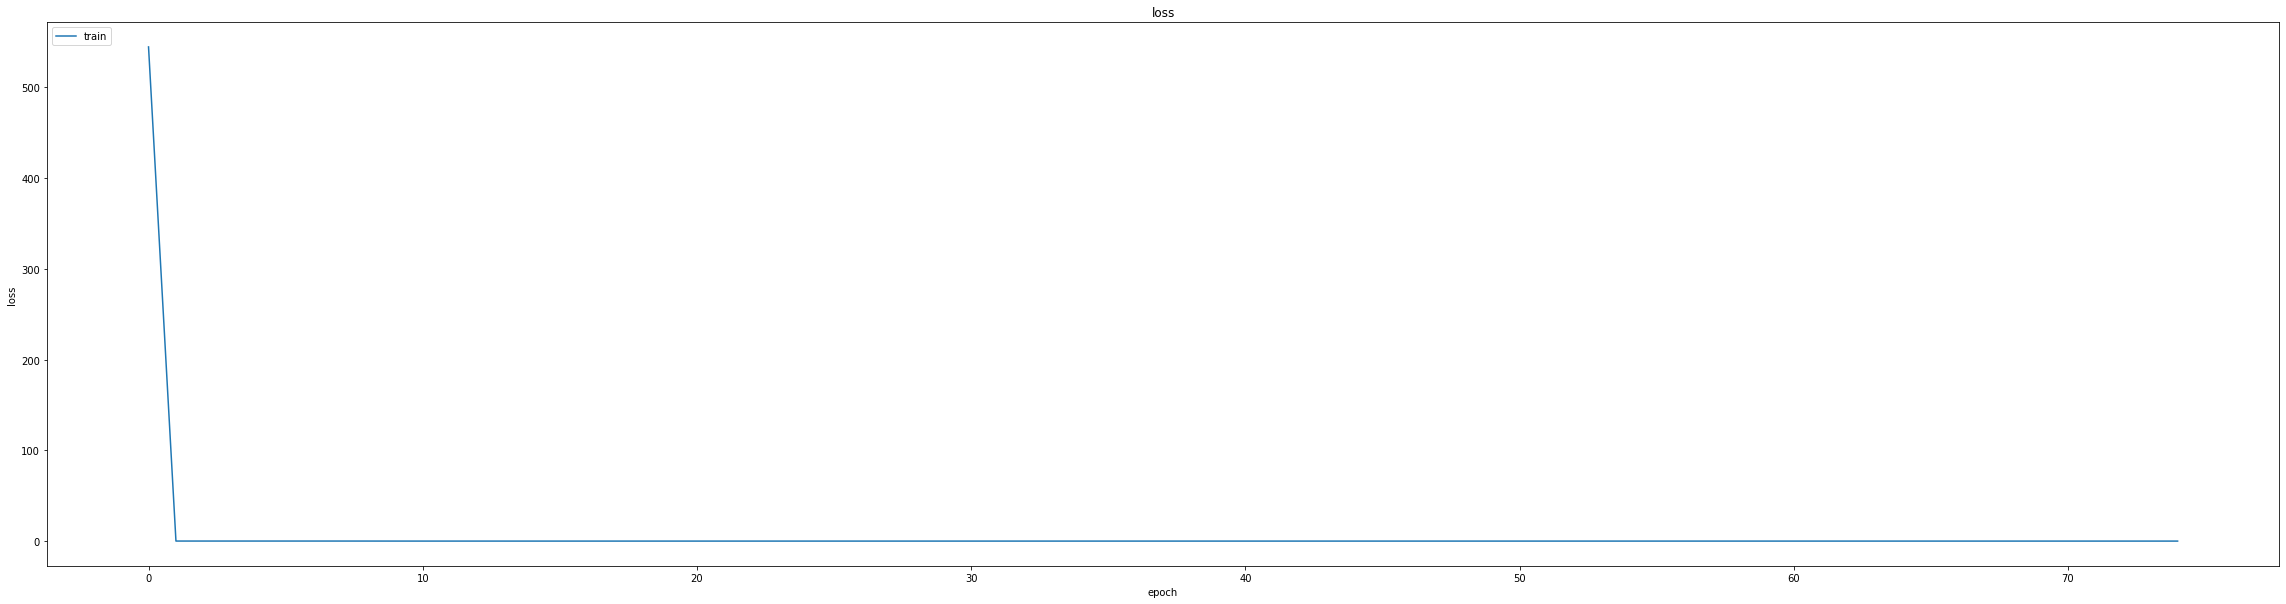

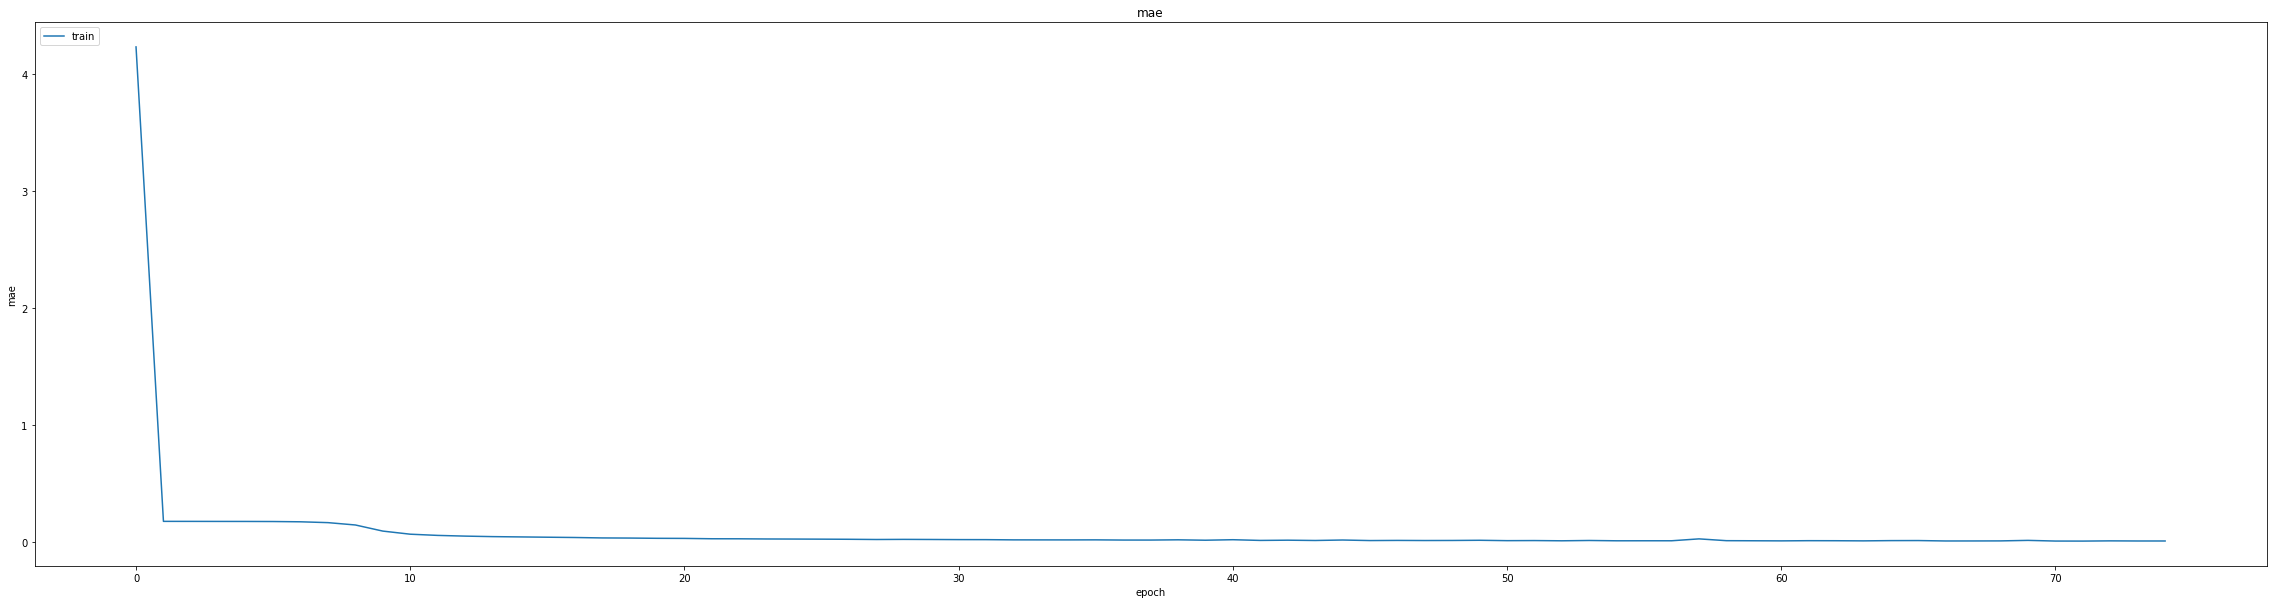

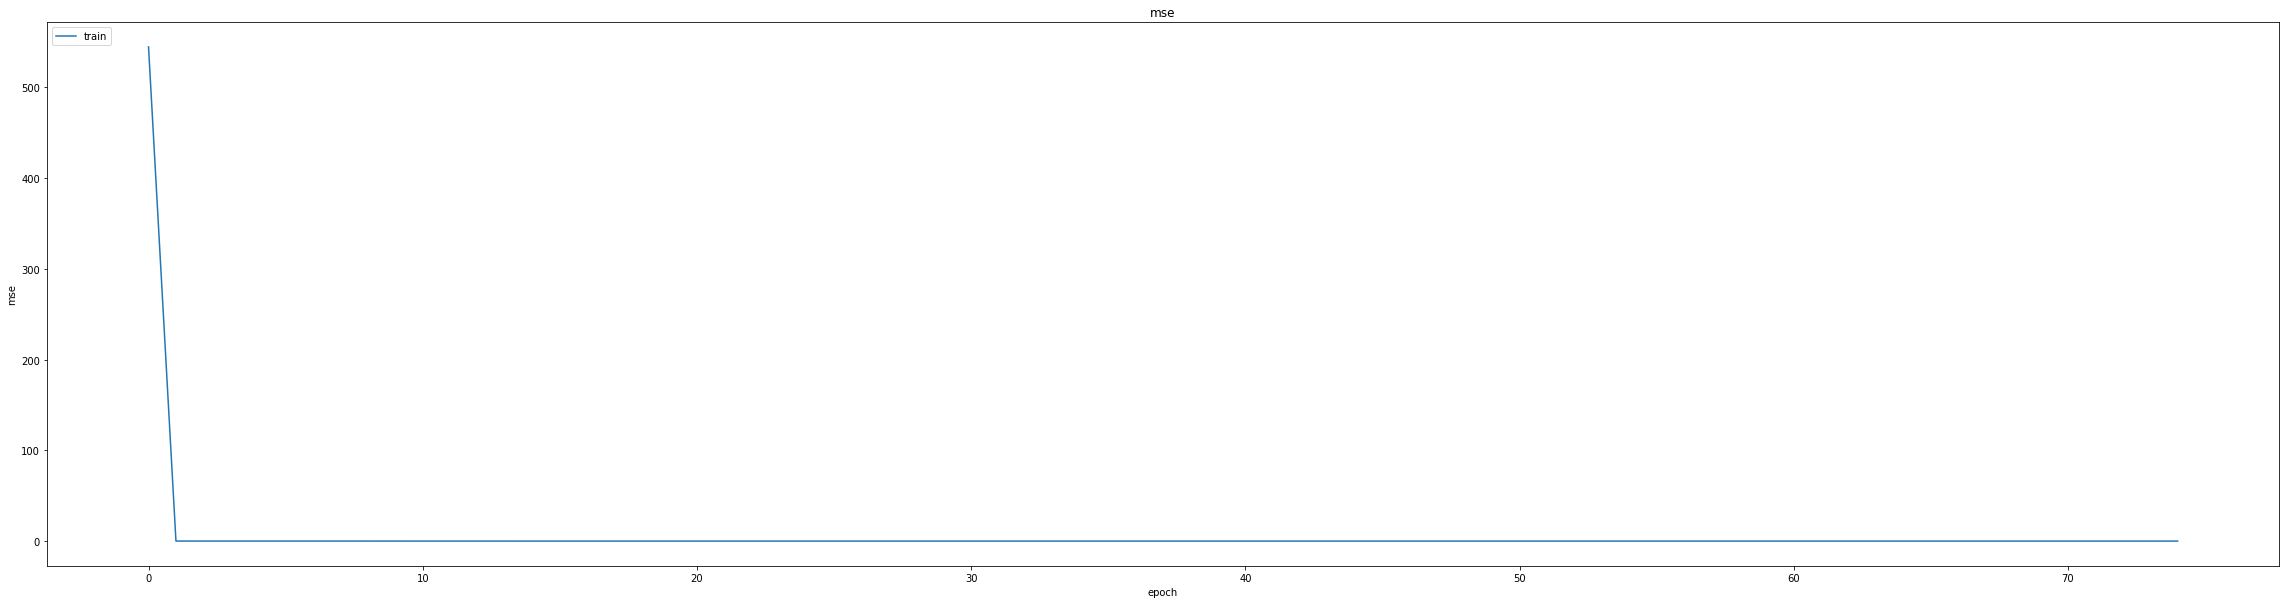

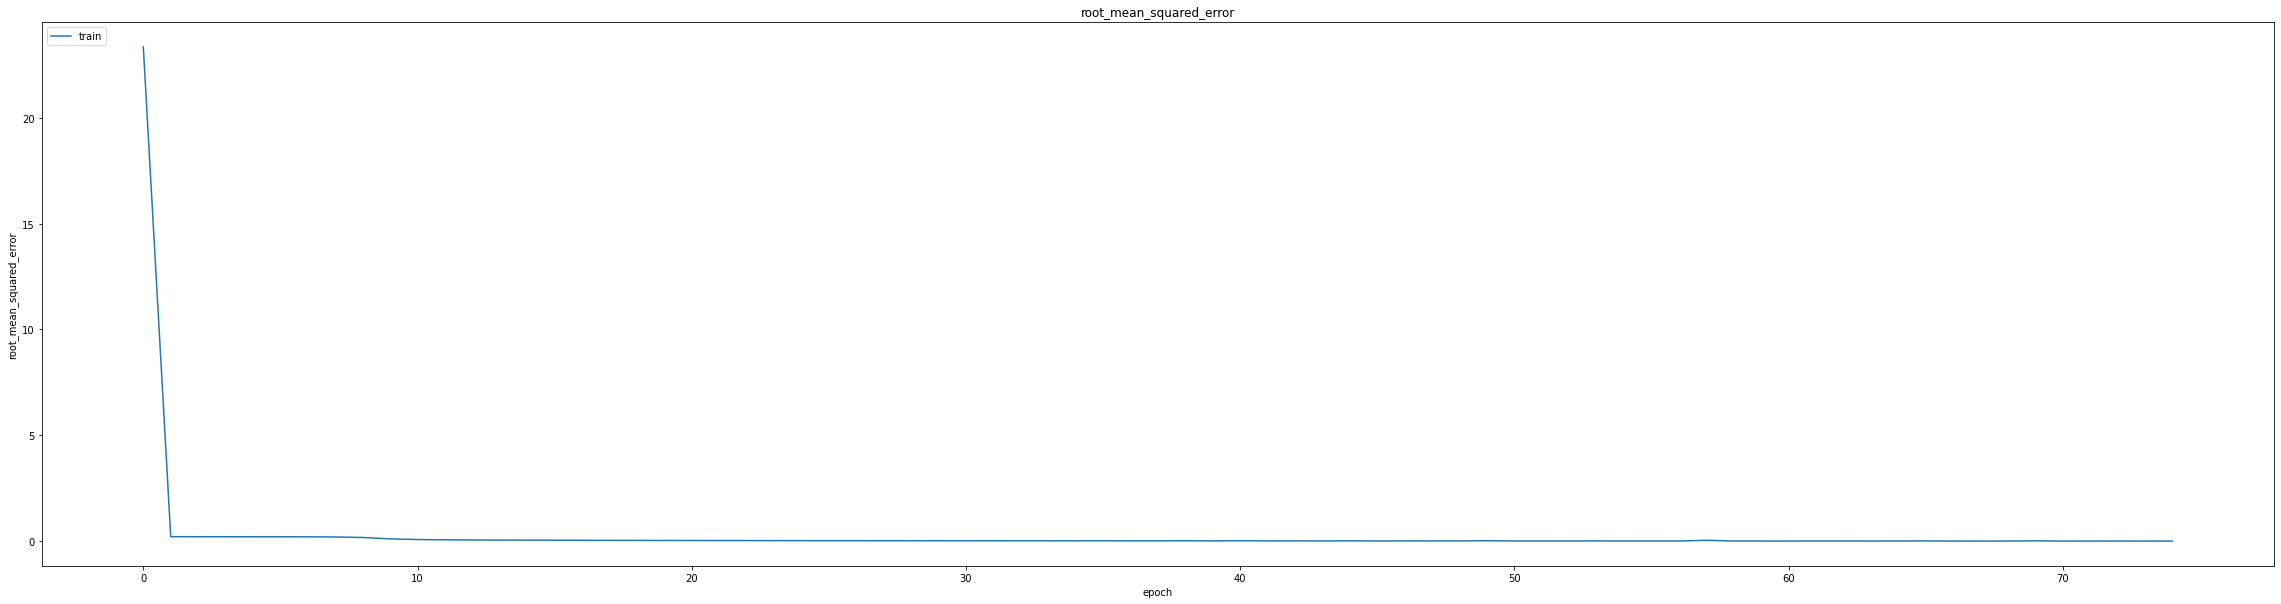

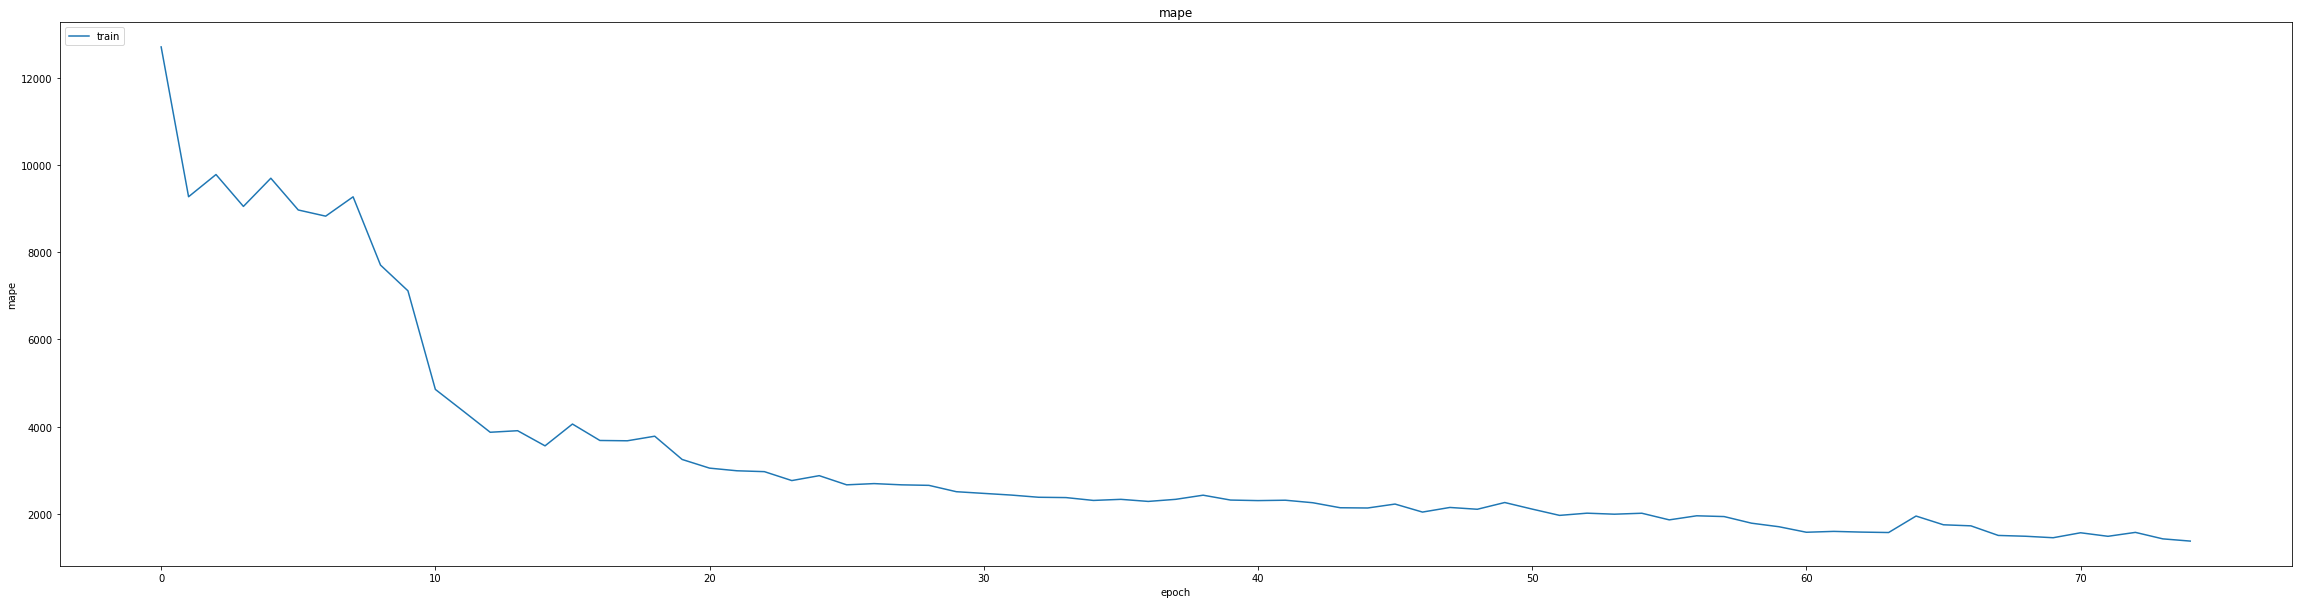

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01381628680974245
0.019230423495173454
348/348 [==============================] - 3s 6ms/step
0.9938962644625776


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 5.3295e-04 - mae: 0.0095 - mse: 5.3295e-04 - root_mean_squared_error: 0.0231 - mape: 1693.6060
Epoch 1: val_mse did not improve from 0.00037
406/406 [==============================] - 17s 24ms/step - loss: 5.3066e-04 - mae: 0.0095 - mse: 5.3066e-04 - root_mean_squared_error: 0.0230 - mape: 1685.6265 - val_loss: 4.4617e-04 - val_mae: 0.0153 - val_mse: 4.4617e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 33.1055 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 3.8505e-05 - mae: 0.0047 - mse: 3.8505e-05 - root_mean_squared_error: 0.0062 - mape: 1486.9578
Epoch 2: val_mse did not improve from 0.00037
406/406 [==============================] - 7s 16ms/step - loss: 3.8702e-05 - mae: 0.0047 - mse: 3.8702e-05 - root_mean_squared_error: 0.0062 - mape: 1476.2943 - val_loss: 4.5851e-04 - val_mae: 0.0169 - val_mse: 4.5851e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 27.6974 - lr

406/406 [==============================] - 31s 77ms/step - loss: 4.3281e-05 - mae: 0.0050 - mse: 4.3281e-05 - root_mean_squared_error: 0.0066 - mape: 1432.3044 - val_loss: 3.5371e-04 - val_mae: 0.0143 - val_mse: 3.5371e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 28.5793 - lr: 9.0000e-04
Epoch 4/25
403/406 [============================>.] - ETA: 0s - loss: 5.7327e-05 - mae: 0.0057 - mse: 5.7327e-05 - root_mean_squared_error: 0.0076 - mape: 1356.5865
Epoch 4: val_mse improved from 0.00035 to 0.00030, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 5.7159e-05 - mae: 0.0057 - mse: 5.7159e-05 - root_mean_squared_error: 0.0076 - mape: 1346.8566 - val_loss: 2.9982e-04 - val_mae: 0.0132 - val_mse: 2.9982e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 26.2355 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
406/406 [==============================] - ETA: 0s - loss: 1.5269e-04 - mae: 0.0075 - mse: 1.5269e-04 - root_mean_squared_error: 0.0124 - mape: 1399.4886
Epoch 5: val_mse did not improve from 0.00030
406/406 [==============================] - 7s 17ms/step - loss: 1.5269e-04 - mae: 0.0075 - mse: 1.5269e-04 - root_mean_squared_error: 0.0124 - mape: 1399.4886 - val_loss: 4.8459e-04 - val_mae: 0.0165 - val_mse: 4.8459e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 30.6675 - lr: 8.1000e-04
Epoch 6/25
406/406 [==============================] - ETA: 0s - loss: 3.1433e-05 - mae: 0.0042 - mse: 3.1433e-05 - root_mean_squared_error: 0.0056 - mape: 151

406/406 [==============================] - 32s 80ms/step - loss: 4.0134e-05 - mae: 0.0048 - mse: 4.0134e-05 - root_mean_squared_error: 0.0063 - mape: 1422.1597 - val_loss: 2.8504e-04 - val_mae: 0.0131 - val_mse: 2.8504e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 25.4424 - lr: 7.2900e-04
Epoch 8/25
404/406 [============================>.] - ETA: 0s - loss: 4.5388e-05 - mae: 0.0051 - mse: 4.5388e-05 - root_mean_squared_error: 0.0067 - mape: 1288.6058
Epoch 8: val_mse did not improve from 0.00029
406/406 [==============================] - 7s 16ms/step - loss: 4.5533e-05 - mae: 0.0051 - mse: 4.5533e-05 - root_mean_squared_error: 0.0067 - mape: 1282.5367 - val_loss: 5.6885e-04 - val_mae: 0.0197 - val_mse: 5.6885e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 27.1576 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
406/406 [==============================] - ETA: 0s - loss: 4.6706e-05 - mae: 0.0052 - mse: 4.6706e-05 - root_mean_squared_error: 0.0068 - mape: 122

406/406 [==============================] - 31s 78ms/step - loss: 3.1551e-05 - mae: 0.0042 - mse: 3.1551e-05 - root_mean_squared_error: 0.0056 - mape: 1213.1180 - val_loss: 2.0990e-04 - val_mae: 0.0111 - val_mse: 2.0990e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 22.1983 - lr: 5.9049e-04
Epoch 12/25
403/406 [============================>.] - ETA: 0s - loss: 5.5097e-05 - mae: 0.0056 - mse: 5.5097e-05 - root_mean_squared_error: 0.0074 - mape: 1331.4508
Epoch 12: val_mse did not improve from 0.00021
406/406 [==============================] - 7s 16ms/step - loss: 5.4922e-05 - mae: 0.0056 - mse: 5.4922e-05 - root_mean_squared_error: 0.0074 - mape: 1321.9010 - val_loss: 2.2606e-04 - val_mae: 0.0120 - val_mse: 2.2606e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 22.2027 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
404/406 [============================>.] - ETA: 0s - loss: 2.6043e-05 - mae: 0.0038 - mse: 2.6043e-05 - root_mean_squared_error: 0.0051 - mape: 

406/406 [==============================] - 32s 80ms/step - loss: 2.4695e-05 - mae: 0.0037 - mse: 2.4695e-05 - root_mean_squared_error: 0.0050 - mape: 1166.2244 - val_loss: 1.9977e-04 - val_mae: 0.0110 - val_mse: 1.9977e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 21.2067 - lr: 3.8742e-04
Epoch 20/25
406/406 [==============================] - ETA: 0s - loss: 2.5723e-05 - mae: 0.0038 - mse: 2.5723e-05 - root_mean_squared_error: 0.0051 - mape: 1218.4401
Epoch 20: val_mse improved from 0.00020 to 0.00018, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 2.5723e-05 - mae: 0.0038 - mse: 2.5723e-05 - root_mean_squared_error: 0.0051 - mape: 1218.4401 - val_loss: 1.8373e-04 - val_mae: 0.0108 - val_mse: 1.8373e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 20.0112 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
403/406 [============================>.] - ETA: 0s - loss: 2.1751e-05 - mae: 0.0035 - mse: 2.1751e-05 - root_mean_squared_error: 0.0047 - mape: 1087.1893
Epoch 21: val_mse did not improve from 0.00018
406/406 [==============================] - 7s 16ms/step - loss: 2.1772e-05 - mae: 0.0035 - mse: 2.1772e-05 - root_mean_squared_error: 0.0047 - mape: 1079.3912 - val_loss: 2.1596e-04 - val_mae: 0.0113 - val_mse: 2.1596e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 22.1990 - lr: 3.4868e-04
Epoch 22/25
403/406 [============================>.] - ETA: 0s - loss: 2.3738e-05 - mae: 0.0037 - mse: 2.3738e-05 - root_mean_squared_error: 0.0049 - mape: 

406/406 [==============================] - 32s 80ms/step - loss: 2.3369e-05 - mae: 0.0036 - mse: 2.3369e-05 - root_mean_squared_error: 0.0048 - mape: 1151.4255 - val_loss: 1.6705e-04 - val_mae: 0.0103 - val_mse: 1.6705e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 18.8819 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
404/406 [============================>.] - ETA: 0s - loss: 2.0943e-05 - mae: 0.0034 - mse: 2.0943e-05 - root_mean_squared_error: 0.0046 - mape: 1176.2281
Epoch 25: val_mse did not improve from 0.00017
406/406 [==============================] - 7s 17ms/step - loss: 2.0957e-05 - mae: 0.0034 - mse: 2.0957e-05 - root_mean_squared_error: 0.0046 - mape: 1170.6863 - val_loss: 2.1701e-04 - val_mae: 0.0121 - val_mse: 2.1701e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 19.6033 - lr: 2.8243e-04


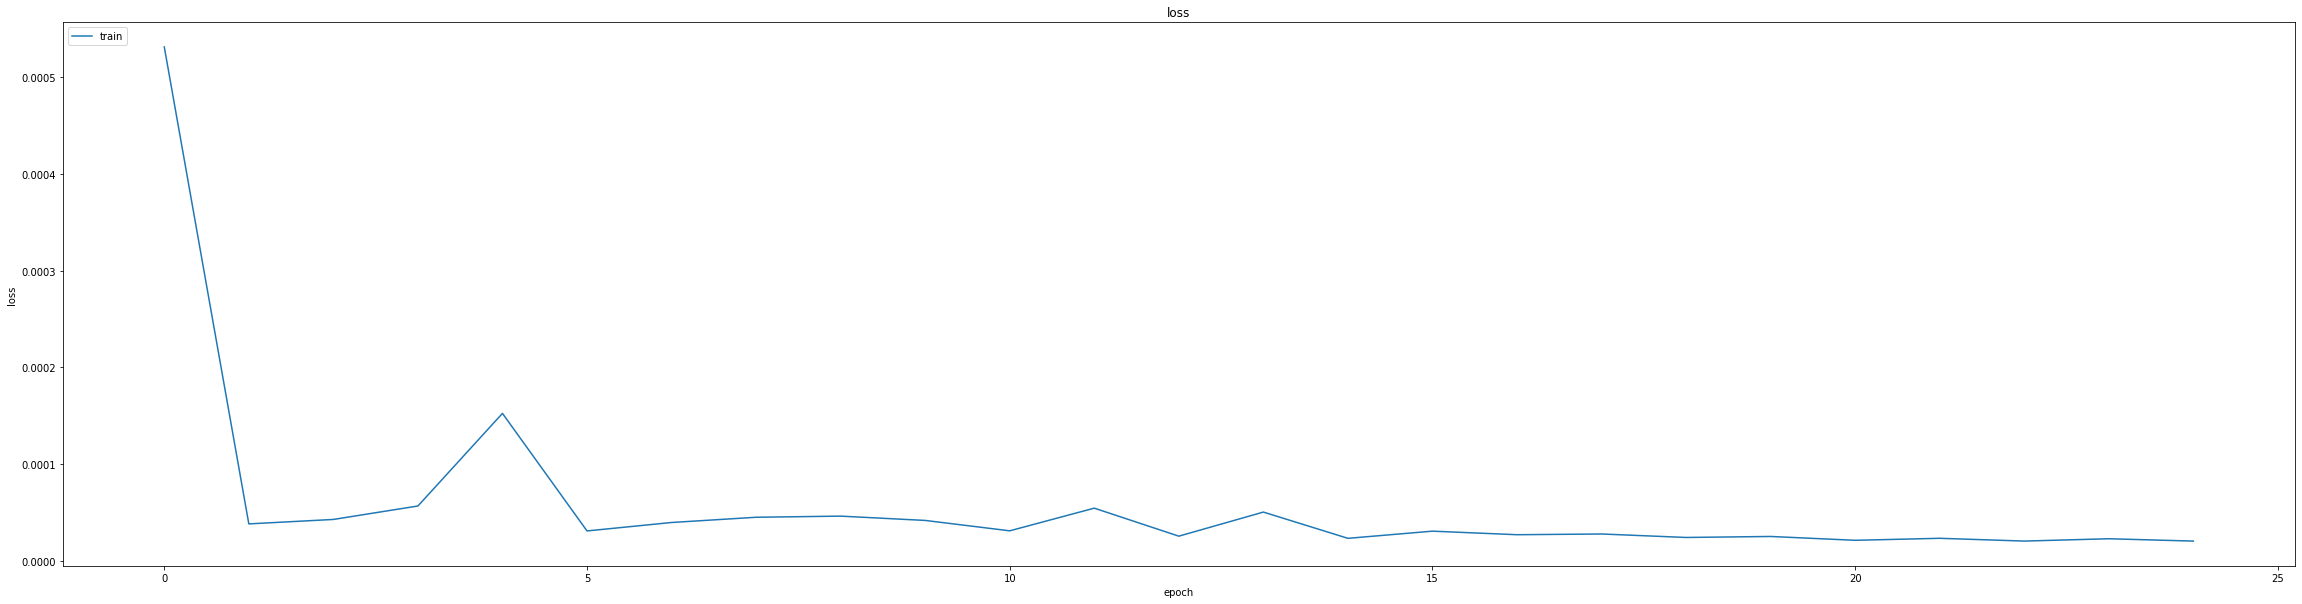

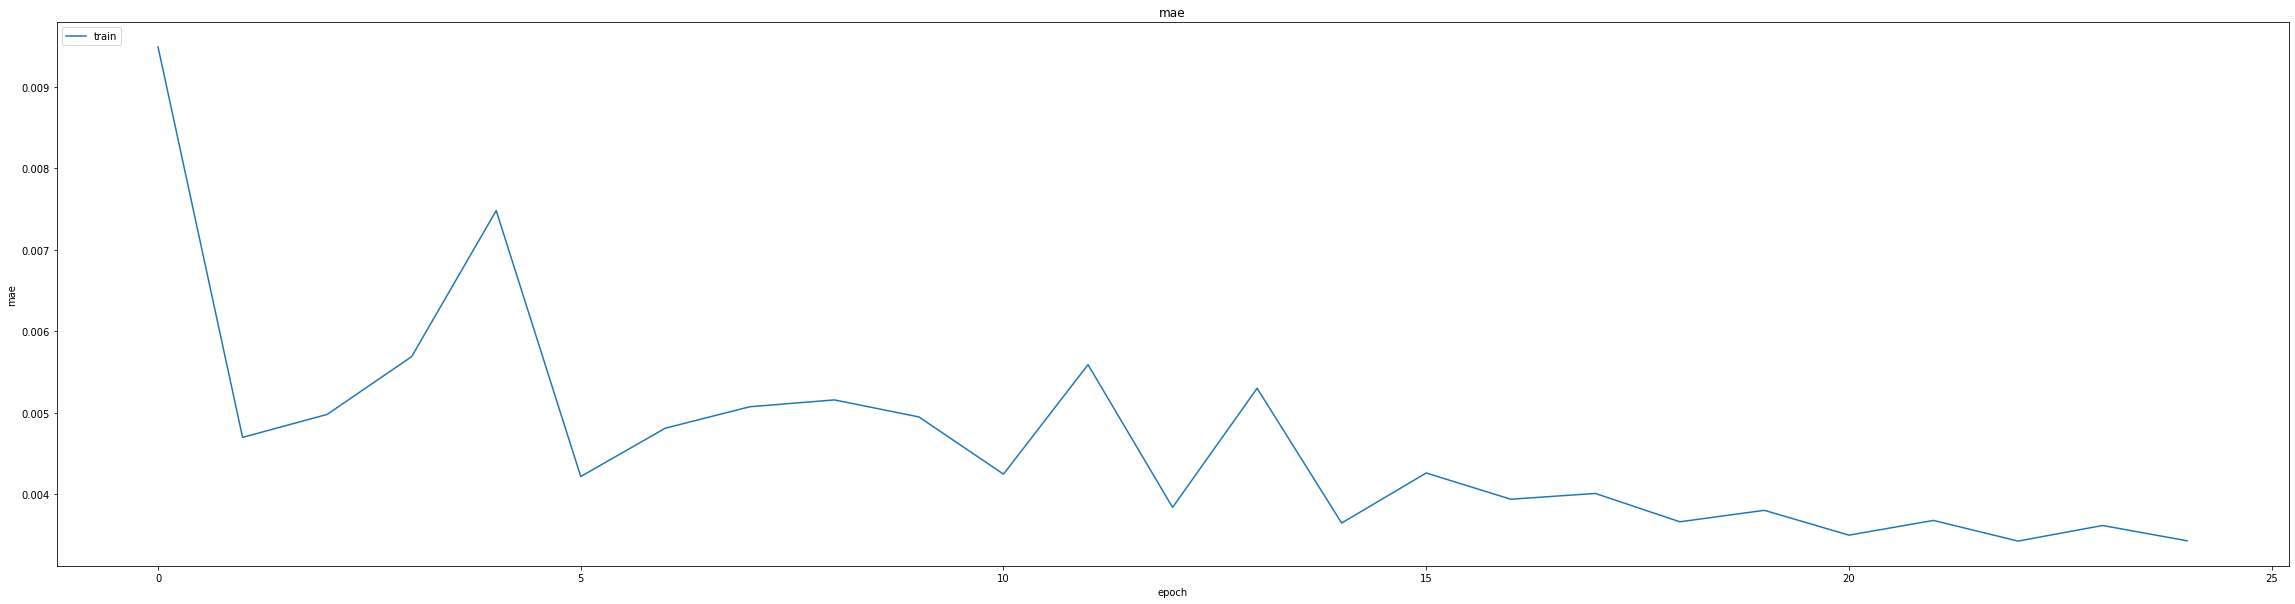

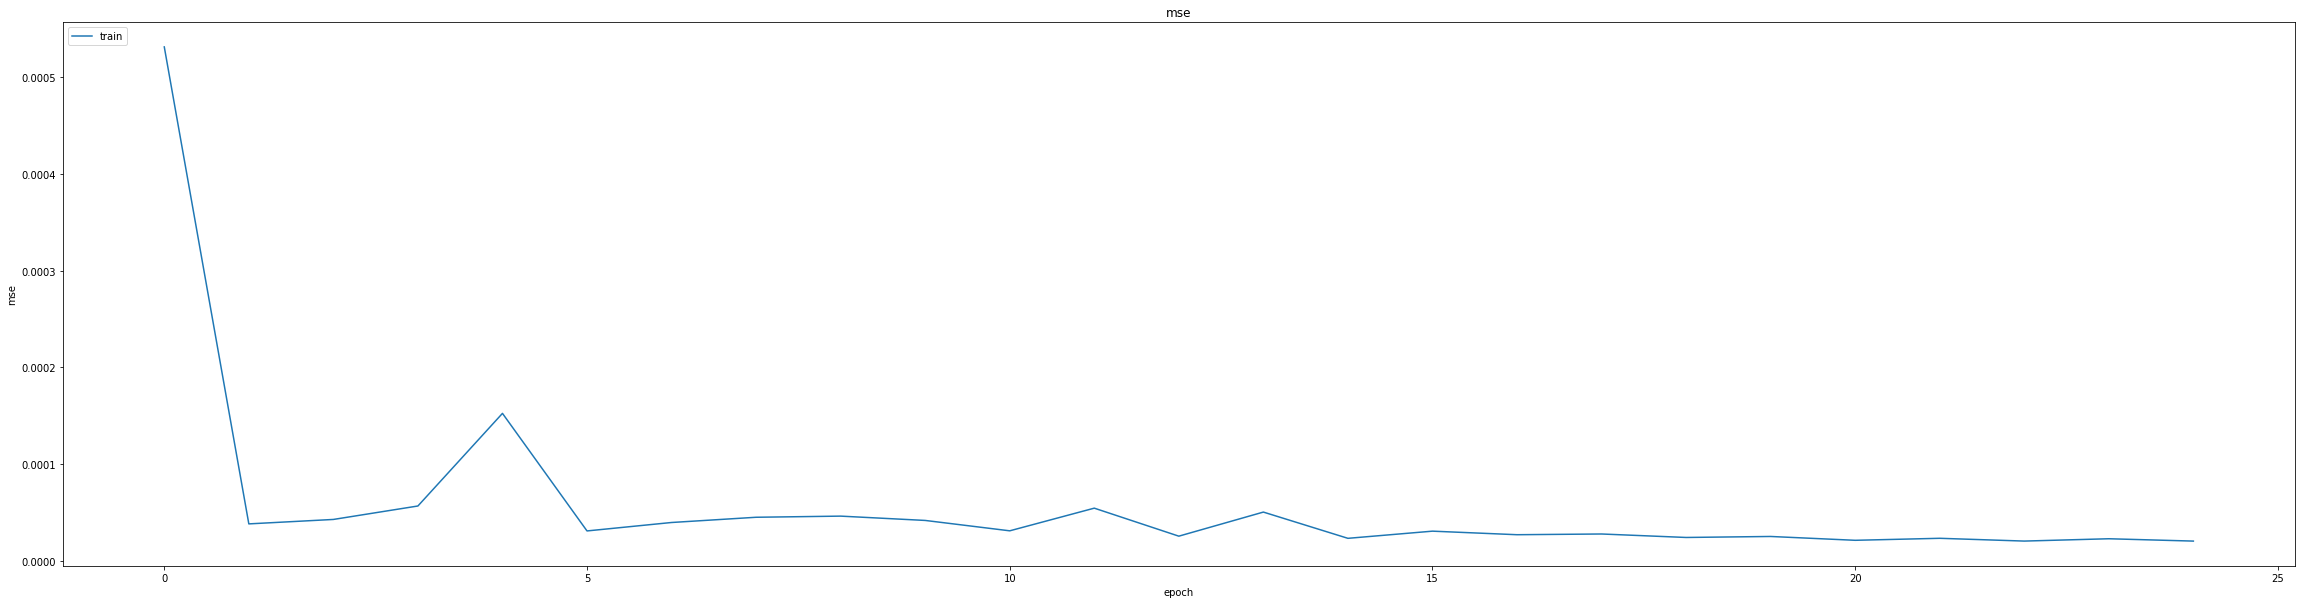

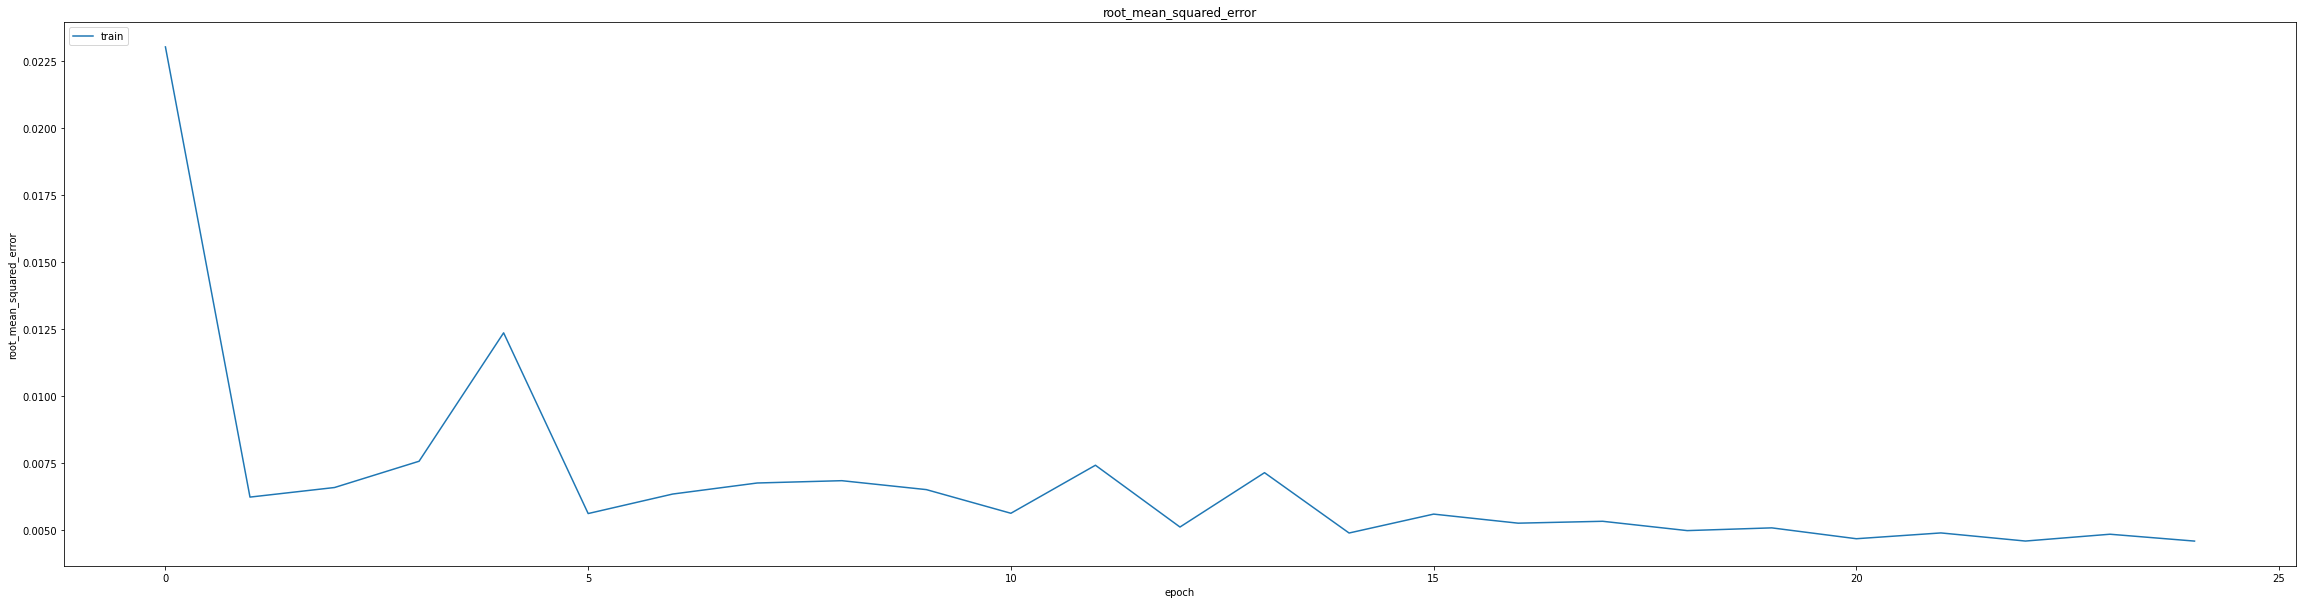

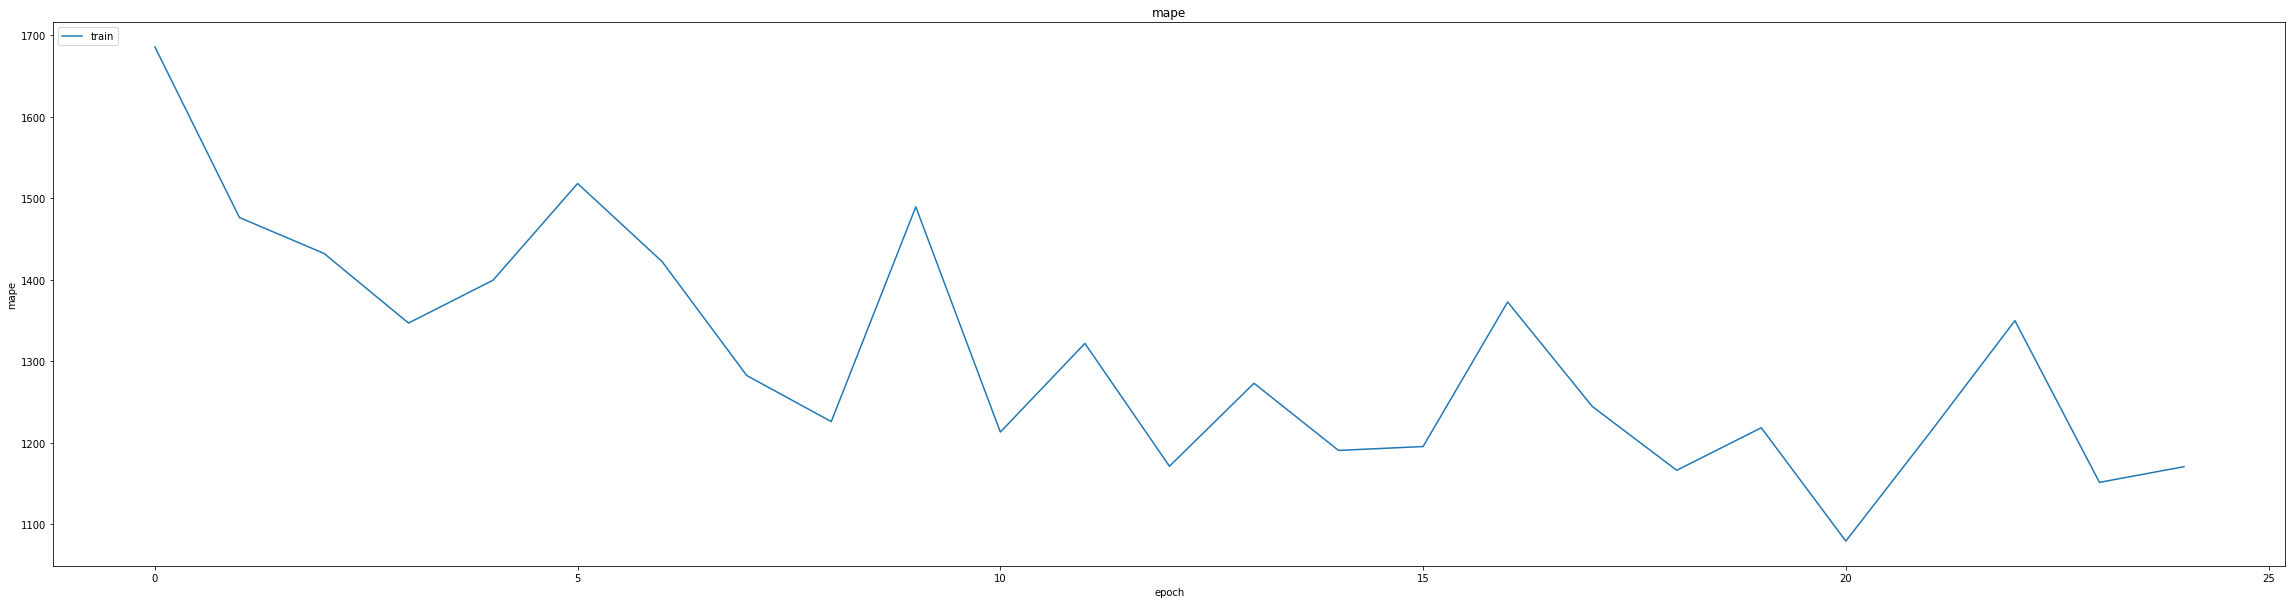

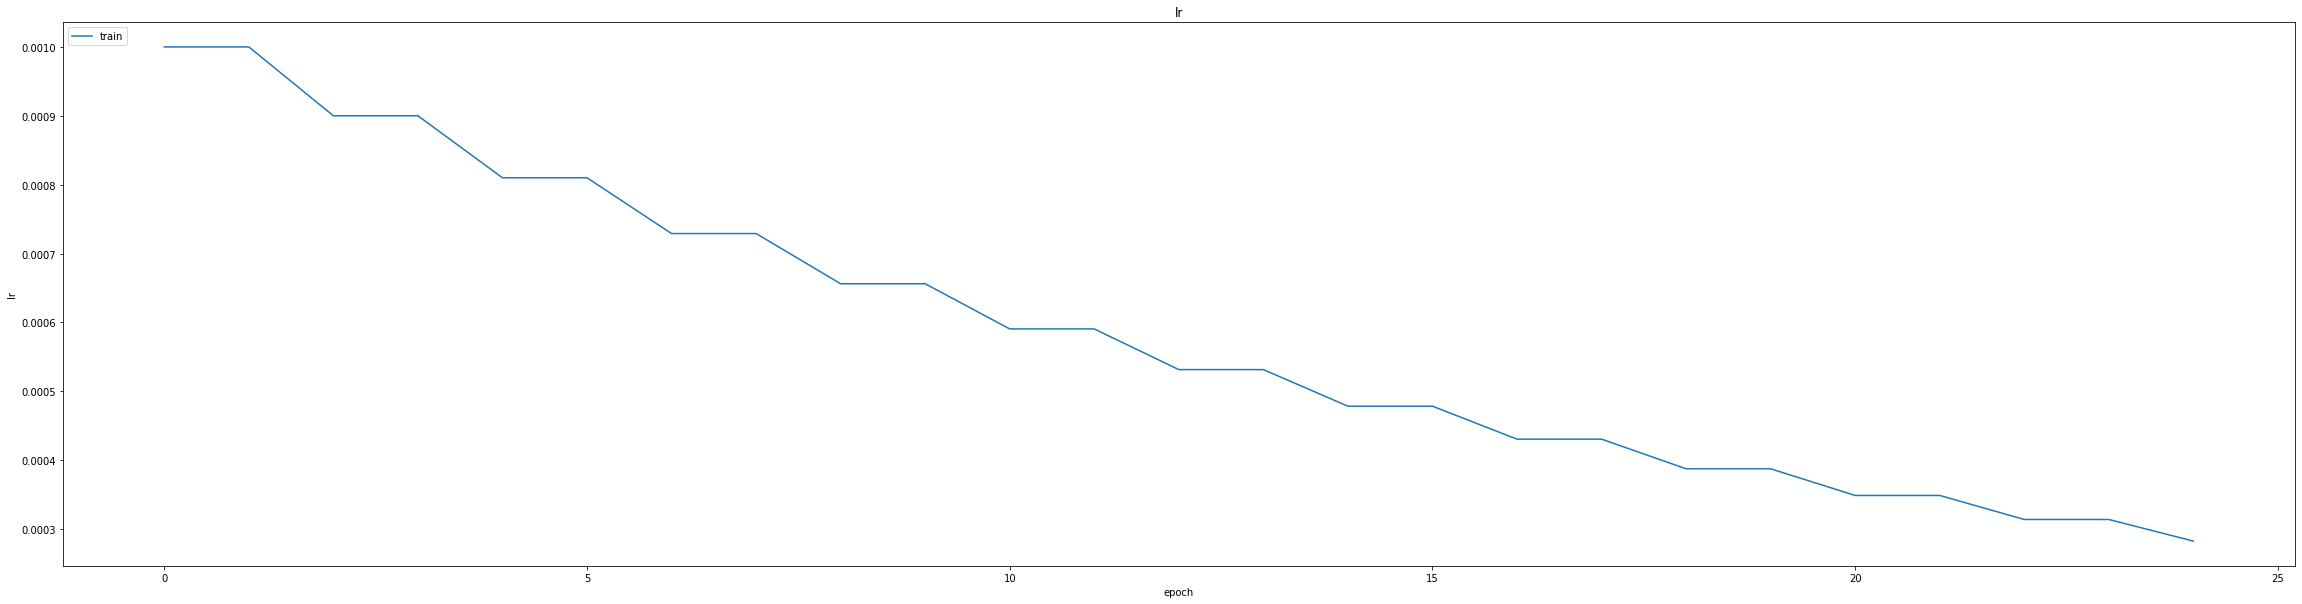

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010277755558490753
0.012924904003739357
348/348 [==============================] - 3s 5ms/step
0.9975454637038377


348/348 [==============================] - 2s 6ms/step


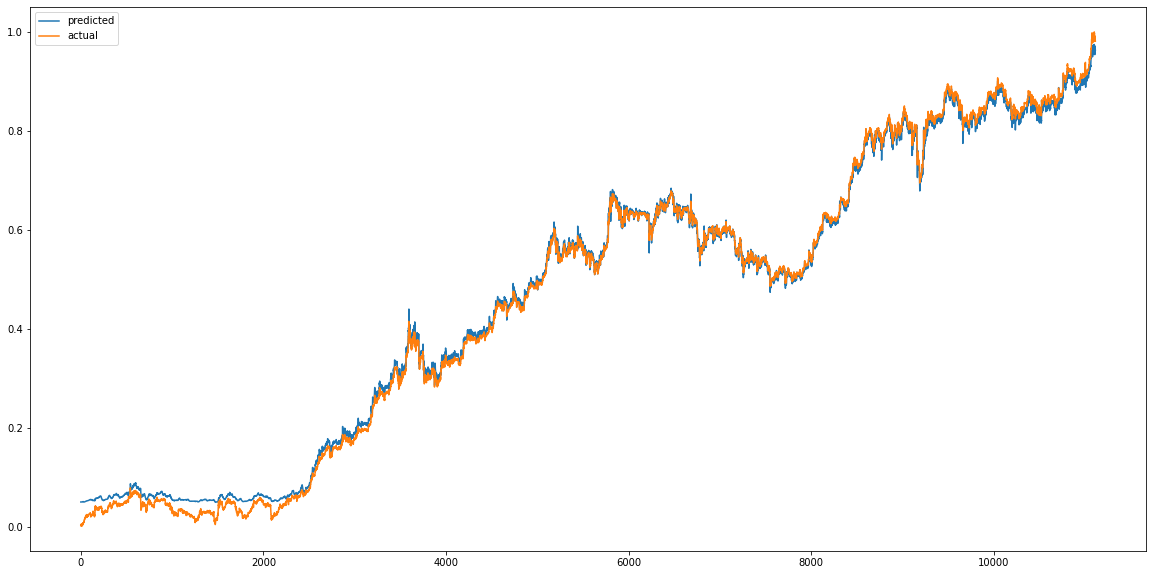

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


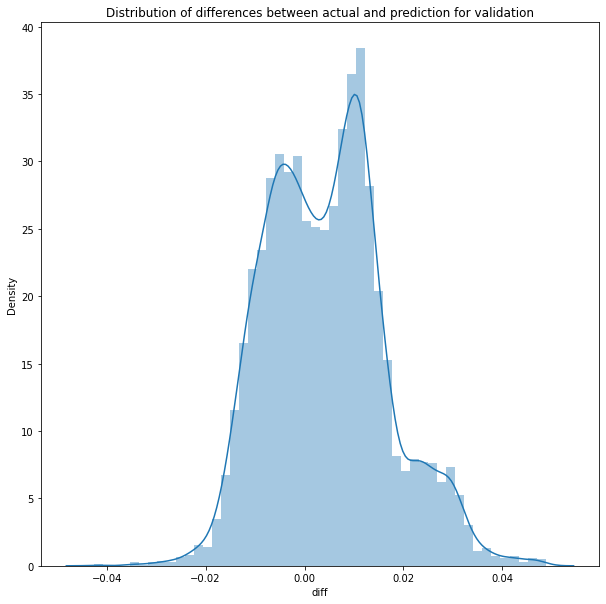

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 5ms/step


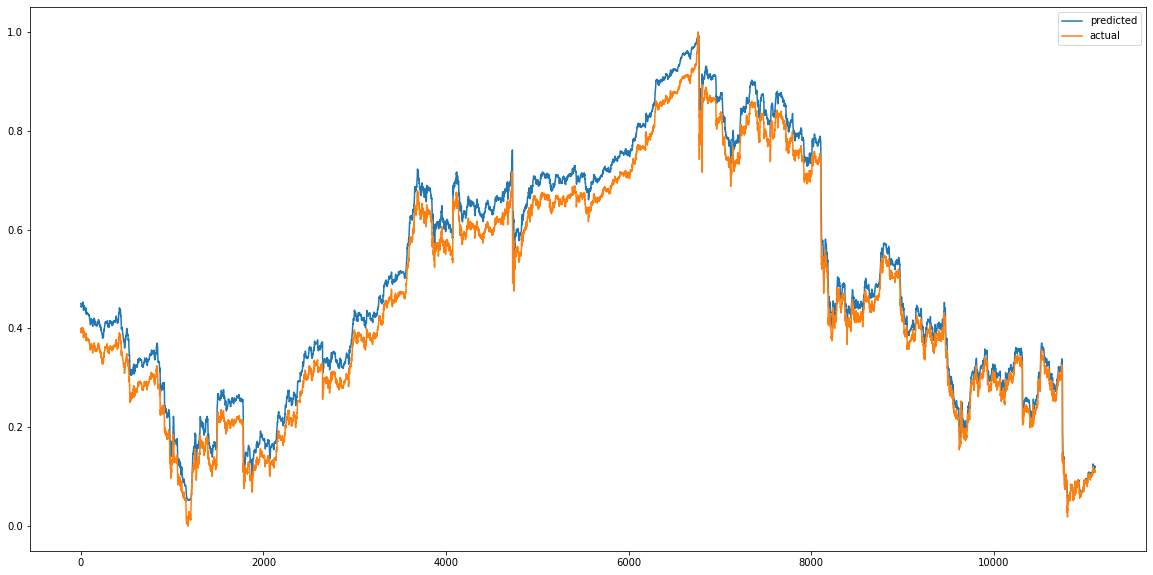

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


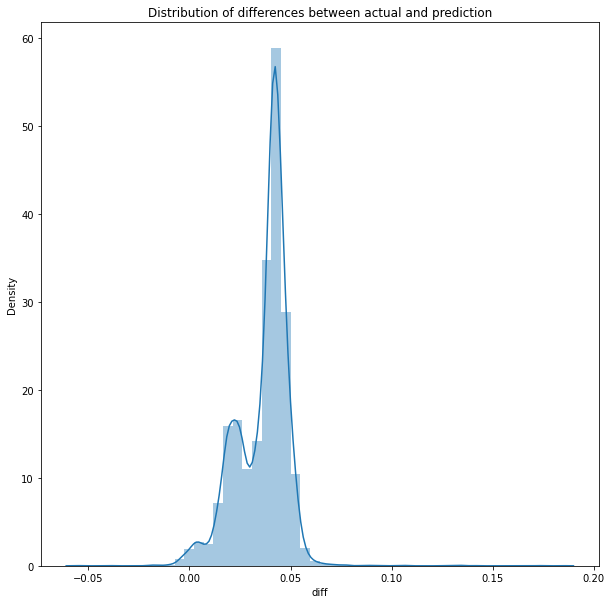

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0014812444959159937
RMSE :  0.03848693929004999
MAE :  0.03643497172215207
348/348 [==============================] - 2s 6ms/step
R2_Score  : 0.9735305170307638


count    11115.000000
mean         0.036345
std          0.012660
min         -0.055121
25%          0.027864
50%          0.040303
75%          0.044363
max          0.184124
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
405/406 [============================>.] - ETA: 0s - loss: 510.8042 - mae: 5.0381 - mse: 510.8042 - root_mean_squared_error: 22.6010 - mape: 90497.5703
Epoch 1: val_mse improved from inf to 0.10015, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 20s 40ms/step - loss: 509.6541 - mae: 5.0271 - mse: 509.6541 - root_mean_squared_error: 22.5755 - mape: 90293.9141 - val_loss: 0.1001 - val_mae: 0.2569 - val_mse: 0.1001 - val_root_mean_squared_error: 0.3165 - val_mape: 409.9857
Epoch 2/75
401/406 [============================>.] - ETA: 0s - loss: 0.0475 - mae: 0.1771 - mse: 0.0475 - root_mean_squared_error: 0.2179 - mape: 9758.9795
Epoch 2: val_mse improved from 0.10015 to 0.08894, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0474 - mae: 0.1770 - mse: 0.0474 - root_mean_squared_error: 0.2178 - mape: 9641.4443 - val_loss: 0.0889 - val_mae: 0.2561 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2982 - val_mape: 346.9812
Epoch 3/75
401/406 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 9317.8867
Epoch 3: val_mse improved from 0.08894 to 0.08876, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9205.7998 - val_loss: 0.0888 - val_mae: 0.2566 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2979 - val_mape: 343.5137
Epoch 4/75
401/406 [============================>.] - ETA: 0s - loss: 0.0461 - mae: 0.1752 - mse: 0.0461 - root_mean_squared_error: 0.2147 - mape: 9576.5586
Epoch 4: val_mse did not improve from 0.08876
406/406 [==============================] - 4s 11ms/step - loss: 0.0460 - mae: 0.1751 - mse: 0.0460 - root_mean_squared_error: 0.2146 - mape: 9461.2549 - val_loss: 0.0889 - val_mae: 0.2563 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2981 - val_mape: 345.5746
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1750 - mse: 0.0460 - root_mean_squared_error: 0.2146 - mape: 9456.4688
Epoch 5: val_mse did not improve from 0.08876
406/406 [==============================] - 5s 13ms/step - loss:

406/406 [==============================] - 19s 46ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9367.1377 - val_loss: 0.0887 - val_mae: 0.2567 - val_mse: 0.0887 - val_root_mean_squared_error: 0.2979 - val_mape: 343.0538
Epoch 8/75
405/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1750 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9281.5000
Epoch 8: val_mse did not improve from 0.08873
406/406 [==============================] - 6s 14ms/step - loss: 0.0460 - mae: 0.1750 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9260.7197 - val_loss: 0.0887 - val_mae: 0.2566 - val_mse: 0.0887 - val_root_mean_squared_error: 0.2979 - val_mape: 343.3417
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9436.1201
Epoch 9: val_mse did not improve from 0.08873
406/406 [==============================] - 6s 14ms/step - loss:

406/406 [==============================] - 15s 37ms/step - loss: 0.0460 - mae: 0.1748 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9302.4307 - val_loss: 0.0886 - val_mae: 0.2567 - val_mse: 0.0886 - val_root_mean_squared_error: 0.2977 - val_mape: 342.0102
Epoch 14/75
405/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9397.2383
Epoch 14: val_mse did not improve from 0.08860
406/406 [==============================] - 4s 11ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9376.1943 - val_loss: 0.0889 - val_mae: 0.2556 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2981 - val_mape: 347.9192
Epoch 15/75
403/406 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 9268.6279
Epoch 15: val_mse did not improve from 0.08860
406/406 [==============================] - 4s 11ms/step - l

406/406 [==============================] - 15s 37ms/step - loss: 0.0454 - mae: 0.1737 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 9353.6904 - val_loss: 0.0859 - val_mae: 0.2516 - val_mse: 0.0859 - val_root_mean_squared_error: 0.2931 - val_mape: 340.5411
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1508 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 9331.4121
Epoch 17: val_mse improved from 0.08593 to 0.05005, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0363 - mae: 0.1505 - mse: 0.0363 - root_mean_squared_error: 0.1904 - mape: 9241.7324 - val_loss: 0.0500 - val_mae: 0.1957 - val_mse: 0.0500 - val_root_mean_squared_error: 0.2237 - val_mape: 252.9813
Epoch 18/75
404/406 [============================>.] - ETA: 0s - loss: 0.0113 - mae: 0.0818 - mse: 0.0113 - root_mean_squared_error: 0.1062 - mape: 6025.0571
Epoch 18: val_mse improved from 0.05005 to 0.01610, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0112 - mae: 0.0817 - mse: 0.0112 - root_mean_squared_error: 0.1060 - mape: 5996.7178 - val_loss: 0.0161 - val_mae: 0.0950 - val_mse: 0.0161 - val_root_mean_squared_error: 0.1269 - val_mape: 183.2814
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0460 - mse: 0.0035 - root_mean_squared_error: 0.0592 - mape: 5426.6807
Epoch 19: val_mse improved from 0.01610 to 0.00920, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0035 - mae: 0.0460 - mse: 0.0035 - root_mean_squared_error: 0.0592 - mape: 5426.6807 - val_loss: 0.0092 - val_mae: 0.0634 - val_mse: 0.0092 - val_root_mean_squared_error: 0.0959 - val_mape: 143.6601
Epoch 20/75
401/406 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0365 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 4319.6470
Epoch 20: val_mse improved from 0.00920 to 0.00730, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0022 - mae: 0.0365 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 4267.4775 - val_loss: 0.0073 - val_mae: 0.0629 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0854 - val_mape: 126.3178
Epoch 21/75
403/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 4462.4946
Epoch 21: val_mse improved from 0.00730 to 0.00618, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 4430.5200 - val_loss: 0.0062 - val_mae: 0.0547 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0786 - val_mape: 117.9509
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0369 - mape: 3596.1846
Epoch 22: val_mse did not improve from 0.00618
406/406 [==============================] - 4s 11ms/step - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0369 - mape: 3588.1055 - val_loss: 0.0064 - val_mae: 0.0670 - val_mse: 0.0064 - val_root_mean_squared_error: 0.0802 - val_mape: 110.4783
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 3730.7588
Epoch 23: val_mse improved from 0.00618 to 0.00485, saving model to /content/drive/MyDrive/modelweights/JP

406/406 [==============================] - 15s 37ms/step - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 3730.7588 - val_loss: 0.0049 - val_mae: 0.0505 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0697 - val_mape: 102.6366
Epoch 24/75
402/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0252 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 3269.7249
Epoch 24: val_mse improved from 0.00485 to 0.00426, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0010 - mae: 0.0252 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 3238.2615 - val_loss: 0.0043 - val_mae: 0.0481 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0652 - val_mape: 96.7696
Epoch 25/75
405/406 [============================>.] - ETA: 0s - loss: 8.9757e-04 - mae: 0.0235 - mse: 8.9757e-04 - root_mean_squared_error: 0.0300 - mape: 3096.2349
Epoch 25: val_mse improved from 0.00426 to 0.00379, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 8.9755e-04 - mae: 0.0235 - mse: 8.9755e-04 - root_mean_squared_error: 0.0300 - mape: 3089.2771 - val_loss: 0.0038 - val_mae: 0.0411 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0616 - val_mape: 92.9169
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 7.9638e-04 - mae: 0.0221 - mse: 7.9638e-04 - root_mean_squared_error: 0.0282 - mape: 3192.7817
Epoch 26: val_mse improved from 0.00379 to 0.00334, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 7.9638e-04 - mae: 0.0221 - mse: 7.9638e-04 - root_mean_squared_error: 0.0282 - mape: 3192.7817 - val_loss: 0.0033 - val_mae: 0.0401 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0578 - val_mape: 85.8644
Epoch 27/75
402/406 [============================>.] - ETA: 0s - loss: 7.3689e-04 - mae: 0.0212 - mse: 7.3689e-04 - root_mean_squared_error: 0.0271 - mape: 2997.0447
Epoch 27: val_mse improved from 0.00334 to 0.00325, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 7.3782e-04 - mae: 0.0212 - mse: 7.3782e-04 - root_mean_squared_error: 0.0272 - mape: 2968.2061 - val_loss: 0.0033 - val_mae: 0.0409 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0570 - val_mape: 85.2675
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 5.8975e-04 - mae: 0.0189 - mse: 5.8975e-04 - root_mean_squared_error: 0.0243 - mape: 3155.1177
Epoch 28: val_mse improved from 0.00325 to 0.00292, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 5.8926e-04 - mae: 0.0189 - mse: 5.8926e-04 - root_mean_squared_error: 0.0243 - mape: 3148.0217 - val_loss: 0.0029 - val_mae: 0.0370 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0540 - val_mape: 81.2405
Epoch 29/75
402/406 [============================>.] - ETA: 0s - loss: 5.8147e-04 - mae: 0.0188 - mse: 5.8147e-04 - root_mean_squared_error: 0.0241 - mape: 2819.2080
Epoch 29: val_mse did not improve from 0.00292
406/406 [==============================] - 4s 11ms/step - loss: 5.8040e-04 - mae: 0.0188 - mse: 5.8040e-04 - root_mean_squared_error: 0.0241 - mape: 2792.0686 - val_loss: 0.0029 - val_mae: 0.0371 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0540 - val_mape: 81.4884
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 5.4697e-04 - mae: 0.0182 - mse: 5.4697e-04 - root_mean_squared_error: 0.0234 - mape: 2558.2854
Epoch 30: val_mse improved from 0.00292 to 0.00256, saving model to /content

406/406 [==============================] - 15s 36ms/step - loss: 5.4718e-04 - mae: 0.0182 - mse: 5.4718e-04 - root_mean_squared_error: 0.0234 - mape: 2539.9546 - val_loss: 0.0026 - val_mae: 0.0334 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 78.1815
Epoch 31/75
402/406 [============================>.] - ETA: 0s - loss: 4.8863e-04 - mae: 0.0172 - mse: 4.8863e-04 - root_mean_squared_error: 0.0221 - mape: 2634.4526
Epoch 31: val_mse improved from 0.00256 to 0.00254, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 4.9008e-04 - mae: 0.0172 - mse: 4.9008e-04 - root_mean_squared_error: 0.0221 - mape: 2609.1016 - val_loss: 0.0025 - val_mae: 0.0360 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 76.8776
Epoch 32/75
403/406 [============================>.] - ETA: 0s - loss: 4.9897e-04 - mae: 0.0174 - mse: 4.9897e-04 - root_mean_squared_error: 0.0223 - mape: 2709.6787
Epoch 32: val_mse improved from 0.00254 to 0.00231, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 4.9944e-04 - mae: 0.0174 - mse: 4.9944e-04 - root_mean_squared_error: 0.0223 - mape: 2690.2651 - val_loss: 0.0023 - val_mae: 0.0323 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 74.3560
Epoch 33/75
405/406 [============================>.] - ETA: 0s - loss: 4.4868e-04 - mae: 0.0165 - mse: 4.4868e-04 - root_mean_squared_error: 0.0212 - mape: 2394.4949
Epoch 33: val_mse improved from 0.00231 to 0.00222, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 4.4866e-04 - mae: 0.0165 - mse: 4.4866e-04 - root_mean_squared_error: 0.0212 - mape: 2389.1118 - val_loss: 0.0022 - val_mae: 0.0321 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0471 - val_mape: 72.4389
Epoch 34/75
401/406 [============================>.] - ETA: 0s - loss: 4.2640e-04 - mae: 0.0160 - mse: 4.2640e-04 - root_mean_squared_error: 0.0206 - mape: 2451.7803
Epoch 34: val_mse improved from 0.00222 to 0.00216, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 4.2459e-04 - mae: 0.0160 - mse: 4.2459e-04 - root_mean_squared_error: 0.0206 - mape: 2422.1401 - val_loss: 0.0022 - val_mae: 0.0341 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0464 - val_mape: 68.8622
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 3.8045e-04 - mae: 0.0151 - mse: 3.8045e-04 - root_mean_squared_error: 0.0195 - mape: 2359.8904
Epoch 35: val_mse improved from 0.00216 to 0.00198, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 3.8015e-04 - mae: 0.0151 - mse: 3.8015e-04 - root_mean_squared_error: 0.0195 - mape: 2348.7793 - val_loss: 0.0020 - val_mae: 0.0311 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0445 - val_mape: 67.5290
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 3.6006e-04 - mae: 0.0146 - mse: 3.6006e-04 - root_mean_squared_error: 0.0190 - mape: 2742.6514
Epoch 36: val_mse improved from 0.00198 to 0.00182, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 3.6079e-04 - mae: 0.0146 - mse: 3.6079e-04 - root_mean_squared_error: 0.0190 - mape: 2729.7424 - val_loss: 0.0018 - val_mae: 0.0294 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0427 - val_mape: 65.2257
Epoch 37/75
406/406 [==============================] - ETA: 0s - loss: 4.1187e-04 - mae: 0.0157 - mse: 4.1187e-04 - root_mean_squared_error: 0.0203 - mape: 2602.2566
Epoch 37: val_mse improved from 0.00182 to 0.00174, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 4.1187e-04 - mae: 0.0157 - mse: 4.1187e-04 - root_mean_squared_error: 0.0203 - mape: 2602.2566 - val_loss: 0.0017 - val_mae: 0.0272 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 65.0232
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 3.1162e-04 - mae: 0.0136 - mse: 3.1162e-04 - root_mean_squared_error: 0.0177 - mape: 2355.6450
Epoch 38: val_mse improved from 0.00174 to 0.00153, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 3.1140e-04 - mae: 0.0136 - mse: 3.1140e-04 - root_mean_squared_error: 0.0176 - mape: 2350.3467 - val_loss: 0.0015 - val_mae: 0.0250 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0391 - val_mape: 61.2763
Epoch 39/75
406/406 [==============================] - ETA: 0s - loss: 3.0987e-04 - mae: 0.0136 - mse: 3.0987e-04 - root_mean_squared_error: 0.0176 - mape: 2272.9336
Epoch 39: val_mse did not improve from 0.00153
406/406 [==============================] - 4s 11ms/step - loss: 3.0987e-04 - mae: 0.0136 - mse: 3.0987e-04 - root_mean_squared_error: 0.0176 - mape: 2272.9336 - val_loss: 0.0016 - val_mae: 0.0275 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 60.8472
Epoch 40/75
401/406 [============================>.] - ETA: 0s - loss: 2.9364e-04 - mae: 0.0132 - mse: 2.9364e-04 - root_mean_squared_error: 0.0171 - mape: 2382.6355
Epoch 40: val_mse improved from 0.00153 to 0.00138, saving model to /content

406/406 [==============================] - 15s 37ms/step - loss: 2.9302e-04 - mae: 0.0131 - mse: 2.9302e-04 - root_mean_squared_error: 0.0171 - mape: 2353.8306 - val_loss: 0.0014 - val_mae: 0.0235 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 58.5263
Epoch 41/75
403/406 [============================>.] - ETA: 0s - loss: 2.8110e-04 - mae: 0.0130 - mse: 2.8110e-04 - root_mean_squared_error: 0.0168 - mape: 2399.3618
Epoch 41: val_mse did not improve from 0.00138
406/406 [==============================] - 4s 11ms/step - loss: 2.8070e-04 - mae: 0.0129 - mse: 2.8070e-04 - root_mean_squared_error: 0.0168 - mape: 2382.1599 - val_loss: 0.0014 - val_mae: 0.0257 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 57.3692
Epoch 42/75
403/406 [============================>.] - ETA: 0s - loss: 2.4762e-04 - mae: 0.0121 - mse: 2.4762e-04 - root_mean_squared_error: 0.0157 - mape: 2108.7412
Epoch 42: val_mse improved from 0.00138 to 0.00130, saving model to /content

406/406 [==============================] - 15s 37ms/step - loss: 2.4899e-04 - mae: 0.0121 - mse: 2.4899e-04 - root_mean_squared_error: 0.0158 - mape: 2093.6333 - val_loss: 0.0013 - val_mae: 0.0259 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 55.1437
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 2.5236e-04 - mae: 0.0123 - mse: 2.5236e-04 - root_mean_squared_error: 0.0159 - mape: 2421.7415
Epoch 43: val_mse did not improve from 0.00130
406/406 [==============================] - 4s 11ms/step - loss: 2.5236e-04 - mae: 0.0123 - mse: 2.5236e-04 - root_mean_squared_error: 0.0159 - mape: 2421.7415 - val_loss: 0.0013 - val_mae: 0.0248 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 56.4429
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 2.2864e-04 - mae: 0.0116 - mse: 2.2864e-04 - root_mean_squared_error: 0.0151 - mape: 2082.2209
Epoch 44: val_mse improved from 0.00130 to 0.00128, saving model to /content

406/406 [==============================] - 14s 35ms/step - loss: 2.2864e-04 - mae: 0.0116 - mse: 2.2864e-04 - root_mean_squared_error: 0.0151 - mape: 2082.2209 - val_loss: 0.0013 - val_mae: 0.0260 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 54.3954
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 2.1166e-04 - mae: 0.0111 - mse: 2.1166e-04 - root_mean_squared_error: 0.0145 - mape: 2045.5974
Epoch 45: val_mse improved from 0.00128 to 0.00109, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 2.1189e-04 - mae: 0.0112 - mse: 2.1189e-04 - root_mean_squared_error: 0.0146 - mape: 2041.0000 - val_loss: 0.0011 - val_mae: 0.0213 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 51.8493
Epoch 46/75
403/406 [============================>.] - ETA: 0s - loss: 2.0176e-04 - mae: 0.0108 - mse: 2.0176e-04 - root_mean_squared_error: 0.0142 - mape: 2088.8037
Epoch 46: val_mse did not improve from 0.00109
406/406 [==============================] - 5s 11ms/step - loss: 2.0142e-04 - mae: 0.0108 - mse: 2.0142e-04 - root_mean_squared_error: 0.0142 - mape: 2073.8296 - val_loss: 0.0011 - val_mae: 0.0218 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 51.8577
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 1.9562e-04 - mae: 0.0107 - mse: 1.9562e-04 - root_mean_squared_error: 0.0140 - mape: 2066.5044
Epoch 47: val_mse improved from 0.00109 to 0.00107, saving model to /content

406/406 [==============================] - 15s 36ms/step - loss: 1.9544e-04 - mae: 0.0107 - mse: 1.9544e-04 - root_mean_squared_error: 0.0140 - mape: 2061.8560 - val_loss: 0.0011 - val_mae: 0.0216 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 51.8727
Epoch 48/75
401/406 [============================>.] - ETA: 0s - loss: 1.6917e-04 - mae: 0.0099 - mse: 1.6917e-04 - root_mean_squared_error: 0.0130 - mape: 2023.2838
Epoch 48: val_mse improved from 0.00107 to 0.00090, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.6877e-04 - mae: 0.0099 - mse: 1.6877e-04 - root_mean_squared_error: 0.0130 - mape: 1998.8206 - val_loss: 8.9629e-04 - val_mae: 0.0193 - val_mse: 8.9629e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 47.2942
Epoch 49/75
401/406 [============================>.] - ETA: 0s - loss: 1.7764e-04 - mae: 0.0102 - mse: 1.7764e-04 - root_mean_squared_error: 0.0133 - mape: 2025.8878
Epoch 49: val_mse did not improve from 0.00090
406/406 [==============================] - 4s 11ms/step - loss: 1.7692e-04 - mae: 0.0101 - mse: 1.7692e-04 - root_mean_squared_error: 0.0133 - mape: 2001.3898 - val_loss: 9.5219e-04 - val_mae: 0.0215 - val_mse: 9.5219e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 47.4444
Epoch 50/75
404/406 [============================>.] - ETA: 0s - loss: 1.7291e-04 - mae: 0.0100 - mse: 1.7291e-04 - root_mean_squared_error: 0.0131 - mape: 1954.5035
Epoch 50: val_mse improved from 0.00090 to 0.00083, saving m

406/406 [==============================] - 16s 39ms/step - loss: 1.7243e-04 - mae: 0.0100 - mse: 1.7243e-04 - root_mean_squared_error: 0.0131 - mape: 1945.2955 - val_loss: 8.3306e-04 - val_mae: 0.0200 - val_mse: 8.3306e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 45.0712
Epoch 51/75
404/406 [============================>.] - ETA: 0s - loss: 1.4914e-04 - mae: 0.0094 - mse: 1.4914e-04 - root_mean_squared_error: 0.0122 - mape: 2006.7362
Epoch 51: val_mse improved from 0.00083 to 0.00082, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.4907e-04 - mae: 0.0094 - mse: 1.4907e-04 - root_mean_squared_error: 0.0122 - mape: 1997.2847 - val_loss: 8.1774e-04 - val_mae: 0.0199 - val_mse: 8.1774e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 44.6377
Epoch 52/75
405/406 [============================>.] - ETA: 0s - loss: 1.4643e-04 - mae: 0.0093 - mse: 1.4643e-04 - root_mean_squared_error: 0.0121 - mape: 1958.5876
Epoch 52: val_mse improved from 0.00082 to 0.00075, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.4635e-04 - mae: 0.0093 - mse: 1.4635e-04 - root_mean_squared_error: 0.0121 - mape: 1954.1833 - val_loss: 7.5480e-04 - val_mae: 0.0176 - val_mse: 7.5480e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 44.0755
Epoch 53/75
404/406 [============================>.] - ETA: 0s - loss: 1.7601e-04 - mae: 0.0102 - mse: 1.7601e-04 - root_mean_squared_error: 0.0133 - mape: 2014.2104
Epoch 53: val_mse improved from 0.00075 to 0.00074, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.7611e-04 - mae: 0.0102 - mse: 1.7611e-04 - root_mean_squared_error: 0.0133 - mape: 2004.7368 - val_loss: 7.3801e-04 - val_mae: 0.0180 - val_mse: 7.3801e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 43.3049
Epoch 54/75
402/406 [============================>.] - ETA: 0s - loss: 1.4952e-04 - mae: 0.0094 - mse: 1.4952e-04 - root_mean_squared_error: 0.0122 - mape: 1802.0334
Epoch 54: val_mse improved from 0.00074 to 0.00064, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.4969e-04 - mae: 0.0094 - mse: 1.4969e-04 - root_mean_squared_error: 0.0122 - mape: 1784.6838 - val_loss: 6.4468e-04 - val_mae: 0.0160 - val_mse: 6.4468e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 40.8553
Epoch 55/75
406/406 [==============================] - ETA: 0s - loss: 1.3361e-04 - mae: 0.0088 - mse: 1.3361e-04 - root_mean_squared_error: 0.0116 - mape: 1841.1901
Epoch 55: val_mse did not improve from 0.00064
406/406 [==============================] - 5s 11ms/step - loss: 1.3361e-04 - mae: 0.0088 - mse: 1.3361e-04 - root_mean_squared_error: 0.0116 - mape: 1841.1901 - val_loss: 8.4877e-04 - val_mae: 0.0224 - val_mse: 8.4877e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 41.5053
Epoch 56/75
406/406 [==============================] - ETA: 0s - loss: 1.2356e-04 - mae: 0.0083 - mse: 1.2356e-04 - root_mean_squared_error: 0.0111 - mape: 1802.4688
Epoch 56: val_mse improved from 0.00064 to 0.00060, saving m

406/406 [==============================] - 14s 35ms/step - loss: 1.2356e-04 - mae: 0.0083 - mse: 1.2356e-04 - root_mean_squared_error: 0.0111 - mape: 1802.4688 - val_loss: 5.9915e-04 - val_mae: 0.0155 - val_mse: 5.9915e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 39.5006
Epoch 57/75
403/406 [============================>.] - ETA: 0s - loss: 1.1898e-04 - mae: 0.0082 - mse: 1.1898e-04 - root_mean_squared_error: 0.0109 - mape: 1854.2959
Epoch 57: val_mse did not improve from 0.00060
406/406 [==============================] - 4s 11ms/step - loss: 1.1857e-04 - mae: 0.0082 - mse: 1.1857e-04 - root_mean_squared_error: 0.0109 - mape: 1840.9962 - val_loss: 6.3470e-04 - val_mae: 0.0173 - val_mse: 6.3470e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 39.9582
Epoch 58/75
404/406 [============================>.] - ETA: 0s - loss: 9.0275e-05 - mae: 0.0072 - mse: 9.0275e-05 - root_mean_squared_error: 0.0095 - mape: 1748.0187
Epoch 58: val_mse improved from 0.00060 to 0.00055, saving m

406/406 [==============================] - 15s 37ms/step - loss: 9.0167e-05 - mae: 0.0072 - mse: 9.0167e-05 - root_mean_squared_error: 0.0095 - mape: 1739.7837 - val_loss: 5.4972e-04 - val_mae: 0.0155 - val_mse: 5.4972e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 37.4228
Epoch 59/75
404/406 [============================>.] - ETA: 0s - loss: 1.0878e-04 - mae: 0.0079 - mse: 1.0878e-04 - root_mean_squared_error: 0.0104 - mape: 1646.6793
Epoch 59: val_mse improved from 0.00055 to 0.00053, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.0888e-04 - mae: 0.0079 - mse: 1.0888e-04 - root_mean_squared_error: 0.0104 - mape: 1638.9261 - val_loss: 5.3304e-04 - val_mae: 0.0154 - val_mse: 5.3304e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 36.2888
Epoch 60/75
402/406 [============================>.] - ETA: 0s - loss: 1.1778e-04 - mae: 0.0081 - mse: 1.1778e-04 - root_mean_squared_error: 0.0109 - mape: 1656.6960
Epoch 60: val_mse did not improve from 0.00053
406/406 [==============================] - 4s 11ms/step - loss: 1.1717e-04 - mae: 0.0081 - mse: 1.1717e-04 - root_mean_squared_error: 0.0108 - mape: 1640.7345 - val_loss: 5.5524e-04 - val_mae: 0.0161 - val_mse: 5.5524e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 37.5824
Epoch 61/75
401/406 [============================>.] - ETA: 0s - loss: 8.8870e-05 - mae: 0.0072 - mse: 8.8870e-05 - root_mean_squared_error: 0.0094 - mape: 1678.5823
Epoch 61: val_mse did not improve from 0.00053
406/406 [====

406/406 [==============================] - 15s 37ms/step - loss: 8.3976e-05 - mae: 0.0070 - mse: 8.3976e-05 - root_mean_squared_error: 0.0092 - mape: 1720.4830 - val_loss: 4.6388e-04 - val_mae: 0.0151 - val_mse: 4.6388e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 34.0601
Epoch 64/75
405/406 [============================>.] - ETA: 0s - loss: 7.7496e-05 - mae: 0.0067 - mse: 7.7496e-05 - root_mean_squared_error: 0.0088 - mape: 1739.5648
Epoch 64: val_mse improved from 0.00046 to 0.00044, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 7.7543e-05 - mae: 0.0067 - mse: 7.7543e-05 - root_mean_squared_error: 0.0088 - mape: 1735.6519 - val_loss: 4.3586e-04 - val_mae: 0.0145 - val_mse: 4.3586e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 32.7469
Epoch 65/75
401/406 [============================>.] - ETA: 0s - loss: 7.1484e-05 - mae: 0.0064 - mse: 7.1484e-05 - root_mean_squared_error: 0.0085 - mape: 1533.7916
Epoch 65: val_mse did not improve from 0.00044
406/406 [==============================] - 4s 11ms/step - loss: 7.2078e-05 - mae: 0.0064 - mse: 7.2078e-05 - root_mean_squared_error: 0.0085 - mape: 1515.2480 - val_loss: 4.4134e-04 - val_mae: 0.0147 - val_mse: 4.4134e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 33.6099
Epoch 66/75
405/406 [============================>.] - ETA: 0s - loss: 7.3546e-05 - mae: 0.0065 - mse: 7.3546e-05 - root_mean_squared_error: 0.0086 - mape: 1613.6135
Epoch 66: val_mse improved from 0.00044 to 0.00037, saving m

406/406 [==============================] - 14s 35ms/step - loss: 7.3490e-05 - mae: 0.0065 - mse: 7.3490e-05 - root_mean_squared_error: 0.0086 - mape: 1609.9838 - val_loss: 3.6852e-04 - val_mae: 0.0126 - val_mse: 3.6852e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 30.9373
Epoch 67/75
402/406 [============================>.] - ETA: 0s - loss: 6.9473e-05 - mae: 0.0064 - mse: 6.9473e-05 - root_mean_squared_error: 0.0083 - mape: 1440.2961
Epoch 67: val_mse did not improve from 0.00037
406/406 [==============================] - 4s 11ms/step - loss: 6.9178e-05 - mae: 0.0064 - mse: 6.9178e-05 - root_mean_squared_error: 0.0083 - mape: 1426.4207 - val_loss: 4.1899e-04 - val_mae: 0.0144 - val_mse: 4.1899e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 32.5823
Epoch 68/75
404/406 [============================>.] - ETA: 0s - loss: 6.6095e-05 - mae: 0.0061 - mse: 6.6095e-05 - root_mean_squared_error: 0.0081 - mape: 1475.4553
Epoch 68: val_mse did not improve from 0.00037
406/406 [====

406/406 [==============================] - 15s 37ms/step - loss: 6.0779e-05 - mae: 0.0058 - mse: 6.0779e-05 - root_mean_squared_error: 0.0078 - mape: 1512.1431 - val_loss: 3.6103e-04 - val_mae: 0.0136 - val_mse: 3.6103e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 29.9282
Epoch 72/75
404/406 [============================>.] - ETA: 0s - loss: 5.8612e-05 - mae: 0.0058 - mse: 5.8612e-05 - root_mean_squared_error: 0.0077 - mape: 1385.1559
Epoch 72: val_mse did not improve from 0.00036
406/406 [==============================] - 4s 11ms/step - loss: 5.8728e-05 - mae: 0.0058 - mse: 5.8728e-05 - root_mean_squared_error: 0.0077 - mape: 1378.6410 - val_loss: 3.7924e-04 - val_mae: 0.0147 - val_mse: 3.7924e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 30.1966
Epoch 73/75
406/406 [==============================] - ETA: 0s - loss: 5.0482e-05 - mae: 0.0054 - mse: 5.0482e-05 - root_mean_squared_error: 0.0071 - mape: 1460.7120
Epoch 73: val_mse did not improve from 0.00036
406/406 [====

406/406 [==============================] - 15s 37ms/step - loss: 5.8510e-05 - mae: 0.0058 - mse: 5.8510e-05 - root_mean_squared_error: 0.0076 - mape: 1343.2867 - val_loss: 3.5893e-04 - val_mae: 0.0149 - val_mse: 3.5893e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 27.3951
Epoch 75/75
405/406 [============================>.] - ETA: 0s - loss: 4.9564e-05 - mae: 0.0053 - mse: 4.9564e-05 - root_mean_squared_error: 0.0070 - mape: 1359.8832
Epoch 75: val_mse improved from 0.00036 to 0.00034, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 4.9519e-05 - mae: 0.0053 - mse: 4.9519e-05 - root_mean_squared_error: 0.0070 - mape: 1356.8239 - val_loss: 3.4338e-04 - val_mae: 0.0138 - val_mse: 3.4338e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 29.1695


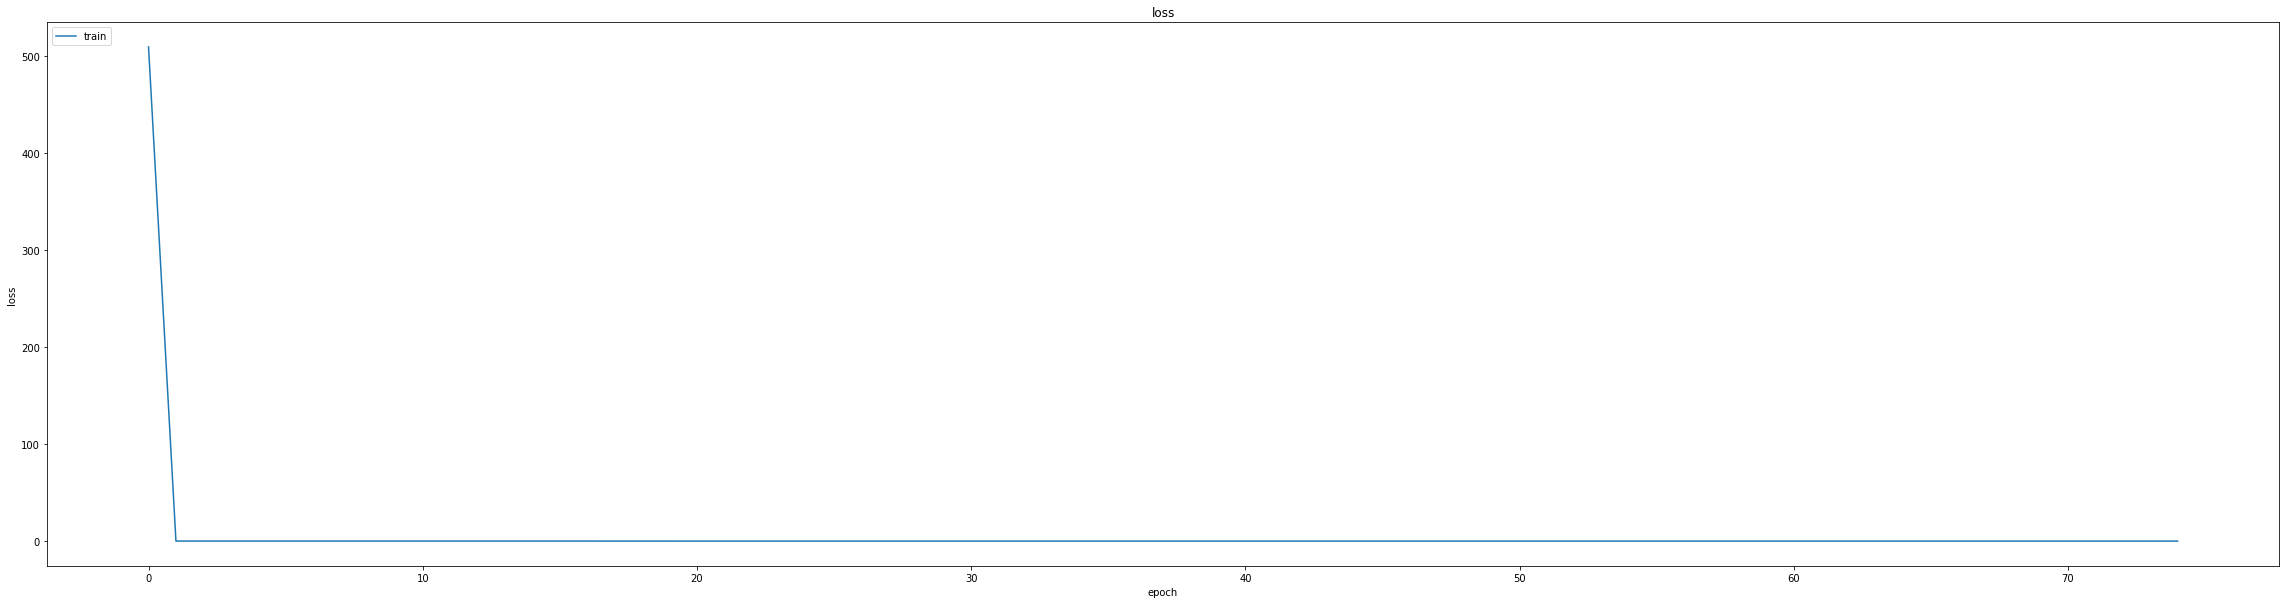

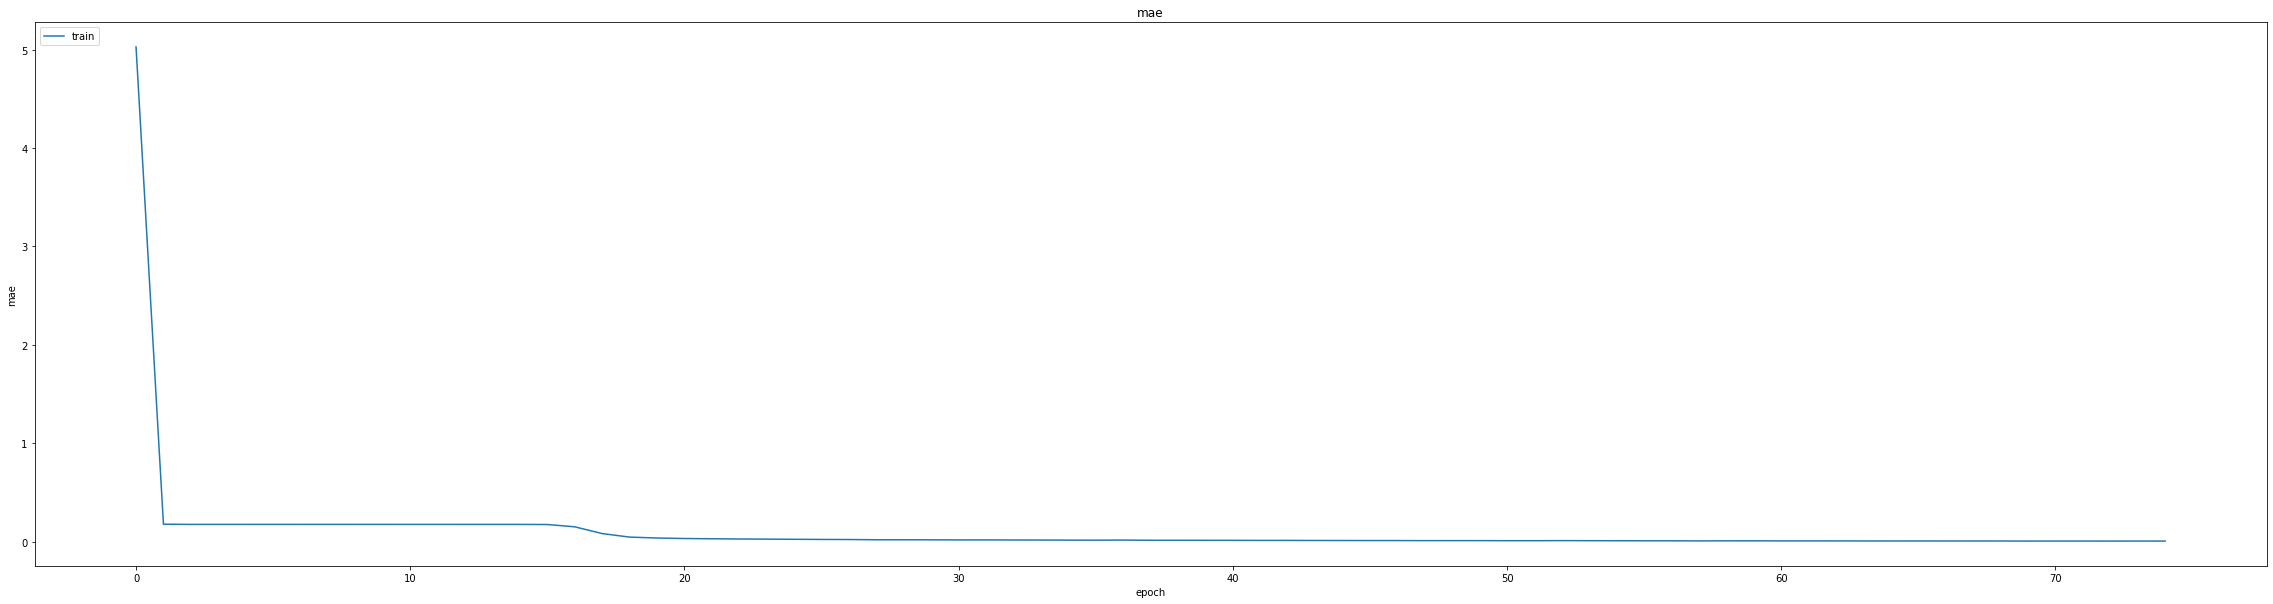

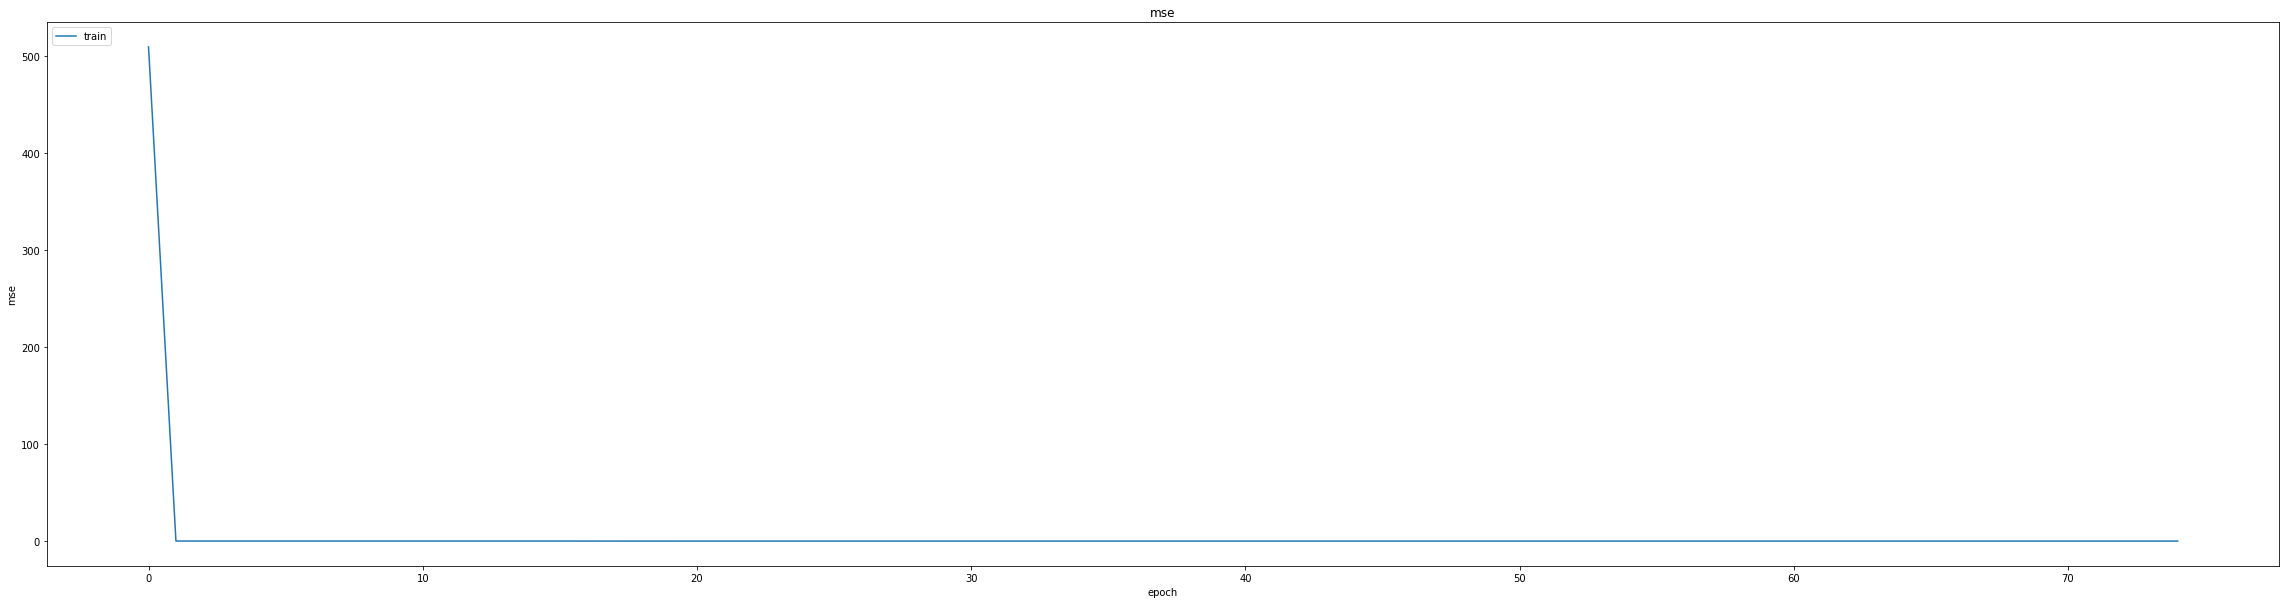

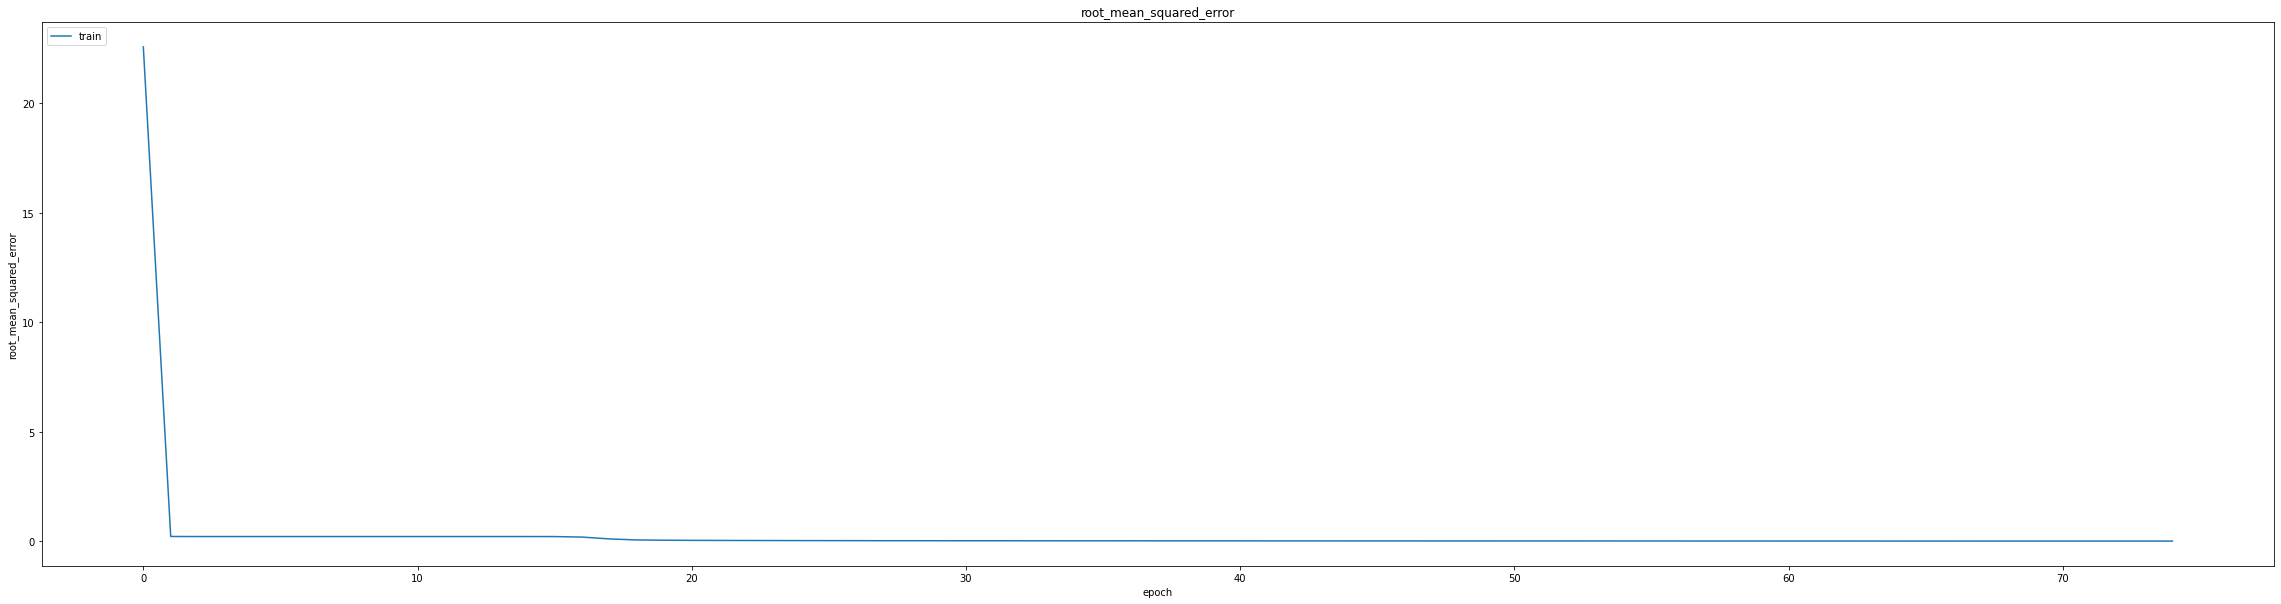

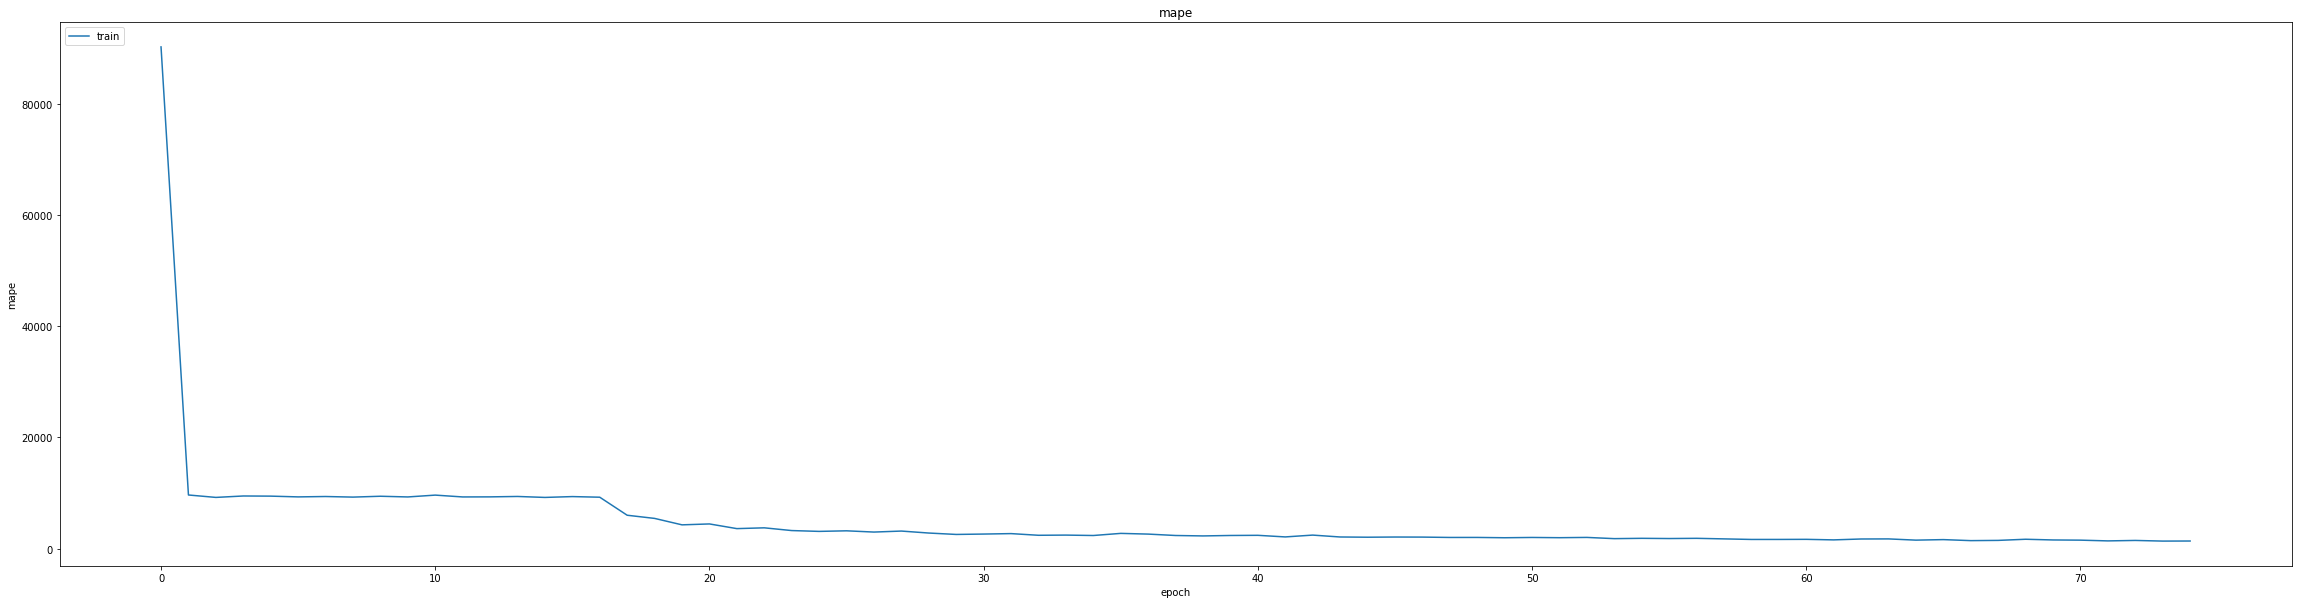

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012624158523976803
0.01853061094880104
348/348 [==============================] - 2s 4ms/step
0.9961160431976831


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
406/406 [==============================] - ETA: 0s - loss: 1.9767e-04 - mae: 0.0063 - mse: 1.9767e-04 - root_mean_squared_error: 0.0141 - mape: 1390.7659
Epoch 1: val_mse improved from 0.00034 to 0.00032, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 20s 41ms/step - loss: 1.9767e-04 - mae: 0.0063 - mse: 1.9767e-04 - root_mean_squared_error: 0.0141 - mape: 1390.7659 - val_loss: 3.1808e-04 - val_mae: 0.0122 - val_mse: 3.1808e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 28.8625 - lr: 0.0010
Epoch 2/25
402/406 [============================>.] - ETA: 0s - loss: 2.7676e-05 - mae: 0.0038 - mse: 2.7676e-05 - root_mean_squared_error: 0.0053 - mape: 1402.6124
Epoch 2: val_mse did not improve from 0.00032
406/406 [==============================] - 4s 11ms/step - loss: 2.7738e-05 - mae: 0.0038 - mse: 2.7738e-05 - root_mean_squared_error: 0.0053 - mape: 1389.0979 - val_loss: 3.7144e-04 - val_mae: 0.0140 - val_mse: 3.7144e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 30.3113 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
403/406 [============================>.] - ETA: 0s - loss: 3.0081e-05 - mae: 0.0041 - mse: 3.0081e-05 - root_mean_squared_error: 0.0055 - mape: 1495.3024
E

406/406 [==============================] - 15s 36ms/step - loss: 3.3487e-05 - mae: 0.0043 - mse: 3.3487e-05 - root_mean_squared_error: 0.0058 - mape: 1384.5951 - val_loss: 3.0427e-04 - val_mae: 0.0133 - val_mse: 3.0427e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 26.9309 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
406/406 [==============================] - ETA: 0s - loss: 3.1495e-05 - mae: 0.0042 - mse: 3.1495e-05 - root_mean_squared_error: 0.0056 - mape: 1269.9447
Epoch 9: val_mse improved from 0.00030 to 0.00029, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 3.1495e-05 - mae: 0.0042 - mse: 3.1495e-05 - root_mean_squared_error: 0.0056 - mape: 1269.9447 - val_loss: 2.8546e-04 - val_mae: 0.0124 - val_mse: 2.8546e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 26.2056 - lr: 6.5610e-04
Epoch 10/25
402/406 [============================>.] - ETA: 0s - loss: 3.0159e-05 - mae: 0.0041 - mse: 3.0159e-05 - root_mean_squared_error: 0.0055 - mape: 1269.1764
Epoch 10: val_mse improved from 0.00029 to 0.00028, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 3.0249e-05 - mae: 0.0041 - mse: 3.0249e-05 - root_mean_squared_error: 0.0055 - mape: 1256.9501 - val_loss: 2.7675e-04 - val_mae: 0.0123 - val_mse: 2.7675e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 26.0480 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
402/406 [============================>.] - ETA: 0s - loss: 2.2488e-05 - mae: 0.0035 - mse: 2.2488e-05 - root_mean_squared_error: 0.0047 - mape: 1273.4913
Epoch 11: val_mse did not improve from 0.00028
406/406 [==============================] - 4s 11ms/step - loss: 2.2500e-05 - mae: 0.0035 - mse: 2.2500e-05 - root_mean_squared_error: 0.0047 - mape: 1261.2200 - val_loss: 2.8286e-04 - val_mae: 0.0129 - val_mse: 2.8286e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 25.9078 - lr: 5.9049e-04
Epoch 12/25
403/406 [============================>.] - ETA: 0s - loss: 3.0050e-05 - mae: 0.0040 - mse: 3.0050e-05 - root_mean_squared_error: 0.0055 - mape: 

406/406 [==============================] - 15s 37ms/step - loss: 2.8452e-05 - mae: 0.0040 - mse: 2.8452e-05 - root_mean_squared_error: 0.0053 - mape: 1272.3492 - val_loss: 2.5313e-04 - val_mae: 0.0122 - val_mse: 2.5313e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 24.2019 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
402/406 [============================>.] - ETA: 0s - loss: 2.2338e-05 - mae: 0.0035 - mse: 2.2338e-05 - root_mean_squared_error: 0.0047 - mape: 1258.5177
Epoch 17: val_mse did not improve from 0.00025
406/406 [==============================] - 4s 11ms/step - loss: 2.2318e-05 - mae: 0.0035 - mse: 2.2318e-05 - root_mean_squared_error: 0.0047 - mape: 1246.3915 - val_loss: 2.8294e-04 - val_mae: 0.0123 - val_mse: 2.8294e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 26.0427 - lr: 4.3047e-04
Epoch 18/25
401/406 [============================>.] - ETA: 0s - loss: 2.5686e-05 - mae: 0.0038 - mse: 2.5686e-05 - root_mean_squared_error: 0.0051 - mape: 

406/406 [==============================] - 15s 37ms/step - loss: 1.9754e-05 - mae: 0.0032 - mse: 1.9754e-05 - root_mean_squared_error: 0.0044 - mape: 1186.6299 - val_loss: 2.3470e-04 - val_mae: 0.0116 - val_mse: 2.3470e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 23.6446 - lr: 3.8742e-04
Epoch 20/25
405/406 [============================>.] - ETA: 0s - loss: 2.0749e-05 - mae: 0.0033 - mse: 2.0749e-05 - root_mean_squared_error: 0.0046 - mape: 1160.8052
Epoch 20: val_mse did not improve from 0.00023
406/406 [==============================] - 4s 11ms/step - loss: 2.0740e-05 - mae: 0.0033 - mse: 2.0740e-05 - root_mean_squared_error: 0.0046 - mape: 1158.1932 - val_loss: 2.4731e-04 - val_mae: 0.0119 - val_mse: 2.4731e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 24.3687 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
404/406 [============================>.] - ETA: 0s - loss: 1.9456e-05 - mae: 0.0032 - mse: 1.9456e-05 - root_mean_squared_error: 0.0044 - mape: 

406/406 [==============================] - 14s 35ms/step - loss: 1.9429e-05 - mae: 0.0032 - mse: 1.9429e-05 - root_mean_squared_error: 0.0044 - mape: 1333.6334 - val_loss: 2.3376e-04 - val_mae: 0.0115 - val_mse: 2.3376e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 23.6504 - lr: 3.4868e-04
Epoch 22/25
402/406 [============================>.] - ETA: 0s - loss: 1.8792e-05 - mae: 0.0032 - mse: 1.8792e-05 - root_mean_squared_error: 0.0043 - mape: 1295.8149
Epoch 22: val_mse did not improve from 0.00023
406/406 [==============================] - 4s 11ms/step - loss: 1.8805e-05 - mae: 0.0032 - mse: 1.8805e-05 - root_mean_squared_error: 0.0043 - mape: 1283.3279 - val_loss: 2.5546e-04 - val_mae: 0.0119 - val_mse: 2.5546e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 24.7776 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
405/406 [============================>.] - ETA: 0s - loss: 1.7893e-05 - mae: 0.0031 - mse: 1.7893e-05 - root_mean_squared_error: 0.0042 - mape:

406/406 [==============================] - 15s 38ms/step - loss: 2.0814e-05 - mae: 0.0033 - mse: 2.0814e-05 - root_mean_squared_error: 0.0046 - mape: 1188.2190 - val_loss: 2.1648e-04 - val_mae: 0.0111 - val_mse: 2.1648e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 22.7914 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
406/406 [==============================] - ETA: 0s - loss: 1.8141e-05 - mae: 0.0031 - mse: 1.8141e-05 - root_mean_squared_error: 0.0043 - mape: 1114.5126
Epoch 25: val_mse did not improve from 0.00022
406/406 [==============================] - 4s 11ms/step - loss: 1.8141e-05 - mae: 0.0031 - mse: 1.8141e-05 - root_mean_squared_error: 0.0043 - mape: 1114.5126 - val_loss: 2.3760e-04 - val_mae: 0.0118 - val_mse: 2.3760e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 23.4268 - lr: 2.8243e-04


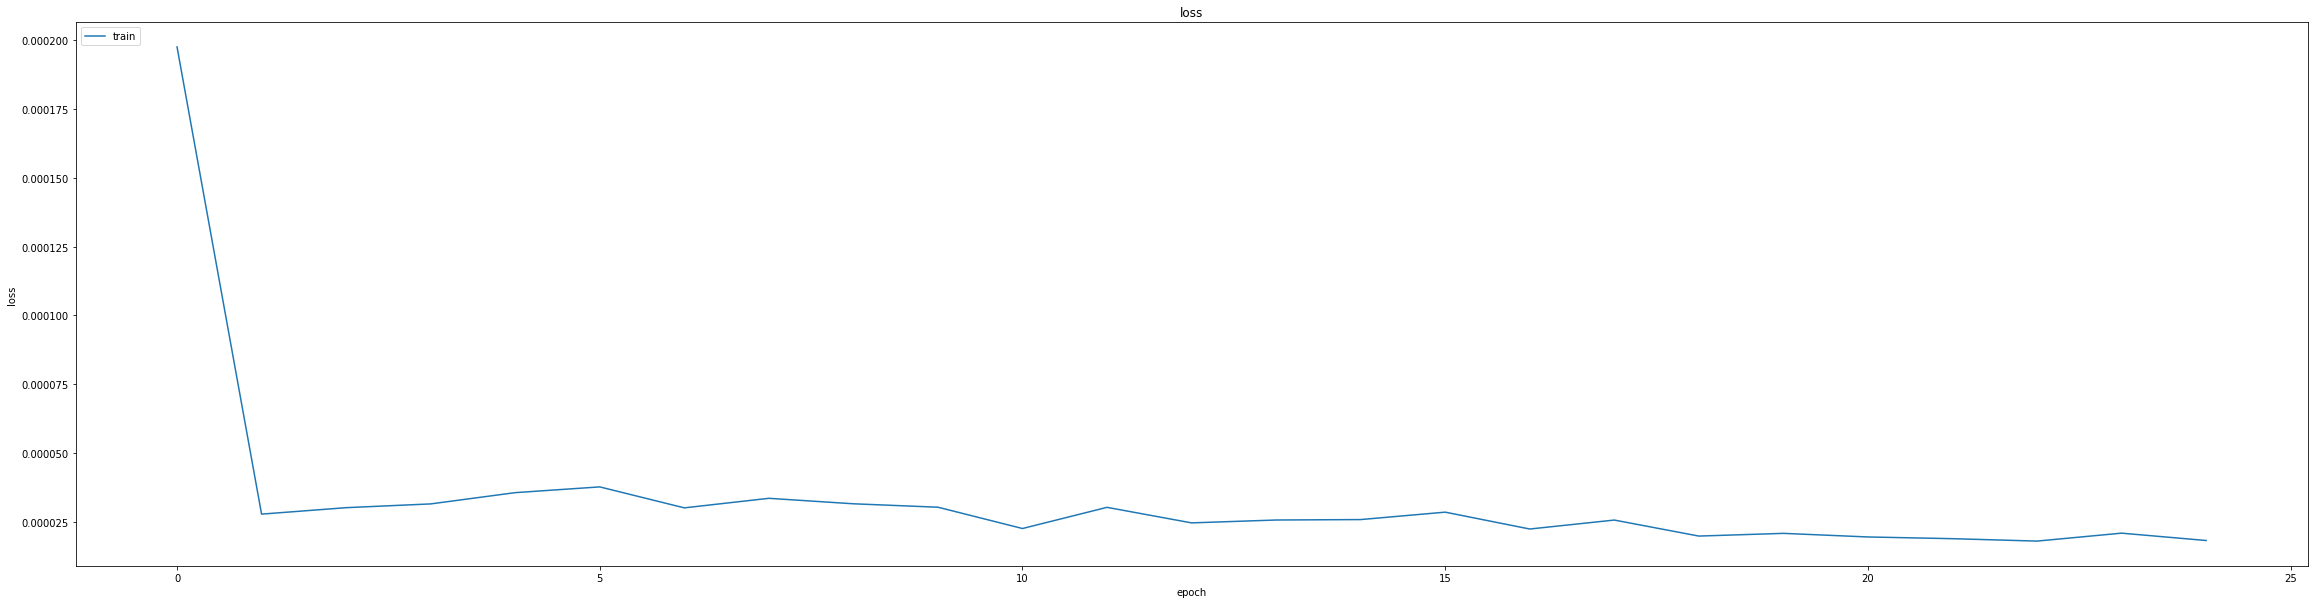

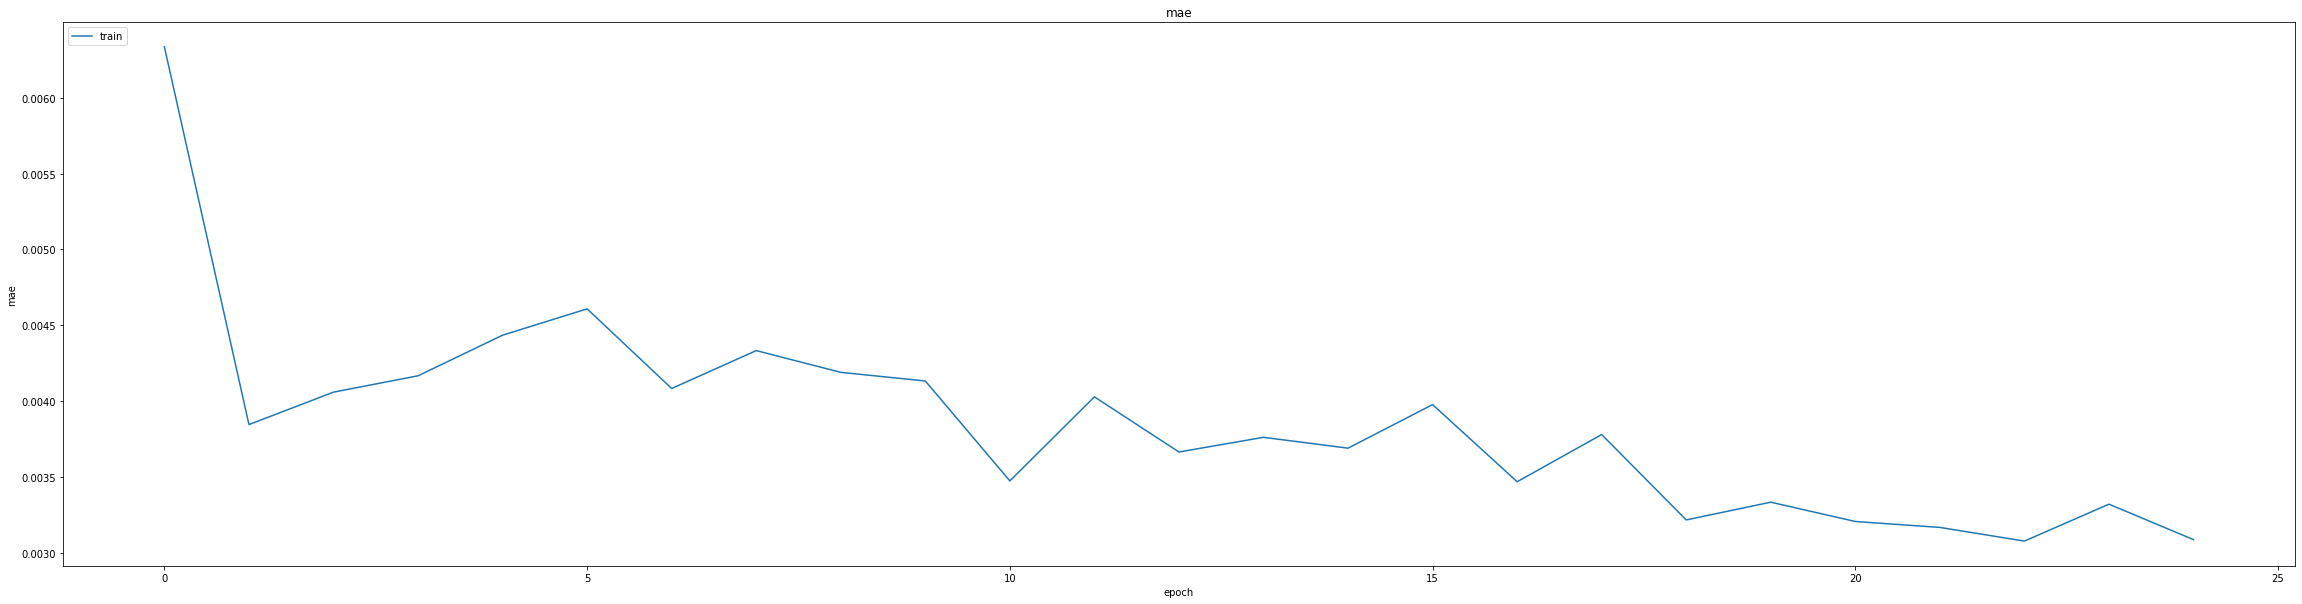

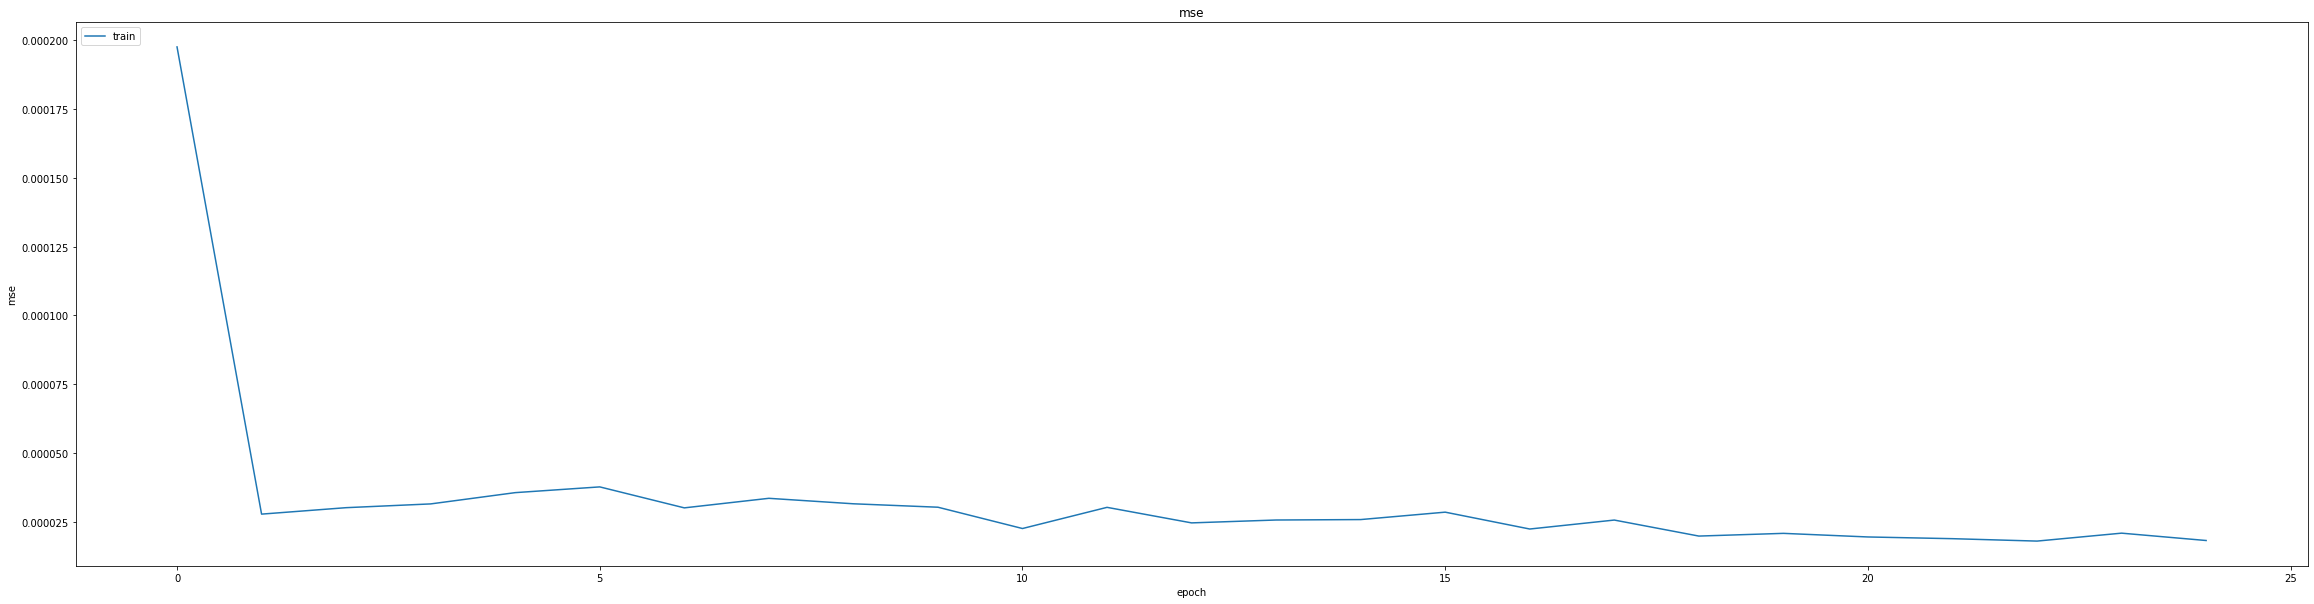

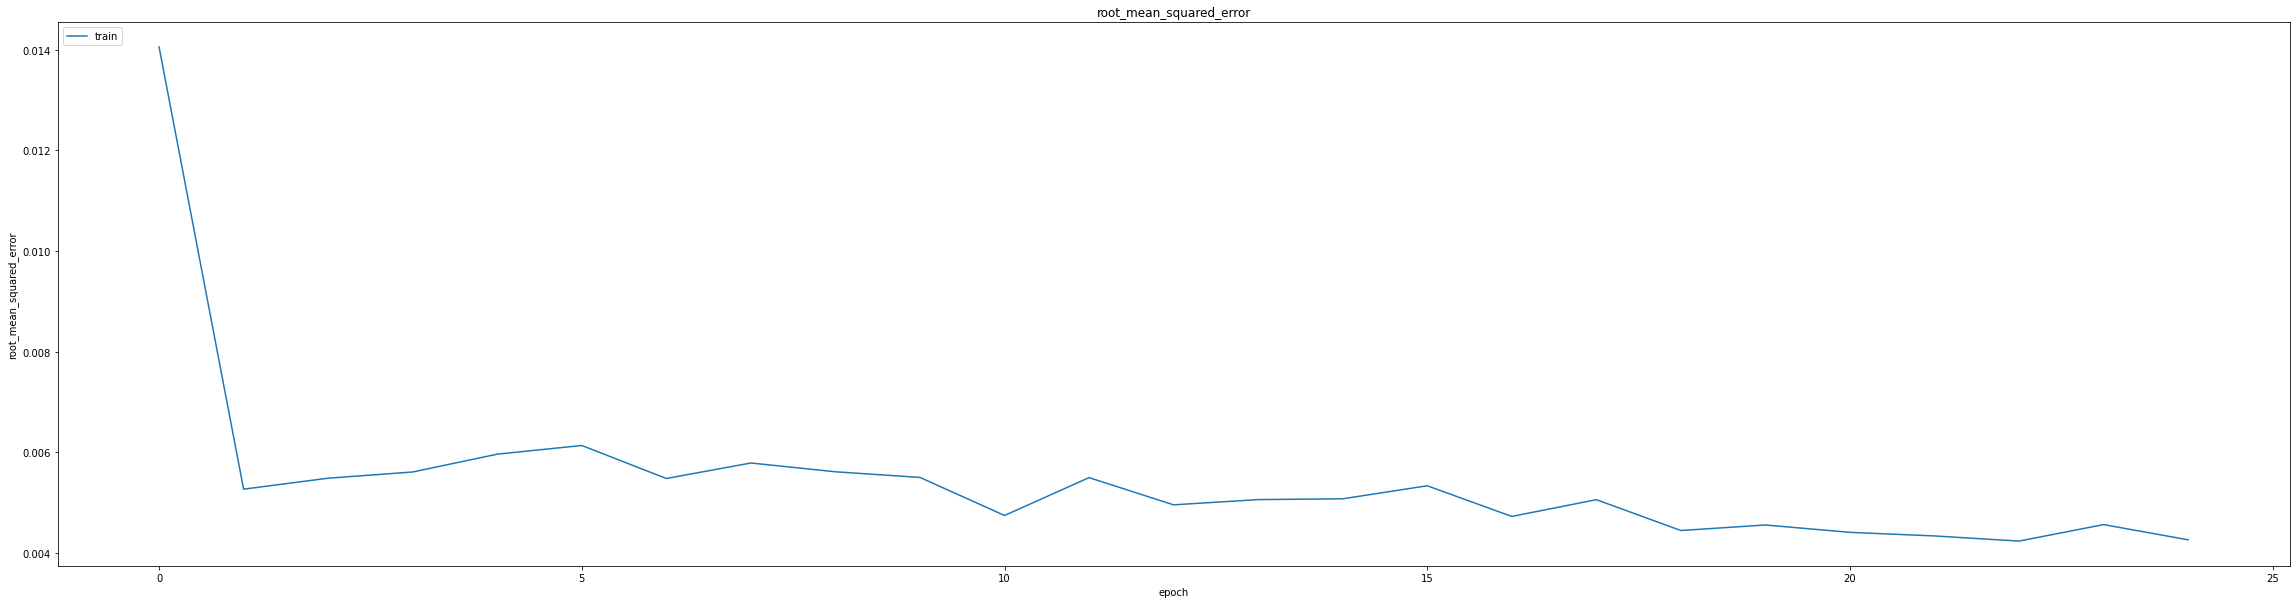

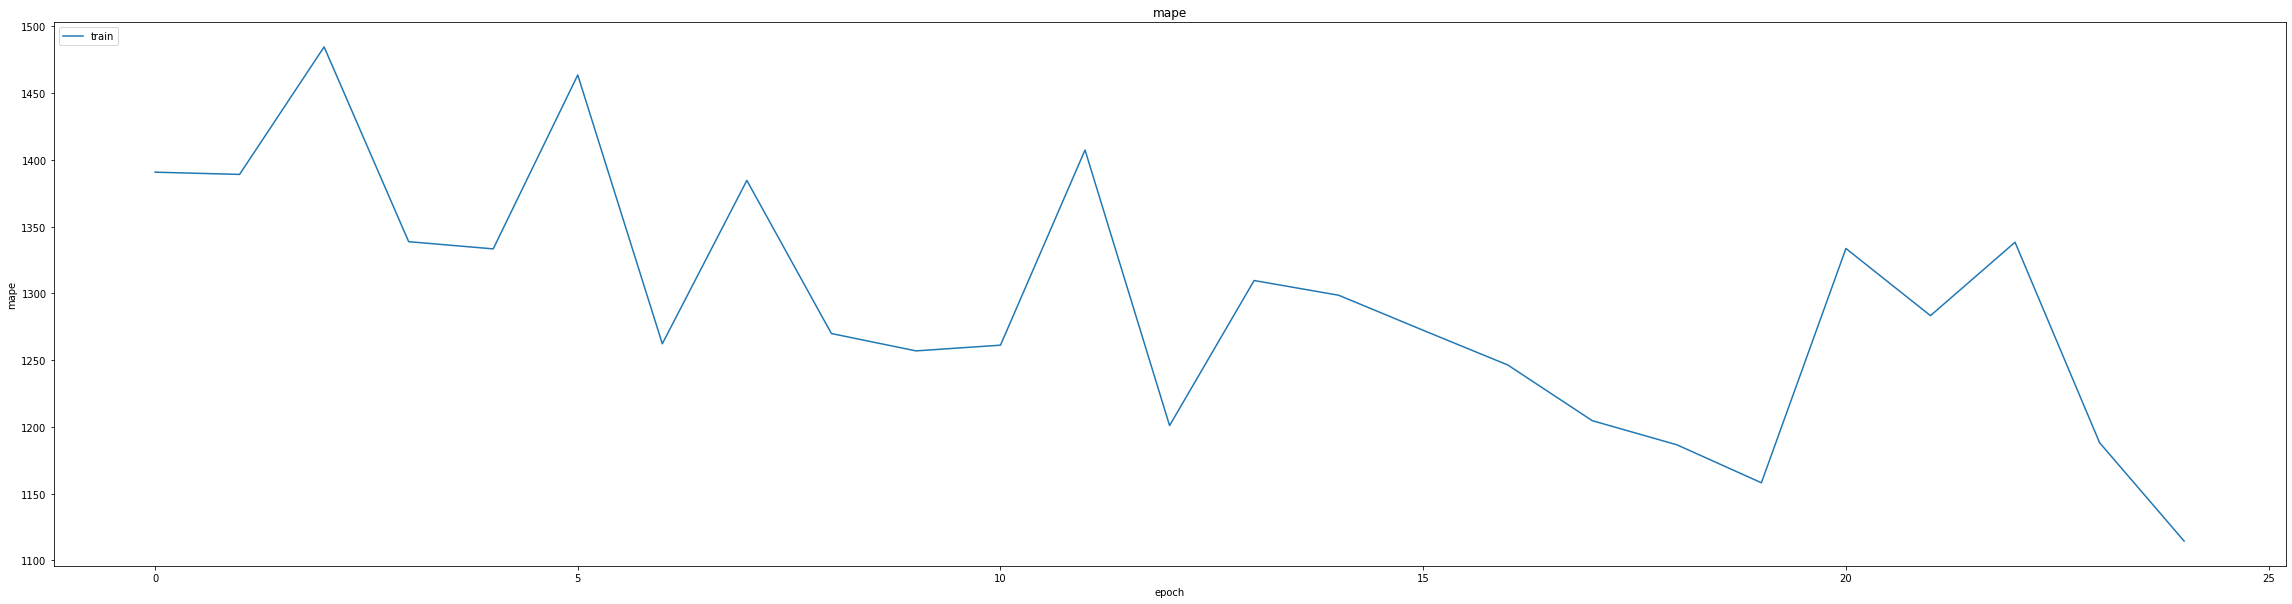

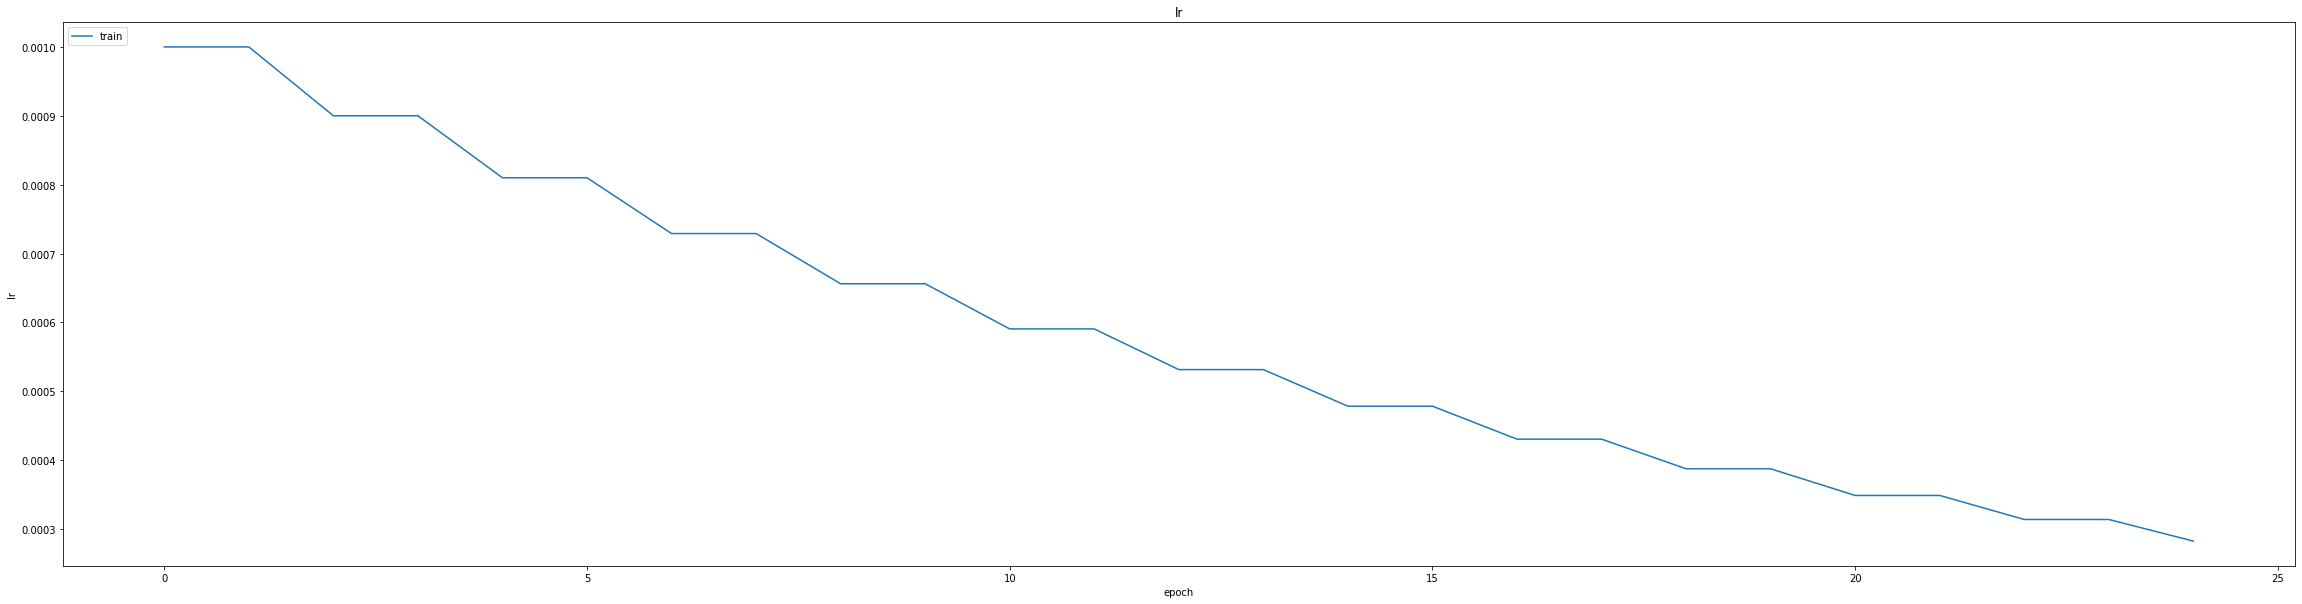

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011103418655693531
0.014713145792484283
348/348 [==============================] - 2s 4ms/step
0.9973125035651484


348/348 [==============================] - 1s 4ms/step


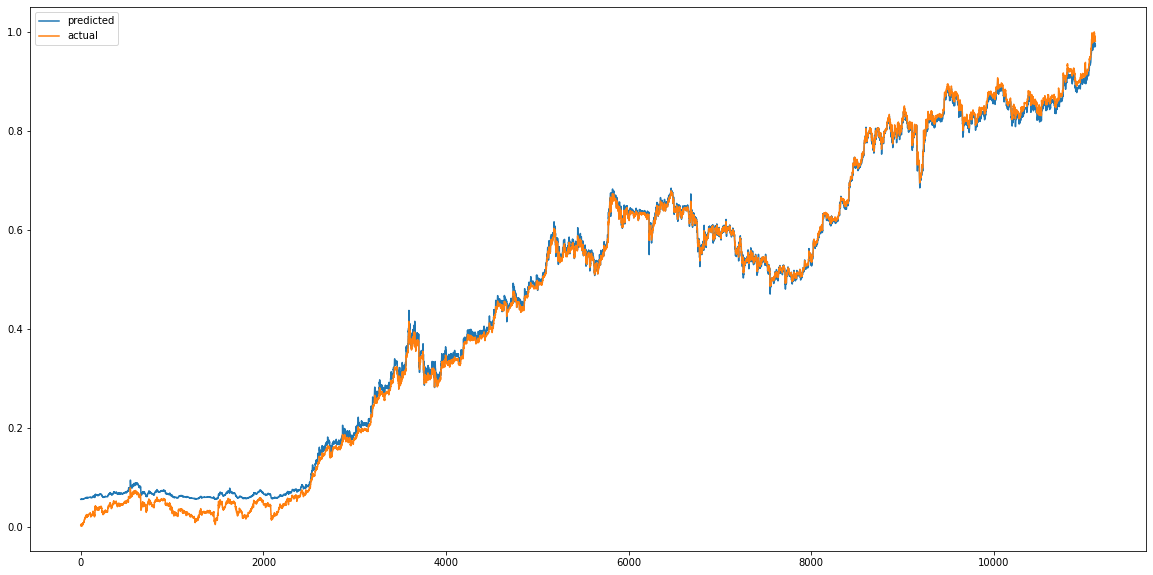

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


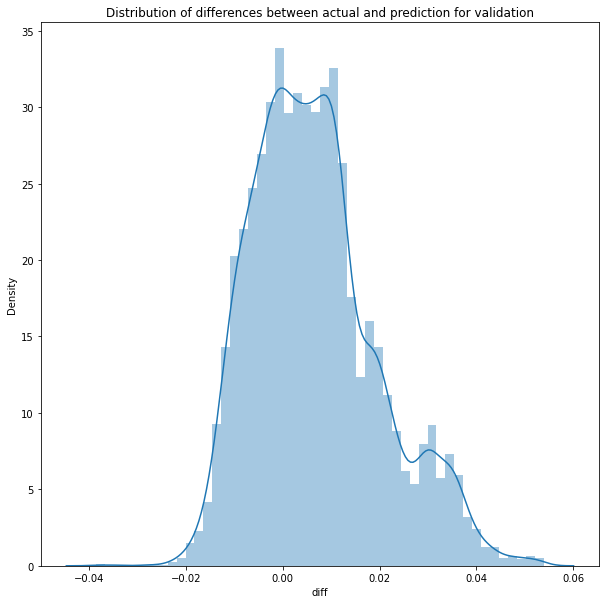

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


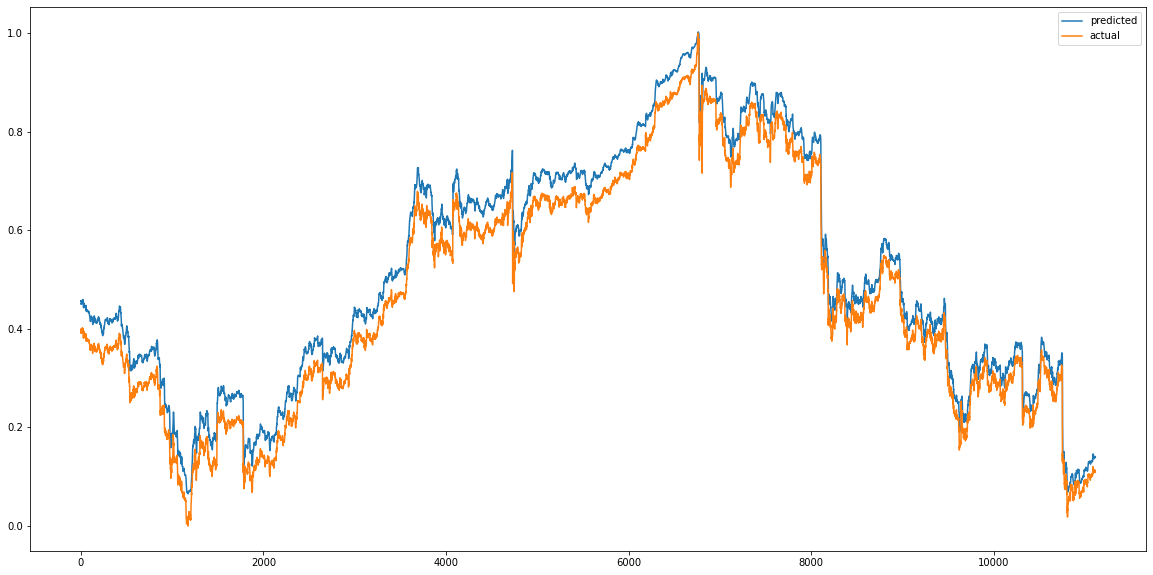

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


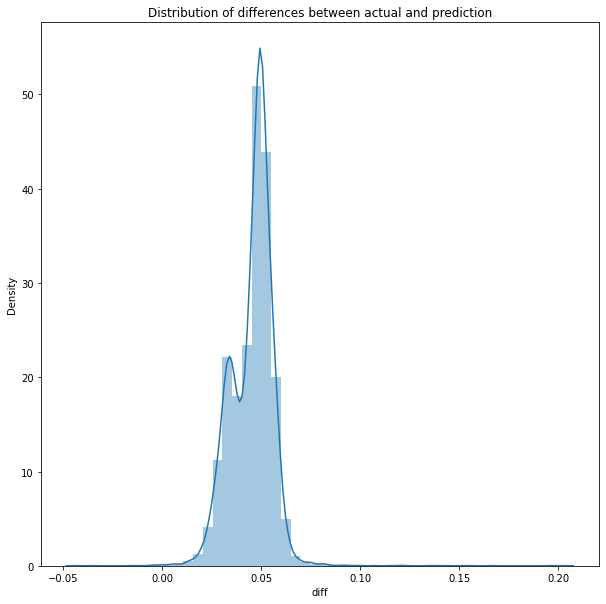

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0021738841465183956
RMSE :  0.04662493052561468
MAE :  0.04540020914440803
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9611532130294715


count    11115.000000
mean         0.045377
std          0.010715
min         -0.043394
25%          0.038129
50%          0.047531
75%          0.051987
max          0.202644
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 264.7226 - mae: 2.1830 - mse: 264.7226 - root_mean_squared_error: 16.2703 - mape: 9367.6279
Epoch 1: val_mse improved from inf to 0.08480, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 42s 81ms/step - loss: 263.4746 - mae: 2.1735 - mse: 263.4746 - root_mean_squared_error: 16.2319 - mape: 9323.6309 - val_loss: 0.0848 - val_mae: 0.2487 - val_mse: 0.0848 - val_root_mean_squared_error: 0.2912 - val_mape: 210.2744
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 0.0241 - mae: 0.0970 - mse: 0.0241 - root_mean_squared_error: 0.1552 - mape: 4482.9619
Epoch 2: val_mse improved from 0.08480 to 0.01624, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 73ms/step - loss: 0.0241 - mae: 0.0969 - mse: 0.0241 - root_mean_squared_error: 0.1551 - mape: 4472.8945 - val_loss: 0.0162 - val_mae: 0.0953 - val_mse: 0.0162 - val_root_mean_squared_error: 0.1274 - val_mape: 124.2318
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0373 - mse: 0.0034 - root_mean_squared_error: 0.0580 - mape: 4049.3503
Epoch 3: val_mse improved from 0.01624 to 0.00497, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 0.0034 - mae: 0.0373 - mse: 0.0034 - root_mean_squared_error: 0.0580 - mape: 4049.3503 - val_loss: 0.0050 - val_mae: 0.0470 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0705 - val_mape: 104.0197
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 3094.9678
Epoch 4: val_mse improved from 0.00497 to 0.00362, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 3080.4026 - val_loss: 0.0036 - val_mae: 0.0374 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0602 - val_mape: 95.3654
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0239 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 3003.1548
Epoch 5: val_mse improved from 0.00362 to 0.00294, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 73ms/step - loss: 0.0010 - mae: 0.0239 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 3003.1548 - val_loss: 0.0029 - val_mae: 0.0364 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 85.6262
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 9.6028e-04 - mae: 0.0228 - mse: 9.6028e-04 - root_mean_squared_error: 0.0310 - mape: 2663.2456
Epoch 6: val_mse improved from 0.00294 to 0.00251, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 9.6028e-04 - mae: 0.0228 - mse: 9.6028e-04 - root_mean_squared_error: 0.0310 - mape: 2663.2456 - val_loss: 0.0025 - val_mae: 0.0329 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 79.4116
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 9.1980e-04 - mae: 0.0224 - mse: 9.1980e-04 - root_mean_squared_error: 0.0303 - mape: 2575.4568
Epoch 7: val_mse improved from 0.00251 to 0.00241, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 9.1874e-04 - mae: 0.0224 - mse: 9.1874e-04 - root_mean_squared_error: 0.0303 - mape: 2563.3357 - val_loss: 0.0024 - val_mae: 0.0320 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0491 - val_mape: 78.7497
Epoch 8/75
406/406 [==============================] - ETA: 0s - loss: 8.8452e-04 - mae: 0.0219 - mse: 8.8452e-04 - root_mean_squared_error: 0.0297 - mape: 2700.1890
Epoch 8: val_mse did not improve from 0.00241
406/406 [==============================] - 7s 16ms/step - loss: 8.8452e-04 - mae: 0.0219 - mse: 8.8452e-04 - root_mean_squared_error: 0.0297 - mape: 2700.1890 - val_loss: 0.0028 - val_mae: 0.0321 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0527 - val_mape: 86.5917
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 8.2852e-04 - mae: 0.0212 - mse: 8.2852e-04 - root_mean_squared_error: 0.0288 - mape: 2421.0632
Epoch 9: val_mse improved from 0.00241 to 0.00232, saving model to /content/dri

406/406 [==============================] - 29s 72ms/step - loss: 8.2835e-04 - mae: 0.0212 - mse: 8.2835e-04 - root_mean_squared_error: 0.0288 - mape: 2415.6223 - val_loss: 0.0023 - val_mae: 0.0311 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0482 - val_mape: 77.9443
Epoch 10/75
406/406 [==============================] - ETA: 0s - loss: 7.9143e-04 - mae: 0.0207 - mse: 7.9143e-04 - root_mean_squared_error: 0.0281 - mape: 2747.4292
Epoch 10: val_mse improved from 0.00232 to 0.00223, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 73ms/step - loss: 7.9143e-04 - mae: 0.0207 - mse: 7.9143e-04 - root_mean_squared_error: 0.0281 - mape: 2747.4292 - val_loss: 0.0022 - val_mae: 0.0299 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0472 - val_mape: 76.3337
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 7.5437e-04 - mae: 0.0203 - mse: 7.5437e-04 - root_mean_squared_error: 0.0275 - mape: 2807.6118
Epoch 11: val_mse improved from 0.00223 to 0.00204, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 73ms/step - loss: 7.5496e-04 - mae: 0.0203 - mse: 7.5496e-04 - root_mean_squared_error: 0.0275 - mape: 2794.3923 - val_loss: 0.0020 - val_mae: 0.0291 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0452 - val_mape: 72.1676
Epoch 12/75
405/406 [============================>.] - ETA: 0s - loss: 7.1556e-04 - mae: 0.0198 - mse: 7.1556e-04 - root_mean_squared_error: 0.0268 - mape: 2526.1294
Epoch 12: val_mse improved from 0.00204 to 0.00201, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 7.1560e-04 - mae: 0.0198 - mse: 7.1560e-04 - root_mean_squared_error: 0.0268 - mape: 2520.4558 - val_loss: 0.0020 - val_mae: 0.0299 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0448 - val_mape: 71.1753
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 6.6397e-04 - mae: 0.0191 - mse: 6.6397e-04 - root_mean_squared_error: 0.0258 - mape: 2841.0649
Epoch 13: val_mse improved from 0.00201 to 0.00199, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 6.6466e-04 - mae: 0.0191 - mse: 6.6466e-04 - root_mean_squared_error: 0.0258 - mape: 2820.7092 - val_loss: 0.0020 - val_mae: 0.0282 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0446 - val_mape: 71.9056
Epoch 14/75
405/406 [============================>.] - ETA: 0s - loss: 6.2062e-04 - mae: 0.0185 - mse: 6.2062e-04 - root_mean_squared_error: 0.0249 - mape: 2329.9966
Epoch 14: val_mse did not improve from 0.00199
406/406 [==============================] - 6s 15ms/step - loss: 6.2068e-04 - mae: 0.0185 - mse: 6.2068e-04 - root_mean_squared_error: 0.0249 - mape: 2324.7593 - val_loss: 0.0020 - val_mae: 0.0291 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0447 - val_mape: 71.8291
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 5.8668e-04 - mae: 0.0180 - mse: 5.8668e-04 - root_mean_squared_error: 0.0242 - mape: 2752.5554
Epoch 15: val_mse improved from 0.00199 to 0.00196, saving model to /content

406/406 [==============================] - 29s 71ms/step - loss: 5.8685e-04 - mae: 0.0180 - mse: 5.8685e-04 - root_mean_squared_error: 0.0242 - mape: 2739.5989 - val_loss: 0.0020 - val_mae: 0.0321 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0442 - val_mape: 68.1427
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 5.3896e-04 - mae: 0.0173 - mse: 5.3896e-04 - root_mean_squared_error: 0.0232 - mape: 2680.9648
Epoch 16: val_mse improved from 0.00196 to 0.00173, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 5.3896e-04 - mae: 0.0173 - mse: 5.3896e-04 - root_mean_squared_error: 0.0232 - mape: 2680.9648 - val_loss: 0.0017 - val_mae: 0.0281 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 65.5890
Epoch 17/75
405/406 [============================>.] - ETA: 0s - loss: 4.8982e-04 - mae: 0.0166 - mse: 4.8982e-04 - root_mean_squared_error: 0.0221 - mape: 2670.7498
Epoch 17: val_mse improved from 0.00173 to 0.00171, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 4.8972e-04 - mae: 0.0166 - mse: 4.8972e-04 - root_mean_squared_error: 0.0221 - mape: 2664.7432 - val_loss: 0.0017 - val_mae: 0.0277 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 65.8299
Epoch 18/75
406/406 [==============================] - ETA: 0s - loss: 4.6052e-04 - mae: 0.0161 - mse: 4.6052e-04 - root_mean_squared_error: 0.0215 - mape: 2491.9094
Epoch 18: val_mse improved from 0.00171 to 0.00168, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 4.6052e-04 - mae: 0.0161 - mse: 4.6052e-04 - root_mean_squared_error: 0.0215 - mape: 2491.9094 - val_loss: 0.0017 - val_mae: 0.0277 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 64.6105
Epoch 19/75
406/406 [==============================] - ETA: 0s - loss: 4.2492e-04 - mae: 0.0155 - mse: 4.2492e-04 - root_mean_squared_error: 0.0206 - mape: 2431.8716
Epoch 19: val_mse improved from 0.00168 to 0.00155, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 4.2492e-04 - mae: 0.0155 - mse: 4.2492e-04 - root_mean_squared_error: 0.0206 - mape: 2431.8716 - val_loss: 0.0016 - val_mae: 0.0264 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 62.4710
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 3.9004e-04 - mae: 0.0149 - mse: 3.9004e-04 - root_mean_squared_error: 0.0197 - mape: 2607.3350
Epoch 20: val_mse improved from 0.00155 to 0.00149, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 3.8941e-04 - mae: 0.0149 - mse: 3.8941e-04 - root_mean_squared_error: 0.0197 - mape: 2588.6418 - val_loss: 0.0015 - val_mae: 0.0271 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 60.0548
Epoch 21/75
403/406 [============================>.] - ETA: 0s - loss: 3.6005e-04 - mae: 0.0143 - mse: 3.6005e-04 - root_mean_squared_error: 0.0190 - mape: 2388.2737
Epoch 21: val_mse improved from 0.00149 to 0.00147, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 3.6015e-04 - mae: 0.0143 - mse: 3.6015e-04 - root_mean_squared_error: 0.0190 - mape: 2371.1533 - val_loss: 0.0015 - val_mae: 0.0271 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 59.6995
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 3.1982e-04 - mae: 0.0136 - mse: 3.1982e-04 - root_mean_squared_error: 0.0179 - mape: 2231.7131
Epoch 22: val_mse did not improve from 0.00147
406/406 [==============================] - 6s 15ms/step - loss: 3.1976e-04 - mae: 0.0136 - mse: 3.1976e-04 - root_mean_squared_error: 0.0179 - mape: 2221.2073 - val_loss: 0.0016 - val_mae: 0.0295 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0395 - val_mape: 60.6678
Epoch 23/75
403/406 [============================>.] - ETA: 0s - loss: 2.9121e-04 - mae: 0.0130 - mse: 2.9121e-04 - root_mean_squared_error: 0.0171 - mape: 2287.1472
Epoch 23: val_mse improved from 0.00147 to 0.00127, saving model to /content

406/406 [==============================] - 28s 70ms/step - loss: 2.9127e-04 - mae: 0.0130 - mse: 2.9127e-04 - root_mean_squared_error: 0.0171 - mape: 2270.7661 - val_loss: 0.0013 - val_mae: 0.0238 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 56.6038
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 2.6294e-04 - mae: 0.0123 - mse: 2.6294e-04 - root_mean_squared_error: 0.0162 - mape: 2349.4800
Epoch 24: val_mse did not improve from 0.00127
406/406 [==============================] - 6s 15ms/step - loss: 2.6294e-04 - mae: 0.0123 - mse: 2.6294e-04 - root_mean_squared_error: 0.0162 - mape: 2349.4800 - val_loss: 0.0014 - val_mae: 0.0303 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 56.4424
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 2.3177e-04 - mae: 0.0116 - mse: 2.3177e-04 - root_mean_squared_error: 0.0152 - mape: 2120.2080
Epoch 25: val_mse improved from 0.00127 to 0.00122, saving model to /content

406/406 [==============================] - 29s 71ms/step - loss: 2.3177e-04 - mae: 0.0116 - mse: 2.3177e-04 - root_mean_squared_error: 0.0152 - mape: 2120.2080 - val_loss: 0.0012 - val_mae: 0.0256 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 54.0954
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 2.0690e-04 - mae: 0.0110 - mse: 2.0690e-04 - root_mean_squared_error: 0.0144 - mape: 1920.7089
Epoch 26: val_mse improved from 0.00122 to 0.00121, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 2.0690e-04 - mae: 0.0110 - mse: 2.0690e-04 - root_mean_squared_error: 0.0144 - mape: 1920.7089 - val_loss: 0.0012 - val_mae: 0.0266 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 53.1910
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 1.8479e-04 - mae: 0.0103 - mse: 1.8479e-04 - root_mean_squared_error: 0.0136 - mape: 2084.5938
Epoch 27: val_mse improved from 0.00121 to 0.00109, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 1.8479e-04 - mae: 0.0103 - mse: 1.8479e-04 - root_mean_squared_error: 0.0136 - mape: 2084.5938 - val_loss: 0.0011 - val_mae: 0.0258 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 50.1409
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 1.6262e-04 - mae: 0.0097 - mse: 1.6262e-04 - root_mean_squared_error: 0.0128 - mape: 1948.7531
Epoch 28: val_mse improved from 0.00109 to 0.00108, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 1.6261e-04 - mae: 0.0097 - mse: 1.6261e-04 - root_mean_squared_error: 0.0128 - mape: 1944.3705 - val_loss: 0.0011 - val_mae: 0.0253 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 50.1784
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 1.4623e-04 - mae: 0.0093 - mse: 1.4623e-04 - root_mean_squared_error: 0.0121 - mape: 1910.1658
Epoch 29: val_mse improved from 0.00108 to 0.00103, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 1.4619e-04 - mae: 0.0093 - mse: 1.4619e-04 - root_mean_squared_error: 0.0121 - mape: 1905.8695 - val_loss: 0.0010 - val_mae: 0.0249 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 48.9050
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 1.2862e-04 - mae: 0.0087 - mse: 1.2862e-04 - root_mean_squared_error: 0.0113 - mape: 2033.2991
Epoch 30: val_mse improved from 0.00103 to 0.00094, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 1.2852e-04 - mae: 0.0087 - mse: 1.2852e-04 - root_mean_squared_error: 0.0113 - mape: 2023.7207 - val_loss: 9.4260e-04 - val_mae: 0.0240 - val_mse: 9.4260e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 46.5925
Epoch 31/75
403/406 [============================>.] - ETA: 0s - loss: 1.1667e-04 - mae: 0.0082 - mse: 1.1667e-04 - root_mean_squared_error: 0.0108 - mape: 1733.0900
Epoch 31: val_mse improved from 0.00094 to 0.00094, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 30s 74ms/step - loss: 1.1665e-04 - mae: 0.0082 - mse: 1.1665e-04 - root_mean_squared_error: 0.0108 - mape: 1720.6661 - val_loss: 9.3699e-04 - val_mae: 0.0241 - val_mse: 9.3699e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 46.2933
Epoch 32/75
404/406 [============================>.] - ETA: 0s - loss: 1.0639e-04 - mae: 0.0079 - mse: 1.0639e-04 - root_mean_squared_error: 0.0103 - mape: 1886.5043
Epoch 32: val_mse improved from 0.00094 to 0.00084, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 70ms/step - loss: 1.0627e-04 - mae: 0.0079 - mse: 1.0627e-04 - root_mean_squared_error: 0.0103 - mape: 1877.6169 - val_loss: 8.4108e-04 - val_mae: 0.0219 - val_mse: 8.4108e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 44.9677
Epoch 33/75
406/406 [==============================] - ETA: 0s - loss: 9.6961e-05 - mae: 0.0075 - mse: 9.6961e-05 - root_mean_squared_error: 0.0098 - mape: 1805.4113
Epoch 33: val_mse improved from 0.00084 to 0.00082, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 72ms/step - loss: 9.6961e-05 - mae: 0.0075 - mse: 9.6961e-05 - root_mean_squared_error: 0.0098 - mape: 1805.4113 - val_loss: 8.2240e-04 - val_mae: 0.0236 - val_mse: 8.2240e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 42.6014
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 8.8473e-05 - mae: 0.0072 - mse: 8.8473e-05 - root_mean_squared_error: 0.0094 - mape: 1749.4844
Epoch 34: val_mse improved from 0.00082 to 0.00065, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 70ms/step - loss: 8.8473e-05 - mae: 0.0072 - mse: 8.8473e-05 - root_mean_squared_error: 0.0094 - mape: 1749.4844 - val_loss: 6.4662e-04 - val_mae: 0.0188 - val_mse: 6.4662e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 39.6629
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 8.2578e-05 - mae: 0.0070 - mse: 8.2578e-05 - root_mean_squared_error: 0.0091 - mape: 1822.7043
Epoch 35: val_mse did not improve from 0.00065
406/406 [==============================] - 6s 15ms/step - loss: 8.2549e-05 - mae: 0.0070 - mse: 8.2549e-05 - root_mean_squared_error: 0.0091 - mape: 1814.1183 - val_loss: 7.1717e-04 - val_mae: 0.0223 - val_mse: 7.1717e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 39.1489
Epoch 36/75
403/406 [============================>.] - ETA: 0s - loss: 7.3406e-05 - mae: 0.0065 - mse: 7.3406e-05 - root_mean_squared_error: 0.0086 - mape: 1663.7195
Epoch 36: val_mse improved from 0.00065 to 0.00063, saving m

406/406 [==============================] - 30s 74ms/step - loss: 7.3433e-05 - mae: 0.0065 - mse: 7.3433e-05 - root_mean_squared_error: 0.0086 - mape: 1651.7886 - val_loss: 6.3299e-04 - val_mae: 0.0207 - val_mse: 6.3299e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 37.1125
Epoch 37/75
403/406 [============================>.] - ETA: 0s - loss: 7.3074e-05 - mae: 0.0065 - mse: 7.3074e-05 - root_mean_squared_error: 0.0085 - mape: 1541.0333
Epoch 37: val_mse did not improve from 0.00063
406/406 [==============================] - 6s 16ms/step - loss: 7.3034e-05 - mae: 0.0065 - mse: 7.3034e-05 - root_mean_squared_error: 0.0085 - mape: 1529.9856 - val_loss: 6.7047e-04 - val_mae: 0.0221 - val_mse: 6.7047e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 36.9751
Epoch 38/75
403/406 [============================>.] - ETA: 0s - loss: 6.8545e-05 - mae: 0.0063 - mse: 6.8545e-05 - root_mean_squared_error: 0.0083 - mape: 1507.6572
Epoch 38: val_mse improved from 0.00063 to 0.00053, saving m

406/406 [==============================] - 29s 71ms/step - loss: 6.8550e-05 - mae: 0.0063 - mse: 6.8550e-05 - root_mean_squared_error: 0.0083 - mape: 1496.8459 - val_loss: 5.3305e-04 - val_mae: 0.0178 - val_mse: 5.3305e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 35.3087
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 6.5343e-05 - mae: 0.0062 - mse: 6.5343e-05 - root_mean_squared_error: 0.0081 - mape: 1549.5756
Epoch 39: val_mse did not improve from 0.00053
406/406 [==============================] - 6s 15ms/step - loss: 6.5347e-05 - mae: 0.0062 - mse: 6.5347e-05 - root_mean_squared_error: 0.0081 - mape: 1546.0897 - val_loss: 8.8136e-04 - val_mae: 0.0277 - val_mse: 8.8136e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 37.5947
Epoch 40/75
405/406 [============================>.] - ETA: 0s - loss: 6.1964e-05 - mae: 0.0061 - mse: 6.1964e-05 - root_mean_squared_error: 0.0079 - mape: 1472.8405
Epoch 40: val_mse did not improve from 0.00053
406/406 [====

406/406 [==============================] - 29s 71ms/step - loss: 6.8499e-05 - mae: 0.0063 - mse: 6.8499e-05 - root_mean_squared_error: 0.0083 - mape: 1500.7722 - val_loss: 4.5114e-04 - val_mae: 0.0160 - val_mse: 4.5114e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 33.0438
Epoch 42/75
406/406 [==============================] - ETA: 0s - loss: 6.0122e-05 - mae: 0.0059 - mse: 6.0122e-05 - root_mean_squared_error: 0.0078 - mape: 1483.8271
Epoch 42: val_mse did not improve from 0.00045
406/406 [==============================] - 6s 15ms/step - loss: 6.0122e-05 - mae: 0.0059 - mse: 6.0122e-05 - root_mean_squared_error: 0.0078 - mape: 1483.8271 - val_loss: 6.6636e-04 - val_mae: 0.0231 - val_mse: 6.6636e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 35.1959
Epoch 43/75
404/406 [============================>.] - ETA: 0s - loss: 6.2287e-05 - mae: 0.0060 - mse: 6.2287e-05 - root_mean_squared_error: 0.0079 - mape: 1604.2747
Epoch 43: val_mse did not improve from 0.00045
406/406 [====

406/406 [==============================] - 30s 73ms/step - loss: 6.9089e-05 - mae: 0.0063 - mse: 6.9089e-05 - root_mean_squared_error: 0.0083 - mape: 1344.3215 - val_loss: 3.8986e-04 - val_mae: 0.0151 - val_mse: 3.8986e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 30.4212
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 5.8989e-05 - mae: 0.0059 - mse: 5.8989e-05 - root_mean_squared_error: 0.0077 - mape: 1506.1649
Epoch 47: val_mse did not improve from 0.00039
406/406 [==============================] - 6s 15ms/step - loss: 5.9186e-05 - mae: 0.0059 - mse: 5.9186e-05 - root_mean_squared_error: 0.0077 - mape: 1499.0710 - val_loss: 4.6088e-04 - val_mae: 0.0171 - val_mse: 4.6088e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 29.3272
Epoch 48/75
404/406 [============================>.] - ETA: 0s - loss: 6.7348e-05 - mae: 0.0062 - mse: 6.7348e-05 - root_mean_squared_error: 0.0082 - mape: 1437.9156
Epoch 48: val_mse did not improve from 0.00039
406/406 [====

406/406 [==============================] - 30s 75ms/step - loss: 5.6023e-05 - mae: 0.0057 - mse: 5.6023e-05 - root_mean_squared_error: 0.0075 - mape: 1180.4974 - val_loss: 2.7994e-04 - val_mae: 0.0135 - val_mse: 2.7994e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 23.6880
Epoch 68/75
404/406 [============================>.] - ETA: 0s - loss: 4.1378e-05 - mae: 0.0049 - mse: 4.1378e-05 - root_mean_squared_error: 0.0064 - mape: 1126.2822
Epoch 68: val_mse did not improve from 0.00028
406/406 [==============================] - 6s 15ms/step - loss: 4.1566e-05 - mae: 0.0049 - mse: 4.1566e-05 - root_mean_squared_error: 0.0064 - mape: 1120.9788 - val_loss: 0.0014 - val_mae: 0.0361 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 34.8447
Epoch 69/75
405/406 [============================>.] - ETA: 0s - loss: 6.2767e-05 - mae: 0.0058 - mse: 6.2767e-05 - root_mean_squared_error: 0.0079 - mape: 1196.3818
Epoch 69: val_mse did not improve from 0.00028
406/406 [============

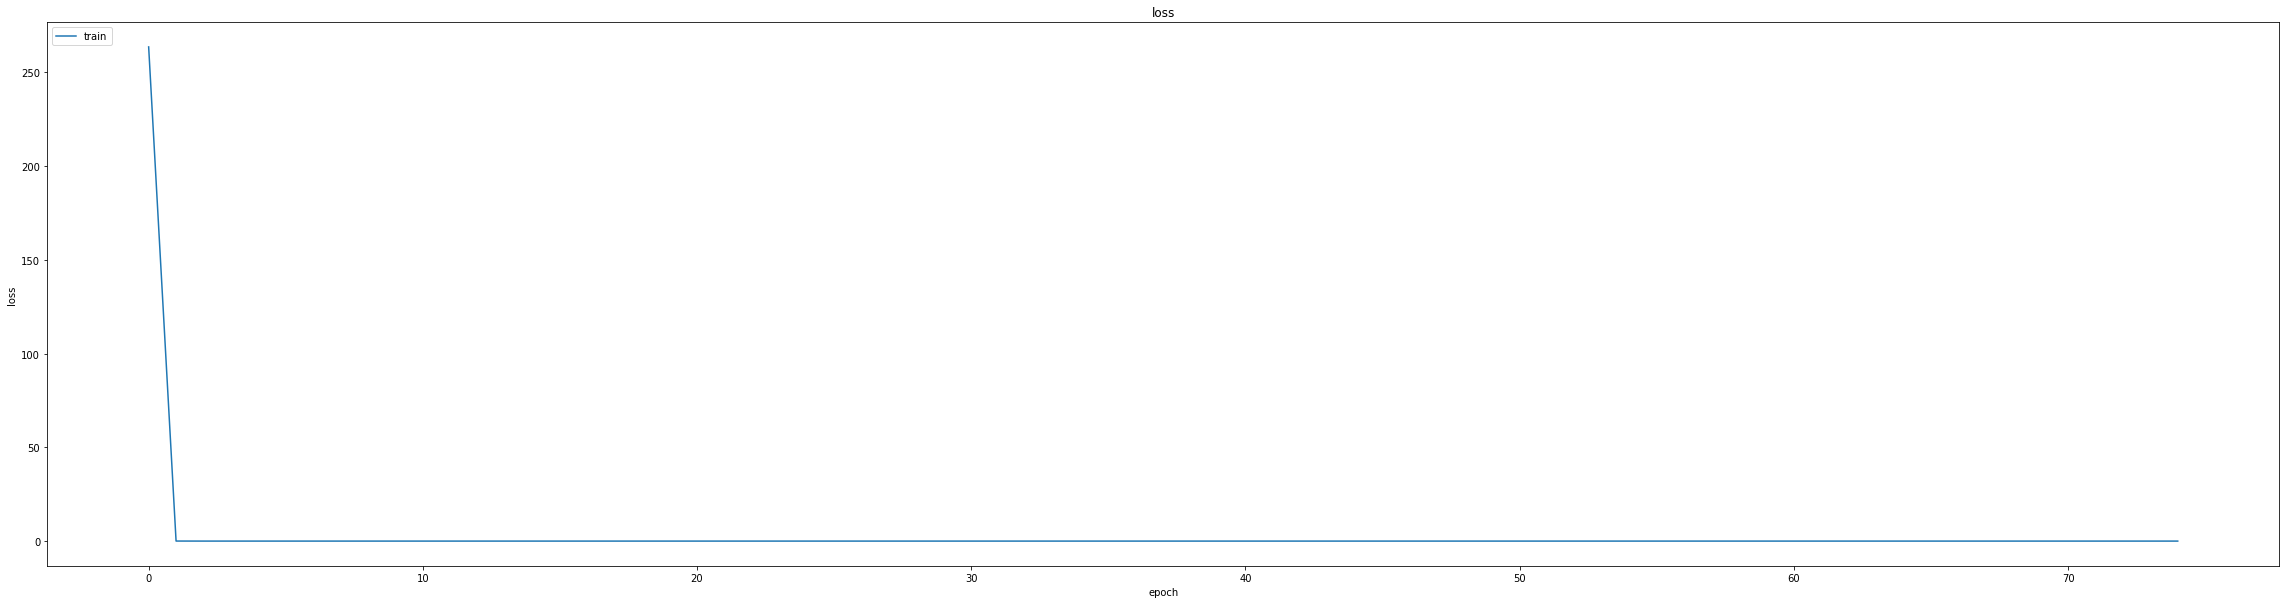

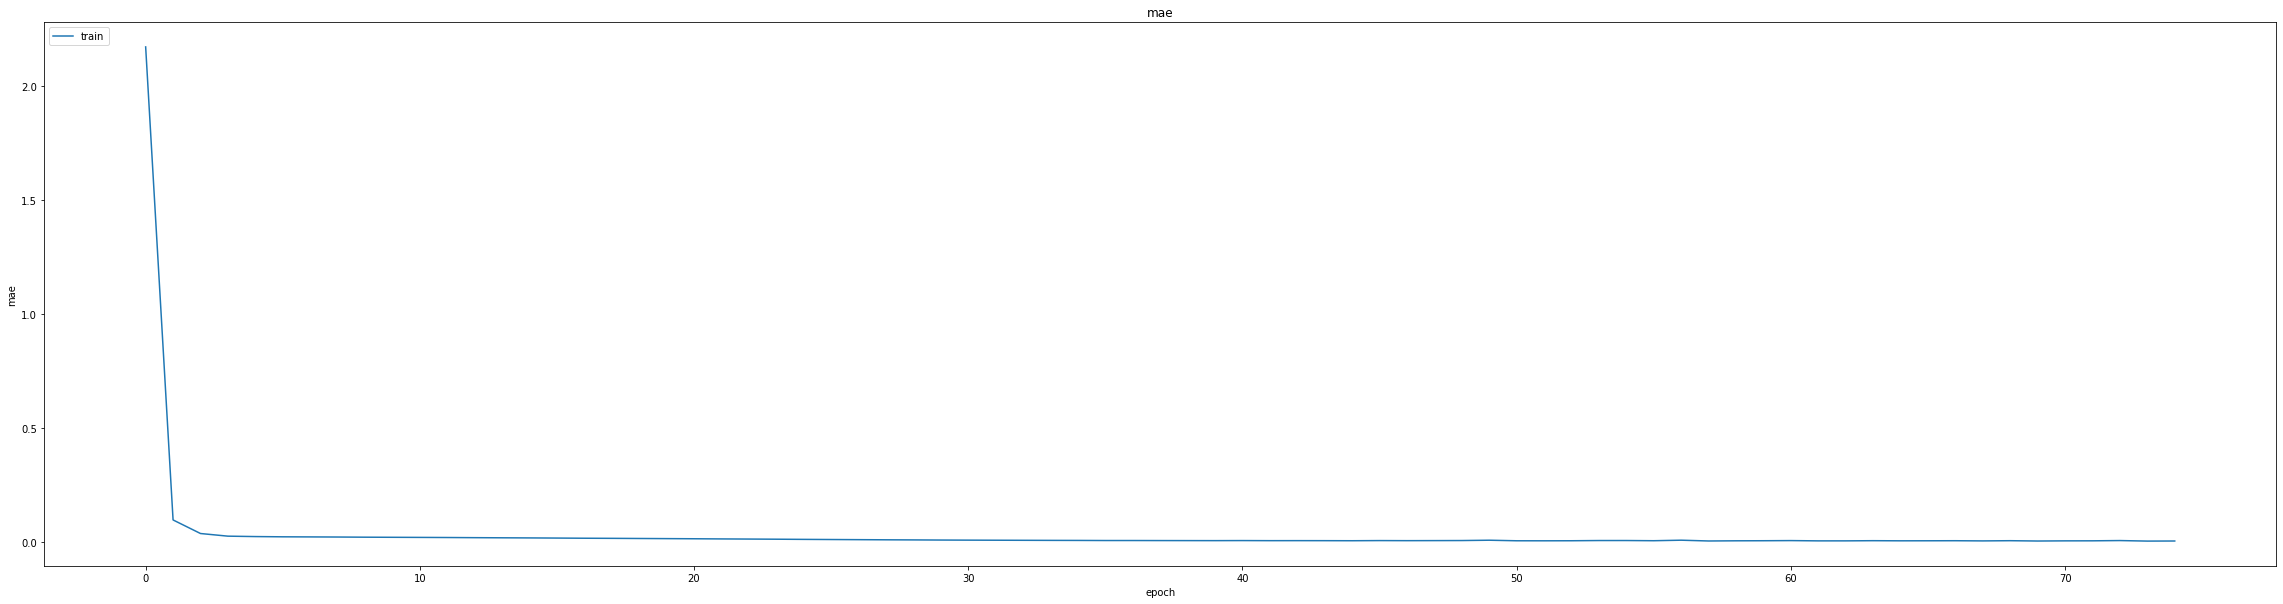

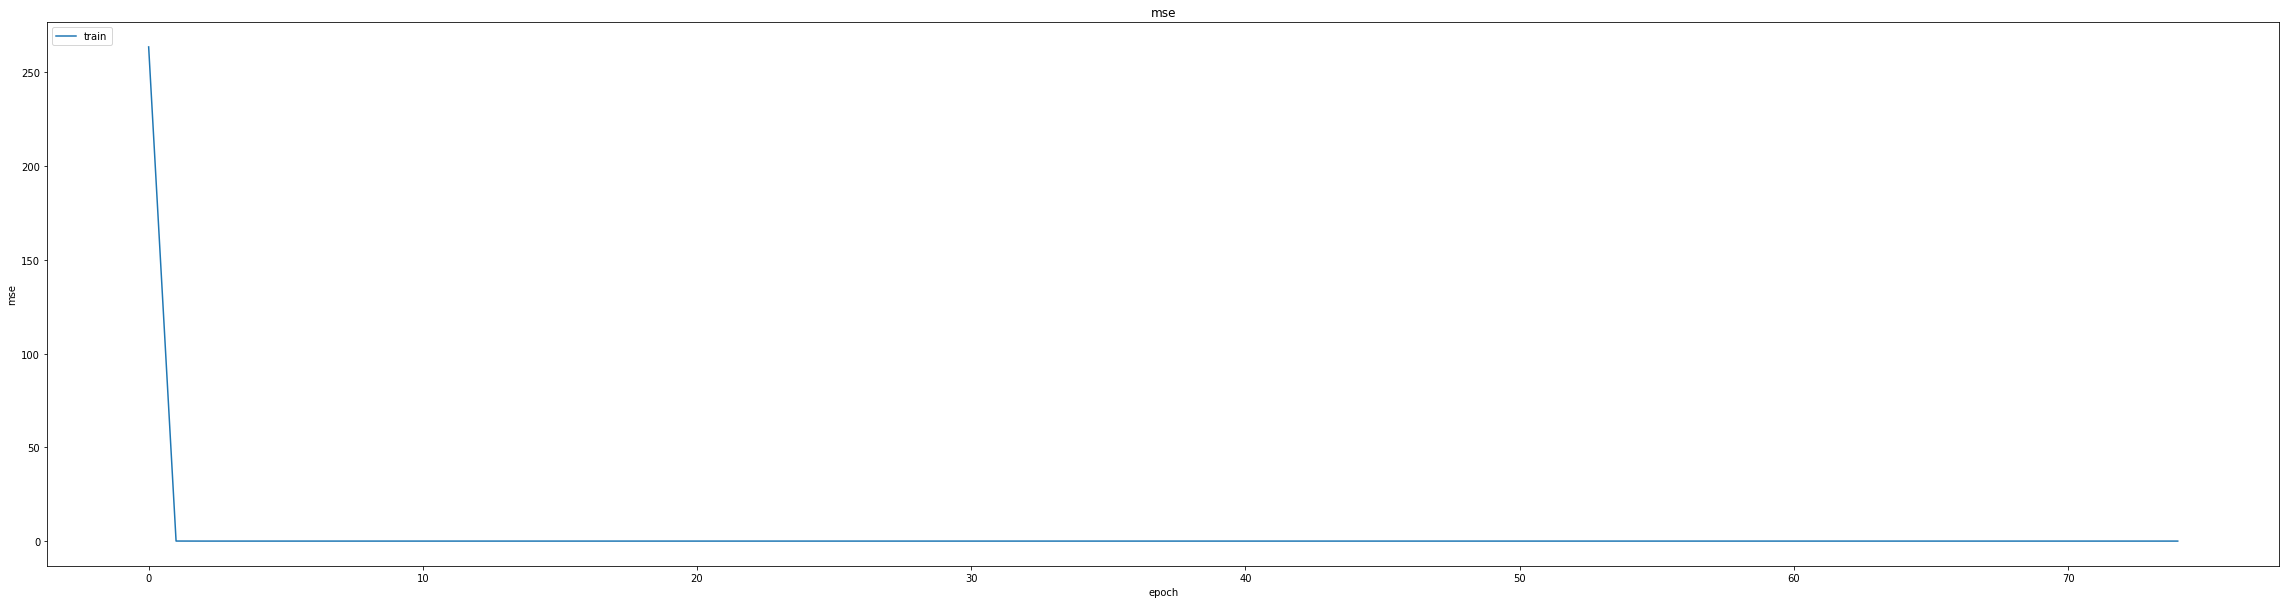

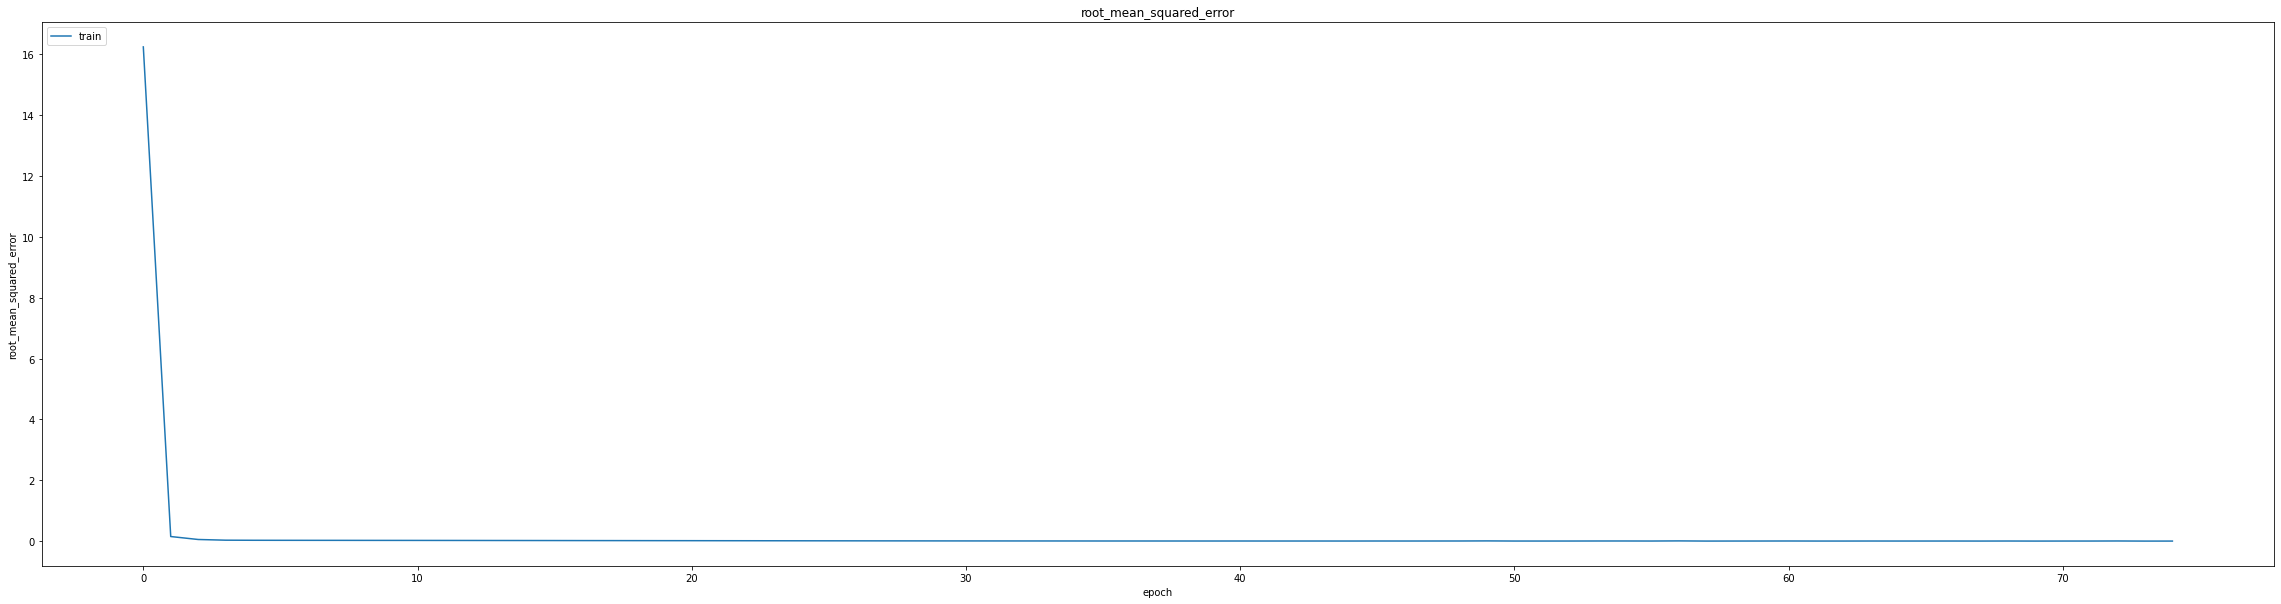

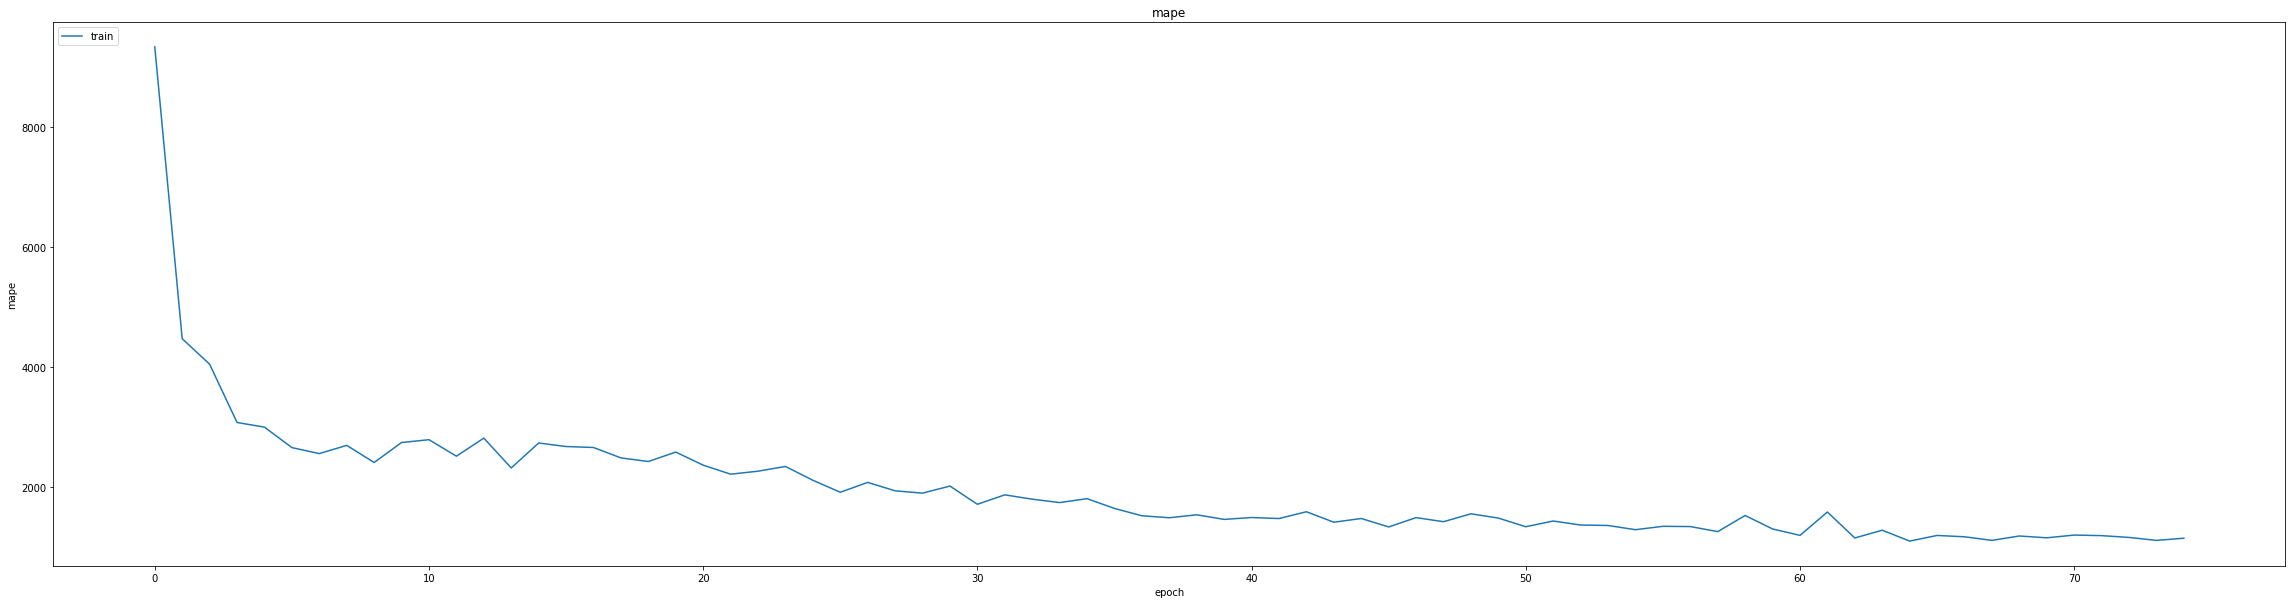

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013500750064849854
0.01673129014670849
348/348 [==============================] - 3s 5ms/step
0.9950349312412984


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


406/406 [==============================] - ETA: 0s - loss: 7.3500e-04 - mae: 0.0099 - mse: 7.3500e-04 - root_mean_squared_error: 0.0271 - mape: 1630.1099
Epoch 1: val_mse did not improve from 0.00028
406/406 [==============================] - 14s 19ms/step - loss: 7.3500e-04 - mae: 0.0099 - mse: 7.3500e-04 - root_mean_squared_error: 0.0271 - mape: 1630.1099 - val_loss: 5.6187e-04 - val_mae: 0.0222 - val_mse: 5.6187e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 28.0078 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 3.2195e-05 - mae: 0.0042 - mse: 3.2195e-05 - root_mean_squared_error: 0.0057 - mape: 1148.5829
Epoch 2: val_mse did not improve from 0.00028
406/406 [==============================] - 6s 15ms/step - loss: 3.2175e-05 - mae: 0.0042 - mse: 3.2175e-05 - root_mean_squared_error: 0.0057 - mape: 1145.9984 - val_loss: 4.9864e-04 - val_mae: 0.0209 - val_mse: 4.9864e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 26.8989 - lr: 0.0010
lr

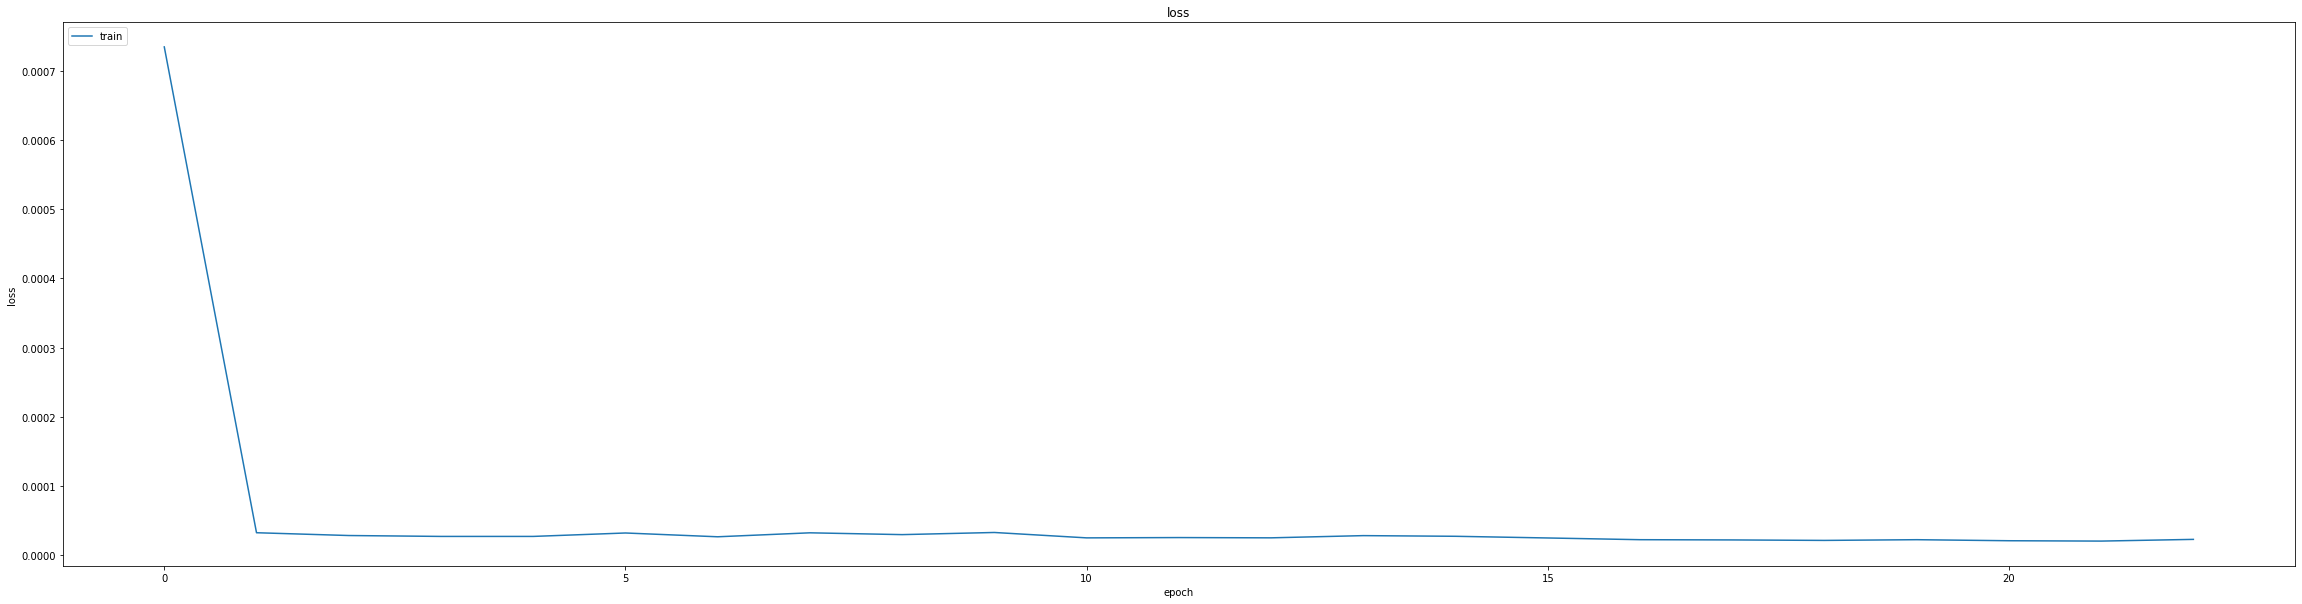

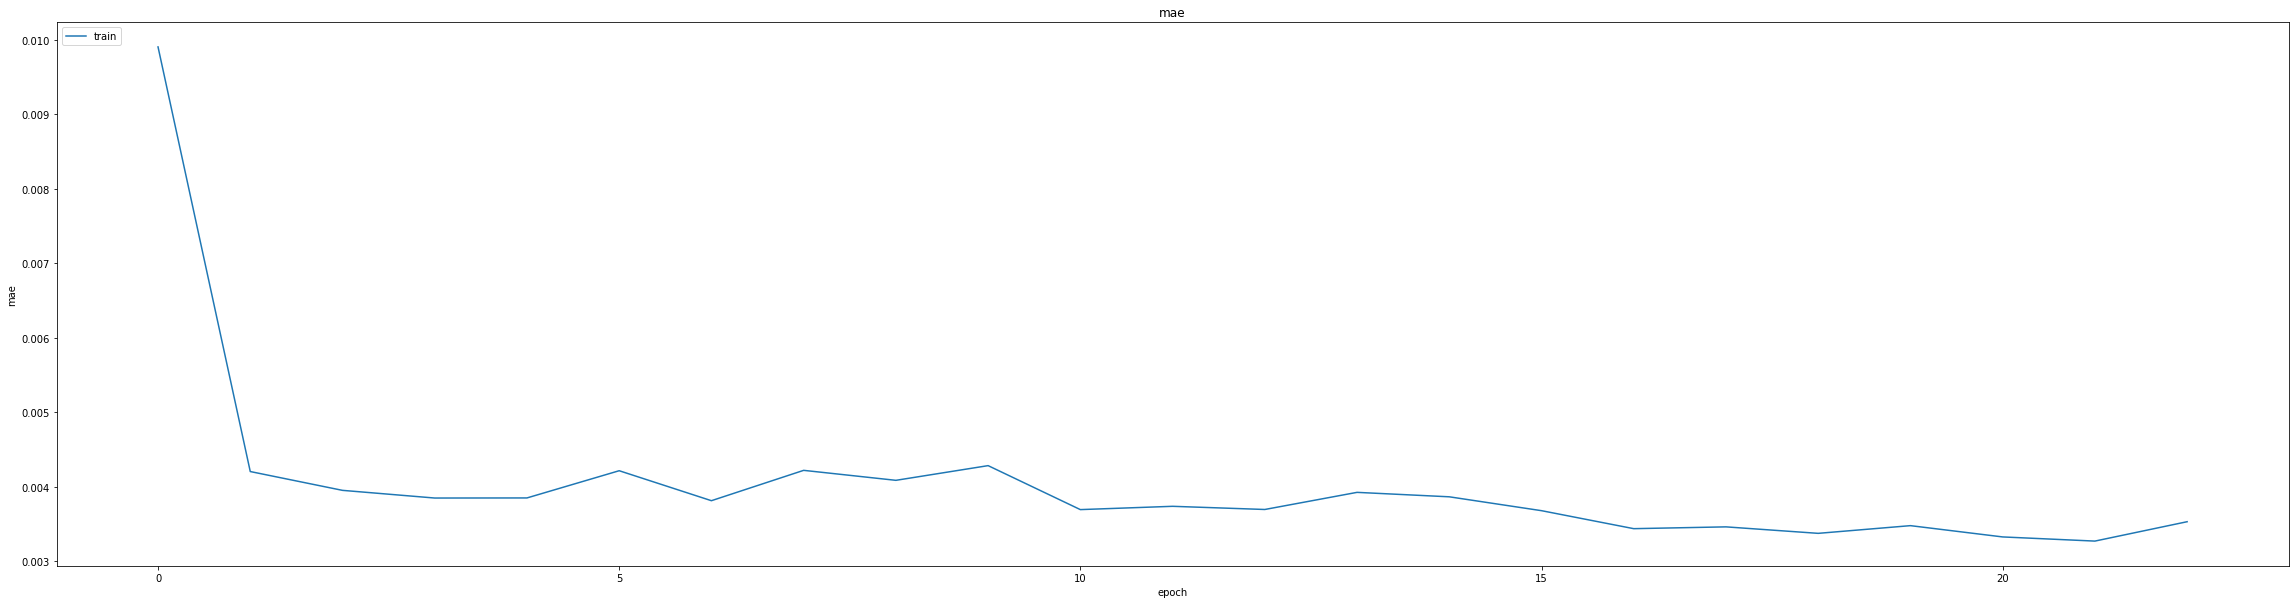

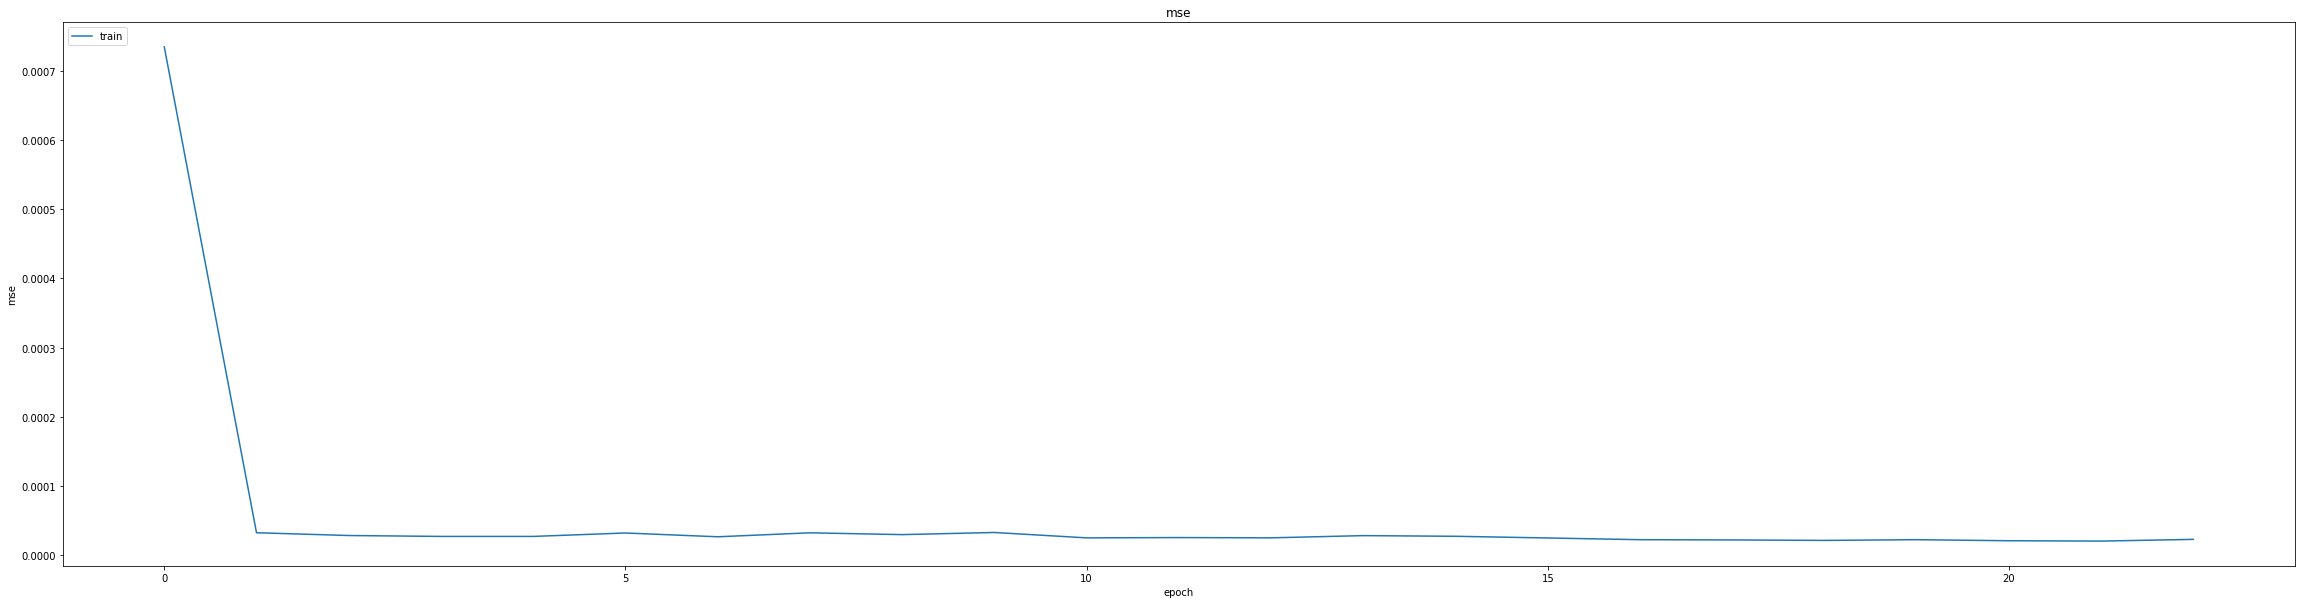

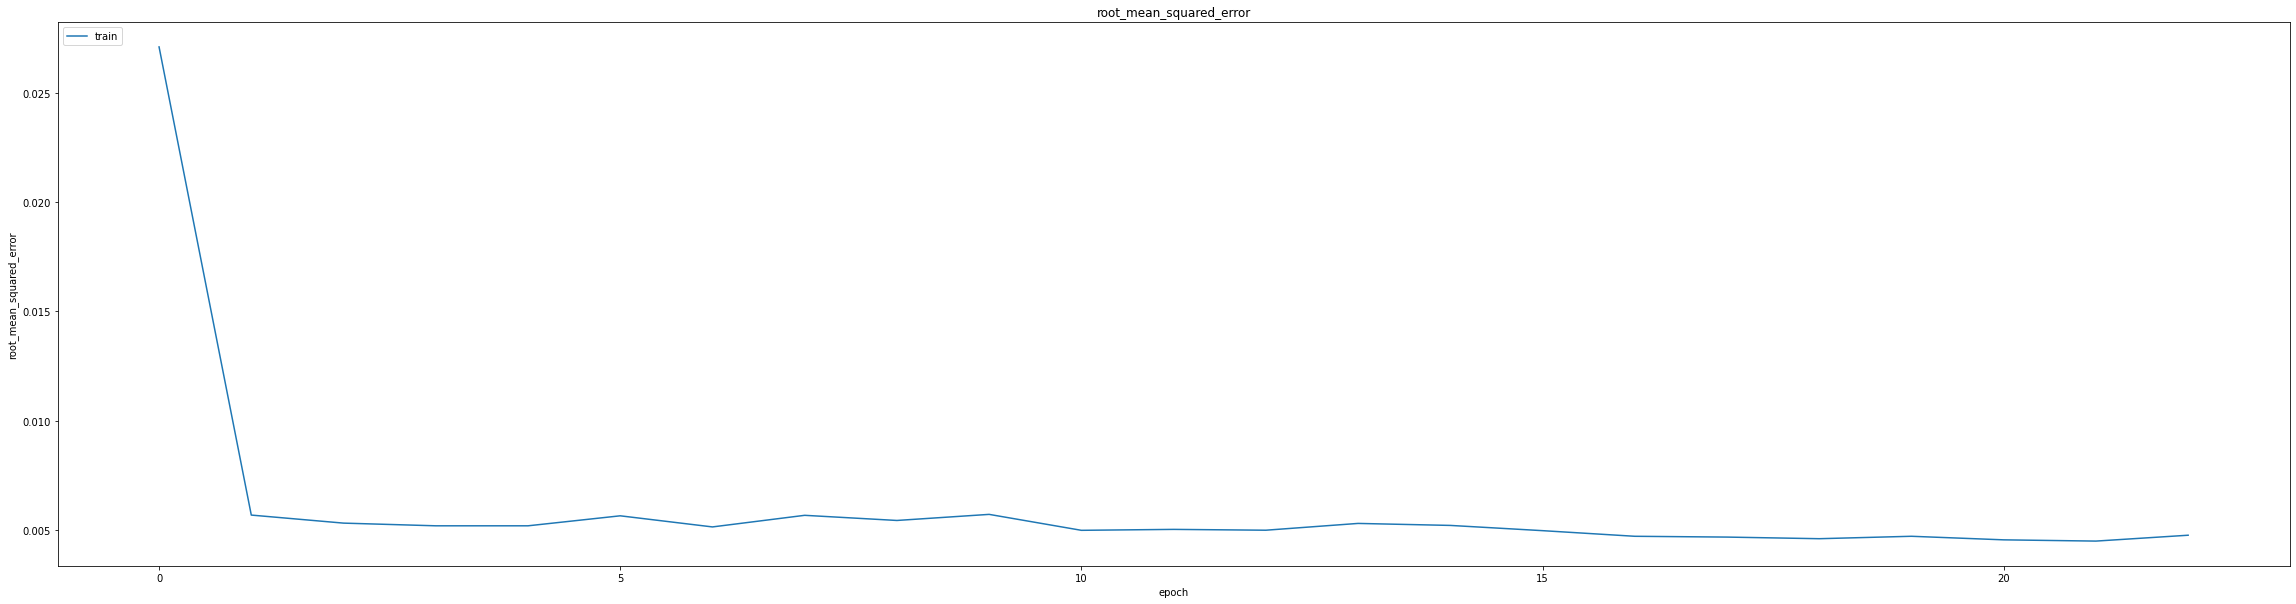

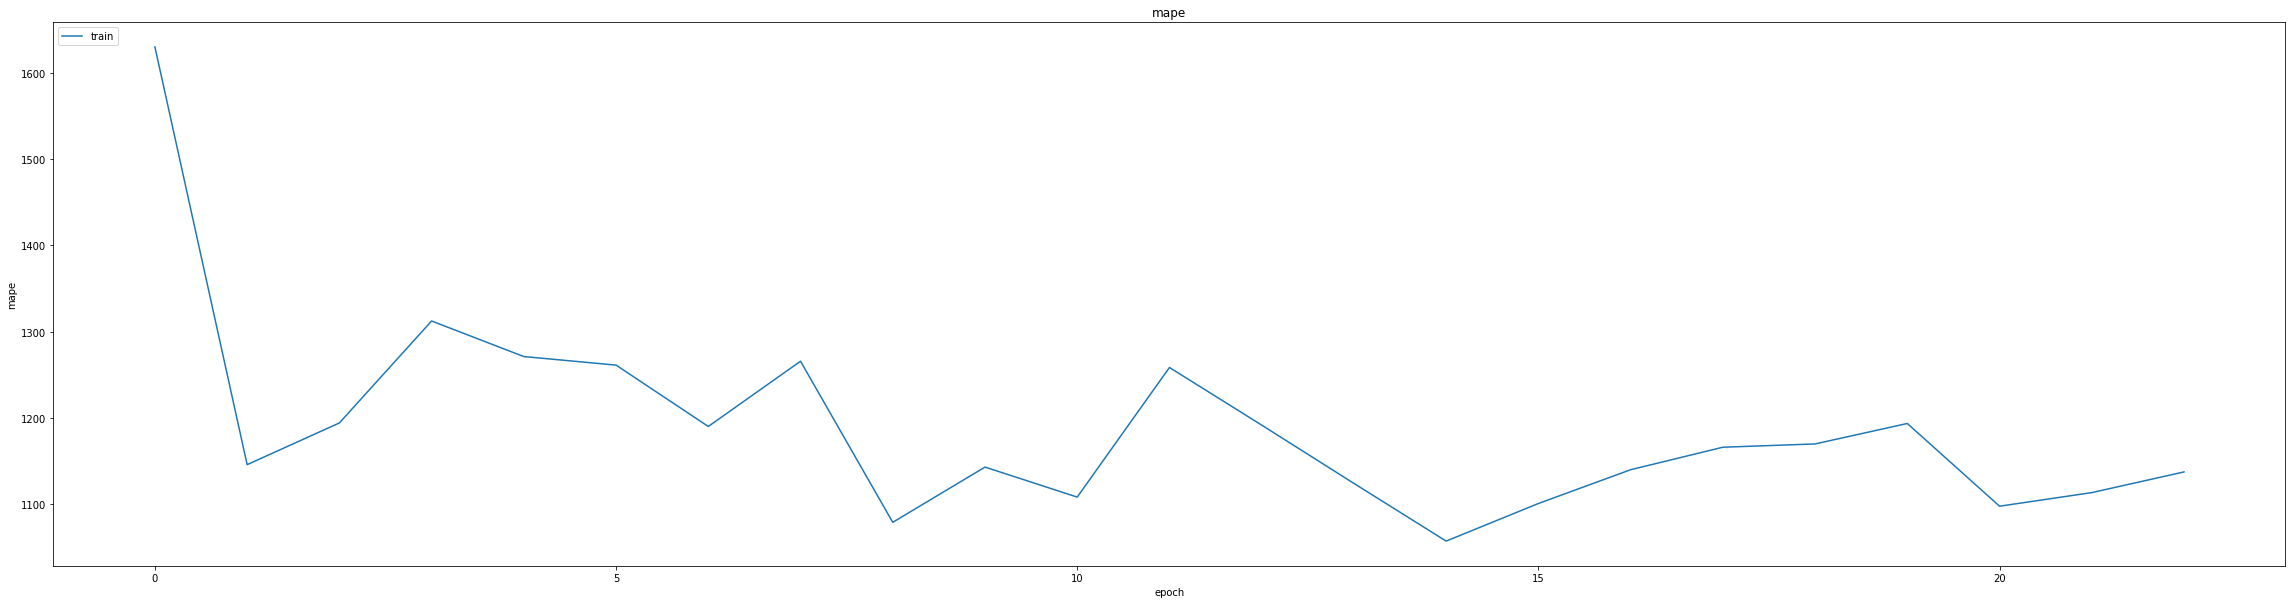

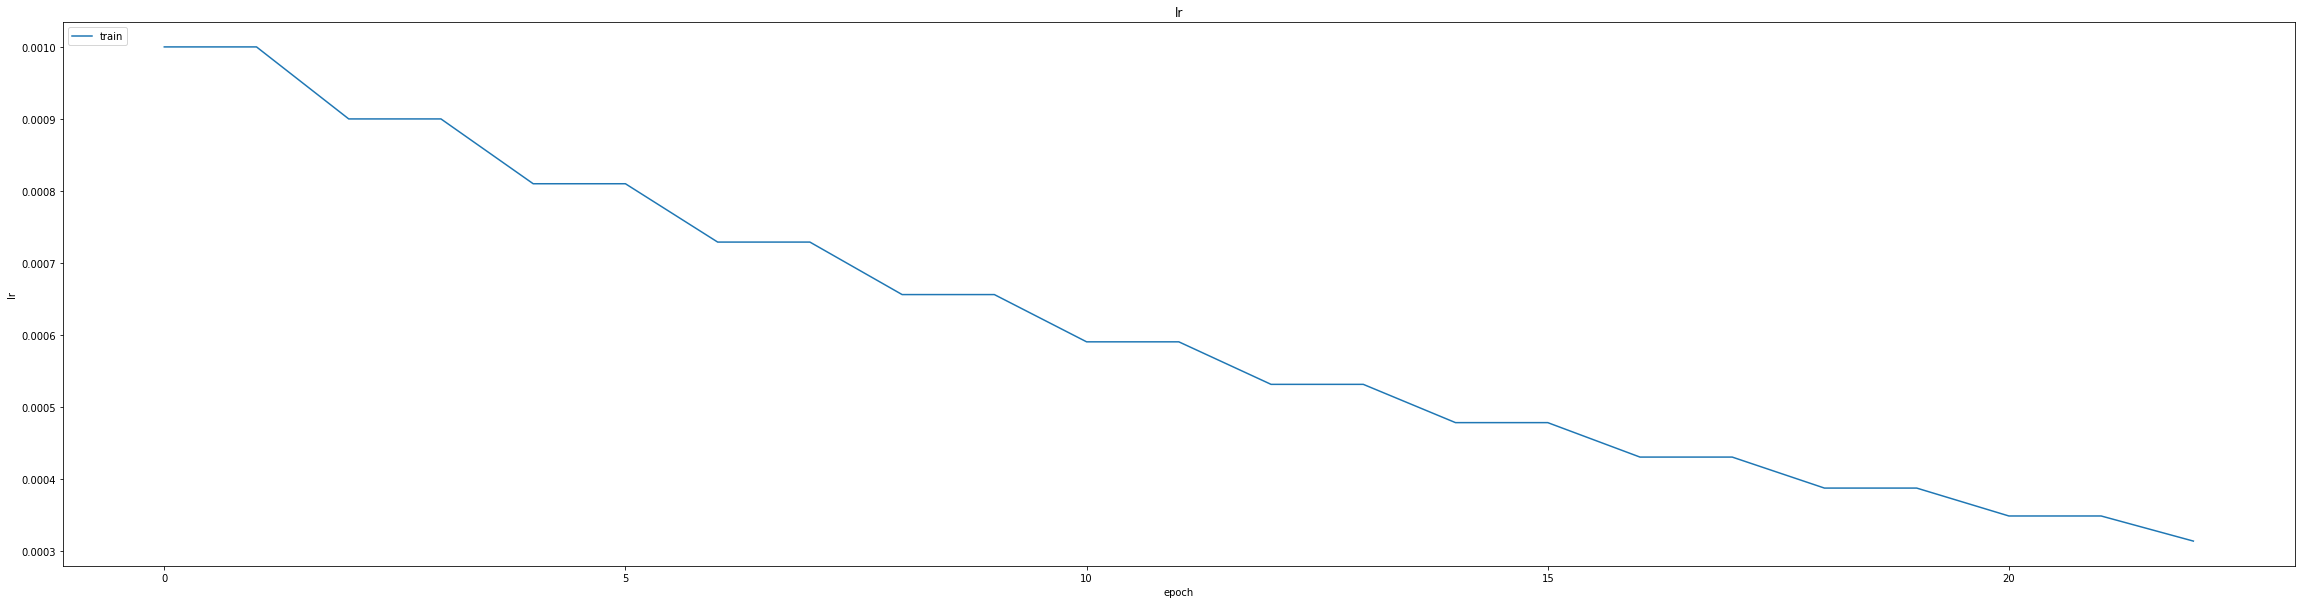

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.017936820164322853
0.01986599899828434
348/348 [==============================] - 3s 5ms/step
0.9950818994371184


348/348 [==============================] - 2s 5ms/step


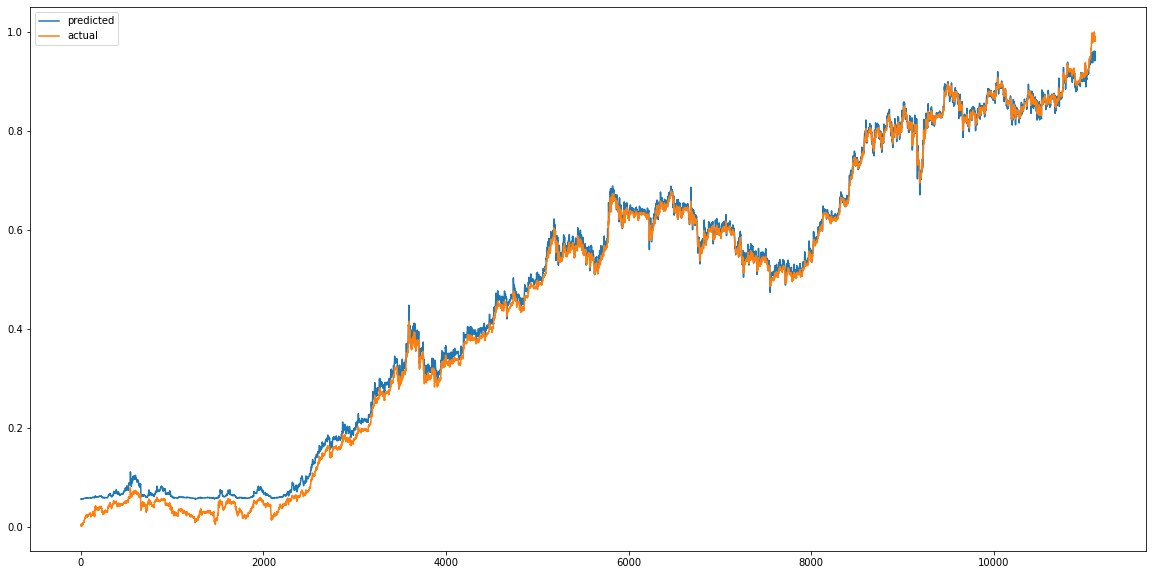

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


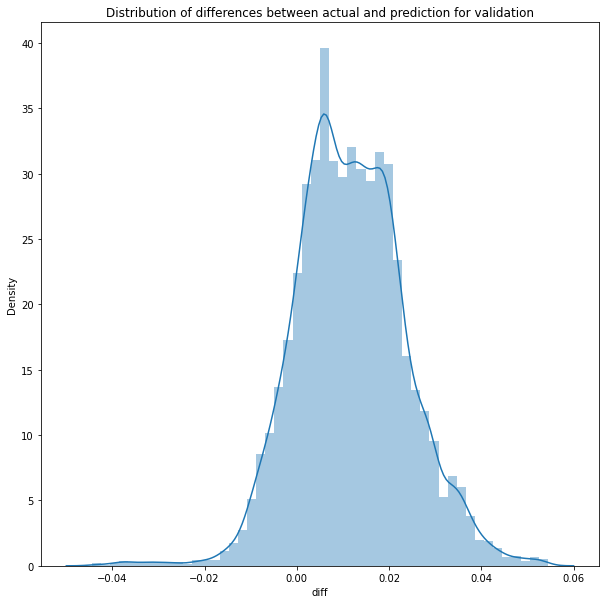

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 5ms/step


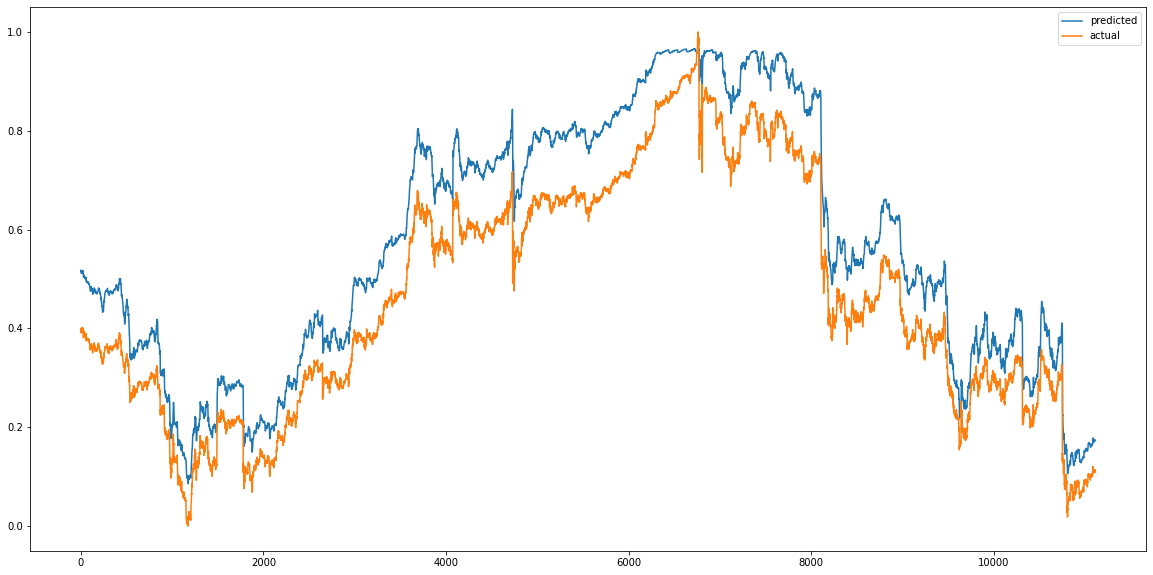

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


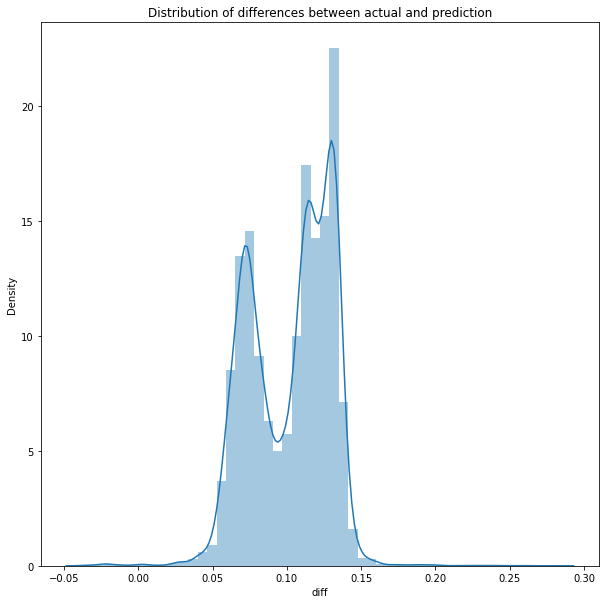

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.011212354856875856
RMSE :  0.10588840756605916
MAE :  0.10239046525161544
348/348 [==============================] - 2s 5ms/step
R2_Score  : 0.7996379149118003


count    11115.000000
mean         0.102323
std          0.027246
min         -0.035819
25%          0.076509
50%          0.109687
75%          0.125980
max          0.280337
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
400/406 [============================>.] - ETA: 0s - loss: 637.6680 - mae: 6.6906 - mse: 637.6680 - root_mean_squared_error: 25.2521 - mape: 31652.4258
Epoch 1: val_mse improved from inf to 1.07355, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 17s 34ms/step - loss: 628.3924 - mae: 6.6076 - mse: 628.3924 - root_mean_squared_error: 25.0678 - mape: 31195.5938 - val_loss: 1.0735 - val_mae: 0.9923 - val_mse: 1.0735 - val_root_mean_squared_error: 1.0361 - val_mape: 1156.1478
Epoch 2/75
402/406 [============================>.] - ETA: 0s - loss: 0.4701 - mae: 0.6291 - mse: 0.4701 - root_mean_squared_error: 0.6856 - mape: 21330.8555
Epoch 2: val_mse improved from 1.07355 to 0.25455, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.4675 - mae: 0.6269 - mse: 0.4675 - root_mean_squared_error: 0.6837 - mape: 21126.4473 - val_loss: 0.2545 - val_mae: 0.4118 - val_mse: 0.2545 - val_root_mean_squared_error: 0.5045 - val_mape: 651.0719
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.1217 - mae: 0.3016 - mse: 0.1217 - root_mean_squared_error: 0.3488 - mape: 14275.6104
Epoch 3: val_mse improved from 0.25455 to 0.12413, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.1215 - mae: 0.3013 - mse: 0.1215 - root_mean_squared_error: 0.3485 - mape: 14208.6689 - val_loss: 0.1241 - val_mae: 0.2815 - val_mse: 0.1241 - val_root_mean_squared_error: 0.3523 - val_mape: 472.4371
Epoch 4/75
404/406 [============================>.] - ETA: 0s - loss: 0.0597 - mae: 0.2019 - mse: 0.0597 - root_mean_squared_error: 0.2444 - mape: 12559.5098
Epoch 4: val_mse improved from 0.12413 to 0.09623, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0597 - mae: 0.2018 - mse: 0.0597 - root_mean_squared_error: 0.2444 - mape: 12500.5918 - val_loss: 0.0962 - val_mae: 0.2542 - val_mse: 0.0962 - val_root_mean_squared_error: 0.3102 - val_mape: 394.9817
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.0481 - mae: 0.1777 - mse: 0.0481 - root_mean_squared_error: 0.2192 - mape: 10456.8311
Epoch 5: val_mse improved from 0.09623 to 0.09043, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0481 - mae: 0.1777 - mse: 0.0481 - root_mean_squared_error: 0.2192 - mape: 10433.4053 - val_loss: 0.0904 - val_mae: 0.2540 - val_mse: 0.0904 - val_root_mean_squared_error: 0.3007 - val_mape: 363.0623
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0462 - mae: 0.1749 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 9829.9180
Epoch 6: val_mse improved from 0.09043 to 0.08923, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0462 - mae: 0.1749 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 9759.7461 - val_loss: 0.0892 - val_mae: 0.2555 - val_mse: 0.0892 - val_root_mean_squared_error: 0.2987 - val_mape: 350.9548
Epoch 7/75
404/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2146 - mape: 9428.2207
Epoch 7: val_mse improved from 0.08923 to 0.08899, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9383.9922 - val_loss: 0.0890 - val_mae: 0.2560 - val_mse: 0.0890 - val_root_mean_squared_error: 0.2983 - val_mape: 347.3479
Epoch 8/75
402/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1750 - mse: 0.0460 - root_mean_squared_error: 0.2146 - mape: 9399.1807
Epoch 8: val_mse improved from 0.08899 to 0.08890, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9309.1133 - val_loss: 0.0889 - val_mae: 0.2562 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2982 - val_mape: 346.1932
Epoch 9/75
401/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9400.7754
Epoch 9: val_mse did not improve from 0.08890
406/406 [==============================] - 5s 11ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9287.6338 - val_loss: 0.0889 - val_mae: 0.2561 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2982 - val_mape: 346.7611
Epoch 10/75
402/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1750 - mse: 0.0460 - root_mean_squared_error: 0.2146 - mape: 9426.3730
Epoch 10: val_mse improved from 0.08890 to 0.08886, saving model to /content/drive/MyDrive/modelweights/JPY_

406/406 [==============================] - 13s 31ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9335.9717 - val_loss: 0.0889 - val_mae: 0.2561 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2981 - val_mape: 346.0851
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2145 - mape: 9623.9658
Epoch 11: val_mse improved from 0.08886 to 0.08882, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 28ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9578.8125 - val_loss: 0.0888 - val_mae: 0.2562 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2980 - val_mape: 345.6260
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9583.2012
Epoch 12: val_mse improved from 0.08882 to 0.08882, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0460 - mae: 0.1749 - mse: 0.0460 - root_mean_squared_error: 0.2144 - mape: 9514.7686 - val_loss: 0.0888 - val_mae: 0.2561 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2980 - val_mape: 345.8225
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1749 - mse: 0.0459 - root_mean_squared_error: 0.2144 - mape: 9377.1973
Epoch 13: val_mse did not improve from 0.08882
406/406 [==============================] - 4s 10ms/step - loss: 0.0459 - mae: 0.1749 - mse: 0.0459 - root_mean_squared_error: 0.2144 - mape: 9310.2607 - val_loss: 0.0889 - val_mae: 0.2558 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2981 - val_mape: 347.5717
Epoch 14/75
401/406 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 9566.8613
Epoch 14: val_mse improved from 0.08882 to 0.08879, saving model to /content/drive/MyDrive/modelweights/JP

406/406 [==============================] - 11s 28ms/step - loss: 0.0459 - mae: 0.1748 - mse: 0.0459 - root_mean_squared_error: 0.2143 - mape: 9451.6680 - val_loss: 0.0888 - val_mae: 0.2557 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2980 - val_mape: 347.3390
Epoch 15/75
406/406 [==============================] - ETA: 0s - loss: 0.0458 - mae: 0.1746 - mse: 0.0458 - root_mean_squared_error: 0.2141 - mape: 9316.2695
Epoch 15: val_mse improved from 0.08879 to 0.08847, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0458 - mae: 0.1746 - mse: 0.0458 - root_mean_squared_error: 0.2141 - mape: 9316.2695 - val_loss: 0.0885 - val_mae: 0.2557 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2974 - val_mape: 344.9903
Epoch 16/75
401/406 [============================>.] - ETA: 0s - loss: 0.0457 - mae: 0.1743 - mse: 0.0457 - root_mean_squared_error: 0.2137 - mape: 52.2634
Epoch 16: val_mse improved from 0.08847 to 0.08789, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0456 - mae: 0.1742 - mse: 0.0456 - root_mean_squared_error: 0.2136 - mape: 9385.7500 - val_loss: 0.0879 - val_mae: 0.2550 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2965 - val_mape: 343.2234
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 0.0452 - mae: 0.1734 - mse: 0.0452 - root_mean_squared_error: 0.2126 - mape: 9424.3828
Epoch 17: val_mse improved from 0.08789 to 0.08692, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0452 - mae: 0.1734 - mse: 0.0452 - root_mean_squared_error: 0.2126 - mape: 9380.1816 - val_loss: 0.0869 - val_mae: 0.2529 - val_mse: 0.0869 - val_root_mean_squared_error: 0.2948 - val_mape: 343.2271
Epoch 18/75
406/406 [==============================] - ETA: 0s - loss: 0.0443 - mae: 0.1714 - mse: 0.0443 - root_mean_squared_error: 0.2104 - mape: 9151.6641
Epoch 18: val_mse improved from 0.08692 to 0.08423, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 28ms/step - loss: 0.0443 - mae: 0.1714 - mse: 0.0443 - root_mean_squared_error: 0.2104 - mape: 9151.6641 - val_loss: 0.0842 - val_mae: 0.2482 - val_mse: 0.0842 - val_root_mean_squared_error: 0.2902 - val_mape: 339.9716
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0362 - mae: 0.1529 - mse: 0.0362 - root_mean_squared_error: 0.1903 - mape: 9351.3340
Epoch 19: val_mse improved from 0.08423 to 0.05437, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 0.0361 - mae: 0.1527 - mse: 0.0361 - root_mean_squared_error: 0.1901 - mape: 9307.4131 - val_loss: 0.0544 - val_mae: 0.1951 - val_mse: 0.0544 - val_root_mean_squared_error: 0.2332 - val_mape: 281.1774
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 0.0141 - mae: 0.0902 - mse: 0.0141 - root_mean_squared_error: 0.1189 - mape: 7758.6162
Epoch 20: val_mse improved from 0.05437 to 0.01727, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0141 - mae: 0.0902 - mse: 0.0141 - root_mean_squared_error: 0.1189 - mape: 7758.6162 - val_loss: 0.0173 - val_mae: 0.0902 - val_mse: 0.0173 - val_root_mean_squared_error: 0.1314 - val_mape: 192.4055
Epoch 21/75
405/406 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0408 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 5477.2617
Epoch 21: val_mse improved from 0.01727 to 0.00907, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0029 - mae: 0.0408 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 5464.9521 - val_loss: 0.0091 - val_mae: 0.0635 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0953 - val_mape: 142.9855
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0326 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 4322.8203
Epoch 22: val_mse improved from 0.00907 to 0.00694, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0018 - mae: 0.0326 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 4302.4844 - val_loss: 0.0069 - val_mae: 0.0536 - val_mse: 0.0069 - val_root_mean_squared_error: 0.0833 - val_mape: 126.5143
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 3913.1201
Epoch 23: val_mse improved from 0.00694 to 0.00573, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0358 - mape: 3913.1201 - val_loss: 0.0057 - val_mae: 0.0466 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0757 - val_mape: 116.1165
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 9.7241e-04 - mae: 0.0241 - mse: 9.7241e-04 - root_mean_squared_error: 0.0312 - mape: 3801.2100
Epoch 24: val_mse improved from 0.00573 to 0.00485, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 9.7246e-04 - mae: 0.0242 - mse: 9.7246e-04 - root_mean_squared_error: 0.0312 - mape: 3792.6692 - val_loss: 0.0048 - val_mae: 0.0429 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0696 - val_mape: 107.2926
Epoch 25/75
402/406 [============================>.] - ETA: 0s - loss: 7.3474e-04 - mae: 0.0210 - mse: 7.3474e-04 - root_mean_squared_error: 0.0271 - mape: 3435.2019
Epoch 25: val_mse improved from 0.00485 to 0.00421, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 7.3489e-04 - mae: 0.0210 - mse: 7.3489e-04 - root_mean_squared_error: 0.0271 - mape: 3402.1411 - val_loss: 0.0042 - val_mae: 0.0393 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0649 - val_mape: 100.6318
Epoch 26/75
406/406 [==============================] - ETA: 0s - loss: 5.7837e-04 - mae: 0.0186 - mse: 5.7837e-04 - root_mean_squared_error: 0.0240 - mape: 3311.7864
Epoch 26: val_mse improved from 0.00421 to 0.00370, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 5.7837e-04 - mae: 0.0186 - mse: 5.7837e-04 - root_mean_squared_error: 0.0240 - mape: 3311.7864 - val_loss: 0.0037 - val_mae: 0.0370 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0608 - val_mape: 94.4869
Epoch 27/75
403/406 [============================>.] - ETA: 0s - loss: 4.5863e-04 - mae: 0.0165 - mse: 4.5863e-04 - root_mean_squared_error: 0.0214 - mape: 3056.8774
Epoch 27: val_mse improved from 0.00370 to 0.00317, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 4.5847e-04 - mae: 0.0165 - mse: 4.5847e-04 - root_mean_squared_error: 0.0214 - mape: 3034.9668 - val_loss: 0.0032 - val_mae: 0.0341 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0563 - val_mape: 87.7950
Epoch 28/75
401/406 [============================>.] - ETA: 0s - loss: 3.7010e-04 - mae: 0.0148 - mse: 3.7010e-04 - root_mean_squared_error: 0.0192 - mape: 3177.6880
Epoch 28: val_mse improved from 0.00317 to 0.00281, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 3.7011e-04 - mae: 0.0148 - mse: 3.7011e-04 - root_mean_squared_error: 0.0192 - mape: 3139.2673 - val_loss: 0.0028 - val_mae: 0.0325 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 82.8072
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 3.1955e-04 - mae: 0.0137 - mse: 3.1955e-04 - root_mean_squared_error: 0.0179 - mape: 2881.2346
Epoch 29: val_mse improved from 0.00281 to 0.00261, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 3.1955e-04 - mae: 0.0137 - mse: 3.1955e-04 - root_mean_squared_error: 0.0179 - mape: 2881.2346 - val_loss: 0.0026 - val_mae: 0.0331 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0511 - val_mape: 79.6550
Epoch 30/75
405/406 [============================>.] - ETA: 0s - loss: 2.8255e-04 - mae: 0.0129 - mse: 2.8255e-04 - root_mean_squared_error: 0.0168 - mape: 3424.3074
Epoch 30: val_mse did not improve from 0.00261
406/406 [==============================] - 4s 10ms/step - loss: 2.8262e-04 - mae: 0.0129 - mse: 2.8262e-04 - root_mean_squared_error: 0.0168 - mape: 3416.6038 - val_loss: 0.0333 - val_mae: 0.0354 - val_mse: 0.0333 - val_root_mean_squared_error: 0.1824 - val_mape: 91.1782
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 2.5495e-04 - mae: 0.0122 - mse: 2.5495e-04 - root_mean_squared_error: 0.0160 - mape: 2761.7930
Epoch 31: val_mse did not improve from 0.00261
406/406 [====================

406/406 [==============================] - 13s 33ms/step - loss: 1.2447e-04 - mae: 0.0085 - mse: 1.2447e-04 - root_mean_squared_error: 0.0112 - mape: 1965.9965 - val_loss: 0.0019 - val_mae: 0.0245 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0430 - val_mape: 57.9034
Epoch 43/75
404/406 [============================>.] - ETA: 0s - loss: 1.2083e-04 - mae: 0.0083 - mse: 1.2083e-04 - root_mean_squared_error: 0.0110 - mape: 2006.7378
Epoch 43: val_mse improved from 0.00185 to 0.00142, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 1.2070e-04 - mae: 0.0083 - mse: 1.2070e-04 - root_mean_squared_error: 0.0110 - mape: 1997.2841 - val_loss: 0.0014 - val_mae: 0.0299 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0377 - val_mape: 55.1337
Epoch 44/75
401/406 [============================>.] - ETA: 0s - loss: 1.1988e-04 - mae: 0.0083 - mse: 1.1988e-04 - root_mean_squared_error: 0.0109 - mape: 1965.8688
Epoch 44: val_mse did not improve from 0.00142
406/406 [==============================] - 4s 11ms/step - loss: 1.1958e-04 - mae: 0.0083 - mse: 1.1958e-04 - root_mean_squared_error: 0.0109 - mape: 1942.0935 - val_loss: 0.0023 - val_mae: 0.0314 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0484 - val_mape: 58.8509
Epoch 45/75
401/406 [============================>.] - ETA: 0s - loss: 1.0845e-04 - mae: 0.0079 - mse: 1.0845e-04 - root_mean_squared_error: 0.0104 - mape: 2057.1658
Epoch 45: val_mse improved from 0.00142 to 0.00112, saving model to /content

406/406 [==============================] - 12s 29ms/step - loss: 1.0825e-04 - mae: 0.0079 - mse: 1.0825e-04 - root_mean_squared_error: 0.0104 - mape: 2032.2863 - val_loss: 0.0011 - val_mae: 0.0258 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 50.1509
Epoch 46/75
404/406 [============================>.] - ETA: 0s - loss: 1.0202e-04 - mae: 0.0077 - mse: 1.0202e-04 - root_mean_squared_error: 0.0101 - mape: 1880.6239
Epoch 46: val_mse did not improve from 0.00112
406/406 [==============================] - 4s 10ms/step - loss: 1.0199e-04 - mae: 0.0077 - mse: 1.0199e-04 - root_mean_squared_error: 0.0101 - mape: 1871.7648 - val_loss: 0.0012 - val_mae: 0.0290 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 50.5755
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 9.7660e-05 - mae: 0.0075 - mse: 9.7660e-05 - root_mean_squared_error: 0.0099 - mape: 1881.0062
Epoch 47: val_mse improved from 0.00112 to 0.00103, saving model to /content

406/406 [==============================] - 12s 31ms/step - loss: 9.7670e-05 - mae: 0.0075 - mse: 9.7670e-05 - root_mean_squared_error: 0.0099 - mape: 1876.7754 - val_loss: 0.0010 - val_mae: 0.0249 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 48.3797
Epoch 48/75
405/406 [============================>.] - ETA: 0s - loss: 1.0290e-04 - mae: 0.0077 - mse: 1.0290e-04 - root_mean_squared_error: 0.0101 - mape: 1859.0426
Epoch 48: val_mse improved from 0.00103 to 0.00097, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 1.0289e-04 - mae: 0.0077 - mse: 1.0289e-04 - root_mean_squared_error: 0.0101 - mape: 1854.8613 - val_loss: 9.7288e-04 - val_mae: 0.0258 - val_mse: 9.7288e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 45.9853
Epoch 49/75
403/406 [============================>.] - ETA: 0s - loss: 9.9270e-05 - mae: 0.0076 - mse: 9.9270e-05 - root_mean_squared_error: 0.0100 - mape: 1833.8806
Epoch 49: val_mse improved from 0.00097 to 0.00081, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 9.9799e-05 - mae: 0.0076 - mse: 9.9799e-05 - root_mean_squared_error: 0.0100 - mape: 1820.7344 - val_loss: 8.0591e-04 - val_mae: 0.0205 - val_mse: 8.0591e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 43.8367
Epoch 50/75
405/406 [============================>.] - ETA: 0s - loss: 9.2592e-05 - mae: 0.0073 - mse: 9.2592e-05 - root_mean_squared_error: 0.0096 - mape: 1981.8365
Epoch 50: val_mse did not improve from 0.00081
406/406 [==============================] - 4s 10ms/step - loss: 9.2606e-05 - mae: 0.0073 - mse: 9.2606e-05 - root_mean_squared_error: 0.0096 - mape: 1977.3788 - val_loss: 0.0011 - val_mae: 0.0274 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 46.0156
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 9.1593e-05 - mae: 0.0072 - mse: 9.1593e-05 - root_mean_squared_error: 0.0096 - mape: 1702.5356
Epoch 51: val_mse did not improve from 0.00081
406/406 [============

406/406 [==============================] - 12s 30ms/step - loss: 7.6716e-05 - mae: 0.0066 - mse: 7.6716e-05 - root_mean_squared_error: 0.0088 - mape: 1467.2274 - val_loss: 7.3512e-04 - val_mae: 0.0229 - val_mse: 7.3512e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 38.6572
Epoch 59/75
406/406 [==============================] - ETA: 0s - loss: 6.1018e-05 - mae: 0.0059 - mse: 6.1018e-05 - root_mean_squared_error: 0.0078 - mape: 1492.7308
Epoch 59: val_mse improved from 0.00074 to 0.00069, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 6.1018e-05 - mae: 0.0059 - mse: 6.1018e-05 - root_mean_squared_error: 0.0078 - mape: 1492.7308 - val_loss: 6.9048e-04 - val_mae: 0.0214 - val_mse: 6.9048e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 37.3557
Epoch 60/75
403/406 [============================>.] - ETA: 0s - loss: 6.9056e-05 - mae: 0.0063 - mse: 6.9056e-05 - root_mean_squared_error: 0.0083 - mape: 1416.7896
Epoch 60: val_mse did not improve from 0.00069
406/406 [==============================] - 4s 10ms/step - loss: 6.8806e-05 - mae: 0.0063 - mse: 6.8806e-05 - root_mean_squared_error: 0.0083 - mape: 1406.6278 - val_loss: 7.8035e-04 - val_mae: 0.0252 - val_mse: 7.8035e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 37.3675
Epoch 61/75
406/406 [==============================] - ETA: 0s - loss: 6.7524e-05 - mae: 0.0062 - mse: 6.7524e-05 - root_mean_squared_error: 0.0082 - mape: 1430.7659
Epoch 61: val_mse improved from 0.00069 to 0.00063, saving m

406/406 [==============================] - 12s 29ms/step - loss: 6.7524e-05 - mae: 0.0062 - mse: 6.7524e-05 - root_mean_squared_error: 0.0082 - mape: 1430.7659 - val_loss: 6.3288e-04 - val_mae: 0.0205 - val_mse: 6.3288e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 36.0494
Epoch 62/75
403/406 [============================>.] - ETA: 0s - loss: 6.0875e-05 - mae: 0.0059 - mse: 6.0875e-05 - root_mean_squared_error: 0.0078 - mape: 1347.0145
Epoch 62: val_mse did not improve from 0.00063
406/406 [==============================] - 4s 10ms/step - loss: 6.0782e-05 - mae: 0.0059 - mse: 6.0782e-05 - root_mean_squared_error: 0.0078 - mape: 1337.3552 - val_loss: 7.9528e-04 - val_mae: 0.0250 - val_mse: 7.9528e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 38.1332
Epoch 63/75
403/406 [============================>.] - ETA: 0s - loss: 8.6634e-05 - mae: 0.0069 - mse: 8.6634e-05 - root_mean_squared_error: 0.0093 - mape: 1362.6146
Epoch 63: val_mse improved from 0.00063 to 0.00054, saving m

406/406 [==============================] - 12s 30ms/step - loss: 8.6936e-05 - mae: 0.0069 - mse: 8.6936e-05 - root_mean_squared_error: 0.0093 - mape: 1352.8477 - val_loss: 5.3773e-04 - val_mae: 0.0177 - val_mse: 5.3773e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 35.6046
Epoch 64/75
401/406 [============================>.] - ETA: 0s - loss: 4.8796e-05 - mae: 0.0053 - mse: 4.8796e-05 - root_mean_squared_error: 0.0070 - mape: 1447.3997
Epoch 64: val_mse did not improve from 0.00054
406/406 [==============================] - 4s 10ms/step - loss: 4.8728e-05 - mae: 0.0053 - mse: 4.8728e-05 - root_mean_squared_error: 0.0070 - mape: 1429.8932 - val_loss: 9.8718e-04 - val_mae: 0.0296 - val_mse: 9.8718e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 38.8037
Epoch 65/75
404/406 [============================>.] - ETA: 0s - loss: 5.5605e-05 - mae: 0.0057 - mse: 5.5605e-05 - root_mean_squared_error: 0.0075 - mape: 1514.7878
Epoch 65: val_mse improved from 0.00054 to 0.00047, saving m

406/406 [==============================] - 12s 30ms/step - loss: 5.5601e-05 - mae: 0.0057 - mse: 5.5601e-05 - root_mean_squared_error: 0.0075 - mape: 1507.6521 - val_loss: 4.7460e-04 - val_mae: 0.0170 - val_mse: 4.7460e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 31.7300
Epoch 66/75
403/406 [============================>.] - ETA: 0s - loss: 6.3947e-05 - mae: 0.0060 - mse: 6.3947e-05 - root_mean_squared_error: 0.0080 - mape: 1345.8699
Epoch 66: val_mse improved from 0.00047 to 0.00046, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 6.3794e-05 - mae: 0.0060 - mse: 6.3794e-05 - root_mean_squared_error: 0.0080 - mape: 1336.2162 - val_loss: 4.6434e-04 - val_mae: 0.0177 - val_mse: 4.6434e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 31.2020
Epoch 67/75
404/406 [============================>.] - ETA: 0s - loss: 4.7592e-05 - mae: 0.0052 - mse: 4.7592e-05 - root_mean_squared_error: 0.0069 - mape: 1272.9888
Epoch 67: val_mse did not improve from 0.00046
406/406 [==============================] - 4s 10ms/step - loss: 4.7708e-05 - mae: 0.0052 - mse: 4.7708e-05 - root_mean_squared_error: 0.0069 - mape: 1266.9943 - val_loss: 9.2339e-04 - val_mae: 0.0285 - val_mse: 9.2339e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 37.2519
Epoch 68/75
404/406 [============================>.] - ETA: 0s - loss: 4.9285e-05 - mae: 0.0053 - mse: 4.9285e-05 - root_mean_squared_error: 0.0070 - mape: 1281.6090
Epoch 68: val_mse did not improve from 0.00046
406/406 [====

406/406 [==============================] - 12s 29ms/step - loss: 3.8758e-05 - mae: 0.0047 - mse: 3.8758e-05 - root_mean_squared_error: 0.0062 - mape: 1181.8108 - val_loss: 3.5236e-04 - val_mae: 0.0148 - val_mse: 3.5236e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 27.7119
Epoch 75/75
404/406 [============================>.] - ETA: 0s - loss: 3.5393e-05 - mae: 0.0045 - mse: 3.5393e-05 - root_mean_squared_error: 0.0059 - mape: 1187.3361
Epoch 75: val_mse did not improve from 0.00035
406/406 [==============================] - 4s 10ms/step - loss: 3.5350e-05 - mae: 0.0045 - mse: 3.5350e-05 - root_mean_squared_error: 0.0059 - mape: 1181.7422 - val_loss: 5.4260e-04 - val_mae: 0.0202 - val_mse: 5.4260e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 31.6386


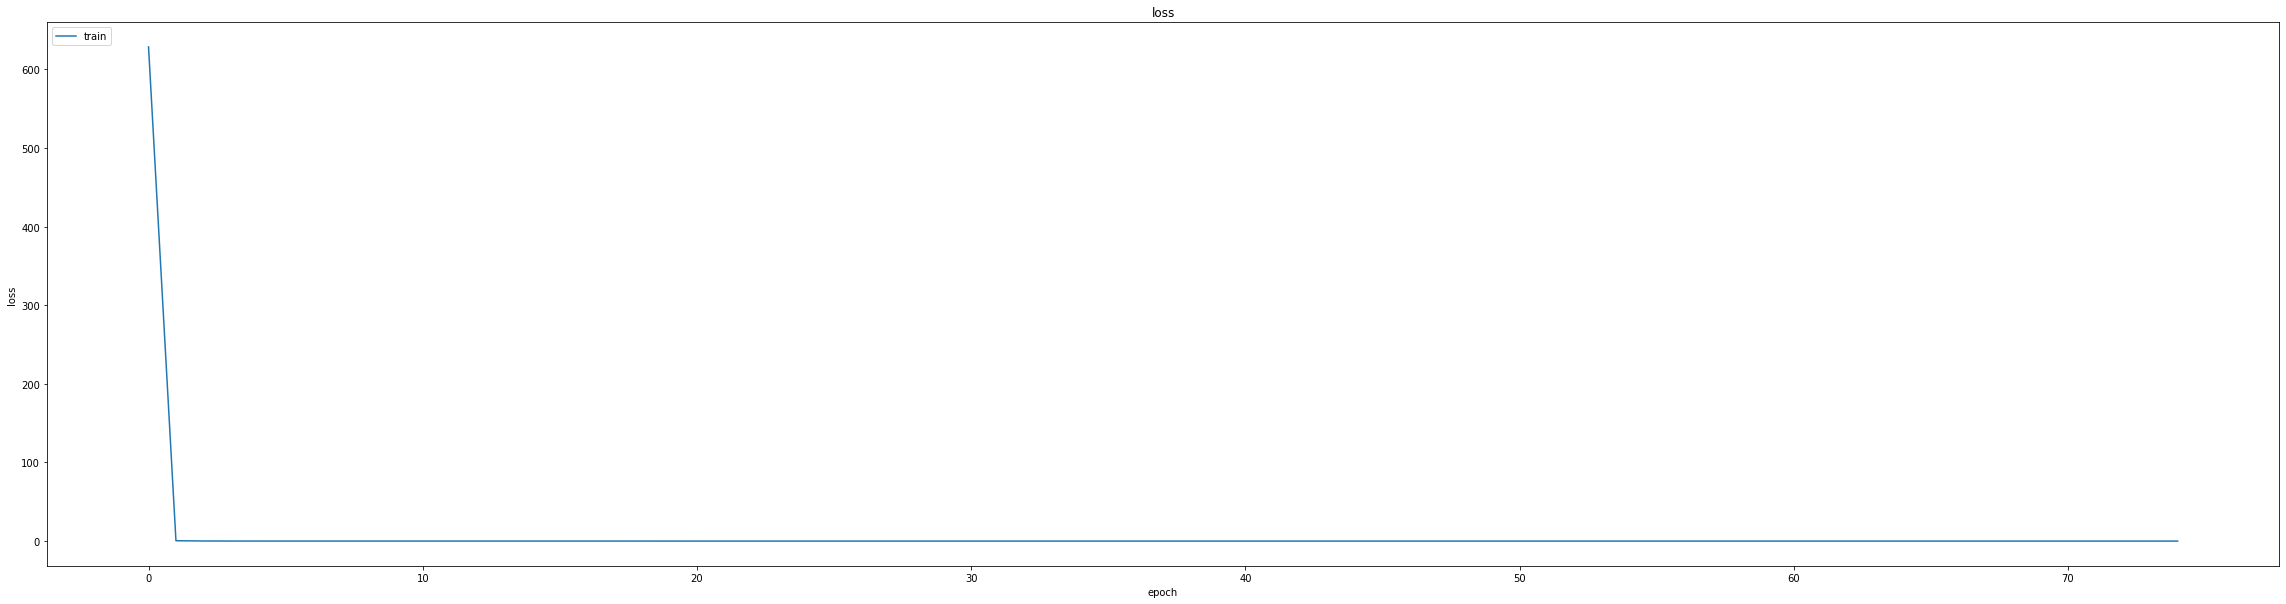

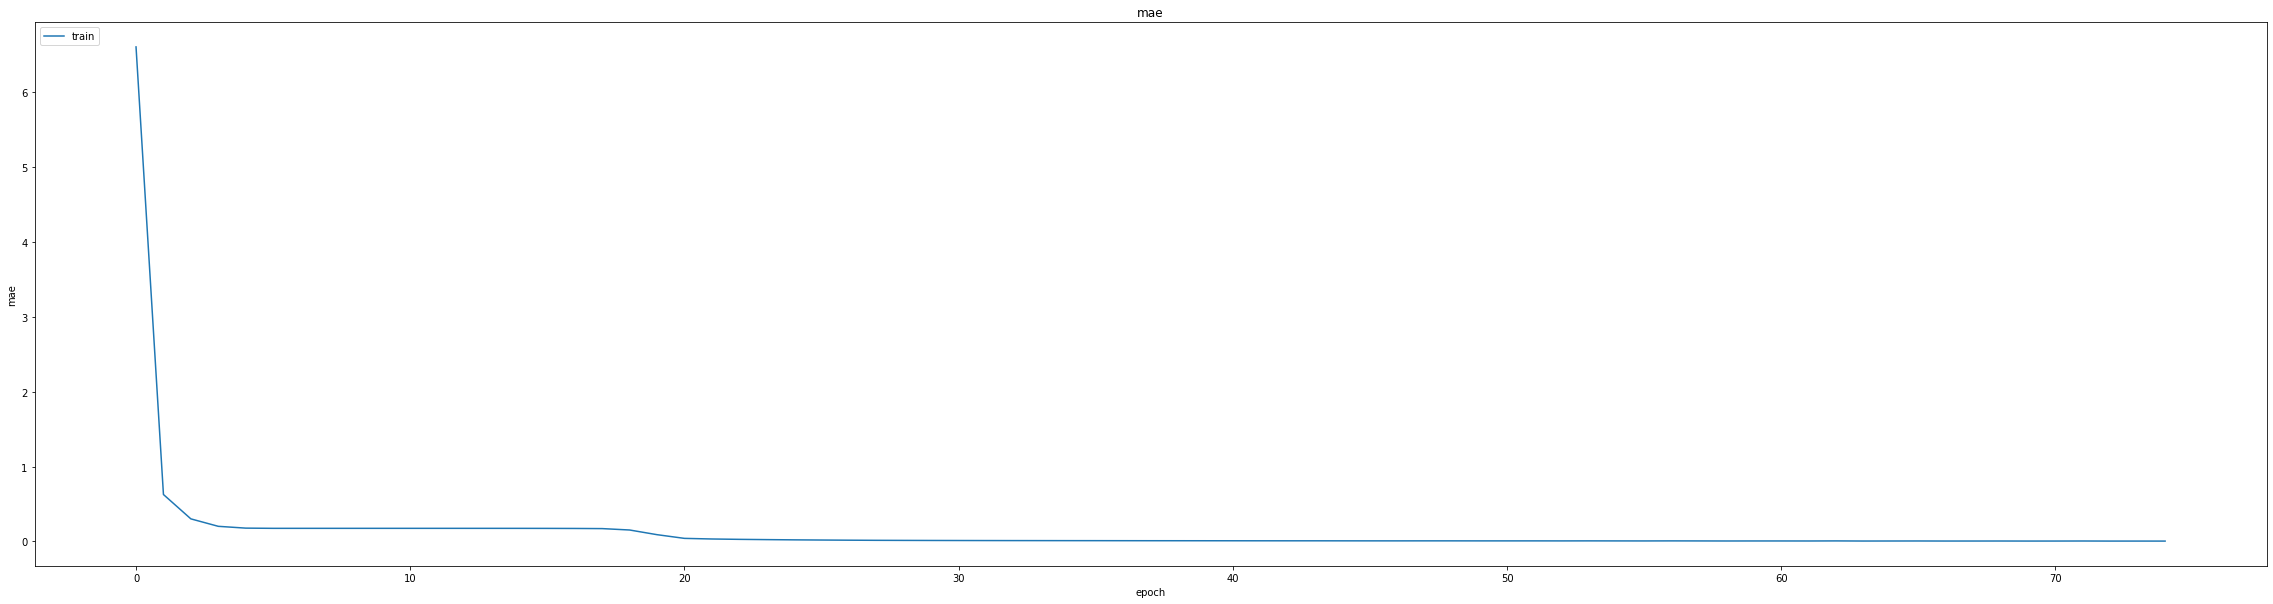

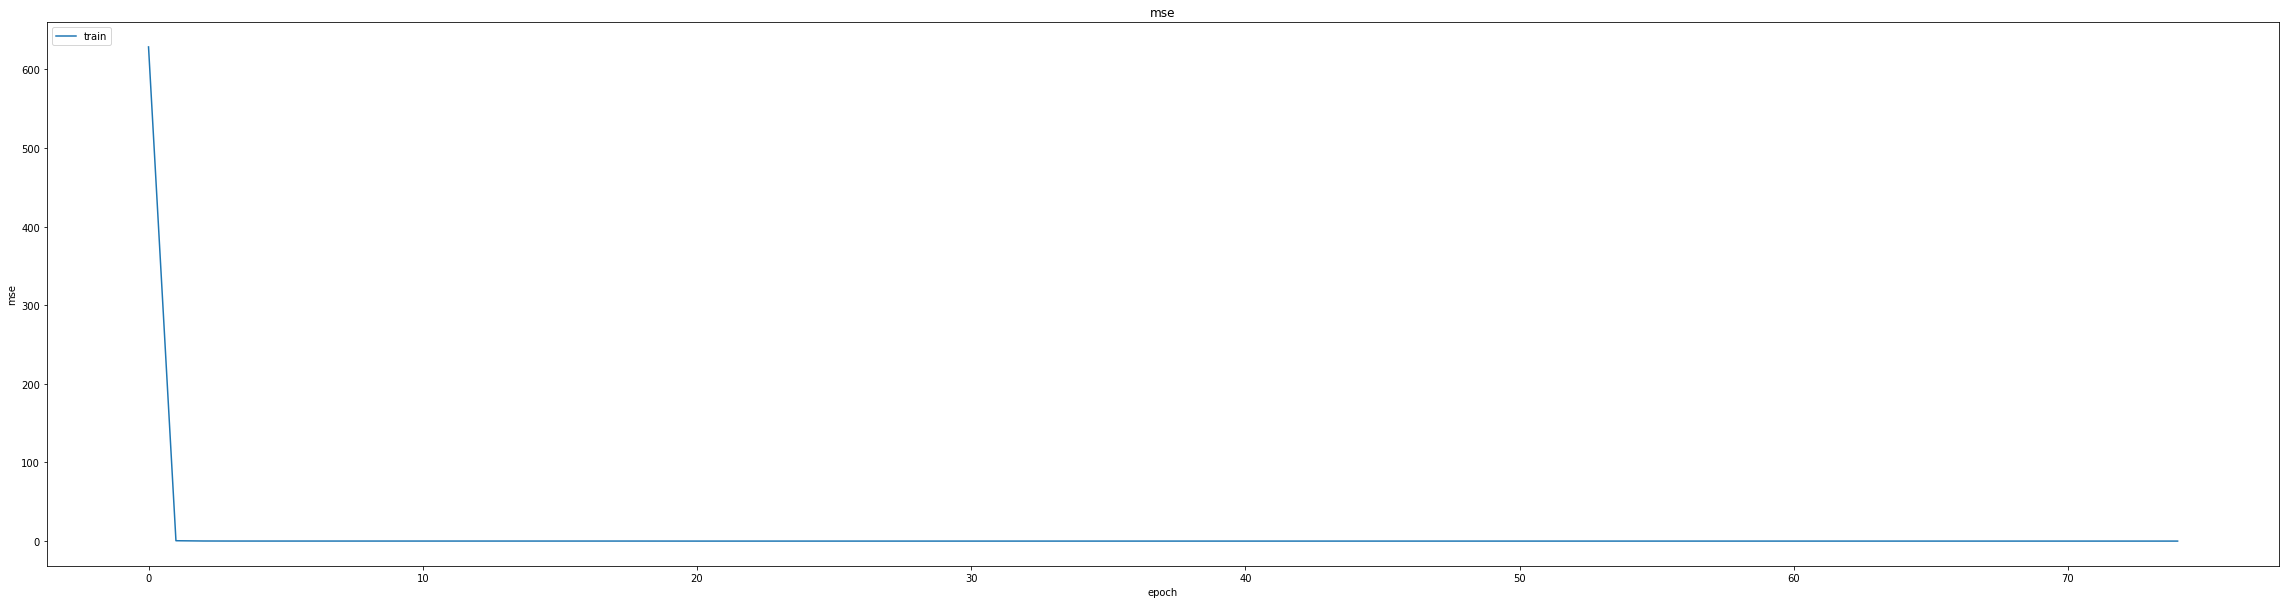

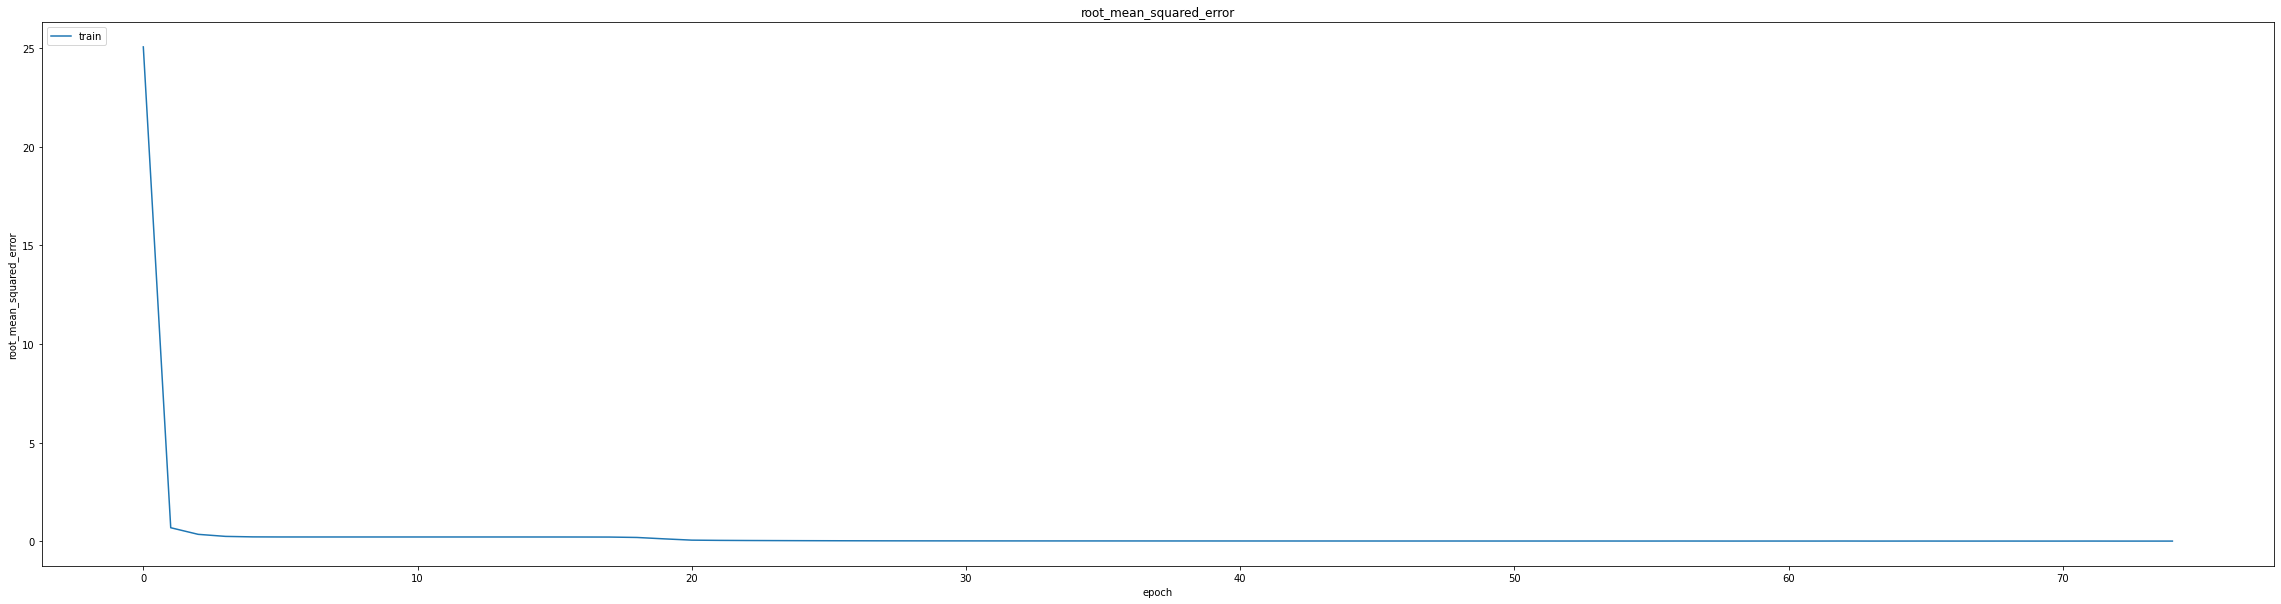

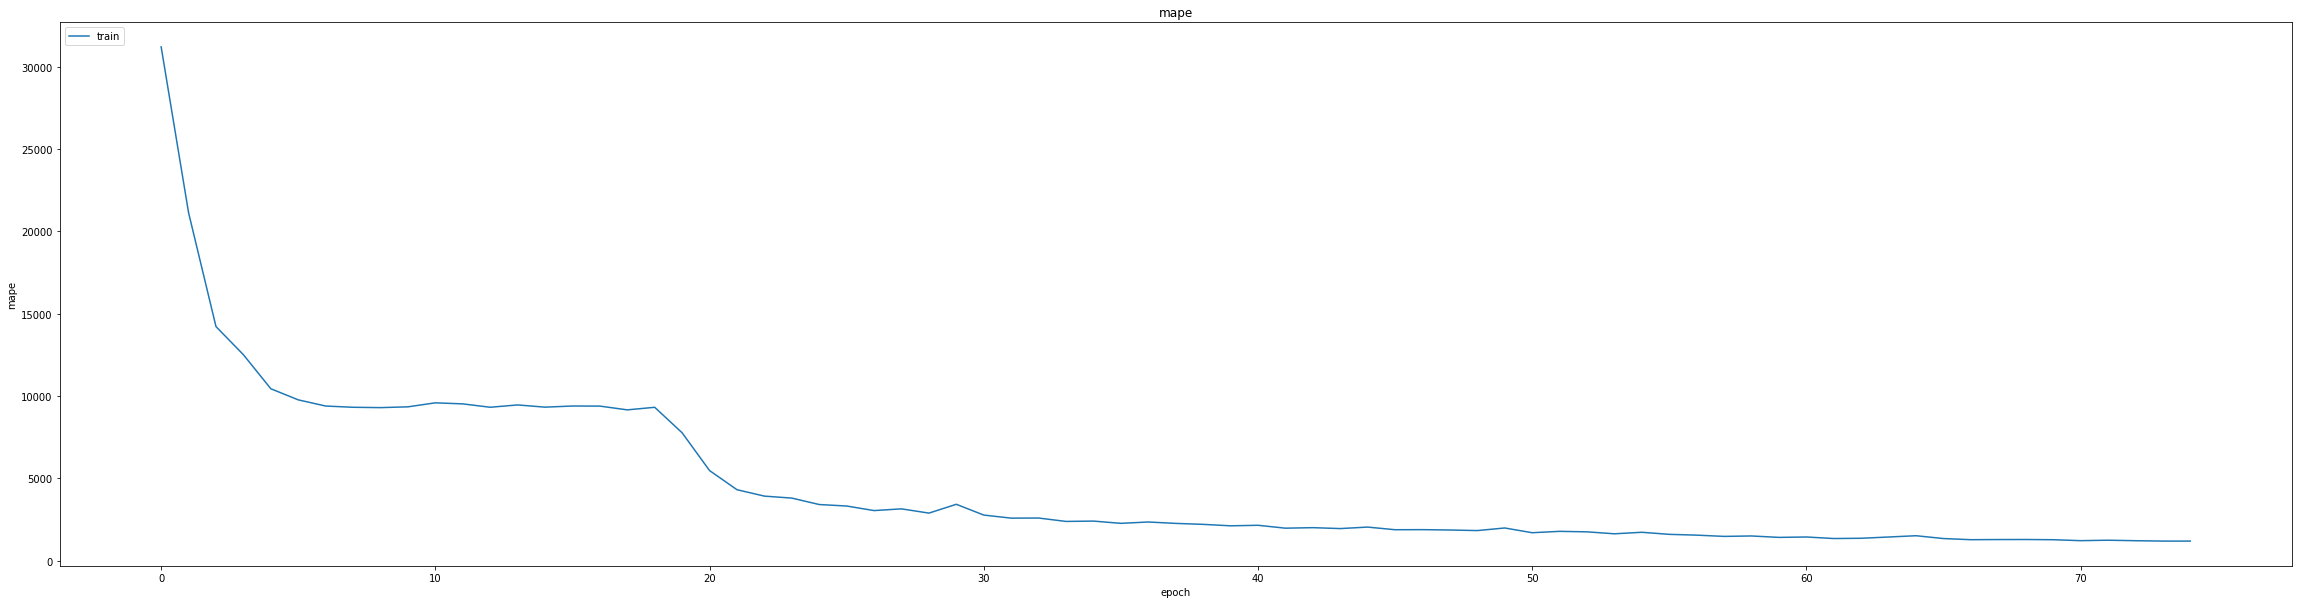

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014773840084671974
0.018771272152662277
348/348 [==============================] - 2s 3ms/step
0.9938627486496898


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
403/406 [============================>.] - ETA: 0s - loss: 1.9986e-04 - mae: 0.0063 - mse: 1.9986e-04 - root_mean_squared_error: 0.0141 - mape: 1381.3148


Epoch 1: val_mse did not improve from 0.00035
406/406 [==============================] - 10s 18ms/step - loss: 1.9860e-04 - mae: 0.0063 - mse: 1.9860e-04 - root_mean_squared_error: 0.0141 - mape: 1371.4048 - val_loss: 6.0330e-04 - val_mae: 0.0213 - val_mse: 6.0330e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 33.5048 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 2.5235e-05 - mae: 0.0037 - mse: 2.5235e-05 - root_mean_squared_error: 0.0050 - mape: 1263.7335
Epoch 2: val_mse did not improve from 0.00035
406/406 [==============================] - 5s 13ms/step - loss: 2.5217e-05 - mae: 0.0037 - mse: 2.5217e-05 - root_mean_squared_error: 0.0050 - mape: 1260.8898 - val_loss: 5.6250e-04 - val_mae: 0.0210 - val_mse: 5.6250e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 31.4500 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
406/406 [==============================] - ETA: 0s - loss: 2.5220e-05 - mae: 0.0037 - mse: 2.5220e-05 - root

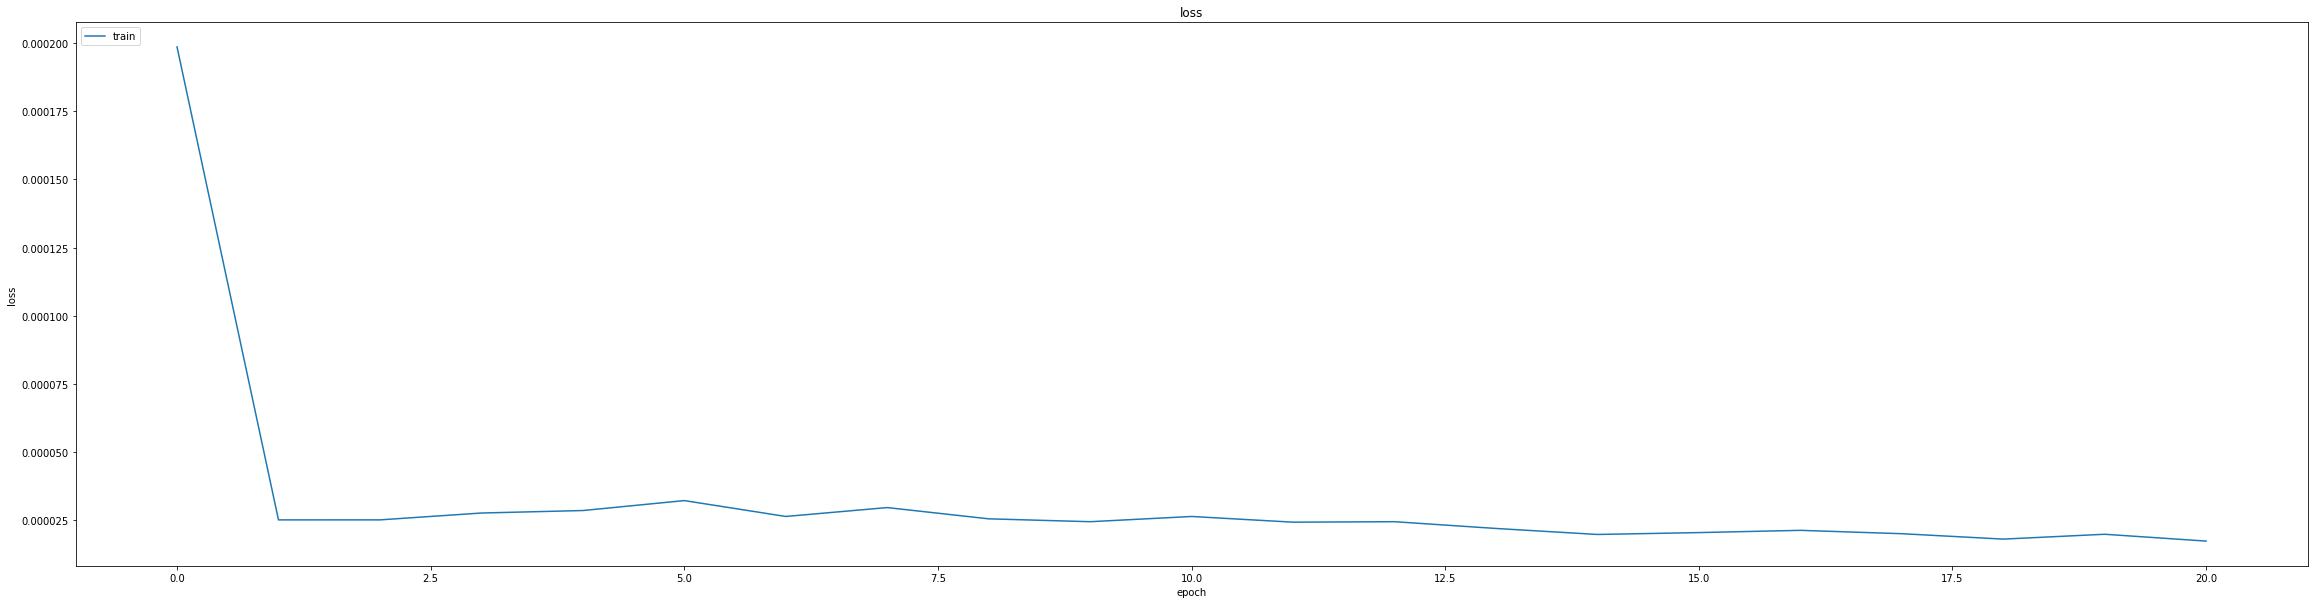

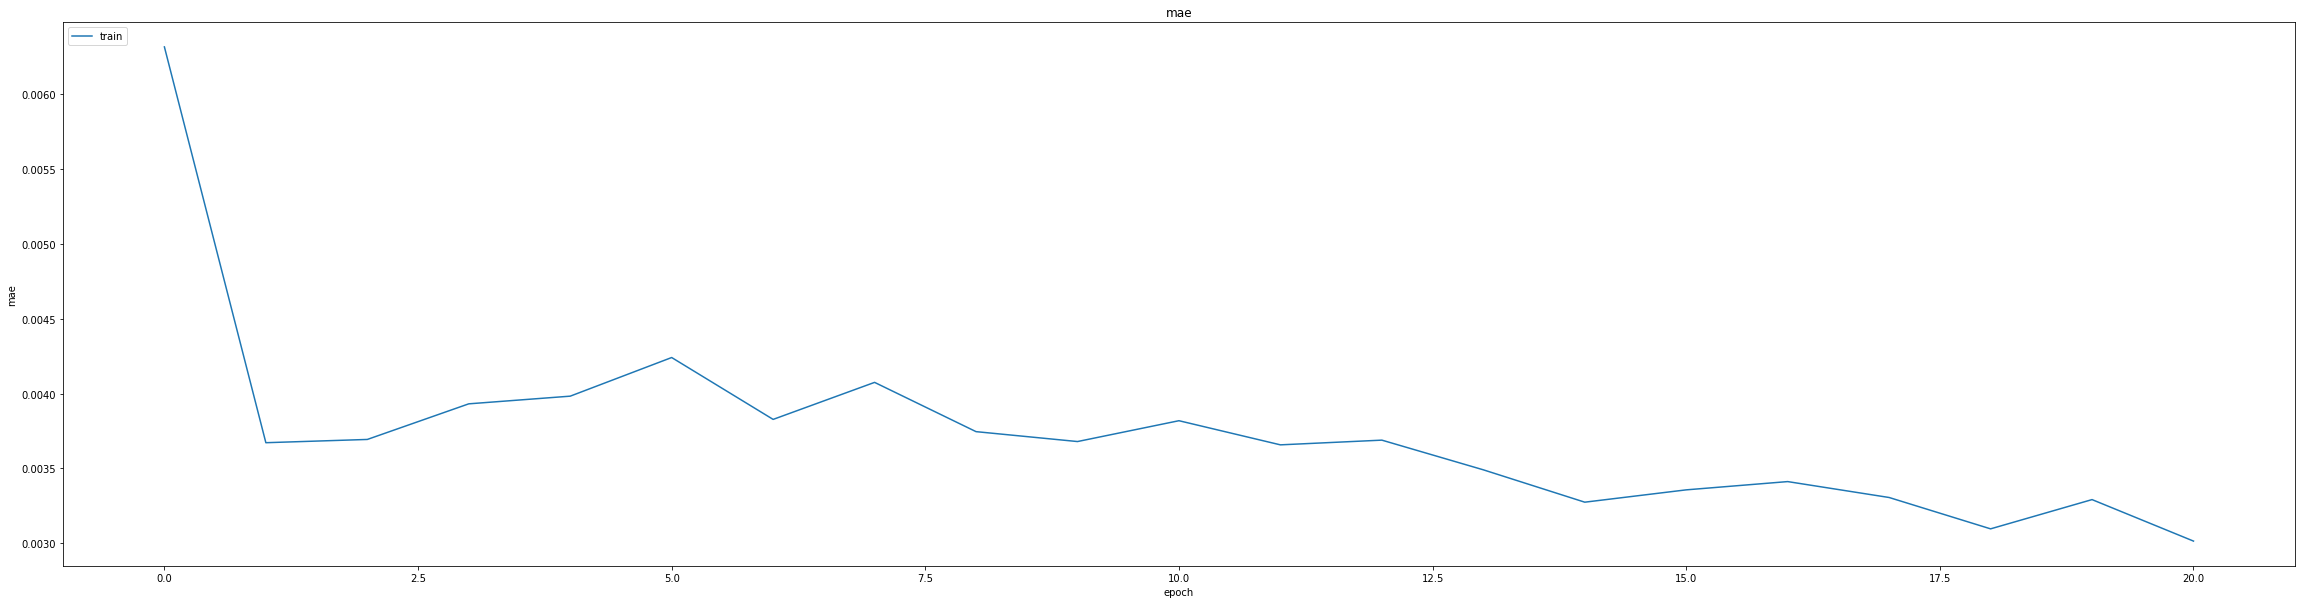

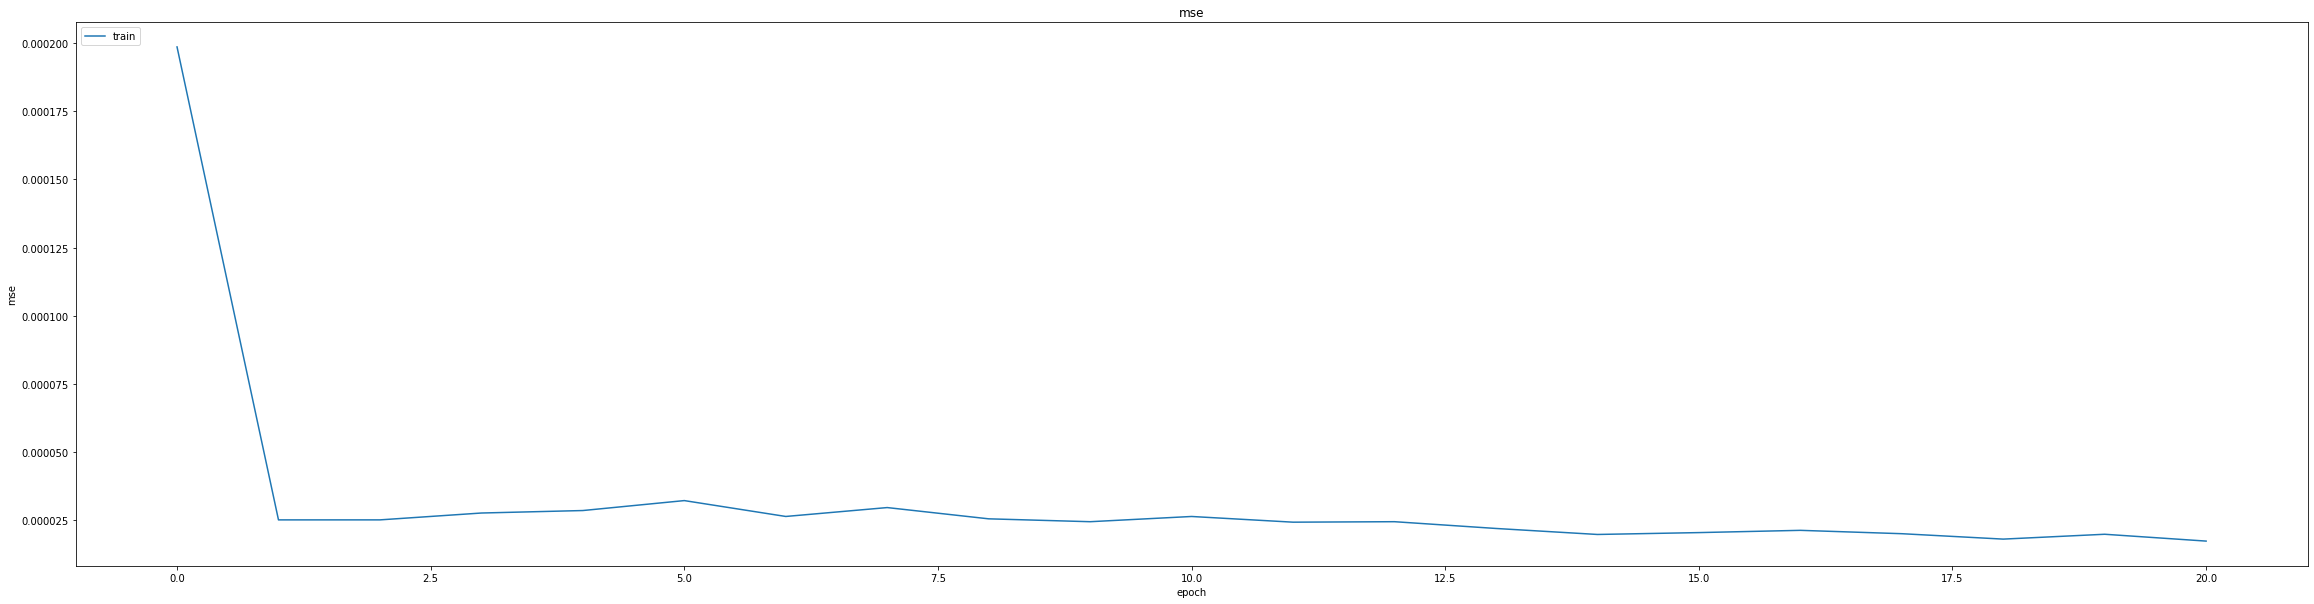

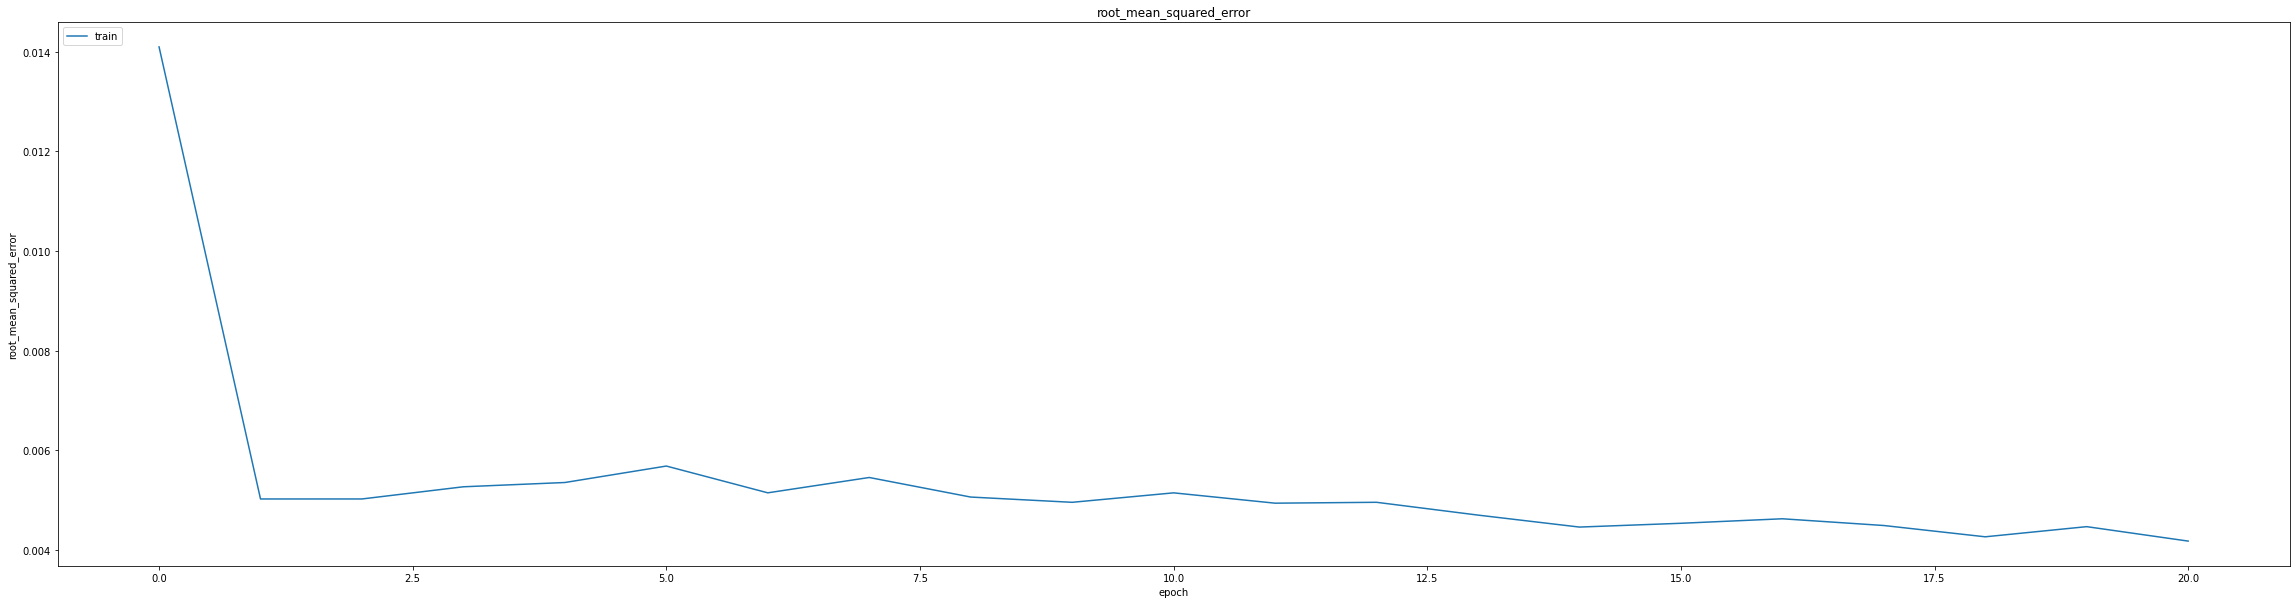

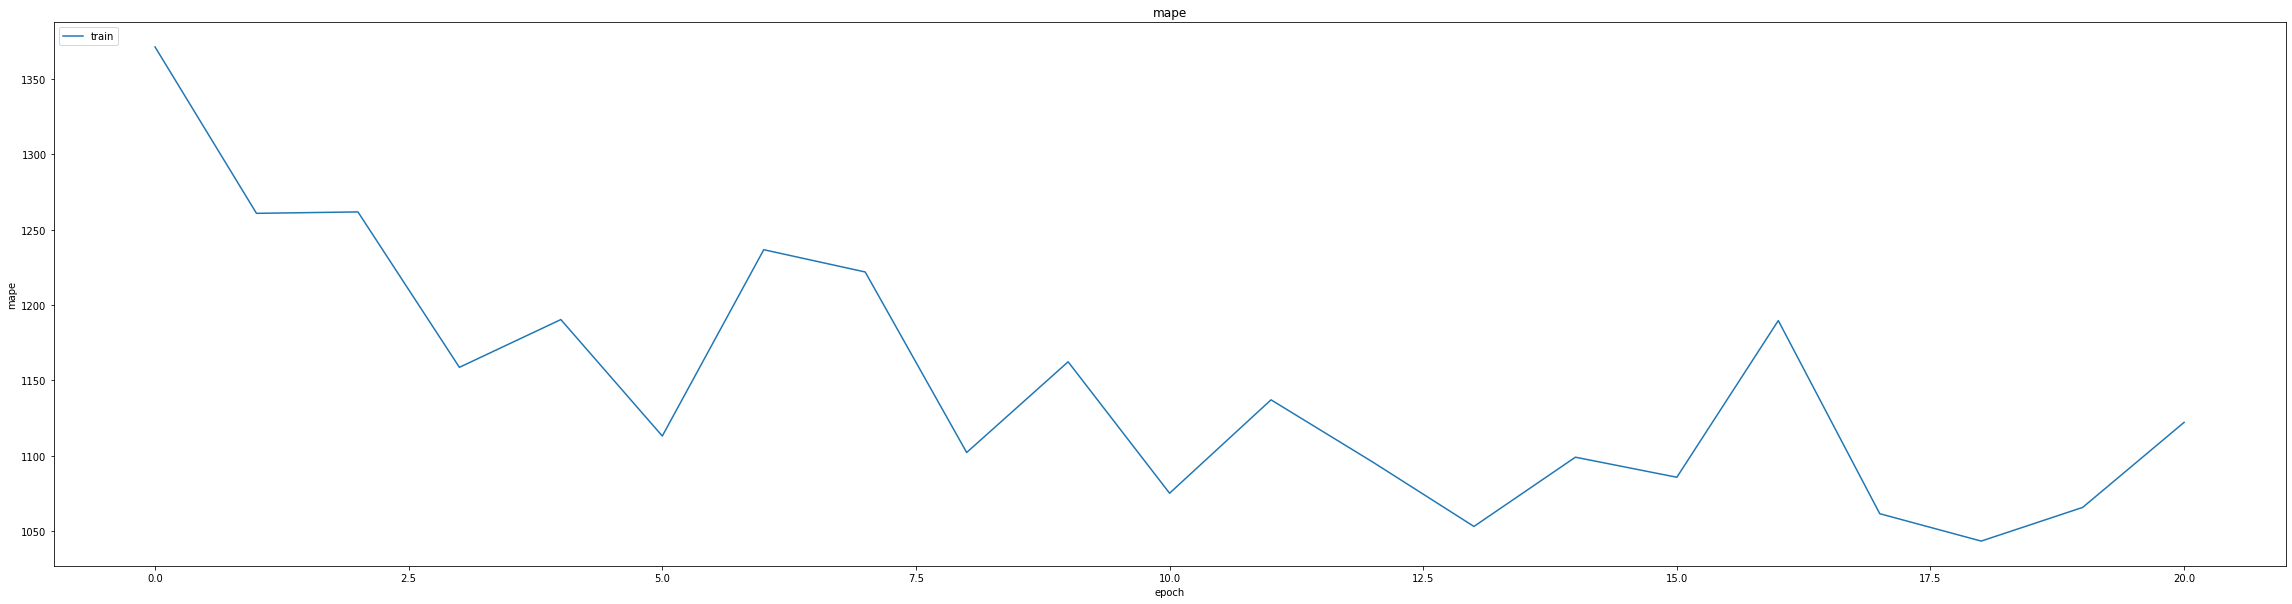

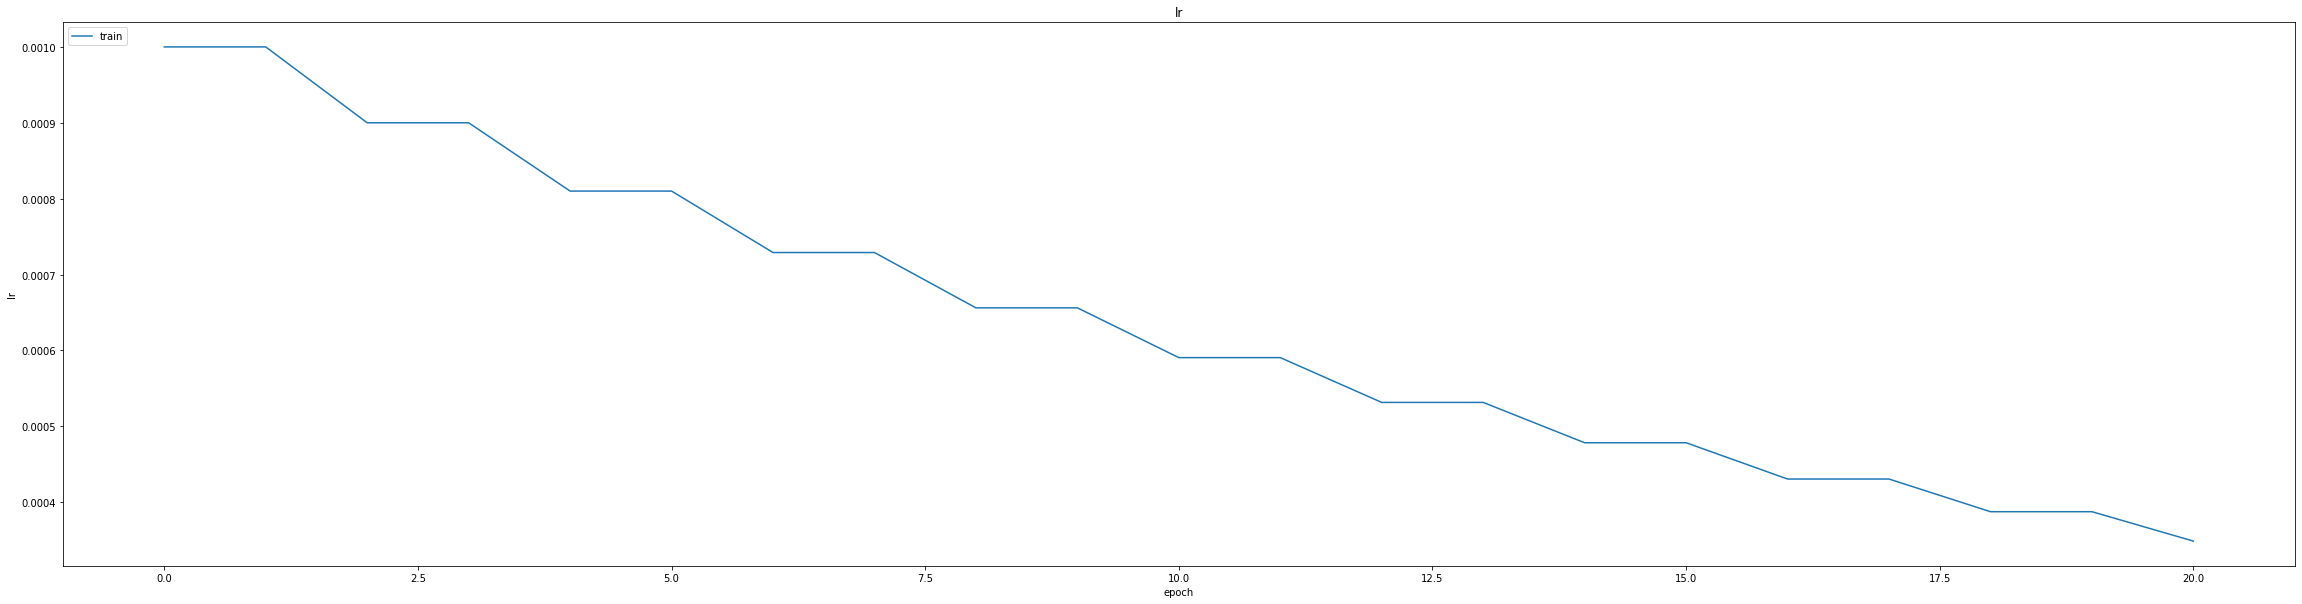

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01885417476296425
0.022345559671521187
348/348 [==============================] - 2s 3ms/step
0.9934795353659508


348/348 [==============================] - 1s 3ms/step


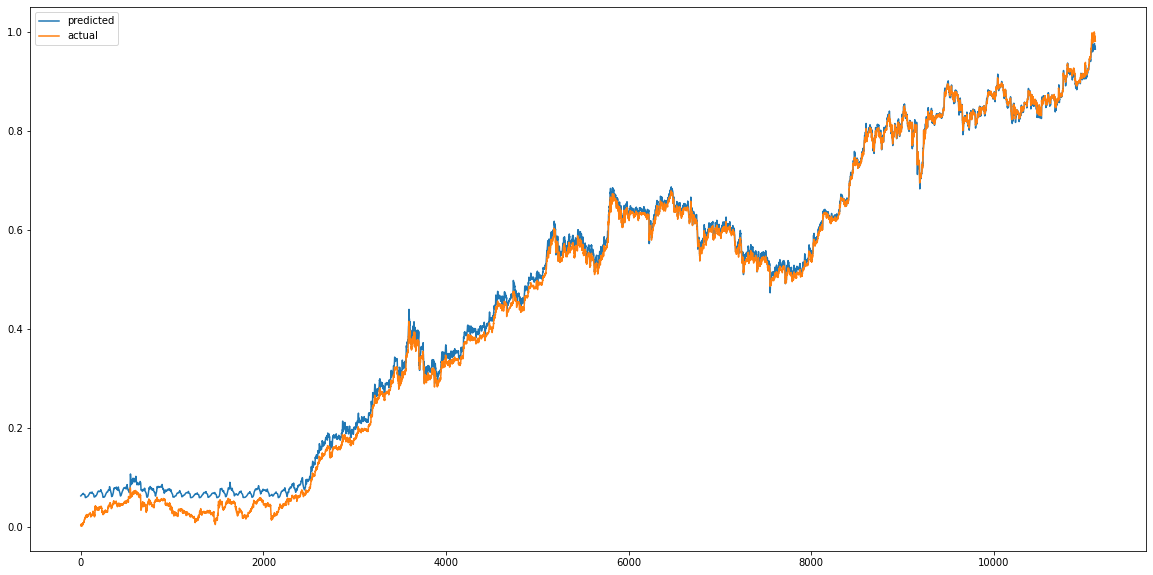

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


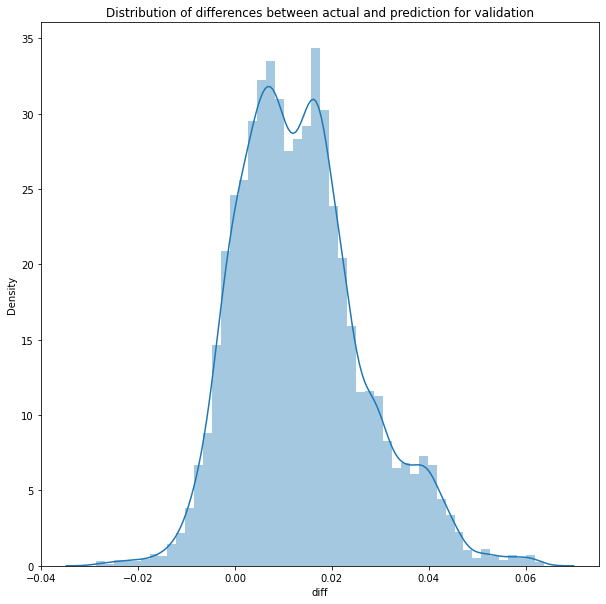

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


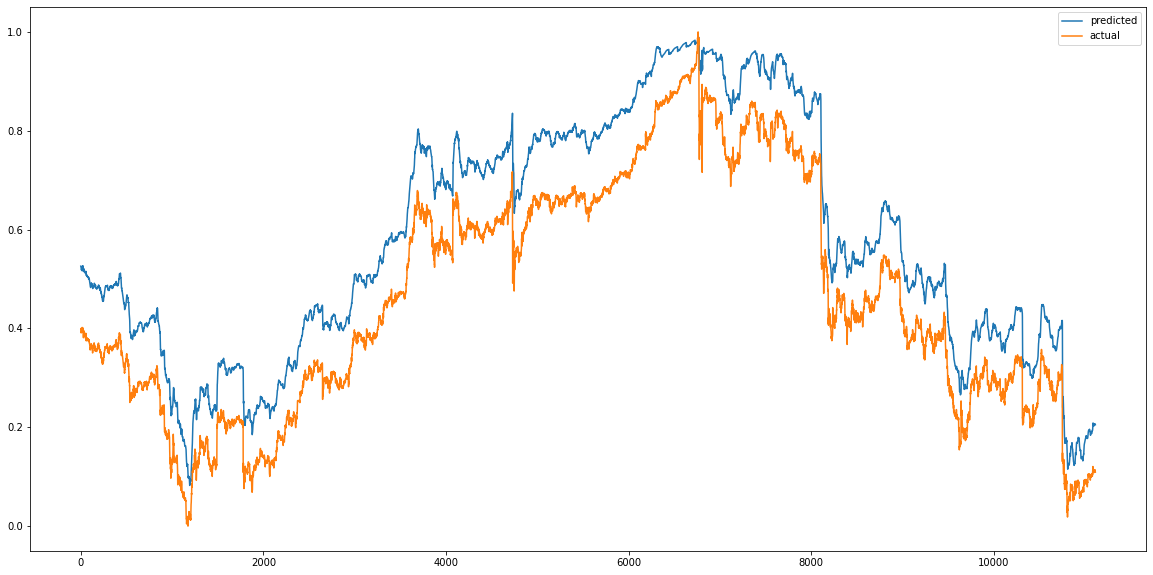

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


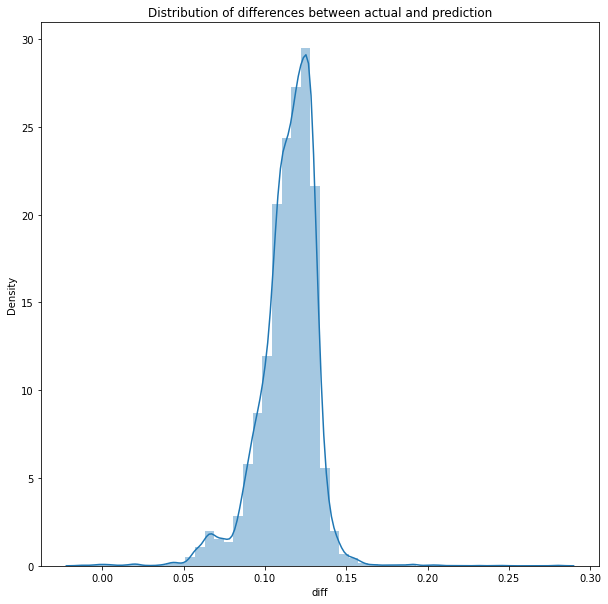

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.013345617199696992
RMSE :  0.1155232322941883
MAE :  0.11418055106244321
348/348 [==============================] - 1s 3ms/step
R2_Score  : 0.7615170298032728


count    11115.000000
mean         0.114172
std          0.017619
min         -0.013926
25%          0.106168
50%          0.116794
75%          0.125805
max          0.281591
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 283.5058 - mae: 2.1537 - mse: 283.5058 - root_mean_squared_error: 16.8376 - mape: 5343.9980
Epoch 1: val_mse improved from inf to 0.00958, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 16s 30ms/step - loss: 281.4705 - mae: 2.1385 - mse: 281.4705 - root_mean_squared_error: 16.7771 - mape: 5305.7153 - val_loss: 0.0096 - val_mae: 0.0643 - val_mse: 0.0096 - val_root_mean_squared_error: 0.0979 - val_mape: 147.2052
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 4138.9868
Epoch 2: val_mse improved from 0.00958 to 0.00621, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 0.0012 - mae: 0.0257 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 4109.3286 - val_loss: 0.0062 - val_mae: 0.0471 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0788 - val_mape: 120.9027
Epoch 3/75
401/406 [============================>.] - ETA: 0s - loss: 6.5395e-04 - mae: 0.0188 - mse: 6.5395e-04 - root_mean_squared_error: 0.0256 - mape: 3653.3528
Epoch 3: val_mse improved from 0.00621 to 0.00498, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 6.5219e-04 - mae: 0.0188 - mse: 6.5219e-04 - root_mean_squared_error: 0.0255 - mape: 3609.1929 - val_loss: 0.0050 - val_mae: 0.0413 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0705 - val_mape: 109.0658
Epoch 4/75
401/406 [============================>.] - ETA: 0s - loss: 4.7439e-04 - mae: 0.0160 - mse: 4.7439e-04 - root_mean_squared_error: 0.0218 - mape: 3754.6755
Epoch 4: val_mse improved from 0.00498 to 0.00455, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 4.7386e-04 - mae: 0.0160 - mse: 4.7386e-04 - root_mean_squared_error: 0.0218 - mape: 3709.2825 - val_loss: 0.0046 - val_mae: 0.0398 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0675 - val_mape: 104.7254
Epoch 5/75
403/406 [============================>.] - ETA: 0s - loss: 3.9525e-04 - mae: 0.0146 - mse: 3.9525e-04 - root_mean_squared_error: 0.0199 - mape: 3504.9277
Epoch 5: val_mse improved from 0.00455 to 0.00430, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 3.9513e-04 - mae: 0.0146 - mse: 3.9513e-04 - root_mean_squared_error: 0.0199 - mape: 3479.8000 - val_loss: 0.0043 - val_mae: 0.0395 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0656 - val_mape: 101.9580
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 3.4801e-04 - mae: 0.0136 - mse: 3.4801e-04 - root_mean_squared_error: 0.0187 - mape: 3624.7229
Epoch 6: val_mse did not improve from 0.00430
406/406 [==============================] - 4s 9ms/step - loss: 3.4790e-04 - mae: 0.0136 - mse: 3.4790e-04 - root_mean_squared_error: 0.0187 - mape: 3598.7302 - val_loss: 0.0043 - val_mae: 0.0388 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mape: 102.1569
Epoch 7/75
402/406 [============================>.] - ETA: 0s - loss: 3.0987e-04 - mae: 0.0128 - mse: 3.0987e-04 - root_mean_squared_error: 0.0176 - mape: 3425.2693
Epoch 7: val_mse did not improve from 0.00430
406/406 [=======================

406/406 [==============================] - 11s 27ms/step - loss: 2.7817e-04 - mae: 0.0121 - mse: 2.7817e-04 - root_mean_squared_error: 0.0167 - mape: 3310.9219 - val_loss: 0.0040 - val_mae: 0.0390 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0636 - val_mape: 99.0398
Epoch 9/75
403/406 [============================>.] - ETA: 0s - loss: 2.5912e-04 - mae: 0.0116 - mse: 2.5912e-04 - root_mean_squared_error: 0.0161 - mape: 3243.0540
Epoch 9: val_mse did not improve from 0.00405
406/406 [==============================] - 4s 9ms/step - loss: 2.5863e-04 - mae: 0.0116 - mse: 2.5863e-04 - root_mean_squared_error: 0.0161 - mape: 3219.7942 - val_loss: 0.0056 - val_mae: 0.0396 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0752 - val_mape: 109.3904
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 2.4216e-04 - mae: 0.0112 - mse: 2.4216e-04 - root_mean_squared_error: 0.0156 - mape: 3218.1243
Epoch 10: val_mse improved from 0.00405 to 0.00368, saving model to /content/d

406/406 [==============================] - 10s 25ms/step - loss: 2.4213e-04 - mae: 0.0112 - mse: 2.4213e-04 - root_mean_squared_error: 0.0156 - mape: 3195.0476 - val_loss: 0.0037 - val_mae: 0.0373 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0606 - val_mape: 94.9539
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 2.2500e-04 - mae: 0.0108 - mse: 2.2500e-04 - root_mean_squared_error: 0.0150 - mape: 3240.4758
Epoch 11: val_mse improved from 0.00368 to 0.00353, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 2.2500e-04 - mae: 0.0108 - mse: 2.2500e-04 - root_mean_squared_error: 0.0150 - mape: 3240.4758 - val_loss: 0.0035 - val_mae: 0.0354 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0595 - val_mape: 93.3906
Epoch 12/75
401/406 [============================>.] - ETA: 0s - loss: 2.1294e-04 - mae: 0.0104 - mse: 2.1294e-04 - root_mean_squared_error: 0.0146 - mape: 3266.8164
Epoch 12: val_mse did not improve from 0.00353
406/406 [==============================] - 4s 9ms/step - loss: 2.1303e-04 - mae: 0.0104 - mse: 2.1303e-04 - root_mean_squared_error: 0.0146 - mape: 3227.3062 - val_loss: 0.0036 - val_mae: 0.0367 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0599 - val_mape: 93.9981
Epoch 13/75
402/406 [============================>.] - ETA: 0s - loss: 1.9865e-04 - mae: 0.0101 - mse: 1.9865e-04 - root_mean_squared_error: 0.0141 - mape: 3137.2898
Epoch 13: val_mse improved from 0.00353 to 0.00348, saving model to /content/

406/406 [==============================] - 11s 26ms/step - loss: 1.9855e-04 - mae: 0.0101 - mse: 1.9855e-04 - root_mean_squared_error: 0.0141 - mape: 3107.0693 - val_loss: 0.0035 - val_mae: 0.0367 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0590 - val_mape: 92.6141
Epoch 14/75
402/406 [============================>.] - ETA: 0s - loss: 1.8956e-04 - mae: 0.0098 - mse: 1.8956e-04 - root_mean_squared_error: 0.0138 - mape: 3121.8088
Epoch 14: val_mse improved from 0.00348 to 0.00326, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 25ms/step - loss: 1.8994e-04 - mae: 0.0098 - mse: 1.8994e-04 - root_mean_squared_error: 0.0138 - mape: 3091.7400 - val_loss: 0.0033 - val_mae: 0.0353 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0571 - val_mape: 89.7926
Epoch 15/75
401/406 [============================>.] - ETA: 0s - loss: 1.8046e-04 - mae: 0.0096 - mse: 1.8046e-04 - root_mean_squared_error: 0.0134 - mape: 3080.8357
Epoch 15: val_mse improved from 0.00326 to 0.00312, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 1.8012e-04 - mae: 0.0096 - mse: 1.8012e-04 - root_mean_squared_error: 0.0134 - mape: 3043.5706 - val_loss: 0.0031 - val_mae: 0.0338 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 88.0570
Epoch 16/75
404/406 [============================>.] - ETA: 0s - loss: 1.6761e-04 - mae: 0.0092 - mse: 1.6761e-04 - root_mean_squared_error: 0.0129 - mape: 2975.8601
Epoch 16: val_mse improved from 0.00312 to 0.00299, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.6744e-04 - mae: 0.0092 - mse: 1.6744e-04 - root_mean_squared_error: 0.0129 - mape: 2961.8391 - val_loss: 0.0030 - val_mae: 0.0346 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0547 - val_mape: 85.9982
Epoch 17/75
403/406 [============================>.] - ETA: 0s - loss: 1.5975e-04 - mae: 0.0090 - mse: 1.5975e-04 - root_mean_squared_error: 0.0126 - mape: 3031.2683
Epoch 17: val_mse improved from 0.00299 to 0.00286, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.5969e-04 - mae: 0.0090 - mse: 1.5969e-04 - root_mean_squared_error: 0.0126 - mape: 3009.5261 - val_loss: 0.0029 - val_mae: 0.0337 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 84.2037
Epoch 18/75
400/406 [============================>.] - ETA: 0s - loss: 1.5191e-04 - mae: 0.0088 - mse: 1.5191e-04 - root_mean_squared_error: 0.0123 - mape: 2948.6270
Epoch 18: val_mse improved from 0.00286 to 0.00276, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 1.5164e-04 - mae: 0.0088 - mse: 1.5164e-04 - root_mean_squared_error: 0.0123 - mape: 2905.7004 - val_loss: 0.0028 - val_mae: 0.0338 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0526 - val_mape: 82.6877
Epoch 19/75
400/406 [============================>.] - ETA: 0s - loss: 1.4116e-04 - mae: 0.0085 - mse: 1.4116e-04 - root_mean_squared_error: 0.0119 - mape: 2920.1362
Epoch 19: val_mse improved from 0.00276 to 0.00260, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.4096e-04 - mae: 0.0084 - mse: 1.4096e-04 - root_mean_squared_error: 0.0119 - mape: 2877.6243 - val_loss: 0.0026 - val_mae: 0.0318 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mape: 80.5759
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 1.3299e-04 - mae: 0.0082 - mse: 1.3299e-04 - root_mean_squared_error: 0.0115 - mape: 2887.2778
Epoch 20: val_mse improved from 0.00260 to 0.00251, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.3299e-04 - mae: 0.0082 - mse: 1.3299e-04 - root_mean_squared_error: 0.0115 - mape: 2887.2778 - val_loss: 0.0025 - val_mae: 0.0319 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 78.9494
Epoch 21/75
403/406 [============================>.] - ETA: 0s - loss: 1.2613e-04 - mae: 0.0081 - mse: 1.2613e-04 - root_mean_squared_error: 0.0112 - mape: 2753.2715
Epoch 21: val_mse improved from 0.00251 to 0.00239, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 1.2612e-04 - mae: 0.0081 - mse: 1.2612e-04 - root_mean_squared_error: 0.0112 - mape: 2733.5237 - val_loss: 0.0024 - val_mae: 0.0320 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 77.0063
Epoch 22/75
401/406 [============================>.] - ETA: 0s - loss: 1.1743e-04 - mae: 0.0078 - mse: 1.1743e-04 - root_mean_squared_error: 0.0108 - mape: 2830.4243
Epoch 22: val_mse improved from 0.00239 to 0.00224, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.1745e-04 - mae: 0.0078 - mse: 1.1745e-04 - root_mean_squared_error: 0.0108 - mape: 2796.1897 - val_loss: 0.0022 - val_mae: 0.0301 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0473 - val_mape: 74.7803
Epoch 23/75
402/406 [============================>.] - ETA: 0s - loss: 1.1203e-04 - mae: 0.0076 - mse: 1.1203e-04 - root_mean_squared_error: 0.0106 - mape: 2674.6169
Epoch 23: val_mse improved from 0.00224 to 0.00213, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 1.1196e-04 - mae: 0.0076 - mse: 1.1196e-04 - root_mean_squared_error: 0.0106 - mape: 2648.8479 - val_loss: 0.0021 - val_mae: 0.0297 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0461 - val_mape: 72.9520
Epoch 24/75
402/406 [============================>.] - ETA: 0s - loss: 1.0460e-04 - mae: 0.0074 - mse: 1.0460e-04 - root_mean_squared_error: 0.0102 - mape: 2640.4856
Epoch 24: val_mse improved from 0.00213 to 0.00202, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 1.0465e-04 - mae: 0.0074 - mse: 1.0465e-04 - root_mean_squared_error: 0.0102 - mape: 2615.0466 - val_loss: 0.0020 - val_mae: 0.0292 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0449 - val_mape: 70.9930
Epoch 25/75
404/406 [============================>.] - ETA: 0s - loss: 9.8378e-05 - mae: 0.0072 - mse: 9.8378e-05 - root_mean_squared_error: 0.0099 - mape: 2571.1243
Epoch 25: val_mse improved from 0.00202 to 0.00190, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 9.8344e-05 - mae: 0.0072 - mse: 9.8344e-05 - root_mean_squared_error: 0.0099 - mape: 2559.0100 - val_loss: 0.0019 - val_mae: 0.0285 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 68.9454
Epoch 26/75
403/406 [============================>.] - ETA: 0s - loss: 9.2542e-05 - mae: 0.0069 - mse: 9.2542e-05 - root_mean_squared_error: 0.0096 - mape: 2477.3320
Epoch 26: val_mse improved from 0.00190 to 0.00178, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 9.2681e-05 - mae: 0.0069 - mse: 9.2681e-05 - root_mean_squared_error: 0.0096 - mape: 2459.5647 - val_loss: 0.0018 - val_mae: 0.0274 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0422 - val_mape: 66.9916
Epoch 27/75
401/406 [============================>.] - ETA: 0s - loss: 8.9477e-05 - mae: 0.0069 - mse: 8.9477e-05 - root_mean_squared_error: 0.0095 - mape: 2424.8618
Epoch 27: val_mse improved from 0.00178 to 0.00169, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 8.9373e-05 - mae: 0.0069 - mse: 8.9373e-05 - root_mean_squared_error: 0.0095 - mape: 2395.5256 - val_loss: 0.0017 - val_mae: 0.0272 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mape: 65.0222
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 8.5664e-05 - mae: 0.0067 - mse: 8.5664e-05 - root_mean_squared_error: 0.0093 - mape: 2388.0642
Epoch 28: val_mse improved from 0.00169 to 0.00162, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 8.5664e-05 - mae: 0.0067 - mse: 8.5664e-05 - root_mean_squared_error: 0.0093 - mape: 2388.0642 - val_loss: 0.0016 - val_mae: 0.0274 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 63.4918
Epoch 29/75
404/406 [============================>.] - ETA: 0s - loss: 8.0837e-05 - mae: 0.0065 - mse: 8.0837e-05 - root_mean_squared_error: 0.0090 - mape: 2333.3833
Epoch 29: val_mse improved from 0.00162 to 0.00151, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 8.0830e-05 - mae: 0.0065 - mse: 8.0830e-05 - root_mean_squared_error: 0.0090 - mape: 2322.3887 - val_loss: 0.0015 - val_mae: 0.0263 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 61.4546
Epoch 30/75
401/406 [============================>.] - ETA: 0s - loss: 7.8245e-05 - mae: 0.0064 - mse: 7.8245e-05 - root_mean_squared_error: 0.0088 - mape: 2314.2393
Epoch 30: val_mse improved from 0.00151 to 0.00141, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 7.8006e-05 - mae: 0.0064 - mse: 7.8006e-05 - root_mean_squared_error: 0.0088 - mape: 2286.2429 - val_loss: 0.0014 - val_mae: 0.0252 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 59.5320
Epoch 31/75
403/406 [============================>.] - ETA: 0s - loss: 7.1360e-05 - mae: 0.0062 - mse: 7.1360e-05 - root_mean_squared_error: 0.0084 - mape: 2274.6013
Epoch 31: val_mse improved from 0.00141 to 0.00136, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 7.1277e-05 - mae: 0.0061 - mse: 7.1277e-05 - root_mean_squared_error: 0.0084 - mape: 2258.2825 - val_loss: 0.0014 - val_mae: 0.0258 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0368 - val_mape: 58.1225
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 6.8306e-05 - mae: 0.0060 - mse: 6.8306e-05 - root_mean_squared_error: 0.0083 - mape: 2171.2258
Epoch 32: val_mse improved from 0.00136 to 0.00131, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 6.8306e-05 - mae: 0.0060 - mse: 6.8306e-05 - root_mean_squared_error: 0.0083 - mape: 2171.2258 - val_loss: 0.0013 - val_mae: 0.0263 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 56.6246
Epoch 33/75
401/406 [============================>.] - ETA: 0s - loss: 6.6483e-05 - mae: 0.0060 - mse: 6.6483e-05 - root_mean_squared_error: 0.0082 - mape: 2217.3777
Epoch 33: val_mse improved from 0.00131 to 0.00117, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 6.6328e-05 - mae: 0.0060 - mse: 6.6328e-05 - root_mean_squared_error: 0.0081 - mape: 2190.5525 - val_loss: 0.0012 - val_mae: 0.0232 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0342 - val_mape: 54.4513
Epoch 34/75
403/406 [============================>.] - ETA: 0s - loss: 6.1896e-05 - mae: 0.0058 - mse: 6.1896e-05 - root_mean_squared_error: 0.0079 - mape: 2221.2537
Epoch 34: val_mse did not improve from 0.00117
406/406 [==============================] - 4s 11ms/step - loss: 6.1979e-05 - mae: 0.0058 - mse: 6.1979e-05 - root_mean_squared_error: 0.0079 - mape: 2205.3179 - val_loss: 0.0012 - val_mae: 0.0249 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0343 - val_mape: 53.6416
Epoch 35/75
401/406 [============================>.] - ETA: 0s - loss: 6.1900e-05 - mae: 0.0058 - mse: 6.1900e-05 - root_mean_squared_error: 0.0079 - mape: 2067.0708
Epoch 35: val_mse improved from 0.00117 to 0.00115, saving model to /content

406/406 [==============================] - 11s 26ms/step - loss: 6.1683e-05 - mae: 0.0058 - mse: 6.1683e-05 - root_mean_squared_error: 0.0079 - mape: 2042.0634 - val_loss: 0.0011 - val_mae: 0.0251 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 52.7071
Epoch 36/75
405/406 [============================>.] - ETA: 0s - loss: 5.6649e-05 - mae: 0.0055 - mse: 5.6649e-05 - root_mean_squared_error: 0.0075 - mape: 2071.7278
Epoch 36: val_mse improved from 0.00115 to 0.00104, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 5.6611e-05 - mae: 0.0055 - mse: 5.6611e-05 - root_mean_squared_error: 0.0075 - mape: 2067.0652 - val_loss: 0.0010 - val_mae: 0.0233 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 50.7675
Epoch 37/75
406/406 [==============================] - ETA: 0s - loss: 5.4120e-05 - mae: 0.0054 - mse: 5.4120e-05 - root_mean_squared_error: 0.0074 - mape: 1992.7123
Epoch 37: val_mse improved from 0.00104 to 0.00104, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 5.4120e-05 - mae: 0.0054 - mse: 5.4120e-05 - root_mean_squared_error: 0.0074 - mape: 1992.7123 - val_loss: 0.0010 - val_mae: 0.0241 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 50.0337
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 5.4458e-05 - mae: 0.0054 - mse: 5.4458e-05 - root_mean_squared_error: 0.0074 - mape: 1982.4333
Epoch 38: val_mse improved from 0.00104 to 0.00093, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 5.4470e-05 - mae: 0.0054 - mse: 5.4470e-05 - root_mean_squared_error: 0.0074 - mape: 1973.0913 - val_loss: 9.3490e-04 - val_mae: 0.0218 - val_mse: 9.3490e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 48.1653
Epoch 39/75
406/406 [==============================] - ETA: 0s - loss: 5.5212e-05 - mae: 0.0055 - mse: 5.5212e-05 - root_mean_squared_error: 0.0074 - mape: 1912.5400
Epoch 39: val_mse improved from 0.00093 to 0.00093, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 5.5212e-05 - mae: 0.0055 - mse: 5.5212e-05 - root_mean_squared_error: 0.0074 - mape: 1912.5400 - val_loss: 9.3191e-04 - val_mae: 0.0225 - val_mse: 9.3191e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 47.5409
Epoch 40/75
403/406 [============================>.] - ETA: 0s - loss: 4.7000e-05 - mae: 0.0050 - mse: 4.7000e-05 - root_mean_squared_error: 0.0069 - mape: 1904.9736
Epoch 40: val_mse improved from 0.00093 to 0.00093, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 4.7027e-05 - mae: 0.0050 - mse: 4.7027e-05 - root_mean_squared_error: 0.0069 - mape: 1891.3086 - val_loss: 9.2932e-04 - val_mae: 0.0233 - val_mse: 9.2932e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 46.7336
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 4.6627e-05 - mae: 0.0050 - mse: 4.6627e-05 - root_mean_squared_error: 0.0068 - mape: 1831.4484
Epoch 41: val_mse improved from 0.00093 to 0.00087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 26ms/step - loss: 4.6627e-05 - mae: 0.0050 - mse: 4.6627e-05 - root_mean_squared_error: 0.0068 - mape: 1831.4484 - val_loss: 8.6505e-04 - val_mae: 0.0220 - val_mse: 8.6505e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 45.2854
Epoch 42/75
400/406 [============================>.] - ETA: 0s - loss: 4.8188e-05 - mae: 0.0051 - mse: 4.8188e-05 - root_mean_squared_error: 0.0069 - mape: 1887.1265
Epoch 42: val_mse improved from 0.00087 to 0.00083, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 4.8191e-05 - mae: 0.0051 - mse: 4.8191e-05 - root_mean_squared_error: 0.0069 - mape: 1859.6498 - val_loss: 8.2787e-04 - val_mae: 0.0216 - val_mse: 8.2787e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 44.3221
Epoch 43/75
406/406 [==============================] - ETA: 0s - loss: 4.4525e-05 - mae: 0.0049 - mse: 4.4525e-05 - root_mean_squared_error: 0.0067 - mape: 1775.1086
Epoch 43: val_mse improved from 0.00083 to 0.00076, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 4.4525e-05 - mae: 0.0049 - mse: 4.4525e-05 - root_mean_squared_error: 0.0067 - mape: 1775.1086 - val_loss: 7.5752e-04 - val_mae: 0.0207 - val_mse: 7.5752e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 42.6071
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 4.8897e-05 - mae: 0.0052 - mse: 4.8897e-05 - root_mean_squared_error: 0.0070 - mape: 1819.3608
Epoch 44: val_mse did not improve from 0.00076
406/406 [==============================] - 4s 9ms/step - loss: 4.8784e-05 - mae: 0.0052 - mse: 4.8784e-05 - root_mean_squared_error: 0.0070 - mape: 1806.3083 - val_loss: 7.6653e-04 - val_mae: 0.0218 - val_mse: 7.6653e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 41.7614
Epoch 45/75
403/406 [============================>.] - ETA: 0s - loss: 5.1040e-05 - mae: 0.0053 - mse: 5.1040e-05 - root_mean_squared_error: 0.0071 - mape: 1747.5933
Epoch 45: val_mse improved from 0.00076 to 0.00073, saving mo

406/406 [==============================] - 10s 26ms/step - loss: 5.0947e-05 - mae: 0.0053 - mse: 5.0947e-05 - root_mean_squared_error: 0.0071 - mape: 1735.0569 - val_loss: 7.3338e-04 - val_mae: 0.0208 - val_mse: 7.3338e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 41.5484
Epoch 46/75
404/406 [============================>.] - ETA: 0s - loss: 5.4378e-05 - mae: 0.0055 - mse: 5.4378e-05 - root_mean_squared_error: 0.0074 - mape: 1728.8986
Epoch 46: val_mse did not improve from 0.00073
406/406 [==============================] - 4s 9ms/step - loss: 5.4330e-05 - mae: 0.0055 - mse: 5.4330e-05 - root_mean_squared_error: 0.0074 - mape: 1720.7520 - val_loss: 7.8822e-04 - val_mae: 0.0225 - val_mse: 7.8822e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 41.8444
Epoch 47/75
403/406 [============================>.] - ETA: 0s - loss: 5.4139e-05 - mae: 0.0054 - mse: 5.4139e-05 - root_mean_squared_error: 0.0074 - mape: 1752.4341
Epoch 47: val_mse improved from 0.00073 to 0.00072, saving mo

406/406 [==============================] - 11s 27ms/step - loss: 5.4015e-05 - mae: 0.0054 - mse: 5.4015e-05 - root_mean_squared_error: 0.0073 - mape: 1739.8624 - val_loss: 7.1800e-04 - val_mae: 0.0209 - val_mse: 7.1800e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 40.5678
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 6.1781e-05 - mae: 0.0057 - mse: 6.1781e-05 - root_mean_squared_error: 0.0079 - mape: 1728.0135
Epoch 48: val_mse improved from 0.00072 to 0.00063, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 6.1781e-05 - mae: 0.0057 - mse: 6.1781e-05 - root_mean_squared_error: 0.0079 - mape: 1728.0135 - val_loss: 6.3205e-04 - val_mae: 0.0186 - val_mse: 6.3205e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 38.5941
Epoch 49/75
401/406 [============================>.] - ETA: 0s - loss: 5.7114e-05 - mae: 0.0056 - mse: 5.7114e-05 - root_mean_squared_error: 0.0076 - mape: 1752.4149
Epoch 49: val_mse improved from 0.00063 to 0.00063, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 10s 26ms/step - loss: 5.6983e-05 - mae: 0.0056 - mse: 5.6983e-05 - root_mean_squared_error: 0.0075 - mape: 1731.2166 - val_loss: 6.3150e-04 - val_mae: 0.0184 - val_mse: 6.3150e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 39.3349
Epoch 50/75
405/406 [============================>.] - ETA: 0s - loss: 5.8617e-05 - mae: 0.0058 - mse: 5.8617e-05 - root_mean_squared_error: 0.0077 - mape: 1688.4237
Epoch 50: val_mse did not improve from 0.00063
406/406 [==============================] - 4s 9ms/step - loss: 5.8534e-05 - mae: 0.0058 - mse: 5.8534e-05 - root_mean_squared_error: 0.0077 - mape: 1684.6238 - val_loss: 7.6669e-04 - val_mae: 0.0227 - val_mse: 7.6669e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 40.8402
Epoch 51/75
403/406 [============================>.] - ETA: 0s - loss: 5.6372e-05 - mae: 0.0057 - mse: 5.6372e-05 - root_mean_squared_error: 0.0075 - mape: 1673.1094
Epoch 51: val_mse did not improve from 0.00063
406/406 [=====

406/406 [==============================] - 11s 27ms/step - loss: 6.5432e-05 - mae: 0.0061 - mse: 6.5432e-05 - root_mean_squared_error: 0.0081 - mape: 1630.3406 - val_loss: 6.2424e-04 - val_mae: 0.0193 - val_mse: 6.2424e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 38.3570
Epoch 57/75
406/406 [==============================] - ETA: 0s - loss: 6.1983e-05 - mae: 0.0058 - mse: 6.1983e-05 - root_mean_squared_error: 0.0079 - mape: 1651.4407
Epoch 57: val_mse did not improve from 0.00062
406/406 [==============================] - 5s 12ms/step - loss: 6.1983e-05 - mae: 0.0058 - mse: 6.1983e-05 - root_mean_squared_error: 0.0079 - mape: 1651.4407 - val_loss: 8.3362e-04 - val_mae: 0.0257 - val_mse: 8.3362e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 39.7339
Epoch 58/75
403/406 [============================>.] - ETA: 0s - loss: 5.4572e-05 - mae: 0.0056 - mse: 5.4572e-05 - root_mean_squared_error: 0.0074 - mape: 1645.7614
Epoch 58: val_mse improved from 0.00062 to 0.00053, saving m

406/406 [==============================] - 11s 26ms/step - loss: 5.4740e-05 - mae: 0.0056 - mse: 5.4740e-05 - root_mean_squared_error: 0.0074 - mape: 1633.9589 - val_loss: 5.3492e-04 - val_mae: 0.0172 - val_mse: 5.3492e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 35.9857
Epoch 59/75
406/406 [==============================] - ETA: 0s - loss: 5.8624e-05 - mae: 0.0058 - mse: 5.8624e-05 - root_mean_squared_error: 0.0077 - mape: 1566.6857
Epoch 59: val_mse improved from 0.00053 to 0.00053, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 5.8624e-05 - mae: 0.0058 - mse: 5.8624e-05 - root_mean_squared_error: 0.0077 - mape: 1566.6857 - val_loss: 5.3018e-04 - val_mae: 0.0164 - val_mse: 5.3018e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 36.5341
Epoch 60/75
406/406 [==============================] - ETA: 0s - loss: 6.6419e-05 - mae: 0.0059 - mse: 6.6419e-05 - root_mean_squared_error: 0.0081 - mape: 1608.4871
Epoch 60: val_mse did not improve from 0.00053
406/406 [==============================] - 4s 10ms/step - loss: 6.6419e-05 - mae: 0.0059 - mse: 6.6419e-05 - root_mean_squared_error: 0.0081 - mape: 1608.4871 - val_loss: 5.4935e-04 - val_mae: 0.0174 - val_mse: 5.4935e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 36.3297
Epoch 61/75
406/406 [==============================] - ETA: 0s - loss: 9.1277e-05 - mae: 0.0070 - mse: 9.1277e-05 - root_mean_squared_error: 0.0096 - mape: 1583.1938
Epoch 61: val_mse did not improve from 0.00053
406/406 [====

406/406 [==============================] - 10s 26ms/step - loss: 5.0637e-05 - mae: 0.0054 - mse: 5.0637e-05 - root_mean_squared_error: 0.0071 - mape: 1399.0363 - val_loss: 5.1327e-04 - val_mae: 0.0203 - val_mse: 5.1327e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 29.5822


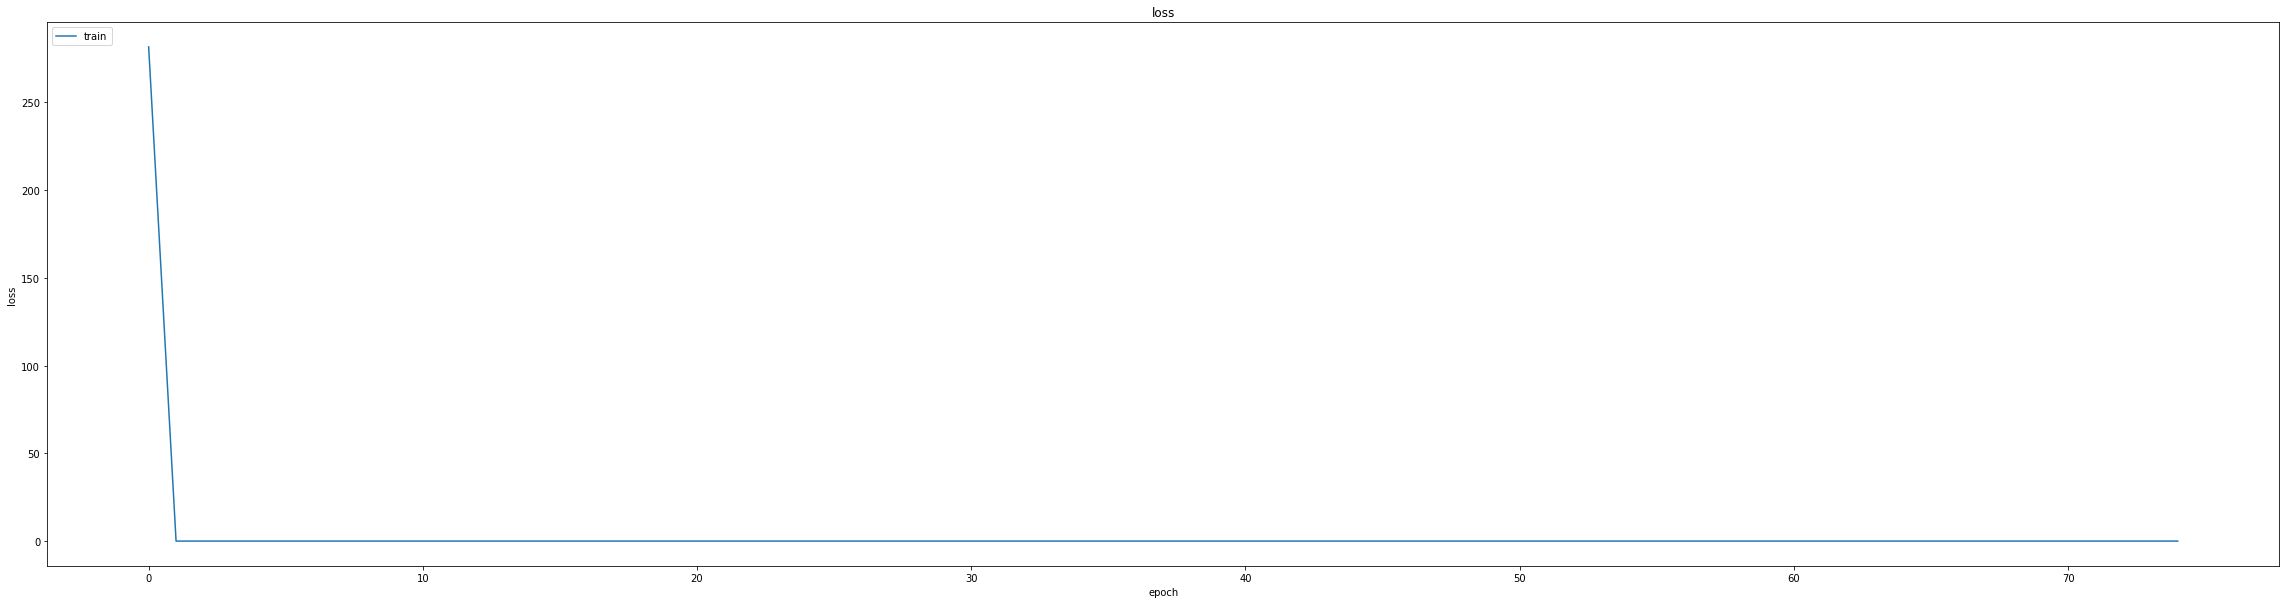

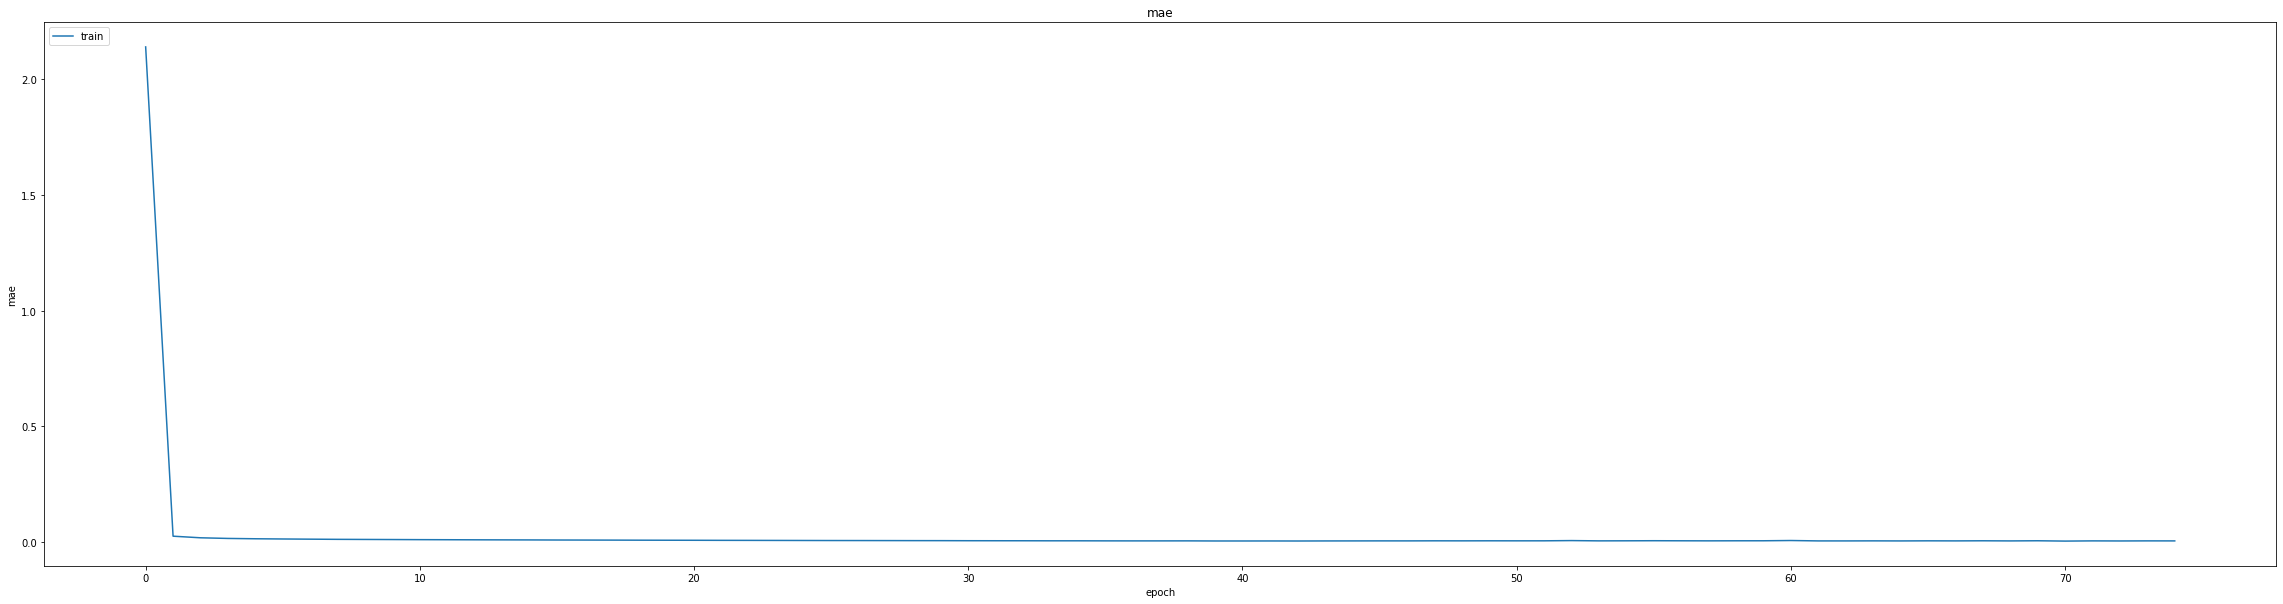

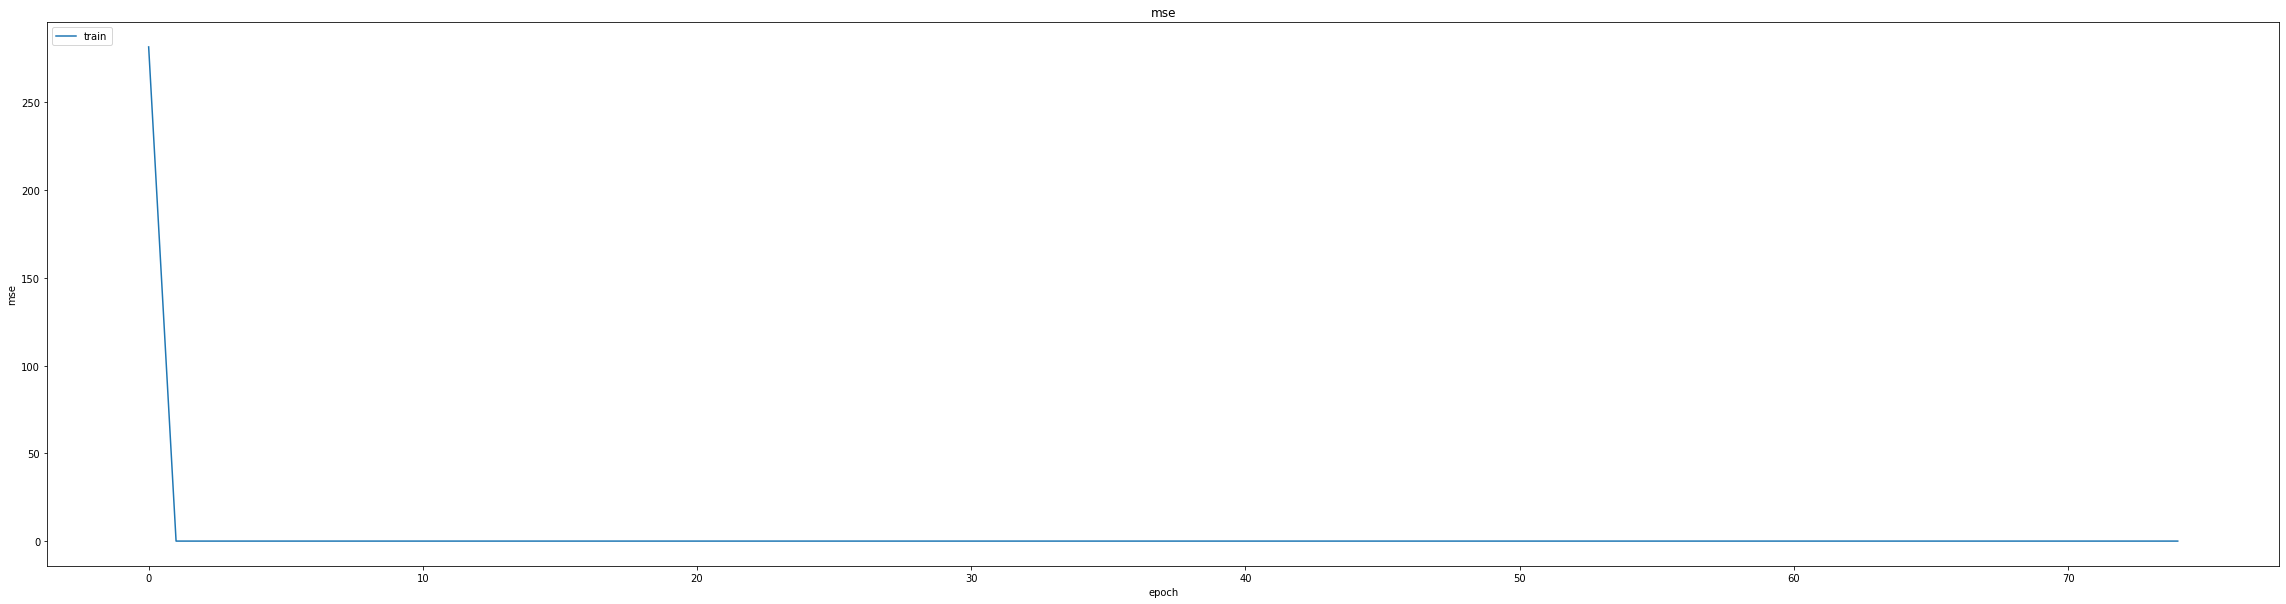

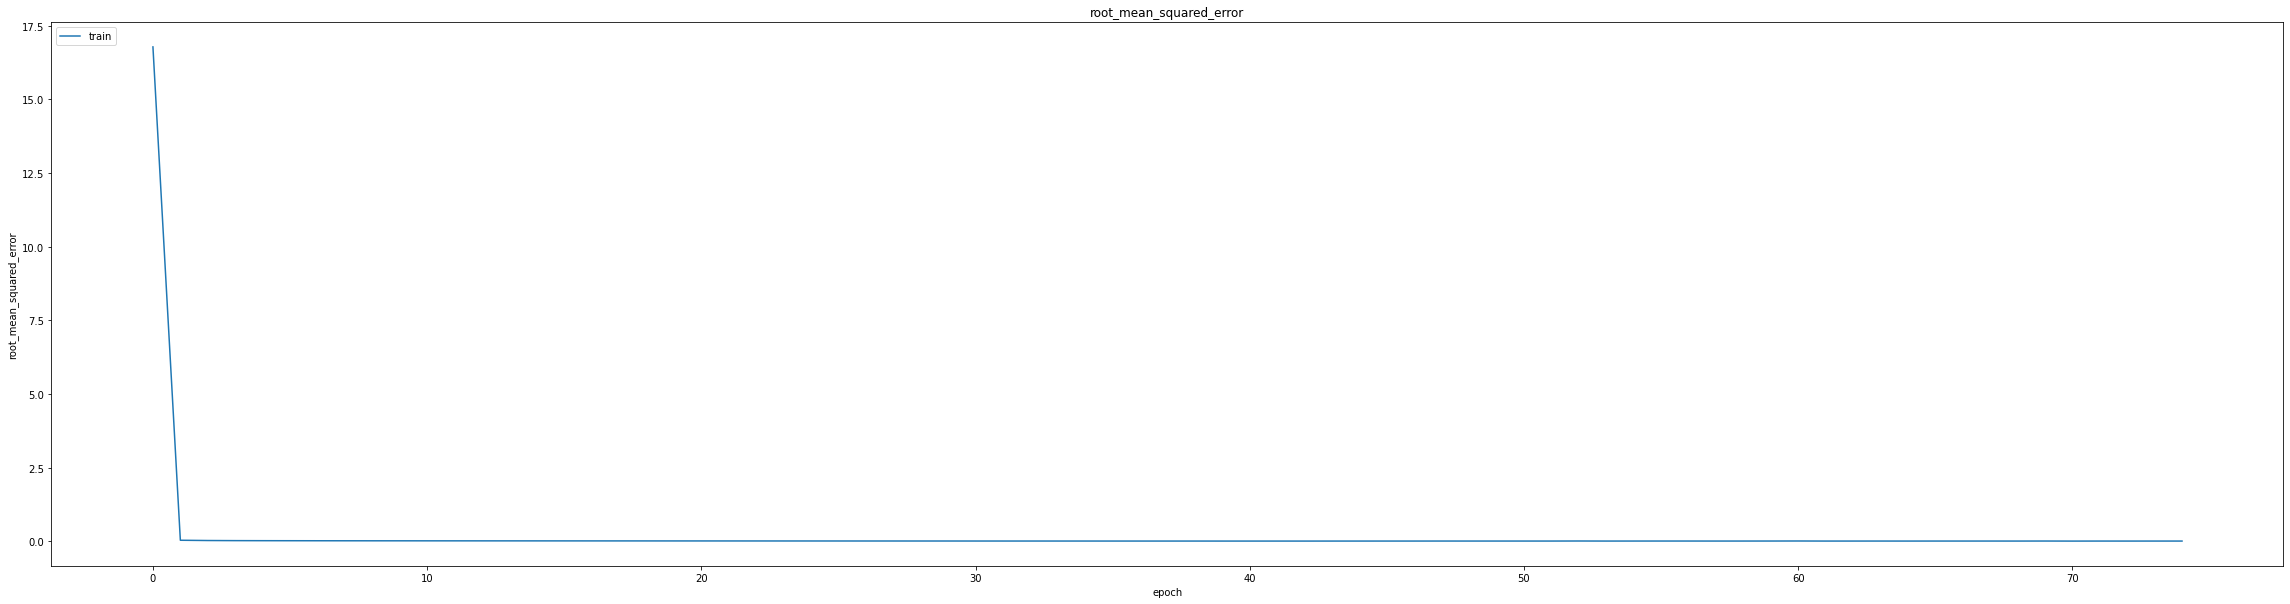

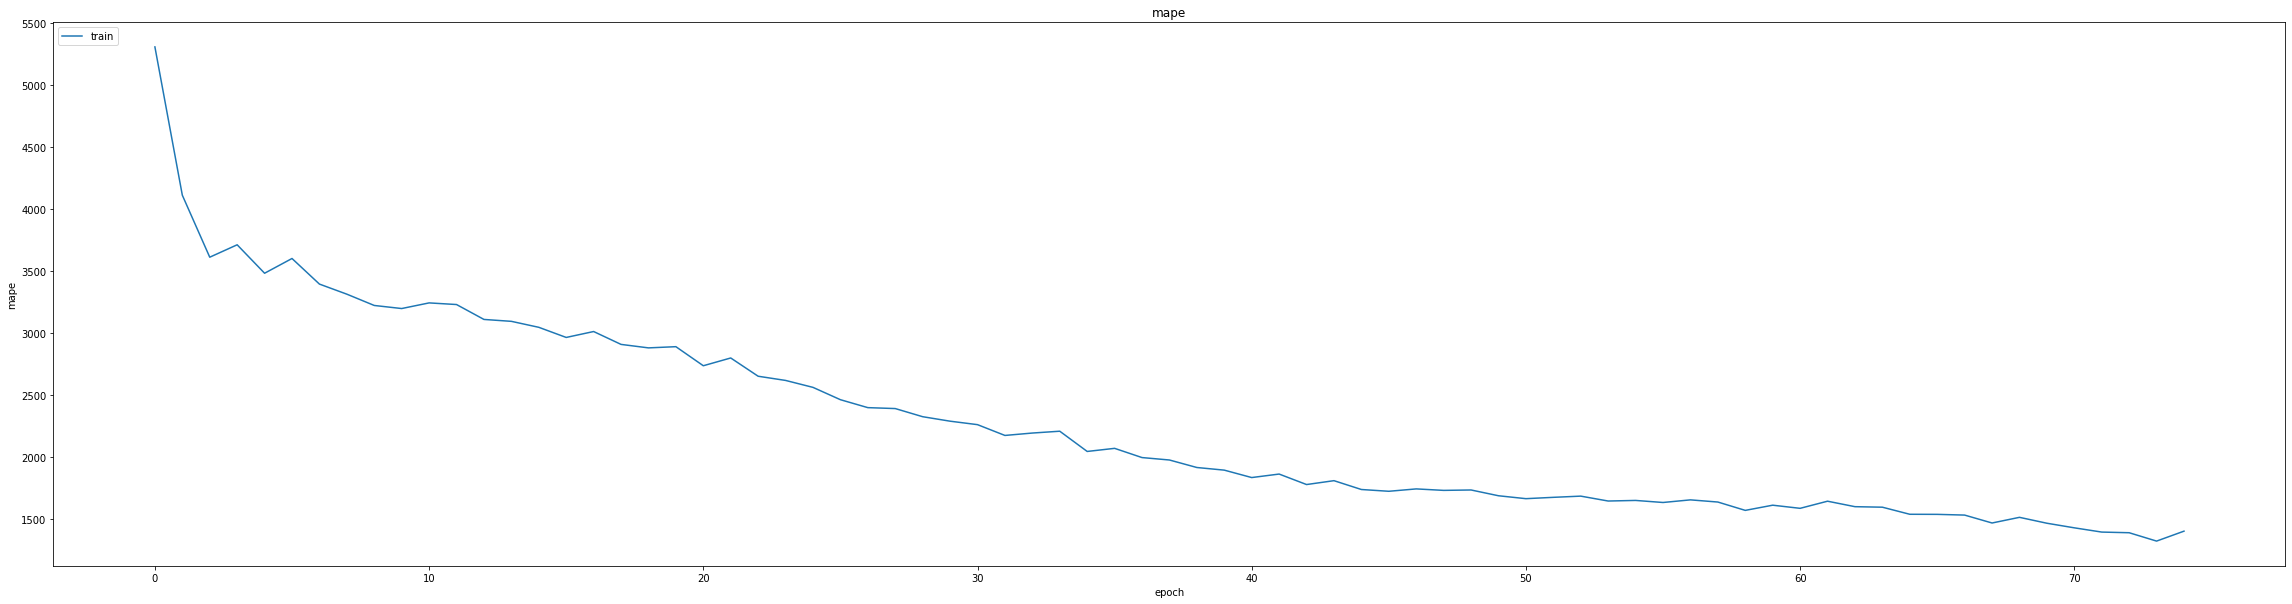

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016428068280220032
0.022655382752418518
348/348 [==============================] - 2s 4ms/step
0.9941945245836715


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


402/406 [============================>.] - ETA: 0s - loss: 2.9495e-04 - mae: 0.0070 - mse: 2.9495e-04 - root_mean_squared_error: 0.0172 - mape: 1481.3359
Epoch 1: val_mse did not improve from 0.00051
406/406 [==============================] - 8s 11ms/step - loss: 2.9229e-04 - mae: 0.0069 - mse: 2.9229e-04 - root_mean_squared_error: 0.0171 - mape: 1467.0604 - val_loss: 5.8091e-04 - val_mae: 0.0217 - val_mse: 5.8091e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 30.8429 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 2.1141e-05 - mae: 0.0033 - mse: 2.1141e-05 - root_mean_squared_error: 0.0046 - mape: 1341.7953
Epoch 2: val_mse did not improve from 0.00051
406/406 [==============================] - 5s 12ms/step - loss: 2.1191e-05 - mae: 0.0033 - mse: 2.1191e-05 - root_mean_squared_error: 0.0046 - mape: 1332.1704 - val_loss: 5.8490e-04 - val_mae: 0.0218 - val_mse: 5.8490e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 31.2625 - lr: 0.0010
lr 

406/406 [==============================] - 13s 31ms/step - loss: 2.6525e-05 - mae: 0.0038 - mse: 2.6525e-05 - root_mean_squared_error: 0.0052 - mape: 1262.1641 - val_loss: 5.1120e-04 - val_mae: 0.0209 - val_mse: 5.1120e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 27.2332 - lr: 7.2900e-04
Epoch 8/25
403/406 [============================>.] - ETA: 0s - loss: 3.3062e-05 - mae: 0.0042 - mse: 3.3062e-05 - root_mean_squared_error: 0.0057 - mape: 1253.6538
Epoch 8: val_mse did not improve from 0.00051
406/406 [==============================] - 6s 14ms/step - loss: 3.3087e-05 - mae: 0.0042 - mse: 3.3087e-05 - root_mean_squared_error: 0.0058 - mape: 1244.6625 - val_loss: 7.0864e-04 - val_mae: 0.0250 - val_mse: 7.0864e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 32.0377 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
402/406 [============================>.] - ETA: 0s - loss: 2.3958e-05 - mae: 0.0036 - mse: 2.3958e-05 - root_mean_squared_error: 0.0049 - mape: 118

406/406 [==============================] - 10s 25ms/step - loss: 2.0174e-05 - mae: 0.0033 - mse: 2.0174e-05 - root_mean_squared_error: 0.0045 - mape: 1161.3243 - val_loss: 4.7813e-04 - val_mae: 0.0200 - val_mse: 4.7813e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 27.3498 - lr: 5.3144e-04
Epoch 14/25
402/406 [============================>.] - ETA: 0s - loss: 2.3365e-05 - mae: 0.0036 - mse: 2.3365e-05 - root_mean_squared_error: 0.0048 - mape: 1198.4205
Epoch 14: val_mse improved from 0.00048 to 0.00031, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 11s 27ms/step - loss: 2.3274e-05 - mae: 0.0035 - mse: 2.3274e-05 - root_mean_squared_error: 0.0048 - mape: 1186.8717 - val_loss: 3.1458e-04 - val_mae: 0.0156 - val_mse: 3.1458e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 22.4971 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
402/406 [============================>.] - ETA: 0s - loss: 2.1333e-05 - mae: 0.0034 - mse: 2.1333e-05 - root_mean_squared_error: 0.0046 - mape: 1171.0168
Epoch 15: val_mse did not improve from 0.00031
406/406 [==============================] - 4s 9ms/step - loss: 2.1305e-05 - mae: 0.0034 - mse: 2.1305e-05 - root_mean_squared_error: 0.0046 - mape: 1159.7327 - val_loss: 3.8184e-04 - val_mae: 0.0173 - val_mse: 3.8184e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 25.7584 - lr: 4.7830e-04
Epoch 16/25
405/406 [============================>.] - ETA: 0s - loss: 2.3654e-05 - mae: 0.0035 - mse: 2.3654e-05 - root_mean_squared_error: 0.0049 - mape: 

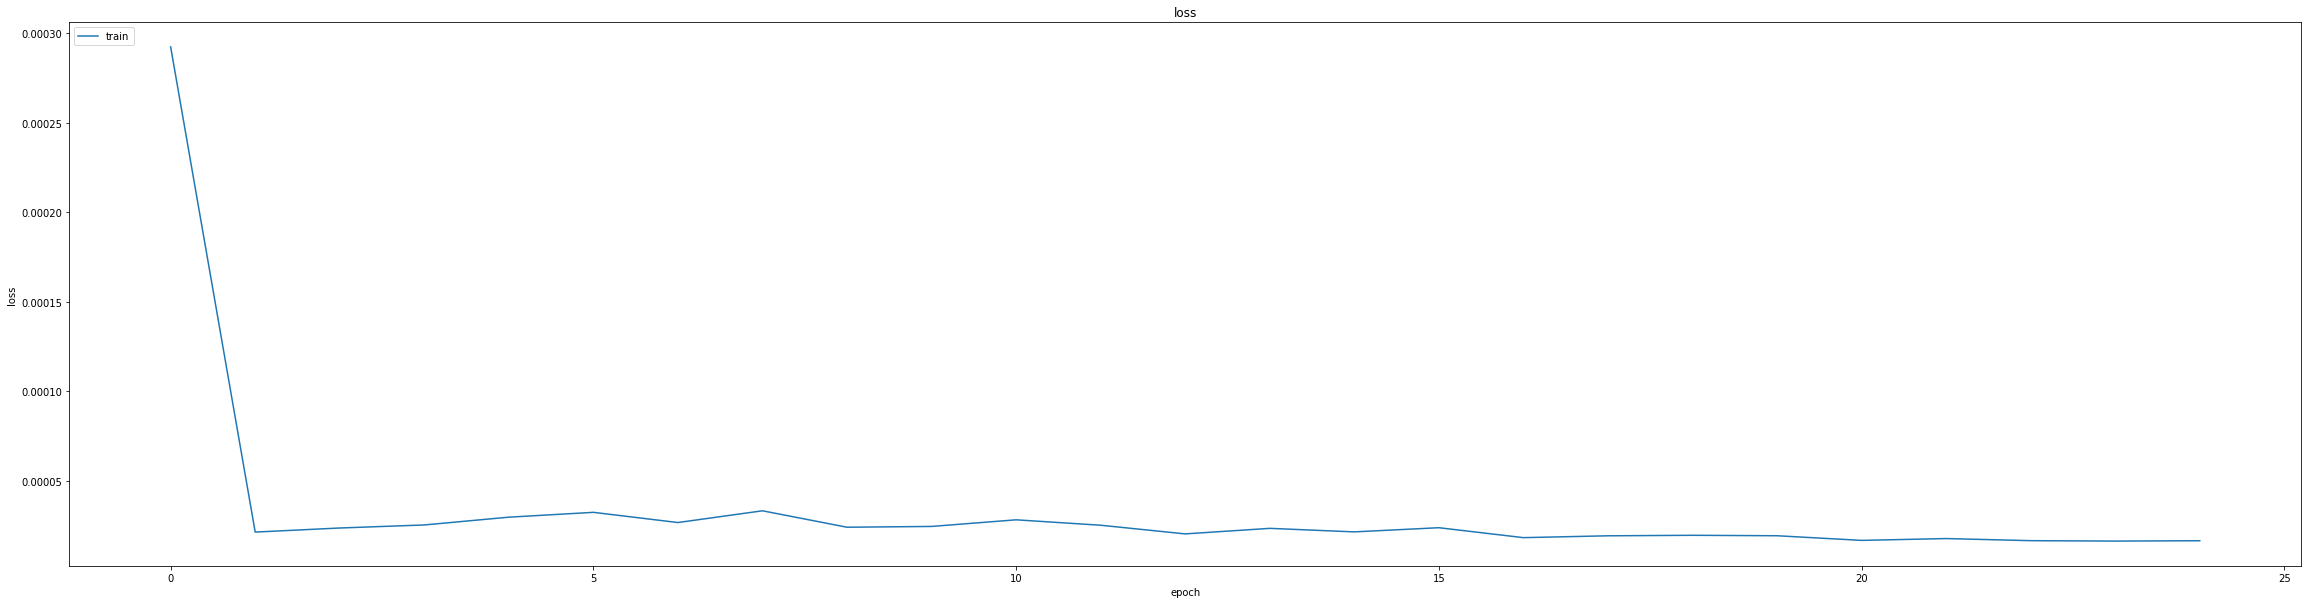

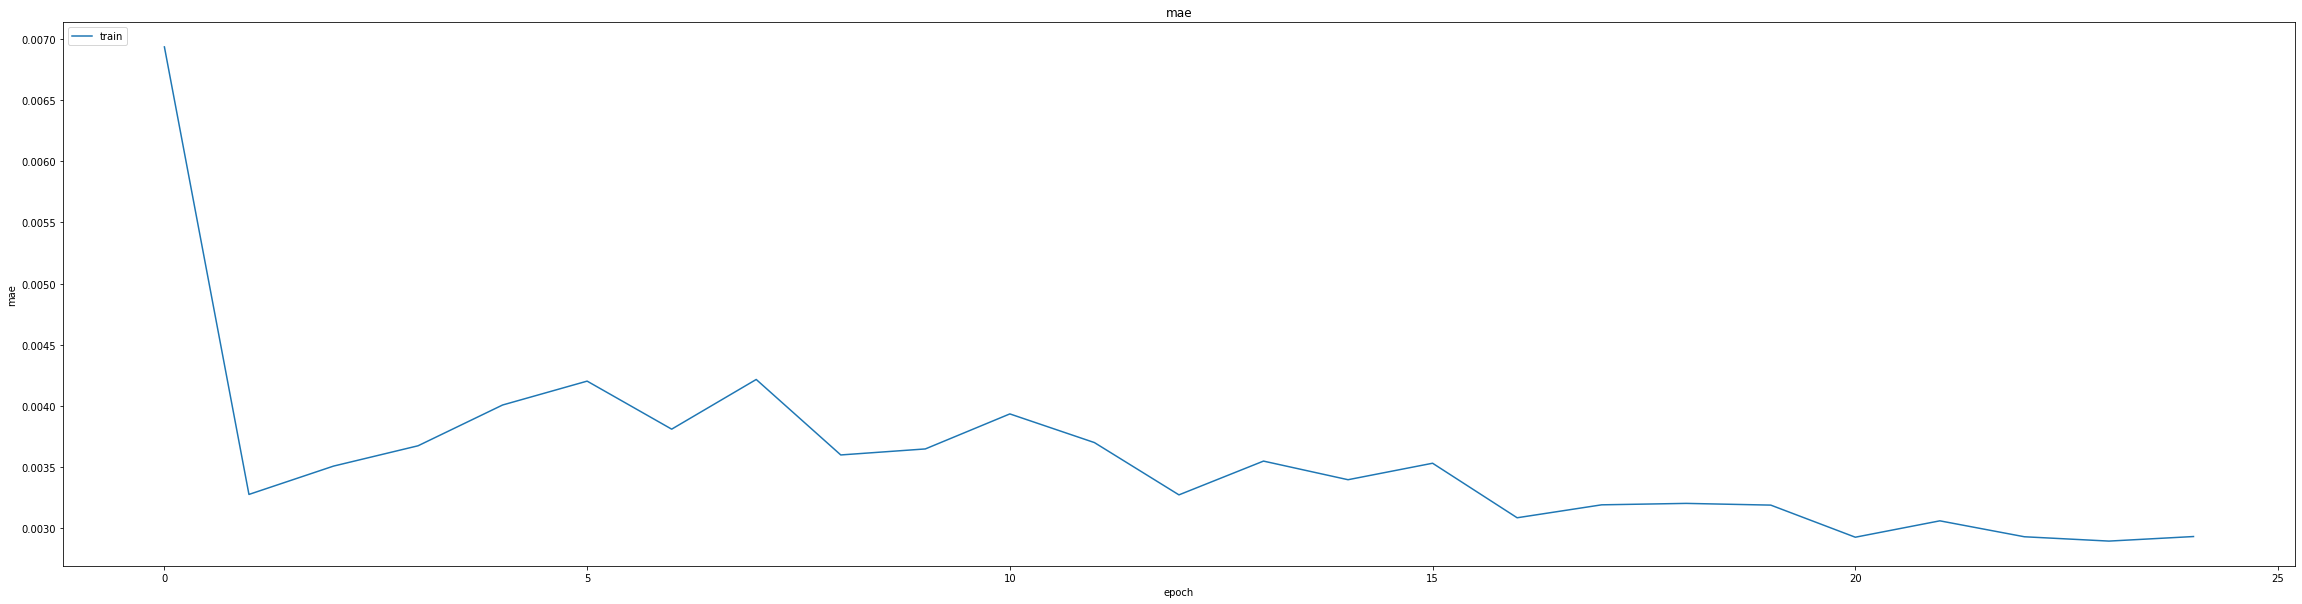

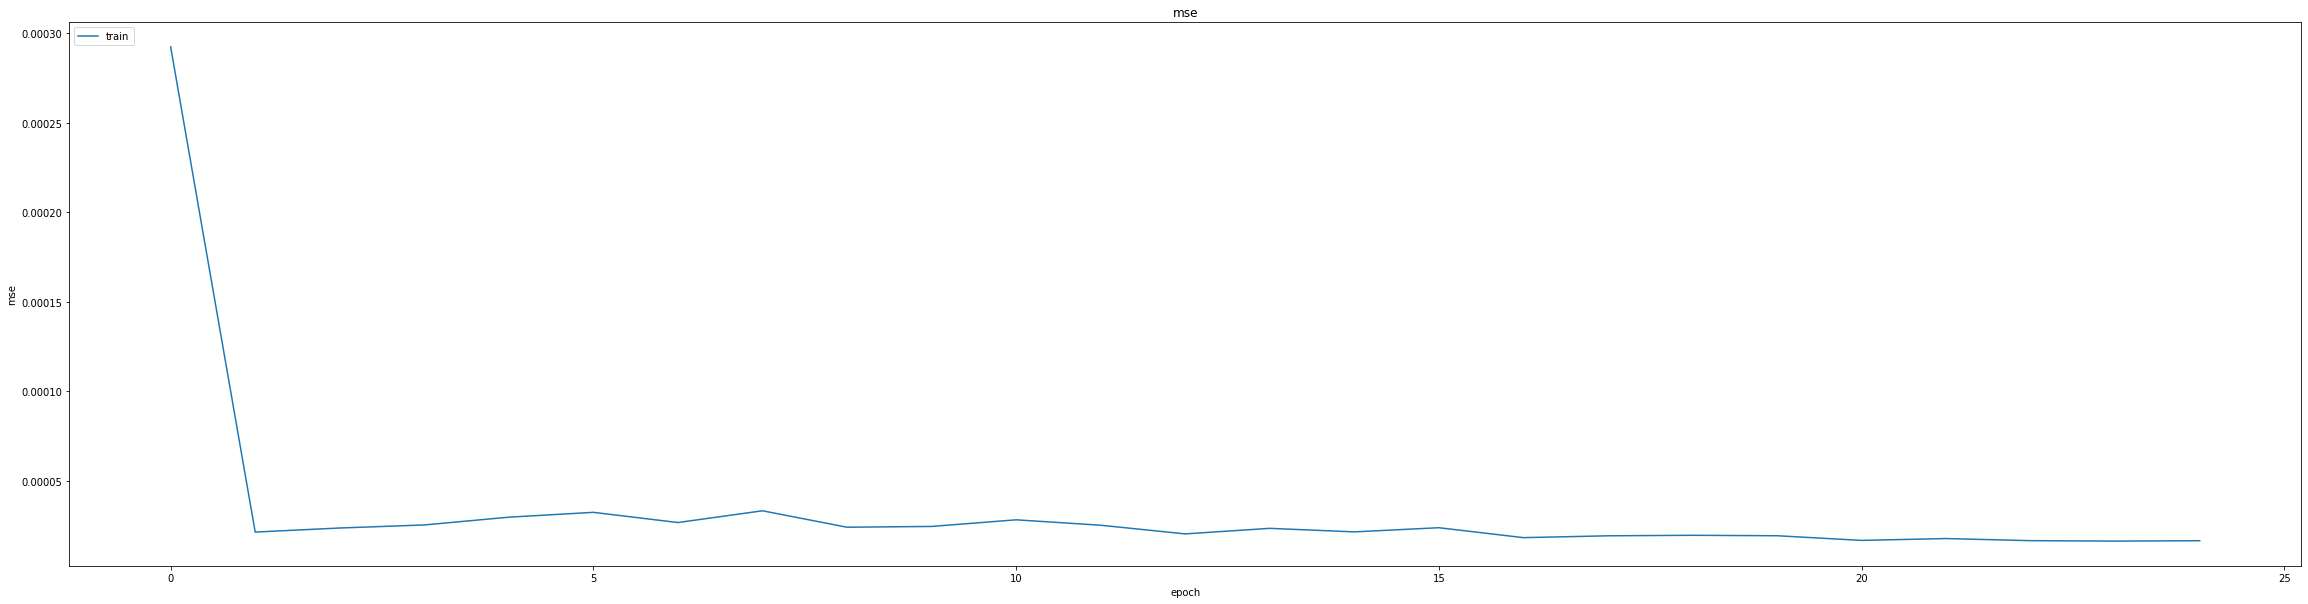

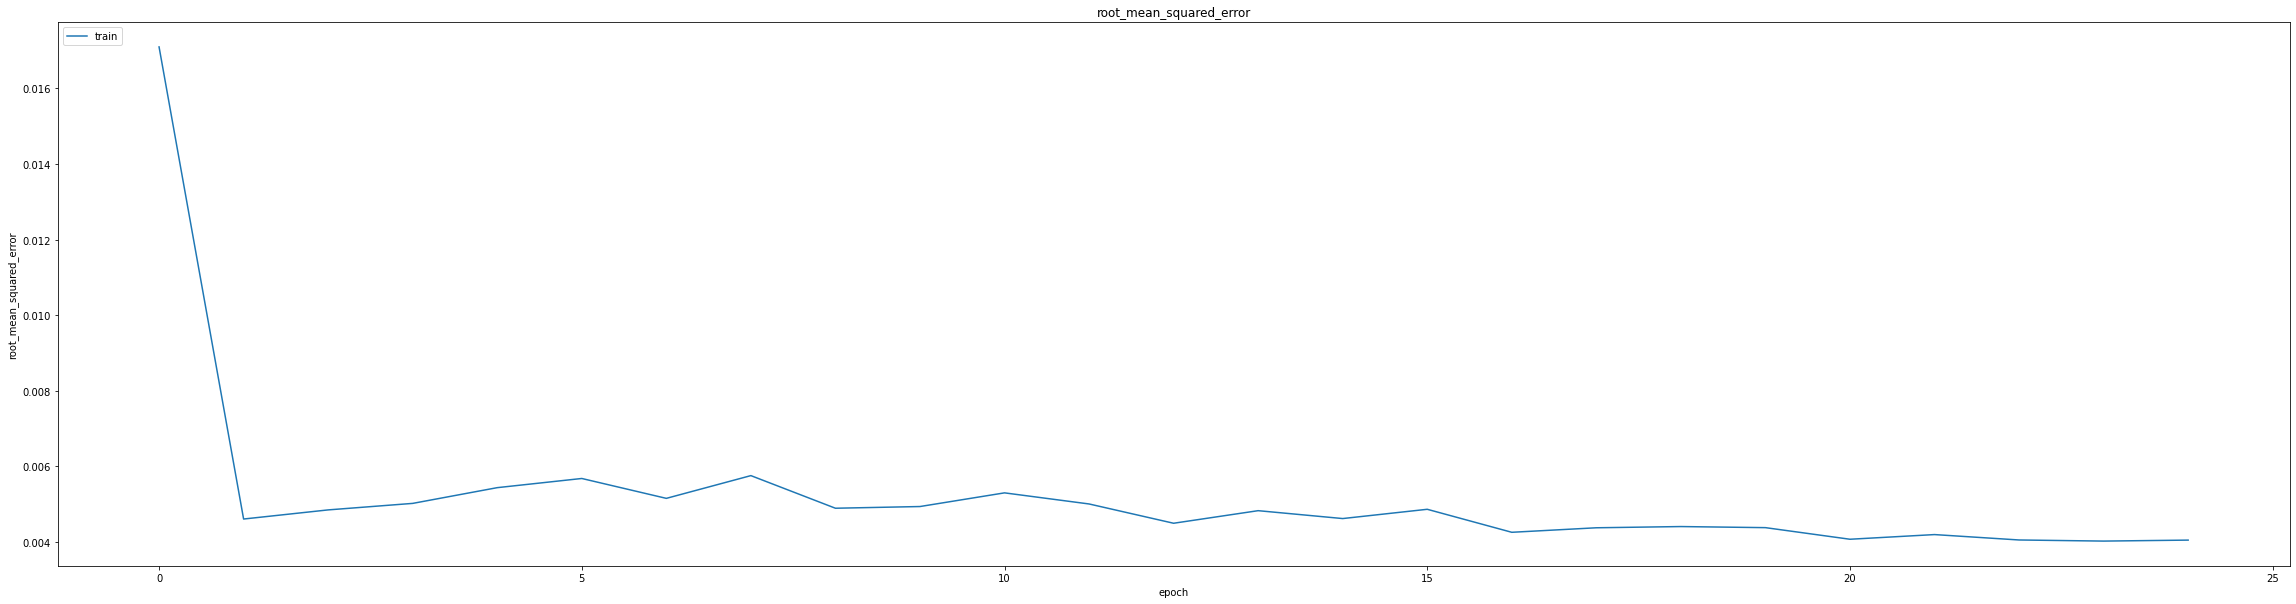

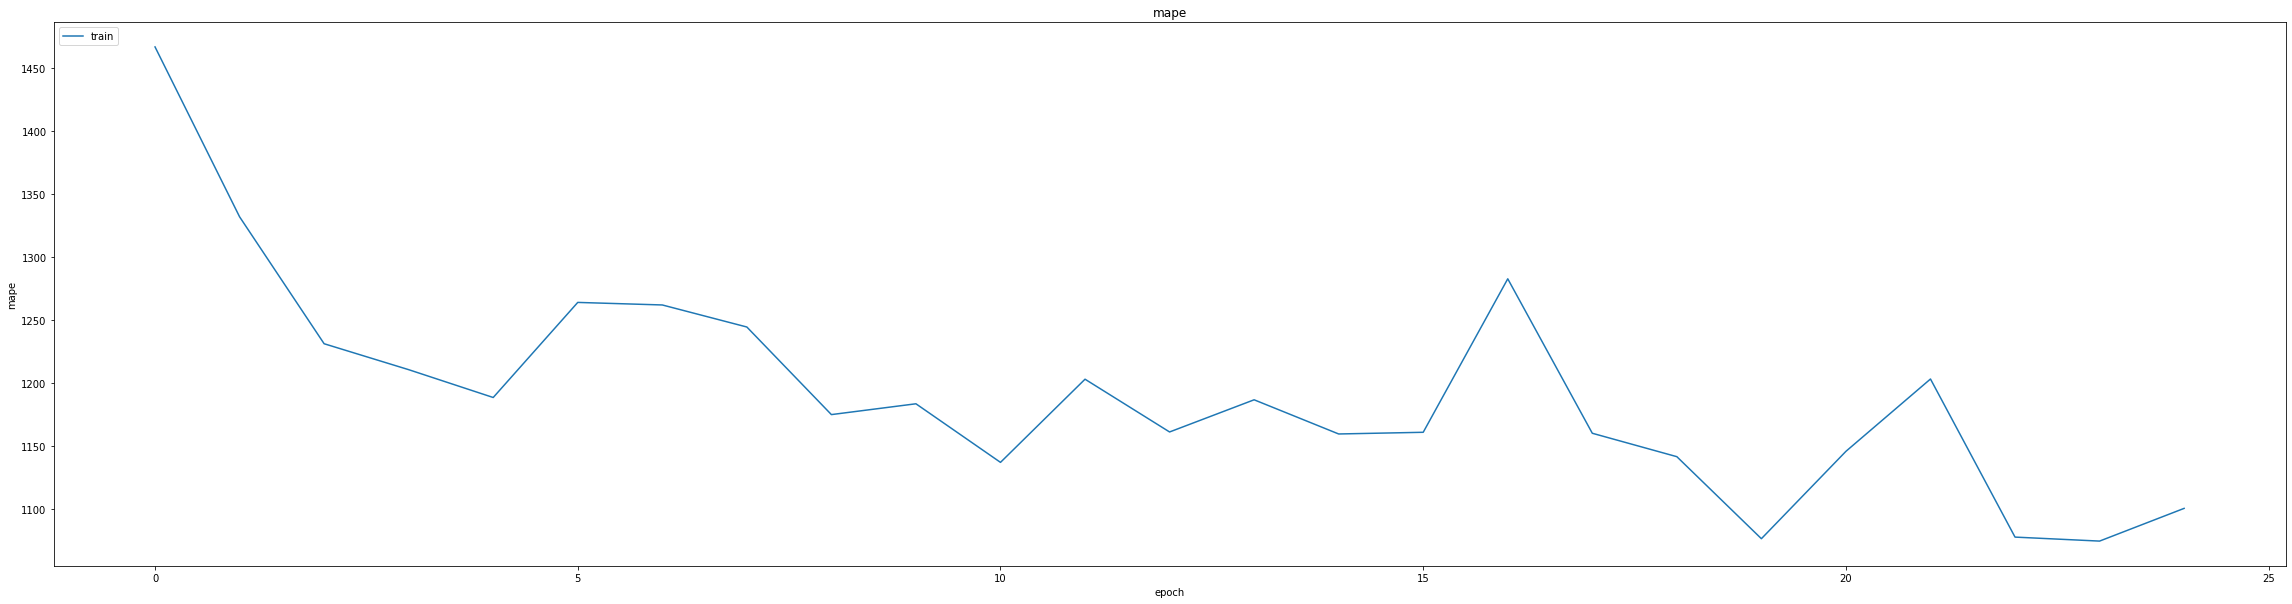

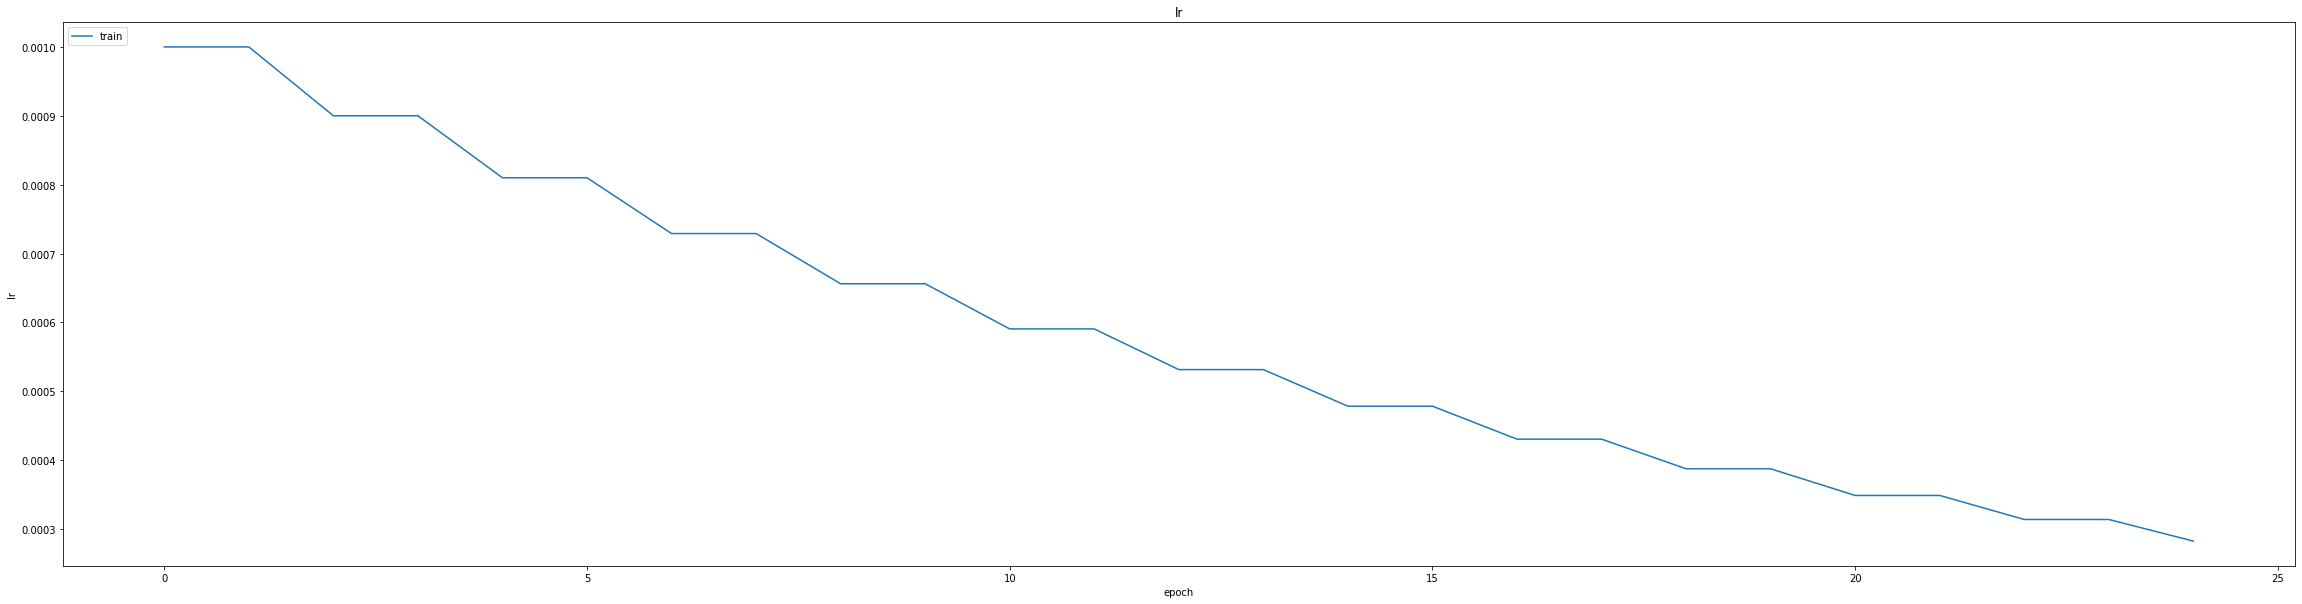

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015621582977473736
0.017736516892910004
348/348 [==============================] - 2s 3ms/step
0.9948583588953225


348/348 [==============================] - 1s 3ms/step


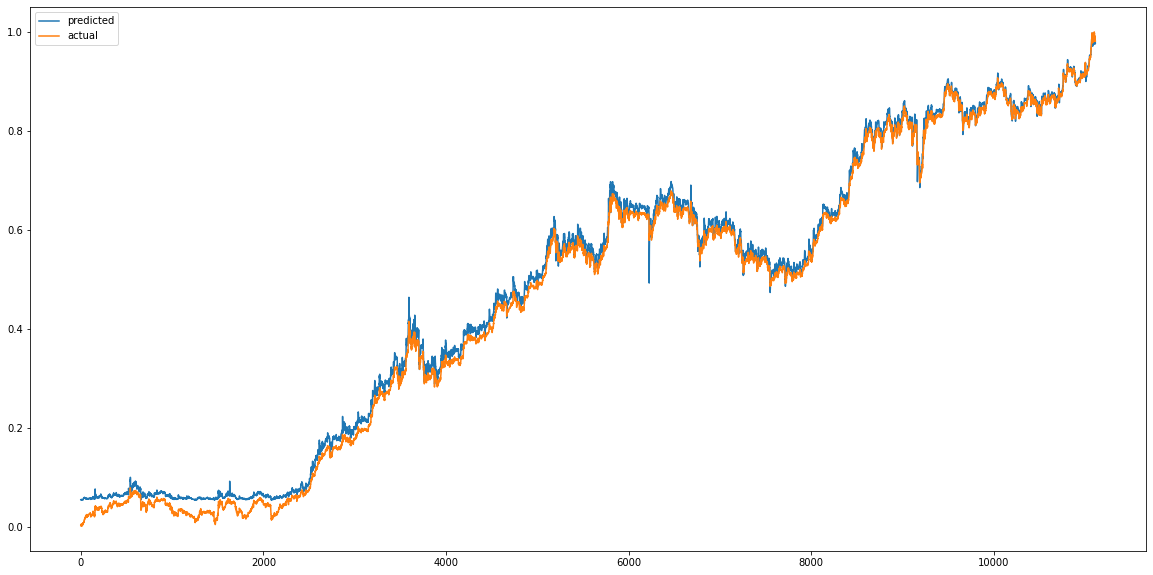

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


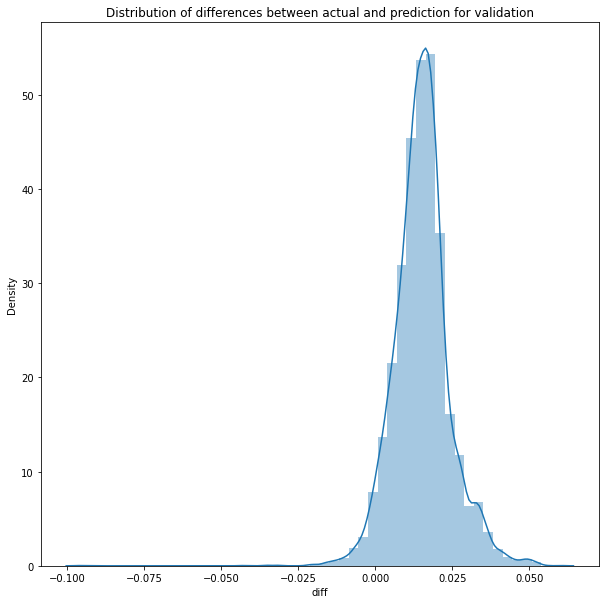

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


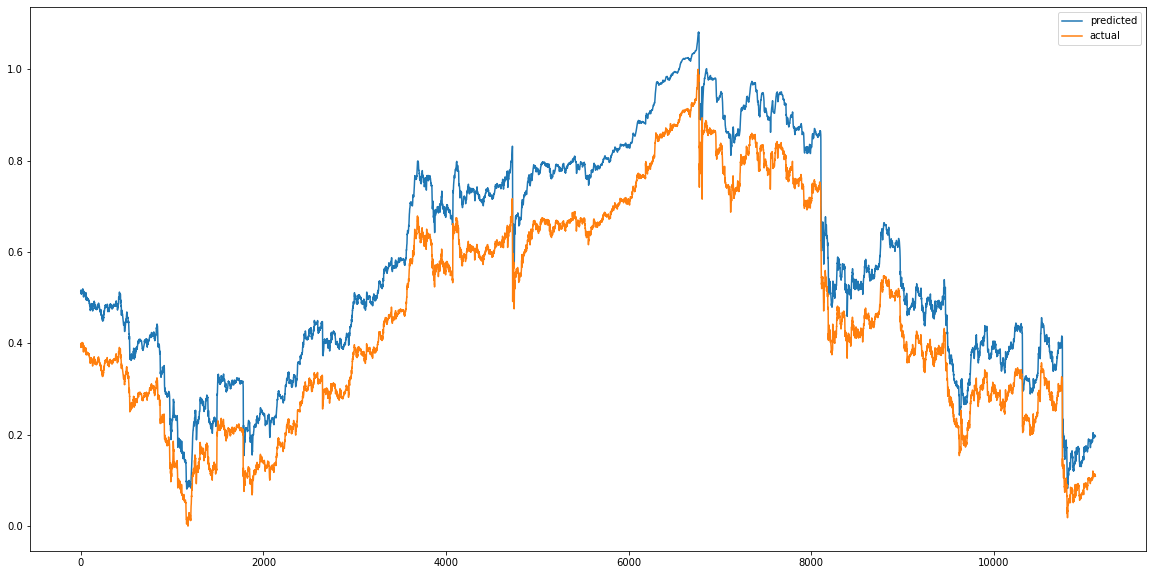

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


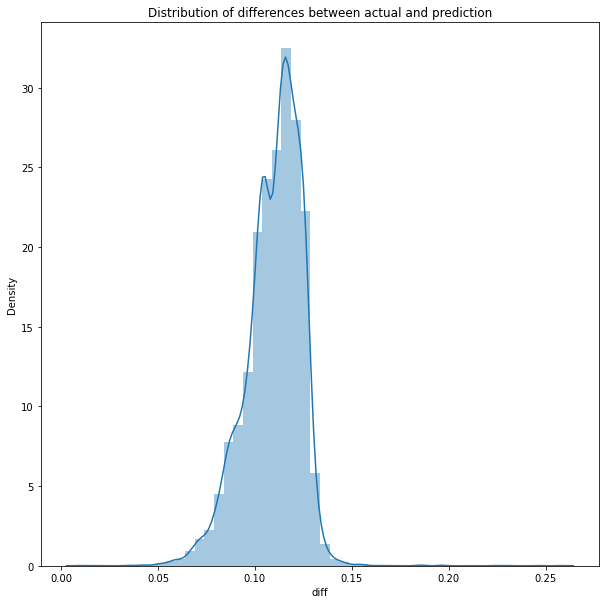

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.012252830883235801
RMSE :  0.1106925059940184
MAE :  0.10974807306299647
348/348 [==============================] - 1s 3ms/step
R2_Score  : 0.7810448584682935


count    11115.000000
mean         0.109748
std          0.014429
min          0.009393
25%          0.101750
50%          0.112176
75%          0.120061
max          0.257712
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
405/406 [============================>.] - ETA: 0s - loss: 575.7739 - mae: 6.1225 - mse: 575.7739 - root_mean_squared_error: 23.9953 - mape: 10912.7324
Epoch 1: val_mse improved from inf to 0.08901, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 65s 132ms/step - loss: 574.4775 - mae: 6.1091 - mse: 574.4775 - root_mean_squared_error: 23.9683 - mape: 10888.2705 - val_loss: 0.0890 - val_mae: 0.2601 - val_mse: 0.0890 - val_root_mean_squared_error: 0.2984 - val_mape: 329.3580
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 0.0472 - mae: 0.1767 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 8433.2295
Epoch 2: val_mse improved from 0.08901 to 0.08884, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 107ms/step - loss: 0.0472 - mae: 0.1767 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 8433.2295 - val_loss: 0.0888 - val_mae: 0.2604 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2981 - val_mape: 325.8196
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0469 - mae: 0.1762 - mse: 0.0469 - root_mean_squared_error: 0.2165 - mape: 9309.7275
Epoch 3: val_mse improved from 0.08884 to 0.08835, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0469 - mae: 0.1761 - mse: 0.0469 - root_mean_squared_error: 0.2165 - mape: 9288.8691 - val_loss: 0.0884 - val_mae: 0.2591 - val_mse: 0.0884 - val_root_mean_squared_error: 0.2972 - val_mape: 328.6598
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0466 - mae: 0.1757 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 8926.4951
Epoch 4: val_mse improved from 0.08835 to 0.08779, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0466 - mae: 0.1757 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 8926.4951 - val_loss: 0.0878 - val_mae: 0.2586 - val_mse: 0.0878 - val_root_mean_squared_error: 0.2963 - val_mape: 325.4934
Epoch 5/75
406/406 [==============================] - ETA: 0s - loss: 0.0462 - mae: 0.1749 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 10361.4307
Epoch 5: val_mse improved from 0.08779 to 0.08661, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0462 - mae: 0.1749 - mse: 0.0462 - root_mean_squared_error: 0.2149 - mape: 10361.4307 - val_loss: 0.0866 - val_mae: 0.2558 - val_mse: 0.0866 - val_root_mean_squared_error: 0.2943 - val_mape: 329.4304
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0454 - mae: 0.1733 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 8885.8613
Epoch 6: val_mse improved from 0.08661 to 0.08438, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0454 - mae: 0.1733 - mse: 0.0454 - root_mean_squared_error: 0.2131 - mape: 8822.4824 - val_loss: 0.0844 - val_mae: 0.2527 - val_mse: 0.0844 - val_root_mean_squared_error: 0.2905 - val_mape: 323.9086
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.0439 - mae: 0.1703 - mse: 0.0439 - root_mean_squared_error: 0.2095 - mape: 8968.4863
Epoch 7: val_mse improved from 0.08438 to 0.07732, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0439 - mae: 0.1703 - mse: 0.0439 - root_mean_squared_error: 0.2095 - mape: 8968.4863 - val_loss: 0.0773 - val_mae: 0.2430 - val_mse: 0.0773 - val_root_mean_squared_error: 0.2781 - val_mape: 302.8917
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1613 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 8611.6328
Epoch 8: val_mse improved from 0.07732 to 0.05690, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0394 - mae: 0.1613 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 8571.2471 - val_loss: 0.0569 - val_mae: 0.2035 - val_mse: 0.0569 - val_root_mean_squared_error: 0.2385 - val_mape: 273.5480
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 0.0278 - mae: 0.1338 - mse: 0.0278 - root_mean_squared_error: 0.1669 - mape: 4665.3809
Epoch 9: val_mse improved from 0.05690 to 0.01434, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0278 - mae: 0.1338 - mse: 0.0278 - root_mean_squared_error: 0.1668 - mape: 4654.9556 - val_loss: 0.0143 - val_mae: 0.0968 - val_mse: 0.0143 - val_root_mean_squared_error: 0.1198 - val_mape: 157.8056
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0178 - mae: 0.1061 - mse: 0.0178 - root_mean_squared_error: 0.1334 - mape: 4214.2153
Epoch 10: val_mse improved from 0.01434 to 0.01158, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0178 - mae: 0.1061 - mse: 0.0178 - root_mean_squared_error: 0.1333 - mape: 4194.4658 - val_loss: 0.0116 - val_mae: 0.0866 - val_mse: 0.0116 - val_root_mean_squared_error: 0.1076 - val_mape: 145.0082
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0126 - mae: 0.0899 - mse: 0.0126 - root_mean_squared_error: 0.1123 - mape: 4583.4756
Epoch 11: val_mse improved from 0.01158 to 0.01068, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0126 - mae: 0.0899 - mse: 0.0126 - root_mean_squared_error: 0.1123 - mape: 4583.4756 - val_loss: 0.0107 - val_mae: 0.0826 - val_mse: 0.0107 - val_root_mean_squared_error: 0.1034 - val_mape: 138.1027
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0093 - mae: 0.0774 - mse: 0.0093 - root_mean_squared_error: 0.0965 - mape: 4224.4092
Epoch 12: val_mse improved from 0.01068 to 0.00910, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0093 - mae: 0.0773 - mse: 0.0093 - root_mean_squared_error: 0.0965 - mape: 4204.5791 - val_loss: 0.0091 - val_mae: 0.0750 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0954 - val_mape: 133.6287
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 0.0070 - mae: 0.0670 - mse: 0.0070 - root_mean_squared_error: 0.0835 - mape: 3985.7334
Epoch 13: val_mse improved from 0.00910 to 0.00765, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0070 - mae: 0.0670 - mse: 0.0070 - root_mean_squared_error: 0.0835 - mape: 3967.0251 - val_loss: 0.0077 - val_mae: 0.0675 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0875 - val_mape: 125.0029
Epoch 14/75
404/406 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0609 - mse: 0.0058 - root_mean_squared_error: 0.0762 - mape: 4825.3003
Epoch 14: val_mse improved from 0.00765 to 0.00716, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0058 - mae: 0.0609 - mse: 0.0058 - root_mean_squared_error: 0.0762 - mape: 4802.6147 - val_loss: 0.0072 - val_mae: 0.0641 - val_mse: 0.0072 - val_root_mean_squared_error: 0.0846 - val_mape: 121.6324
Epoch 15/75
404/406 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0558 - mse: 0.0049 - root_mean_squared_error: 0.0699 - mape: 3283.1582
Epoch 15: val_mse improved from 0.00716 to 0.00633, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 0.0049 - mae: 0.0557 - mse: 0.0049 - root_mean_squared_error: 0.0699 - mape: 3267.7532 - val_loss: 0.0063 - val_mae: 0.0588 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0796 - val_mape: 115.8584
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0041 - mae: 0.0513 - mse: 0.0041 - root_mean_squared_error: 0.0644 - mape: 3313.1899
Epoch 16: val_mse improved from 0.00633 to 0.00564, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0041 - mae: 0.0513 - mse: 0.0041 - root_mean_squared_error: 0.0644 - mape: 3313.1899 - val_loss: 0.0056 - val_mae: 0.0535 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0751 - val_mape: 110.3667
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0470 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 3723.6965
Epoch 17: val_mse improved from 0.00564 to 0.00515, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0035 - mae: 0.0470 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 3723.6965 - val_loss: 0.0052 - val_mae: 0.0494 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0718 - val_mape: 106.2140
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0441 - mse: 0.0031 - root_mean_squared_error: 0.0557 - mape: 3001.5725
Epoch 18: val_mse improved from 0.00515 to 0.00506, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0031 - mae: 0.0441 - mse: 0.0031 - root_mean_squared_error: 0.0557 - mape: 2994.8362 - val_loss: 0.0051 - val_mae: 0.0476 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0711 - val_mape: 106.8689
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0417 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 3078.6575
Epoch 19: val_mse did not improve from 0.00506
406/406 [==============================] - 8s 19ms/step - loss: 0.0028 - mae: 0.0417 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 3064.1890 - val_loss: 0.0052 - val_mae: 0.0545 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0724 - val_mape: 104.3859
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0398 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 3581.7031
Epoch 20: val_mse improved from 0.00506 to 0.00458, saving model to /content/drive/MyDrive/modelweights/J

406/406 [==============================] - 41s 100ms/step - loss: 0.0025 - mae: 0.0398 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 3573.6680 - val_loss: 0.0046 - val_mae: 0.0431 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0676 - val_mape: 102.8460
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0375 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 3109.2708
Epoch 21: val_mse improved from 0.00458 to 0.00424, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0023 - mae: 0.0375 - mse: 0.0023 - root_mean_squared_error: 0.0477 - mape: 3094.6501 - val_loss: 0.0042 - val_mae: 0.0427 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mape: 97.8765
Epoch 22/75
405/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0358 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 3371.1809
Epoch 22: val_mse improved from 0.00424 to 0.00404, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0021 - mae: 0.0358 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 3363.6130 - val_loss: 0.0040 - val_mae: 0.0435 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0636 - val_mape: 94.5918
Epoch 23/75
404/406 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0339 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 2886.4631
Epoch 23: val_mse improved from 0.00404 to 0.00356, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0019 - mae: 0.0339 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 2872.8879 - val_loss: 0.0036 - val_mae: 0.0390 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0597 - val_mape: 90.1055
Epoch 24/75
404/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0321 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 2928.6318
Epoch 24: val_mse improved from 0.00356 to 0.00315, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0017 - mae: 0.0321 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 2914.8560 - val_loss: 0.0031 - val_mae: 0.0366 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0561 - val_mape: 84.7703
Epoch 25/75
406/406 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 3103.9927
Epoch 25: val_mse did not improve from 0.00315
406/406 [==============================] - 8s 19ms/step - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - root_mean_squared_error: 0.0394 - mape: 3103.9927 - val_loss: 0.0033 - val_mae: 0.0421 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0578 - val_mape: 85.1926
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 3082.1350
Epoch 26: val_mse improved from 0.00315 to 0.00297, saving model to /content/drive/MyDrive/modelweights/JPY

406/406 [==============================] - 42s 104ms/step - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 3067.6357 - val_loss: 0.0030 - val_mae: 0.0381 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0545 - val_mape: 82.0968
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2503.7192
Epoch 27: val_mse improved from 0.00297 to 0.00286, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2503.7192 - val_loss: 0.0029 - val_mae: 0.0363 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 80.1292
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 2939.4929
Epoch 28: val_mse improved from 0.00286 to 0.00282, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 2939.4929 - val_loss: 0.0028 - val_mae: 0.0364 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0531 - val_mape: 79.6900
Epoch 29/75
406/406 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 2554.0115
Epoch 29: val_mse improved from 0.00282 to 0.00243, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 106ms/step - loss: 0.0010 - mae: 0.0251 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 2554.0115 - val_loss: 0.0024 - val_mae: 0.0319 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mape: 75.4506
Epoch 30/75
405/406 [============================>.] - ETA: 0s - loss: 9.5377e-04 - mae: 0.0240 - mse: 9.5377e-04 - root_mean_squared_error: 0.0309 - mape: 2574.0256
Epoch 30: val_mse improved from 0.00243 to 0.00240, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 9.5402e-04 - mae: 0.0240 - mse: 9.5402e-04 - root_mean_squared_error: 0.0309 - mape: 2568.2451 - val_loss: 0.0024 - val_mae: 0.0320 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0490 - val_mape: 74.8974
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 8.3114e-04 - mae: 0.0224 - mse: 8.3114e-04 - root_mean_squared_error: 0.0288 - mape: 2583.3606
Epoch 31: val_mse improved from 0.00240 to 0.00219, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 8.3114e-04 - mae: 0.0224 - mse: 8.3114e-04 - root_mean_squared_error: 0.0288 - mape: 2583.3606 - val_loss: 0.0022 - val_mae: 0.0303 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0468 - val_mape: 72.1312
Epoch 32/75
405/406 [============================>.] - ETA: 0s - loss: 7.4742e-04 - mae: 0.0213 - mse: 7.4742e-04 - root_mean_squared_error: 0.0273 - mape: 2480.1140
Epoch 32: val_mse did not improve from 0.00219
406/406 [==============================] - 8s 19ms/step - loss: 7.4761e-04 - mae: 0.0213 - mse: 7.4761e-04 - root_mean_squared_error: 0.0273 - mape: 2474.5461 - val_loss: 0.0024 - val_mae: 0.0343 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 72.8414
Epoch 33/75
405/406 [============================>.] - ETA: 0s - loss: 6.7253e-04 - mae: 0.0201 - mse: 6.7253e-04 - root_mean_squared_error: 0.0259 - mape: 2686.2393
Epoch 33: val_mse improved from 0.00219 to 0.00203, saving model to /conten

406/406 [==============================] - 42s 105ms/step - loss: 6.7208e-04 - mae: 0.0201 - mse: 6.7208e-04 - root_mean_squared_error: 0.0259 - mape: 2680.2004 - val_loss: 0.0020 - val_mae: 0.0294 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0451 - val_mape: 69.7416
Epoch 34/75
405/406 [============================>.] - ETA: 0s - loss: 5.9245e-04 - mae: 0.0189 - mse: 5.9245e-04 - root_mean_squared_error: 0.0243 - mape: 2587.4058
Epoch 34: val_mse improved from 0.00203 to 0.00194, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 5.9213e-04 - mae: 0.0189 - mse: 5.9213e-04 - root_mean_squared_error: 0.0243 - mape: 2581.5894 - val_loss: 0.0019 - val_mae: 0.0281 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0441 - val_mape: 68.0322
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 5.2162e-04 - mae: 0.0177 - mse: 5.2162e-04 - root_mean_squared_error: 0.0228 - mape: 2380.9180
Epoch 35: val_mse improved from 0.00194 to 0.00188, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 102ms/step - loss: 5.2148e-04 - mae: 0.0177 - mse: 5.2148e-04 - root_mean_squared_error: 0.0228 - mape: 2369.7112 - val_loss: 0.0019 - val_mae: 0.0276 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 67.2907
Epoch 36/75
405/406 [============================>.] - ETA: 0s - loss: 4.3991e-04 - mae: 0.0162 - mse: 4.3991e-04 - root_mean_squared_error: 0.0210 - mape: 2845.6772
Epoch 36: val_mse improved from 0.00188 to 0.00179, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 107ms/step - loss: 4.3971e-04 - mae: 0.0162 - mse: 4.3971e-04 - root_mean_squared_error: 0.0210 - mape: 2839.2761 - val_loss: 0.0018 - val_mae: 0.0276 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0424 - val_mape: 65.2288
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 4.3314e-04 - mae: 0.0161 - mse: 4.3314e-04 - root_mean_squared_error: 0.0208 - mape: 2602.2341
Epoch 37: val_mse did not improve from 0.00179
406/406 [==============================] - 8s 20ms/step - loss: 4.3368e-04 - mae: 0.0161 - mse: 4.3368e-04 - root_mean_squared_error: 0.0208 - mape: 2589.9836 - val_loss: 0.0019 - val_mae: 0.0321 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0435 - val_mape: 65.5916
Epoch 38/75
406/406 [==============================] - ETA: 0s - loss: 3.6487e-04 - mae: 0.0148 - mse: 3.6487e-04 - root_mean_squared_error: 0.0191 - mape: 2250.9626
Epoch 38: val_mse improved from 0.00179 to 0.00167, saving model to /conten

406/406 [==============================] - 42s 104ms/step - loss: 3.6487e-04 - mae: 0.0148 - mse: 3.6487e-04 - root_mean_squared_error: 0.0191 - mape: 2250.9626 - val_loss: 0.0017 - val_mae: 0.0284 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 62.9273
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 3.3880e-04 - mae: 0.0142 - mse: 3.3880e-04 - root_mean_squared_error: 0.0184 - mape: 2370.3613
Epoch 39: val_mse did not improve from 0.00167
406/406 [==============================] - 8s 20ms/step - loss: 3.3919e-04 - mae: 0.0142 - mse: 3.3919e-04 - root_mean_squared_error: 0.0184 - mape: 2365.0320 - val_loss: 0.0017 - val_mae: 0.0296 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0413 - val_mape: 61.1787
Epoch 40/75
406/406 [==============================] - ETA: 0s - loss: 3.2274e-04 - mae: 0.0139 - mse: 3.2274e-04 - root_mean_squared_error: 0.0180 - mape: 2189.6787
Epoch 40: val_mse improved from 0.00167 to 0.00141, saving model to /conten

406/406 [==============================] - 42s 104ms/step - loss: 3.2274e-04 - mae: 0.0139 - mse: 3.2274e-04 - root_mean_squared_error: 0.0180 - mape: 2189.6787 - val_loss: 0.0014 - val_mae: 0.0253 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 58.3011
Epoch 41/75
404/406 [============================>.] - ETA: 0s - loss: 2.9325e-04 - mae: 0.0132 - mse: 2.9325e-04 - root_mean_squared_error: 0.0171 - mape: 2421.0620
Epoch 41: val_mse improved from 0.00141 to 0.00133, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 104ms/step - loss: 2.9443e-04 - mae: 0.0132 - mse: 2.9443e-04 - root_mean_squared_error: 0.0172 - mape: 2409.6665 - val_loss: 0.0013 - val_mae: 0.0241 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 57.3021
Epoch 42/75
404/406 [============================>.] - ETA: 0s - loss: 2.6881e-04 - mae: 0.0126 - mse: 2.6881e-04 - root_mean_squared_error: 0.0164 - mape: 2185.3308
Epoch 42: val_mse did not improve from 0.00133
406/406 [==============================] - 8s 20ms/step - loss: 2.6851e-04 - mae: 0.0126 - mse: 2.6851e-04 - root_mean_squared_error: 0.0164 - mape: 2175.0388 - val_loss: 0.0014 - val_mae: 0.0264 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 56.9961
Epoch 43/75
405/406 [============================>.] - ETA: 0s - loss: 2.2249e-04 - mae: 0.0114 - mse: 2.2249e-04 - root_mean_squared_error: 0.0149 - mape: 2247.9399
Epoch 43: val_mse improved from 0.00133 to 0.00120, saving model to /conten

406/406 [==============================] - 42s 103ms/step - loss: 2.2242e-04 - mae: 0.0114 - mse: 2.2242e-04 - root_mean_squared_error: 0.0149 - mape: 2242.8848 - val_loss: 0.0012 - val_mae: 0.0222 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 54.9207
Epoch 44/75
405/406 [============================>.] - ETA: 0s - loss: 2.3035e-04 - mae: 0.0116 - mse: 2.3035e-04 - root_mean_squared_error: 0.0152 - mape: 2139.5886
Epoch 44: val_mse did not improve from 0.00120
406/406 [==============================] - 8s 19ms/step - loss: 2.3060e-04 - mae: 0.0116 - mse: 2.3060e-04 - root_mean_squared_error: 0.0152 - mape: 2134.7786 - val_loss: 0.0015 - val_mae: 0.0290 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0383 - val_mape: 55.0884
Epoch 45/75
405/406 [============================>.] - ETA: 0s - loss: 1.9701e-04 - mae: 0.0107 - mse: 1.9701e-04 - root_mean_squared_error: 0.0140 - mape: 2130.2427
Epoch 45: val_mse improved from 0.00120 to 0.00115, saving model to /conten

406/406 [==============================] - 41s 101ms/step - loss: 1.9694e-04 - mae: 0.0107 - mse: 1.9694e-04 - root_mean_squared_error: 0.0140 - mape: 2125.4519 - val_loss: 0.0011 - val_mae: 0.0223 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 53.1876
Epoch 46/75
404/406 [============================>.] - ETA: 0s - loss: 2.4924e-04 - mae: 0.0114 - mse: 2.4924e-04 - root_mean_squared_error: 0.0158 - mape: 2139.0574
Epoch 46: val_mse did not improve from 0.00115
406/406 [==============================] - 8s 19ms/step - loss: 2.5016e-04 - mae: 0.0114 - mse: 2.5016e-04 - root_mean_squared_error: 0.0158 - mape: 2128.9885 - val_loss: 0.0013 - val_mae: 0.0286 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 52.4911
Epoch 47/75
406/406 [==============================] - ETA: 0s - loss: 1.5957e-04 - mae: 0.0097 - mse: 1.5957e-04 - root_mean_squared_error: 0.0126 - mape: 2129.9150
Epoch 47: val_mse did not improve from 0.00115
406/406 [===================

406/406 [==============================] - 41s 101ms/step - loss: 1.6138e-04 - mae: 0.0097 - mse: 1.6138e-04 - root_mean_squared_error: 0.0127 - mape: 2011.4940 - val_loss: 9.5160e-04 - val_mae: 0.0192 - val_mse: 9.5160e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 50.0066
Epoch 49/75
406/406 [==============================] - ETA: 0s - loss: 1.8642e-04 - mae: 0.0099 - mse: 1.8642e-04 - root_mean_squared_error: 0.0137 - mape: 1945.7897
Epoch 49: val_mse did not improve from 0.00095
406/406 [==============================] - 8s 20ms/step - loss: 1.8642e-04 - mae: 0.0099 - mse: 1.8642e-04 - root_mean_squared_error: 0.0137 - mape: 1945.7897 - val_loss: 9.6964e-04 - val_mae: 0.0194 - val_mse: 9.6964e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 50.3011
Epoch 50/75
405/406 [============================>.] - ETA: 0s - loss: 1.2111e-04 - mae: 0.0084 - mse: 1.2111e-04 - root_mean_squared_error: 0.0110 - mape: 1883.2085
Epoch 50: val_mse did not improve from 0.00095
406/406 [===

406/406 [==============================] - 42s 103ms/step - loss: 1.2303e-04 - mae: 0.0085 - mse: 1.2303e-04 - root_mean_squared_error: 0.0111 - mape: 1773.1869 - val_loss: 8.9268e-04 - val_mae: 0.0194 - val_mse: 8.9268e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 48.5327
Epoch 52/75
406/406 [==============================] - ETA: 0s - loss: 1.2396e-04 - mae: 0.0085 - mse: 1.2396e-04 - root_mean_squared_error: 0.0111 - mape: 1956.7251
Epoch 52: val_mse did not improve from 0.00089
406/406 [==============================] - 8s 20ms/step - loss: 1.2396e-04 - mae: 0.0085 - mse: 1.2396e-04 - root_mean_squared_error: 0.0111 - mape: 1956.7251 - val_loss: 9.6322e-04 - val_mae: 0.0241 - val_mse: 9.6322e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 48.3092
Epoch 53/75
406/406 [==============================] - ETA: 0s - loss: 1.2835e-04 - mae: 0.0086 - mse: 1.2835e-04 - root_mean_squared_error: 0.0113 - mape: 1838.1448
Epoch 53: val_mse improved from 0.00089 to 0.00086, saving 

406/406 [==============================] - 42s 103ms/step - loss: 1.2835e-04 - mae: 0.0086 - mse: 1.2835e-04 - root_mean_squared_error: 0.0113 - mape: 1838.1448 - val_loss: 8.5506e-04 - val_mae: 0.0218 - val_mse: 8.5506e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 46.2595
Epoch 54/75
404/406 [============================>.] - ETA: 0s - loss: 1.2715e-04 - mae: 0.0086 - mse: 1.2715e-04 - root_mean_squared_error: 0.0113 - mape: 1767.3057
Epoch 54: val_mse improved from 0.00086 to 0.00080, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 1.2702e-04 - mae: 0.0086 - mse: 1.2702e-04 - root_mean_squared_error: 0.0113 - mape: 1758.9827 - val_loss: 7.9939e-04 - val_mae: 0.0177 - val_mse: 7.9939e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 46.4127
Epoch 55/75
405/406 [============================>.] - ETA: 0s - loss: 1.6357e-04 - mae: 0.0092 - mse: 1.6357e-04 - root_mean_squared_error: 0.0128 - mape: 1871.5497
Epoch 55: val_mse improved from 0.00080 to 0.00073, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 1.6340e-04 - mae: 0.0092 - mse: 1.6340e-04 - root_mean_squared_error: 0.0128 - mape: 1867.3389 - val_loss: 7.3060e-04 - val_mae: 0.0177 - val_mse: 7.3060e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 43.8413
Epoch 56/75
405/406 [============================>.] - ETA: 0s - loss: 8.6323e-05 - mae: 0.0071 - mse: 8.6323e-05 - root_mean_squared_error: 0.0093 - mape: 1815.2208
Epoch 56: val_mse improved from 0.00073 to 0.00070, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 8.6250e-05 - mae: 0.0071 - mse: 8.6250e-05 - root_mean_squared_error: 0.0093 - mape: 1811.1366 - val_loss: 6.9591e-04 - val_mae: 0.0175 - val_mse: 6.9591e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 42.8291
Epoch 57/75
404/406 [============================>.] - ETA: 0s - loss: 1.6001e-04 - mae: 0.0086 - mse: 1.6001e-04 - root_mean_squared_error: 0.0126 - mape: 1771.0630
Epoch 57: val_mse did not improve from 0.00070
406/406 [==============================] - 8s 19ms/step - loss: 1.5965e-04 - mae: 0.0086 - mse: 1.5965e-04 - root_mean_squared_error: 0.0126 - mape: 1762.7195 - val_loss: 9.0832e-04 - val_mae: 0.0249 - val_mse: 9.0832e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 45.2845
Epoch 58/75
406/406 [==============================] - ETA: 0s - loss: 1.2265e-04 - mae: 0.0084 - mse: 1.2265e-04 - root_mean_squared_error: 0.0111 - mape: 1740.2220
Epoch 58: val_mse did not improve from 0.00070
406/406 [===

406/406 [==============================] - 41s 101ms/step - loss: 7.9101e-05 - mae: 0.0068 - mse: 7.9101e-05 - root_mean_squared_error: 0.0089 - mape: 1735.5276 - val_loss: 5.5355e-04 - val_mae: 0.0145 - val_mse: 5.5355e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 38.8160
Epoch 61/75
404/406 [============================>.] - ETA: 0s - loss: 1.8996e-04 - mae: 0.0087 - mse: 1.8996e-04 - root_mean_squared_error: 0.0138 - mape: 1631.1146
Epoch 61: val_mse did not improve from 0.00055
406/406 [==============================] - 8s 19ms/step - loss: 1.8936e-04 - mae: 0.0087 - mse: 1.8936e-04 - root_mean_squared_error: 0.0138 - mape: 1623.4310 - val_loss: 9.4161e-04 - val_mae: 0.0196 - val_mse: 9.4161e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 50.0815
Epoch 62/75
406/406 [==============================] - ETA: 0s - loss: 4.7902e-05 - mae: 0.0052 - mse: 4.7902e-05 - root_mean_squared_error: 0.0069 - mape: 1660.0475
Epoch 62: val_mse did not improve from 0.00055
406/406 [===

406/406 [==============================] - 41s 100ms/step - loss: 7.0687e-05 - mae: 0.0063 - mse: 7.0687e-05 - root_mean_squared_error: 0.0084 - mape: 1603.9753 - val_loss: 5.5301e-04 - val_mae: 0.0170 - val_mse: 5.5301e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 37.6462
Epoch 70/75
404/406 [============================>.] - ETA: 0s - loss: 5.4063e-05 - mae: 0.0056 - mse: 5.4063e-05 - root_mean_squared_error: 0.0074 - mape: 1561.8566
Epoch 70: val_mse improved from 0.00055 to 0.00050, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 5.3963e-05 - mae: 0.0056 - mse: 5.3963e-05 - root_mean_squared_error: 0.0073 - mape: 1554.4974 - val_loss: 5.0414e-04 - val_mae: 0.0151 - val_mse: 5.0414e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 36.5254
Epoch 71/75
405/406 [============================>.] - ETA: 0s - loss: 1.0158e-04 - mae: 0.0071 - mse: 1.0158e-04 - root_mean_squared_error: 0.0101 - mape: 1538.2043
Epoch 71: val_mse did not improve from 0.00050
406/406 [==============================] - 8s 19ms/step - loss: 1.0148e-04 - mae: 0.0071 - mse: 1.0148e-04 - root_mean_squared_error: 0.0101 - mape: 1534.7440 - val_loss: 0.0012 - val_mae: 0.0199 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 54.3913
Epoch 72/75
403/406 [============================>.] - ETA: 0s - loss: 3.7003e-05 - mae: 0.0046 - mse: 3.7003e-05 - root_mean_squared_error: 0.0061 - mape: 1684.5403
Epoch 72: val_mse did not improve from 0.00050
406/406 [===========

406/406 [==============================] - 42s 104ms/step - loss: 5.3471e-05 - mae: 0.0055 - mse: 5.3471e-05 - root_mean_squared_error: 0.0073 - mape: 1564.3655 - val_loss: 4.8330e-04 - val_mae: 0.0159 - val_mse: 4.8330e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 35.2524
Epoch 75/75
404/406 [============================>.] - ETA: 0s - loss: 5.2109e-05 - mae: 0.0054 - mse: 5.2109e-05 - root_mean_squared_error: 0.0072 - mape: 1578.2655
Epoch 75: val_mse did not improve from 0.00048
406/406 [==============================] - 8s 19ms/step - loss: 5.1999e-05 - mae: 0.0054 - mse: 5.1999e-05 - root_mean_squared_error: 0.0072 - mape: 1570.8280 - val_loss: 5.5474e-04 - val_mae: 0.0183 - val_mse: 5.5474e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 36.7373


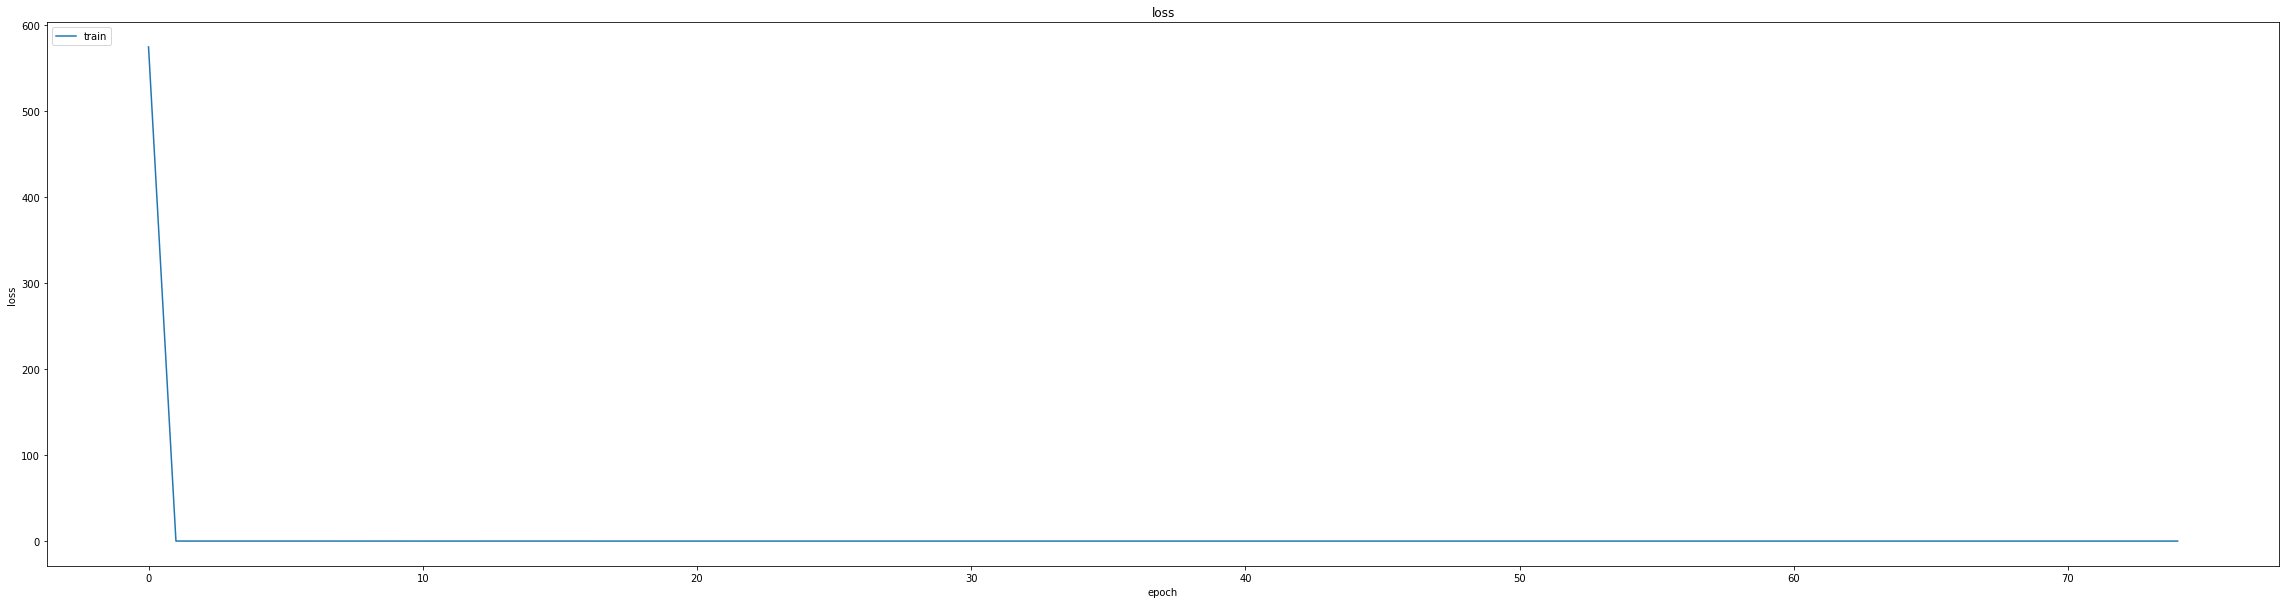

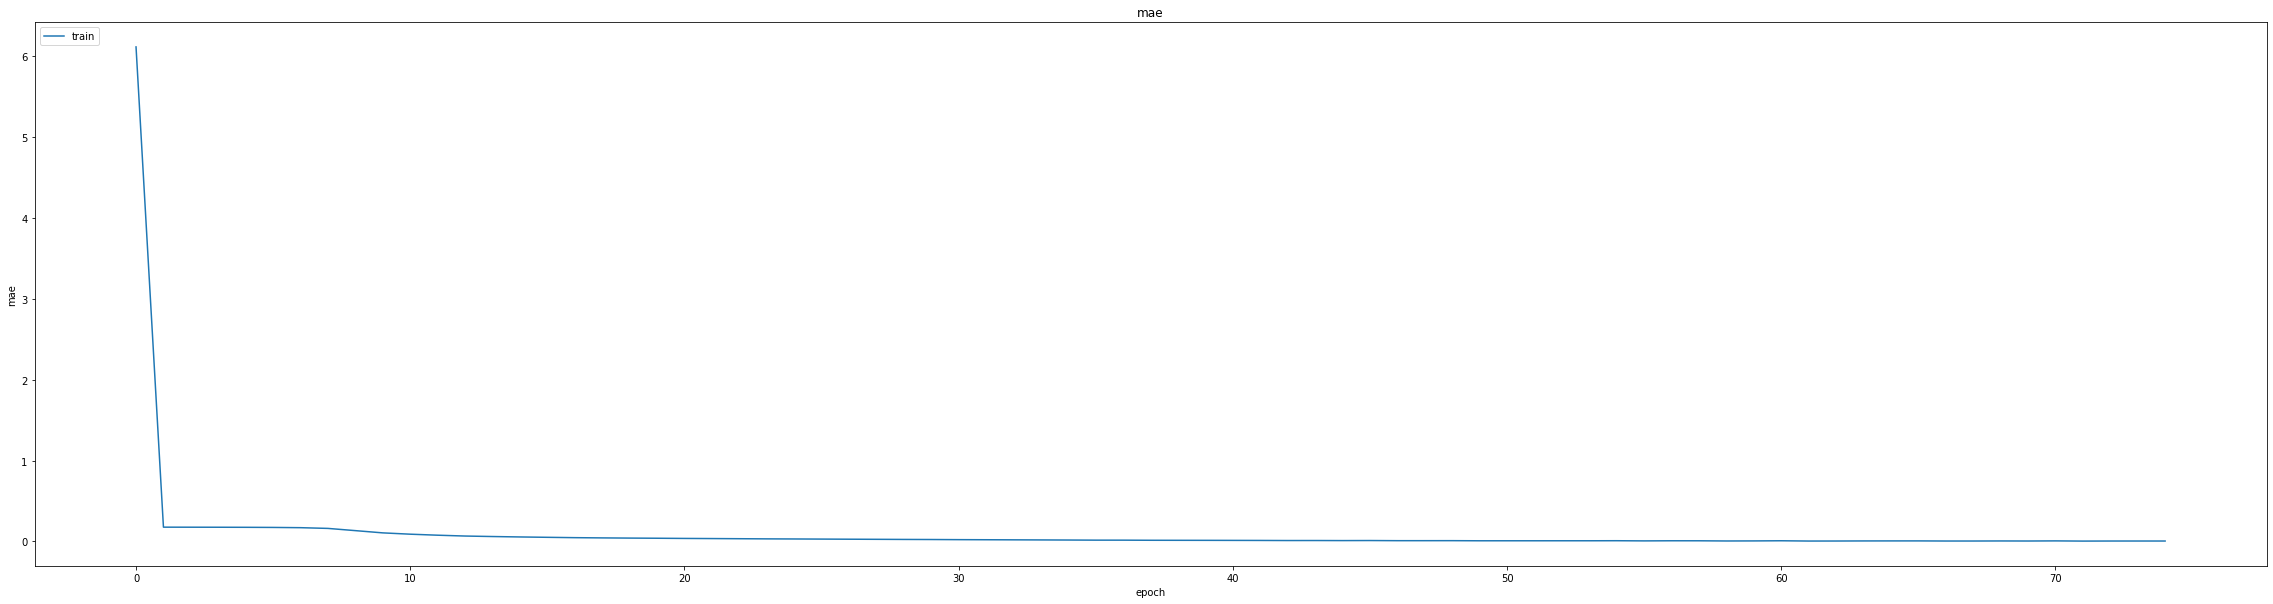

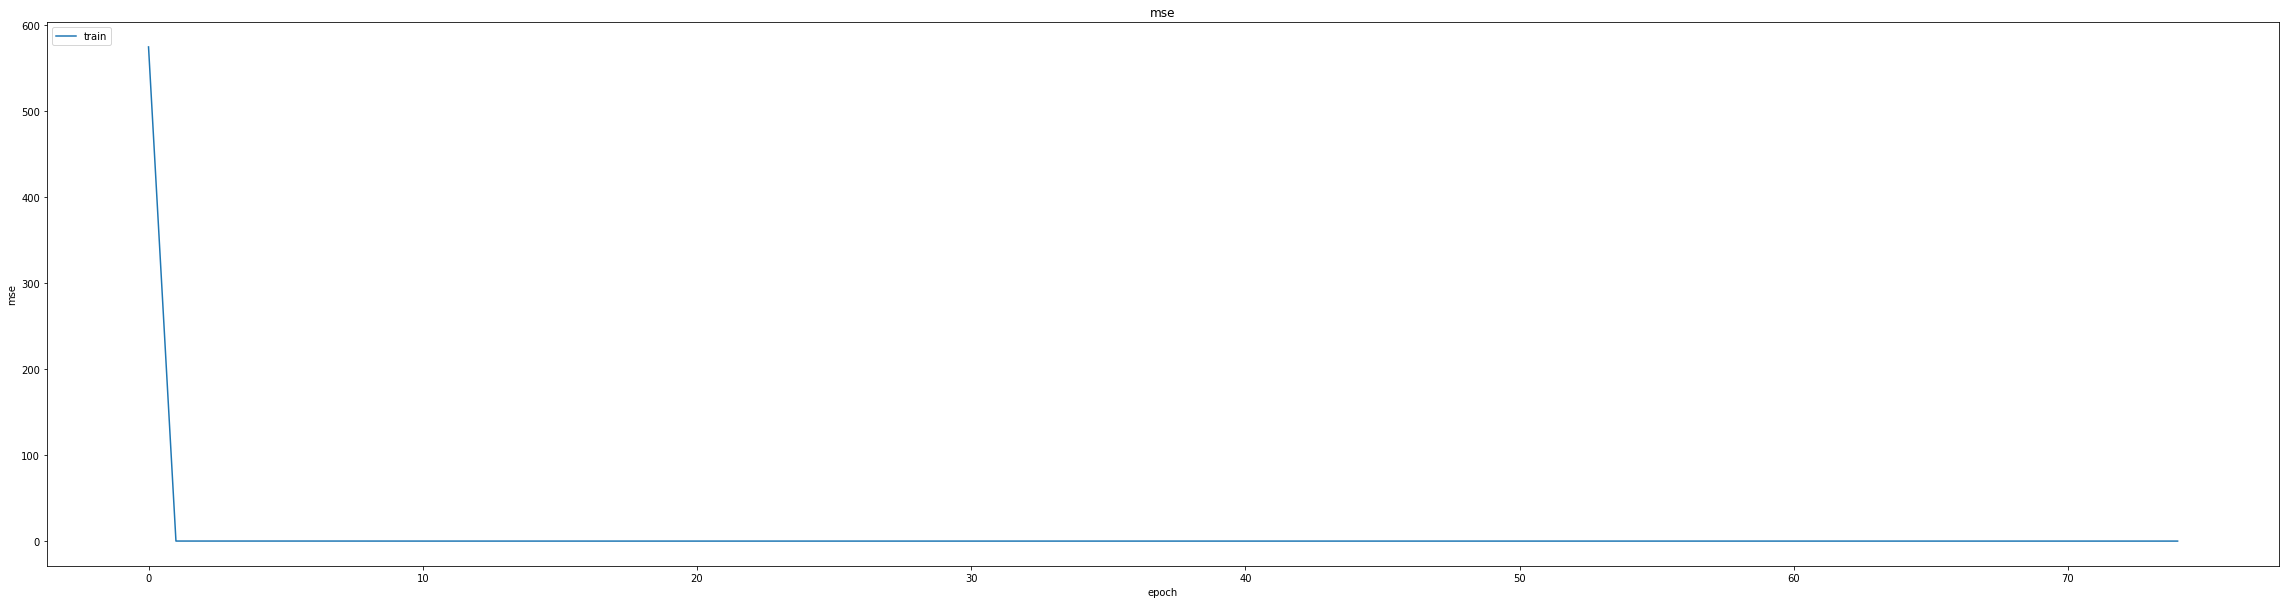

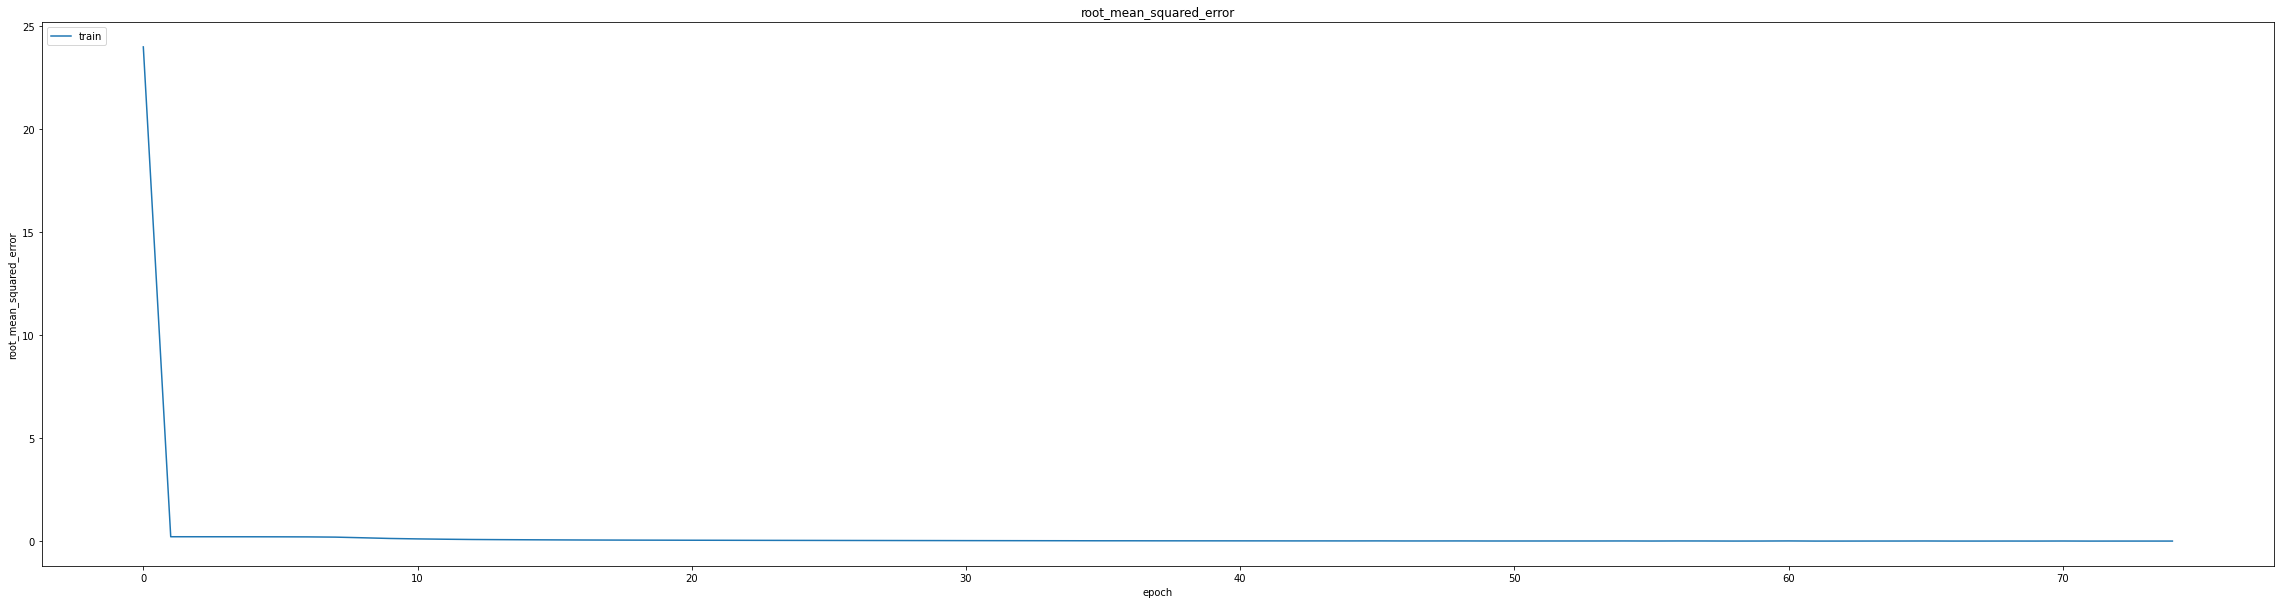

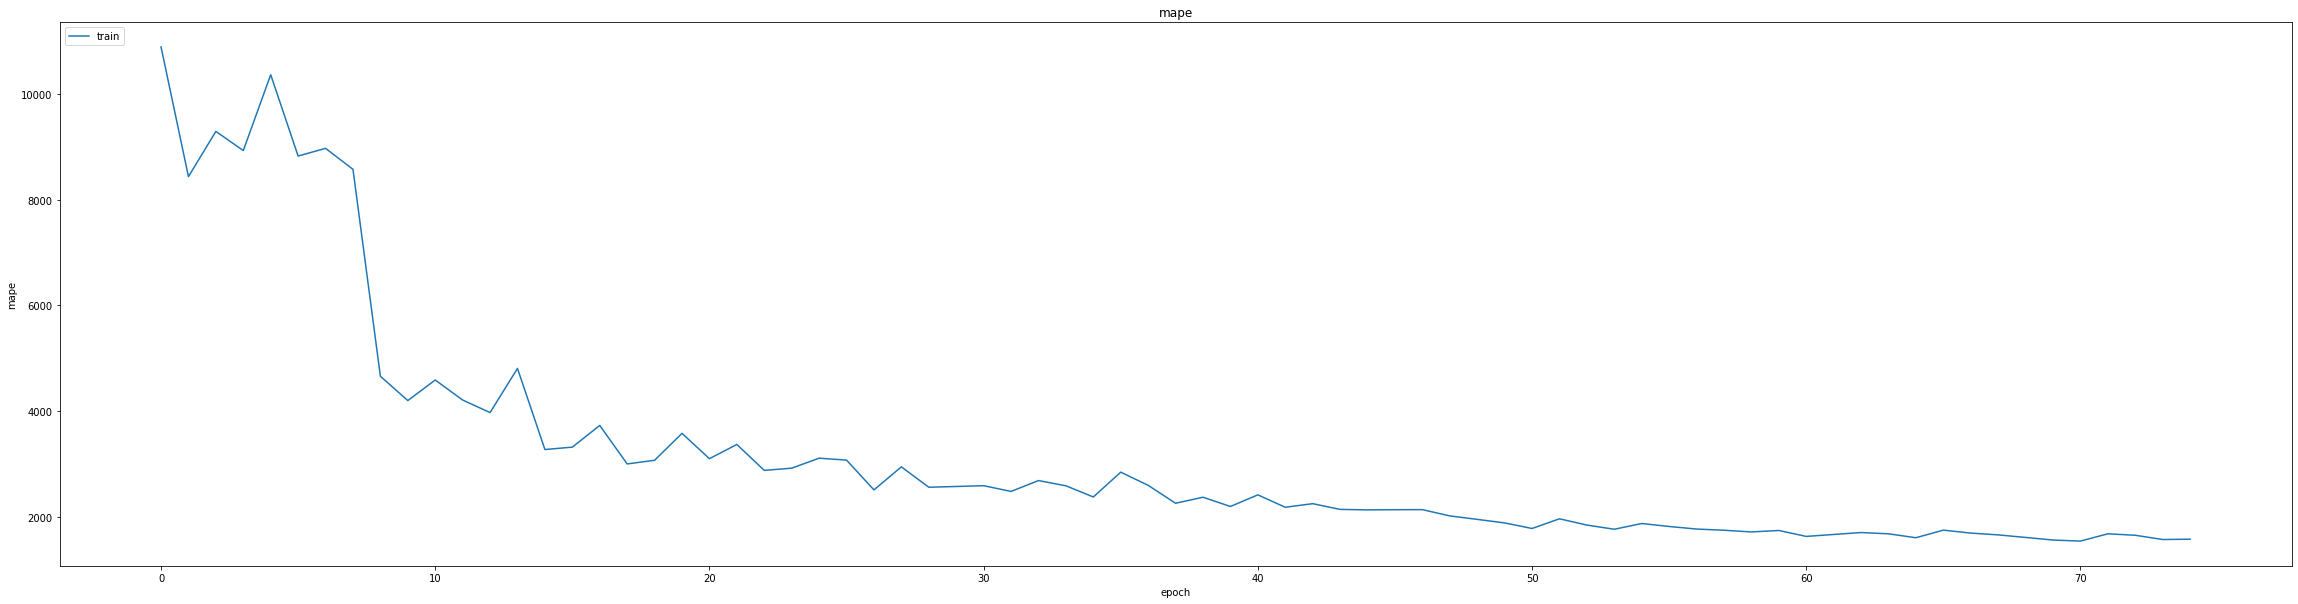

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014474519528448582
0.021984176710247993
348/348 [==============================] - 4s 6ms/step
0.993725460035538


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 2.3129e-04 - mae: 0.0065 - mse: 2.3129e-04 - root_mean_squared_error: 0.0152 - mape: 1798.9324


Epoch 1: val_mse did not improve from 0.00048
406/406 [==============================] - 19s 28ms/step - loss: 2.3028e-04 - mae: 0.0065 - mse: 2.3028e-04 - root_mean_squared_error: 0.0152 - mape: 1790.4535 - val_loss: 5.8221e-04 - val_mae: 0.0167 - val_mse: 5.8221e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 39.0148 - lr: 0.0010
Epoch 2/25
404/406 [============================>.] - ETA: 0s - loss: 2.3829e-05 - mae: 0.0036 - mse: 2.3829e-05 - root_mean_squared_error: 0.0049 - mape: 1553.5844
Epoch 2: val_mse improved from 0.00048 to 0.00045, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 43s 106ms/step - loss: 2.3821e-05 - mae: 0.0036 - mse: 2.3821e-05 - root_mean_squared_error: 0.0049 - mape: 1546.2631 - val_loss: 4.5057e-04 - val_mae: 0.0147 - val_mse: 4.5057e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 34.3562 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
406/406 [==============================] - ETA: 0s - loss: 2.4338e-05 - mae: 0.0037 - mse: 2.4338e-05 - root_mean_squared_error: 0.0049 - mape: 1456.1416
Epoch 3: val_mse did not improve from 0.00045
406/406 [==============================] - 8s 19ms/step - loss: 2.4338e-05 - mae: 0.0037 - mse: 2.4338e-05 - root_mean_squared_error: 0.0049 - mape: 1456.1416 - val_loss: 4.7304e-04 - val_mae: 0.0170 - val_mse: 4.7304e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 33.3374 - lr: 9.0000e-04
Epoch 4/25
406/406 [==============================] - ETA: 0s - loss: 3.5081e-05 - mae: 0.0045 - mse: 3.5081e-05 - root_mean_squared_error: 0.0059 - mape: 1474.4

406/406 [==============================] - 42s 103ms/step - loss: 3.5081e-05 - mae: 0.0045 - mse: 3.5081e-05 - root_mean_squared_error: 0.0059 - mape: 1474.4204 - val_loss: 3.8873e-04 - val_mae: 0.0140 - val_mse: 3.8873e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 31.4895 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
404/406 [============================>.] - ETA: 0s - loss: 4.7793e-05 - mae: 0.0051 - mse: 4.7793e-05 - root_mean_squared_error: 0.0069 - mape: 1503.5056
Epoch 5: val_mse did not improve from 0.00039
406/406 [==============================] - 8s 19ms/step - loss: 4.7707e-05 - mae: 0.0051 - mse: 4.7707e-05 - root_mean_squared_error: 0.0069 - mape: 1496.4219 - val_loss: 4.2697e-04 - val_mae: 0.0156 - val_mse: 4.2697e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 32.6782 - lr: 8.1000e-04
Epoch 6/25
406/406 [==============================] - ETA: 0s - loss: 3.4169e-05 - mae: 0.0044 - mse: 3.4169e-05 - root_mean_squared_error: 0.0058 - mape: 14

406/406 [==============================] - 41s 101ms/step - loss: 3.1678e-05 - mae: 0.0042 - mse: 3.1678e-05 - root_mean_squared_error: 0.0056 - mape: 1663.9705 - val_loss: 3.6494e-04 - val_mae: 0.0135 - val_mse: 3.6494e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 30.6801 - lr: 7.2900e-04
Epoch 8/25
404/406 [============================>.] - ETA: 0s - loss: 3.3862e-05 - mae: 0.0044 - mse: 3.3862e-05 - root_mean_squared_error: 0.0058 - mape: 1466.6931
Epoch 8: val_mse did not improve from 0.00036
406/406 [==============================] - 8s 19ms/step - loss: 3.4000e-05 - mae: 0.0044 - mse: 3.4000e-05 - root_mean_squared_error: 0.0058 - mape: 1459.7848 - val_loss: 4.9779e-04 - val_mae: 0.0200 - val_mse: 4.9779e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 29.8172 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
405/406 [============================>.] - ETA: 0s - loss: 2.9707e-05 - mae: 0.0041 - mse: 2.9707e-05 - root_mean_squared_error: 0.0055 - mape: 13

406/406 [==============================] - 42s 103ms/step - loss: 2.9782e-05 - mae: 0.0041 - mse: 2.9782e-05 - root_mean_squared_error: 0.0055 - mape: 1348.5969 - val_loss: 3.1642e-04 - val_mae: 0.0131 - val_mse: 3.1642e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 27.3643 - lr: 6.5610e-04
Epoch 10/25
404/406 [============================>.] - ETA: 0s - loss: 3.1216e-05 - mae: 0.0042 - mse: 3.1216e-05 - root_mean_squared_error: 0.0056 - mape: 1400.1406
Epoch 10: val_mse improved from 0.00032 to 0.00031, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 3.1287e-05 - mae: 0.0042 - mse: 3.1287e-05 - root_mean_squared_error: 0.0056 - mape: 1393.5442 - val_loss: 3.0689e-04 - val_mae: 0.0126 - val_mse: 3.0689e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 27.9410 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
405/406 [============================>.] - ETA: 0s - loss: 2.7032e-05 - mae: 0.0039 - mse: 2.7032e-05 - root_mean_squared_error: 0.0052 - mape: 1330.3077
Epoch 11: val_mse did not improve from 0.00031
406/406 [==============================] - 8s 19ms/step - loss: 2.7005e-05 - mae: 0.0039 - mse: 2.7005e-05 - root_mean_squared_error: 0.0052 - mape: 1327.3137 - val_loss: 3.0730e-04 - val_mae: 0.0130 - val_mse: 3.0730e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 27.2995 - lr: 5.9049e-04
Epoch 12/25
406/406 [==============================] - ETA: 0s - loss: 3.2075e-05 - mae: 0.0043 - mse: 3.2075e-05 - root_mean_squared_error: 0.0057 - mape:

406/406 [==============================] - 41s 100ms/step - loss: 2.2531e-05 - mae: 0.0035 - mse: 2.2531e-05 - root_mean_squared_error: 0.0047 - mape: 1313.4766 - val_loss: 2.8683e-04 - val_mae: 0.0127 - val_mse: 2.8683e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 26.3557 - lr: 5.3144e-04
Epoch 14/25
405/406 [============================>.] - ETA: 0s - loss: 2.9421e-05 - mae: 0.0040 - mse: 2.9421e-05 - root_mean_squared_error: 0.0054 - mape: 1288.8256
Epoch 14: val_mse did not improve from 0.00029
406/406 [==============================] - 8s 19ms/step - loss: 2.9386e-05 - mae: 0.0040 - mse: 2.9386e-05 - root_mean_squared_error: 0.0054 - mape: 1285.9250 - val_loss: 3.1196e-04 - val_mae: 0.0136 - val_mse: 3.1196e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 27.1557 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
405/406 [============================>.] - ETA: 0s - loss: 2.2459e-05 - mae: 0.0035 - mse: 2.2459e-05 - root_mean_squared_error: 0.0047 - mape

406/406 [==============================] - 43s 106ms/step - loss: 2.2443e-05 - mae: 0.0035 - mse: 2.2443e-05 - root_mean_squared_error: 0.0047 - mape: 1264.9785 - val_loss: 2.7146e-04 - val_mae: 0.0121 - val_mse: 2.7146e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 26.1018 - lr: 4.7830e-04
Epoch 16/25
405/406 [============================>.] - ETA: 0s - loss: 2.2227e-05 - mae: 0.0035 - mse: 2.2227e-05 - root_mean_squared_error: 0.0047 - mape: 1260.1000
Epoch 16: val_mse did not improve from 0.00027
406/406 [==============================] - 8s 21ms/step - loss: 2.2204e-05 - mae: 0.0035 - mse: 2.2204e-05 - root_mean_squared_error: 0.0047 - mape: 1257.2638 - val_loss: 2.8804e-04 - val_mae: 0.0130 - val_mse: 2.8804e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 26.3669 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
404/406 [============================>.] - ETA: 0s - loss: 1.9853e-05 - mae: 0.0033 - mse: 1.9853e-05 - root_mean_squared_error: 0.0045 - mape:

406/406 [==============================] - 41s 102ms/step - loss: 1.9830e-05 - mae: 0.0033 - mse: 1.9830e-05 - root_mean_squared_error: 0.0045 - mape: 1260.7489 - val_loss: 2.6299e-04 - val_mae: 0.0117 - val_mse: 2.6299e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 25.8260 - lr: 4.3047e-04
Epoch 18/25
404/406 [============================>.] - ETA: 0s - loss: 2.3822e-05 - mae: 0.0036 - mse: 2.3822e-05 - root_mean_squared_error: 0.0049 - mape: 1307.4128
Epoch 18: val_mse did not improve from 0.00026
406/406 [==============================] - 8s 19ms/step - loss: 2.3799e-05 - mae: 0.0036 - mse: 2.3799e-05 - root_mean_squared_error: 0.0049 - mape: 1301.2516 - val_loss: 2.7009e-04 - val_mae: 0.0123 - val_mse: 2.7009e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 25.5559 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
403/406 [============================>.] - ETA: 0s - loss: 1.9935e-05 - mae: 0.0033 - mse: 1.9935e-05 - root_mean_squared_error: 0.0045 - mape

406/406 [==============================] - 41s 101ms/step - loss: 2.5621e-05 - mae: 0.0038 - mse: 2.5621e-05 - root_mean_squared_error: 0.0051 - mape: 1264.2363 - val_loss: 2.4587e-04 - val_mae: 0.0117 - val_mse: 2.4587e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 24.5850 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
405/406 [============================>.] - ETA: 0s - loss: 1.8346e-05 - mae: 0.0031 - mse: 1.8346e-05 - root_mean_squared_error: 0.0043 - mape: 1273.2628
Epoch 21: val_mse did not improve from 0.00025
406/406 [==============================] - 8s 19ms/step - loss: 1.8329e-05 - mae: 0.0031 - mse: 1.8329e-05 - root_mean_squared_error: 0.0043 - mape: 1270.3971 - val_loss: 2.4671e-04 - val_mae: 0.0115 - val_mse: 2.4671e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 24.7164 - lr: 3.4868e-04
Epoch 22/25
404/406 [============================>.] - ETA: 0s - loss: 1.8504e-05 - mae: 0.0032 - mse: 1.8504e-05 - root_mean_squared_error: 0.0043 - mape:

406/406 [==============================] - 42s 103ms/step - loss: 2.0913e-05 - mae: 0.0034 - mse: 2.0913e-05 - root_mean_squared_error: 0.0046 - mape: 1282.9049 - val_loss: 2.4578e-04 - val_mae: 0.0117 - val_mse: 2.4578e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 24.4040 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
405/406 [============================>.] - ETA: 0s - loss: 1.6249e-05 - mae: 0.0030 - mse: 1.6249e-05 - root_mean_squared_error: 0.0040 - mape: 1262.6991
Epoch 25: val_mse did not improve from 0.00025
406/406 [==============================] - 8s 19ms/step - loss: 1.6269e-05 - mae: 0.0030 - mse: 1.6269e-05 - root_mean_squared_error: 0.0040 - mape: 1259.8577 - val_loss: 3.1156e-04 - val_mae: 0.0147 - val_mse: 3.1156e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 25.4954 - lr: 2.8243e-04


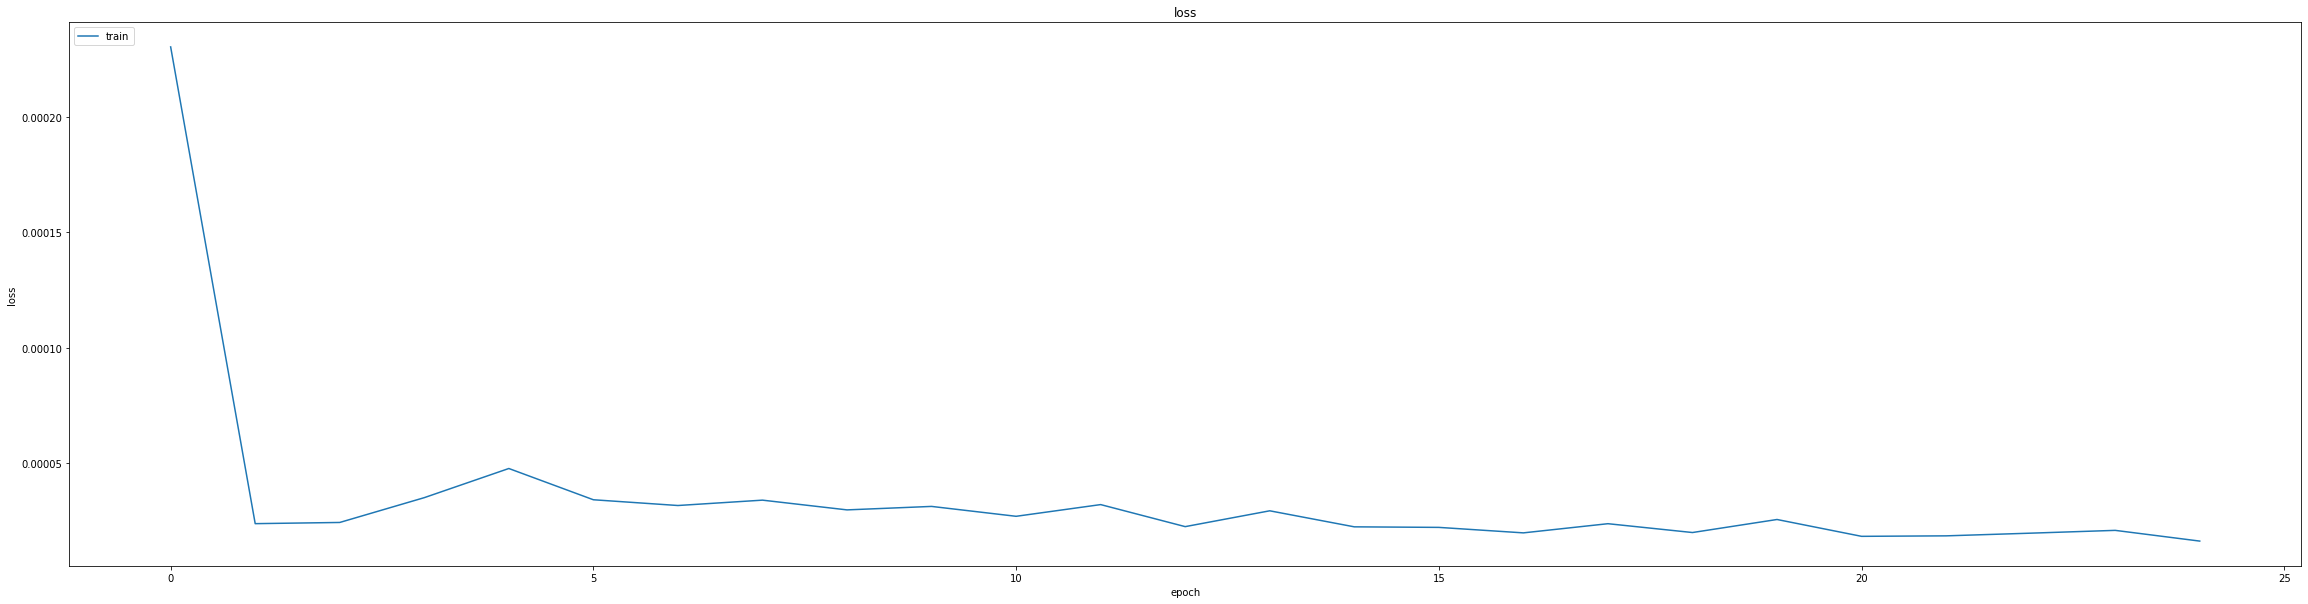

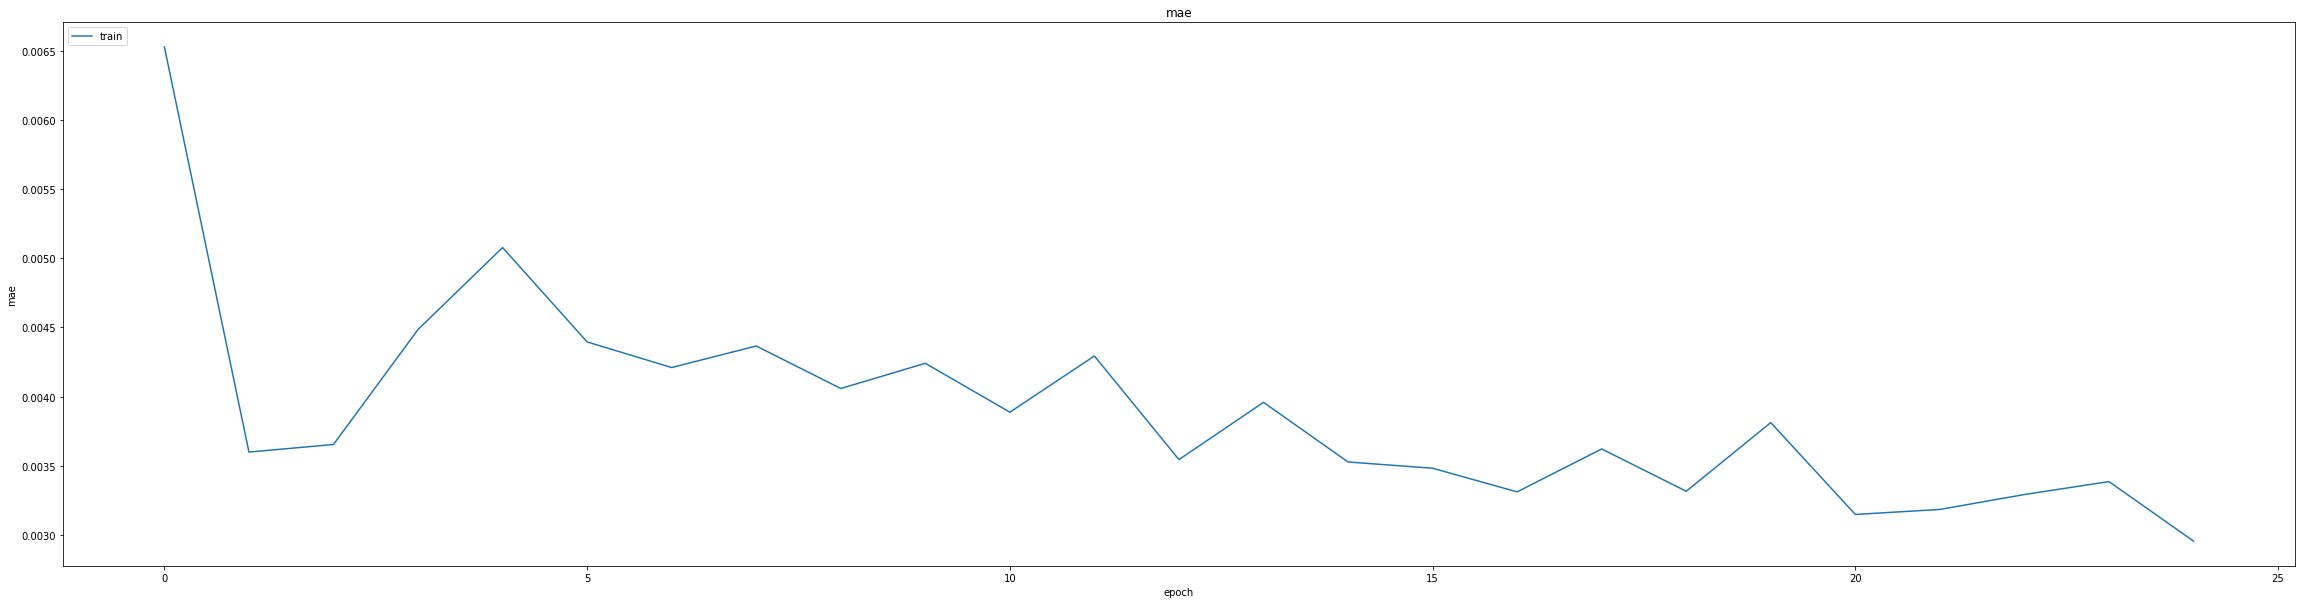

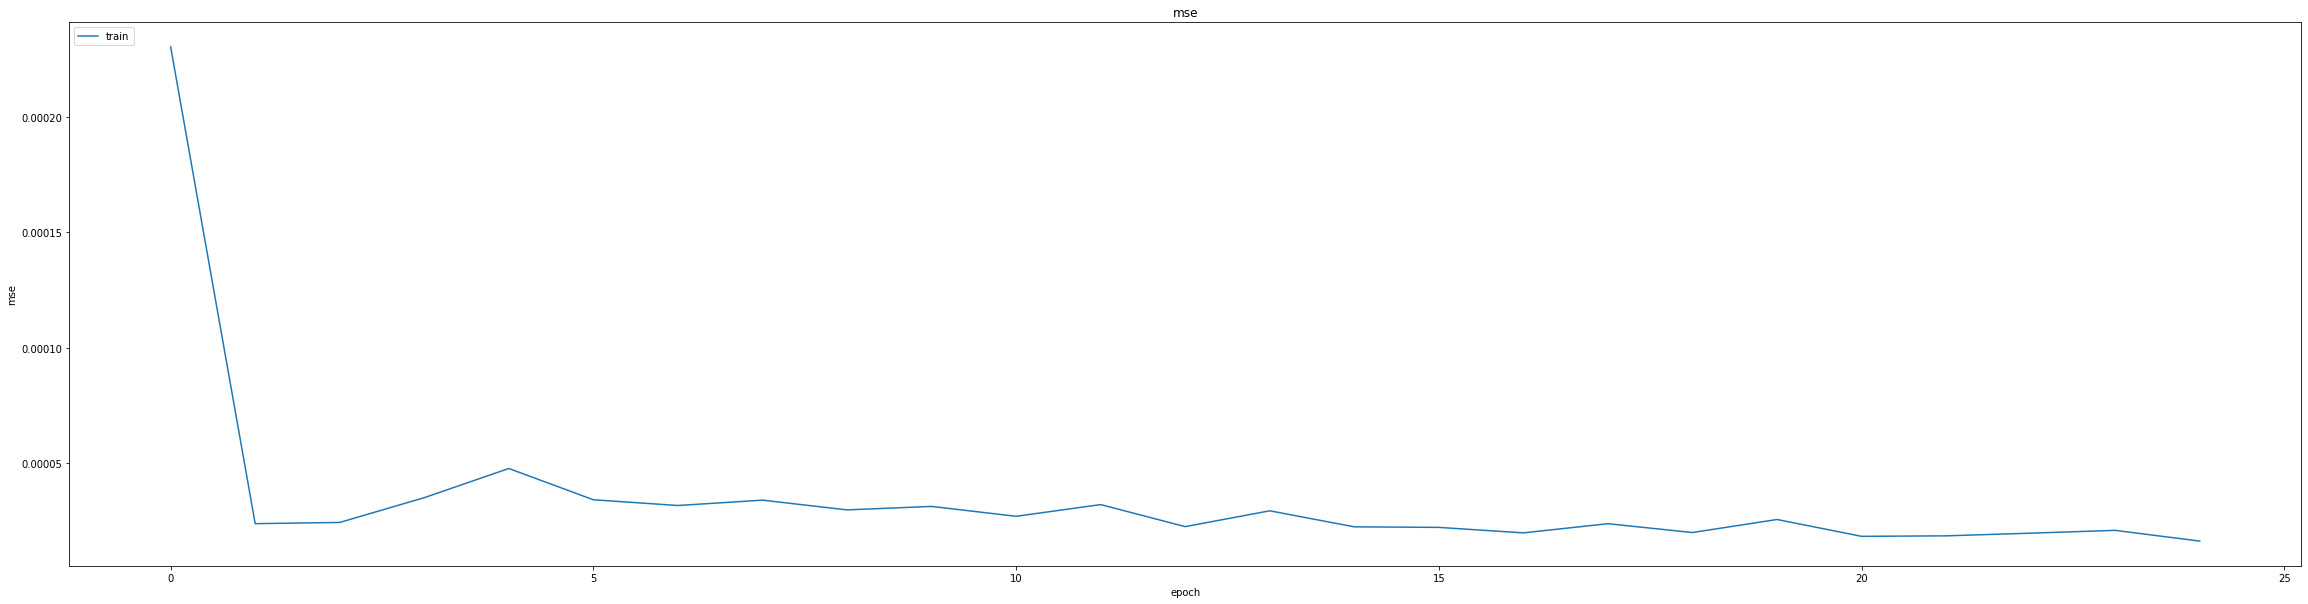

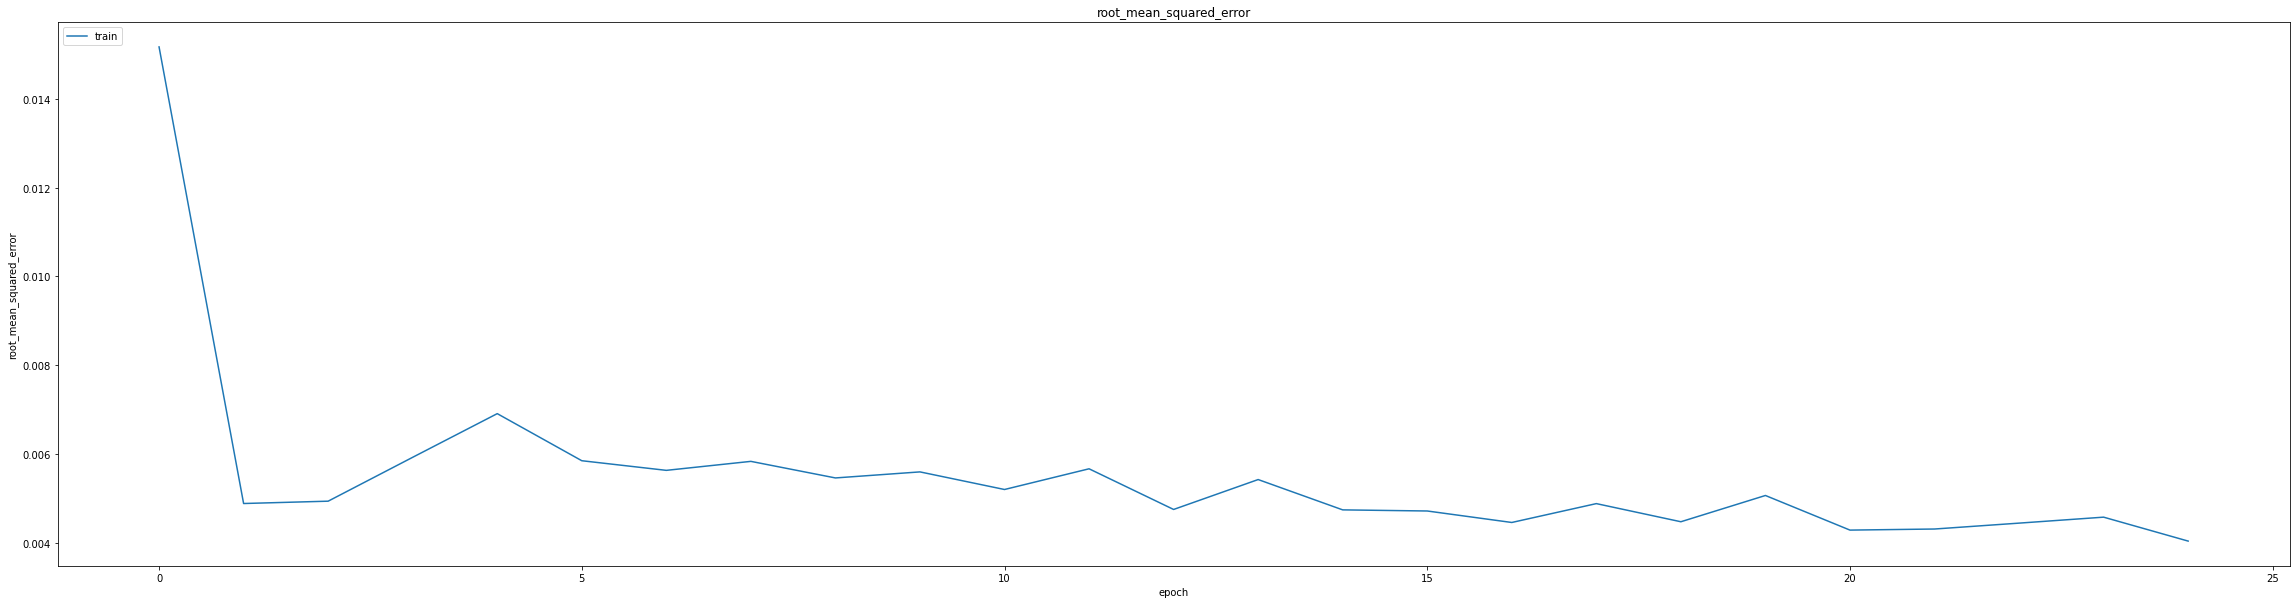

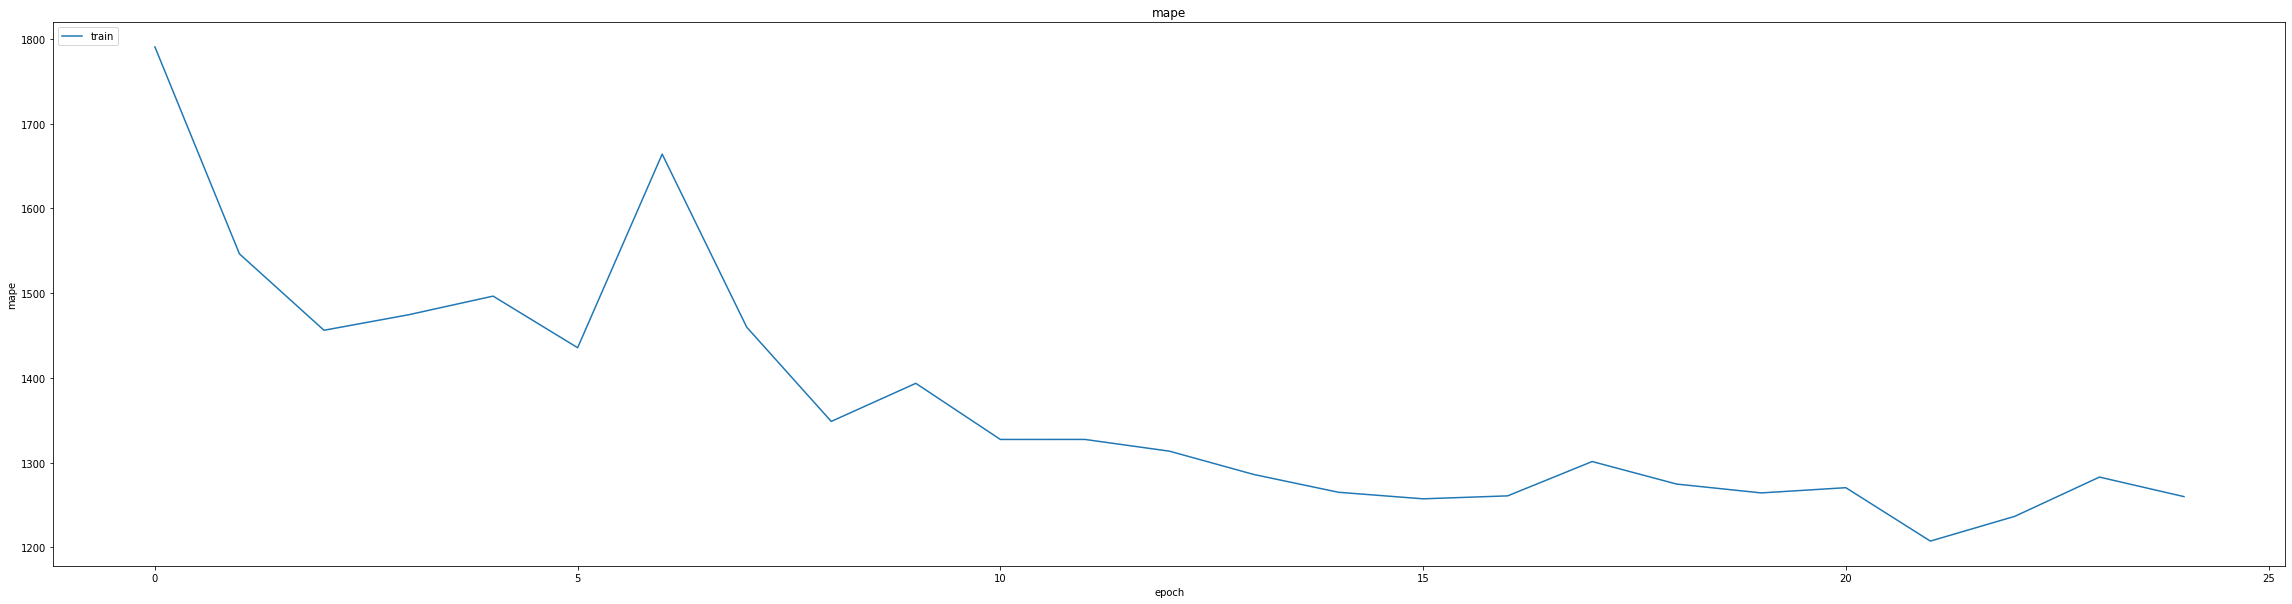

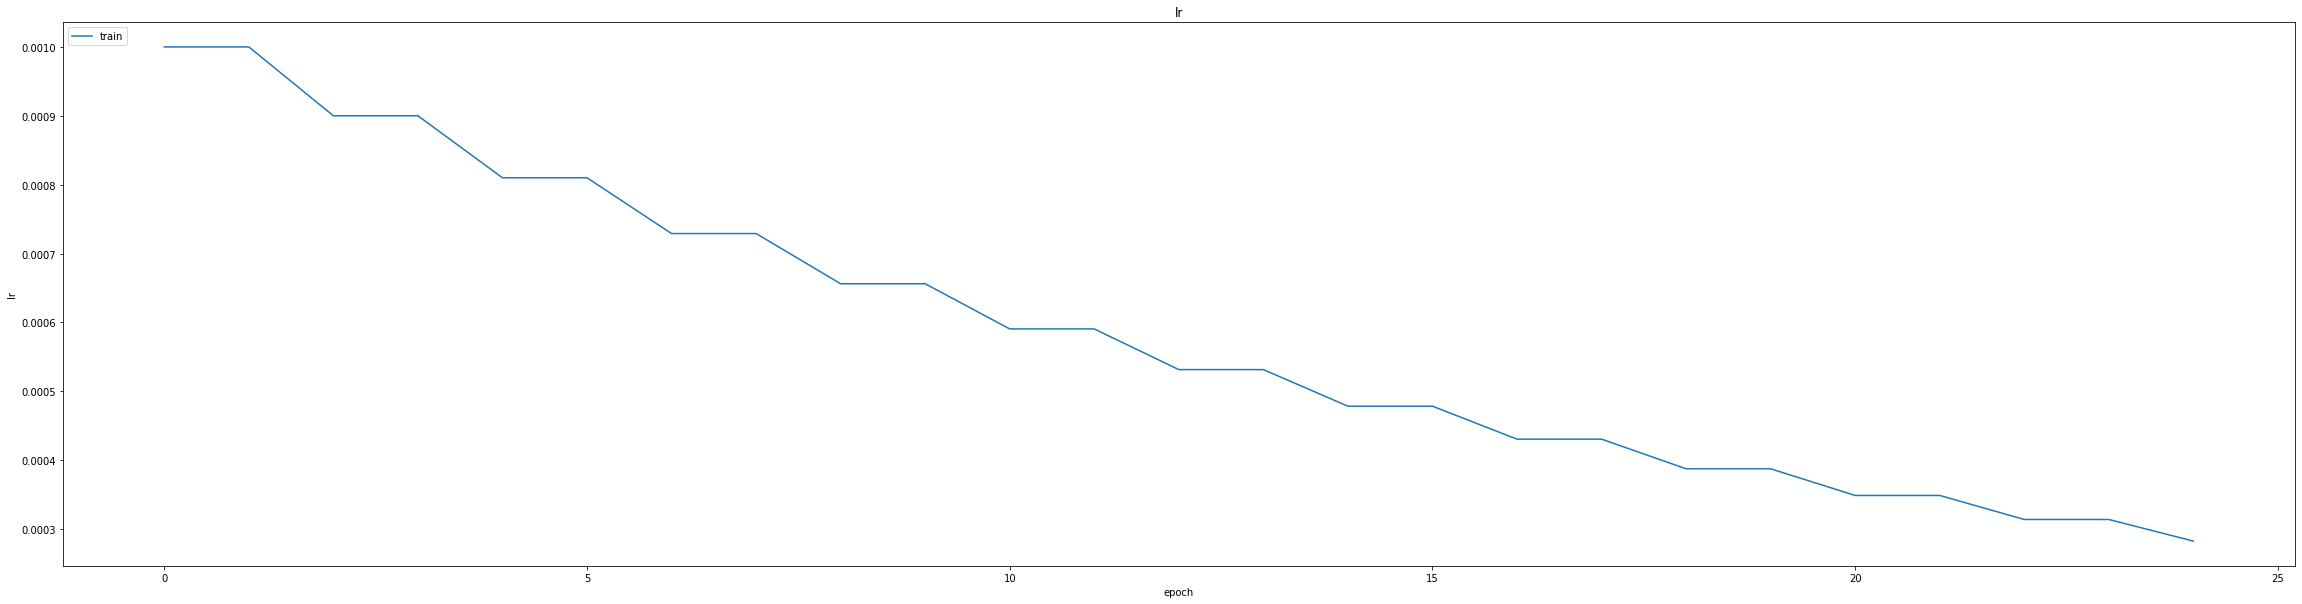

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011515156365931034
0.01567744091153145
348/348 [==============================] - 4s 6ms/step
0.9964760286199926


348/348 [==============================] - 2s 6ms/step


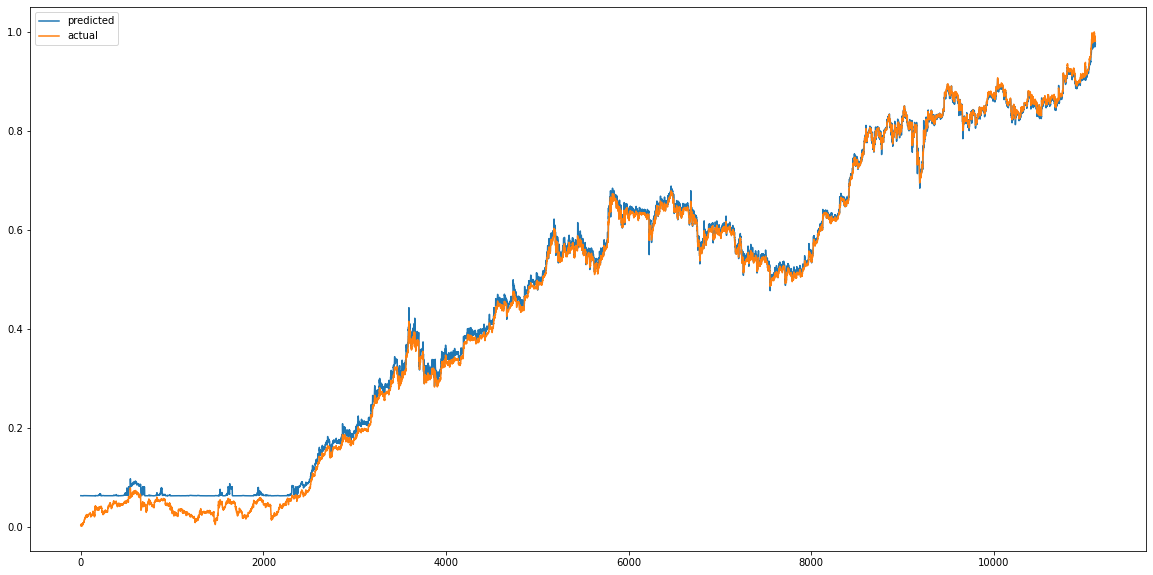

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


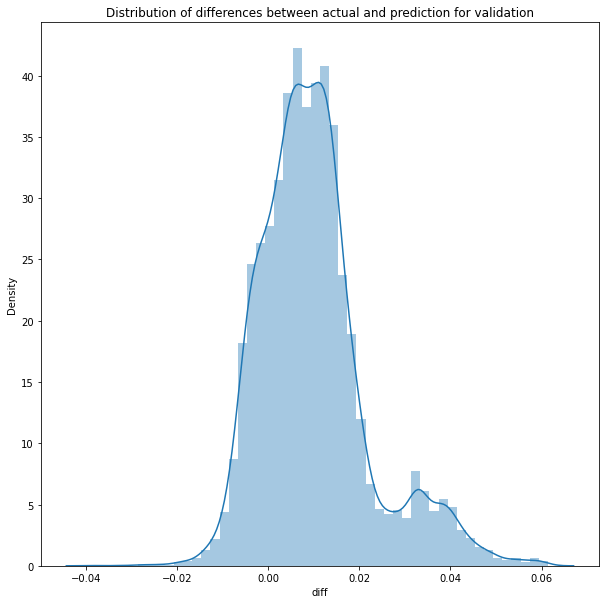

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


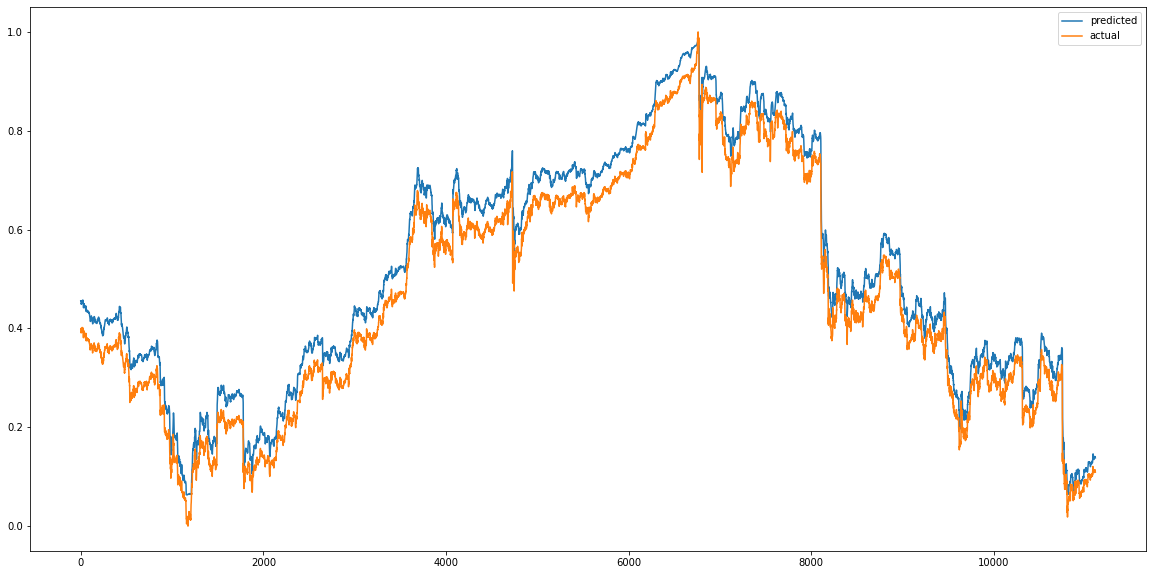

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


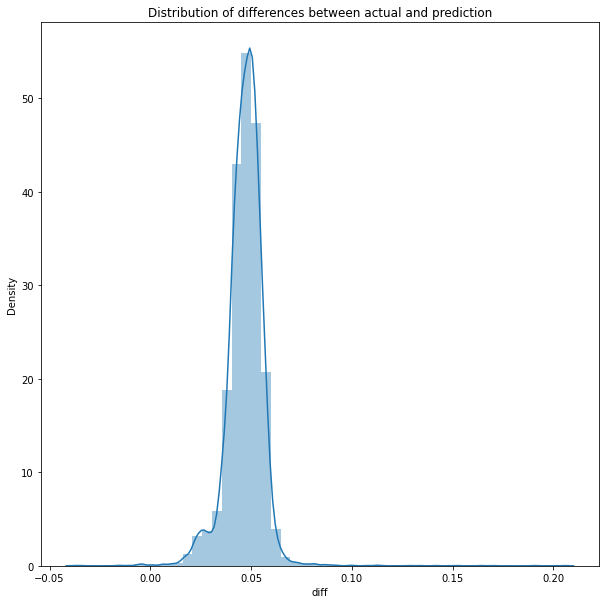

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0022913994420895915
RMSE :  0.04786856423676807
MAE :  0.04698981384650791
348/348 [==============================] - 2s 6ms/step
R2_Score  : 0.959053242952913


count    11115.000000
mean         0.046960
std          0.009283
min         -0.037402
25%          0.042578
50%          0.047611
75%          0.052138
max          0.205665
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
403/406 [============================>.] - ETA: 0s - loss: 1375.1899 - mae: 14.0121 - mse: 1375.1899 - root_mean_squared_error: 37.0836 - mape: 313242.1562
Epoch 1: val_mse improved from inf to 0.52591, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 22s 44ms/step - loss: 1365.3212 - mae: 13.9163 - mse: 1365.3212 - root_mean_squared_error: 36.9503 - mape: 310994.8750 - val_loss: 0.5259 - val_mae: 0.6613 - val_mse: 0.5259 - val_root_mean_squared_error: 0.7252 - val_mape: 869.8021
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.1920 - mae: 0.3758 - mse: 0.1920 - root_mean_squared_error: 0.4382 - mape: 19587.8184
Epoch 2: val_mse improved from 0.52591 to 0.11763, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 0.1911 - mae: 0.3748 - mse: 0.1911 - root_mean_squared_error: 0.4372 - mape: 19447.7598 - val_loss: 0.1176 - val_mae: 0.2737 - val_mse: 0.1176 - val_root_mean_squared_error: 0.3430 - val_mape: 458.1695
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0581 - mae: 0.1983 - mse: 0.0581 - root_mean_squared_error: 0.2411 - mape: 11552.1357
Epoch 3: val_mse improved from 0.11763 to 0.09146, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0580 - mae: 0.1981 - mse: 0.0580 - root_mean_squared_error: 0.2409 - mape: 11497.9141 - val_loss: 0.0915 - val_mae: 0.2533 - val_mse: 0.0915 - val_root_mean_squared_error: 0.3024 - val_mape: 370.9992
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.0481 - mae: 0.1784 - mse: 0.0481 - root_mean_squared_error: 0.2193 - mape: 9632.6641
Epoch 4: val_mse improved from 0.09146 to 0.08879, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0481 - mae: 0.1784 - mse: 0.0481 - root_mean_squared_error: 0.2193 - mape: 9611.1094 - val_loss: 0.0888 - val_mae: 0.2563 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2980 - val_mape: 345.0624
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.0473 - mae: 0.1772 - mse: 0.0473 - root_mean_squared_error: 0.2176 - mape: 9718.5312
Epoch 5: val_mse improved from 0.08879 to 0.08853, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0473 - mae: 0.1771 - mse: 0.0473 - root_mean_squared_error: 0.2175 - mape: 9625.2803 - val_loss: 0.0885 - val_mae: 0.2575 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 337.9571
Epoch 6/75
404/406 [============================>.] - ETA: 0s - loss: 0.0472 - mae: 0.1768 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 9358.8496
Epoch 6: val_mse improved from 0.08853 to 0.08850, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0472 - mae: 0.1768 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 9314.9463 - val_loss: 0.0885 - val_mae: 0.2578 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 336.2653
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.0472 - mae: 0.1768 - mse: 0.0472 - root_mean_squared_error: 0.2171 - mape: 8676.2100
Epoch 7: val_mse did not improve from 0.08850
406/406 [==============================] - 5s 12ms/step - loss: 0.0472 - mae: 0.1768 - mse: 0.0472 - root_mean_squared_error: 0.2171 - mape: 8676.2100 - val_loss: 0.0885 - val_mae: 0.2578 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 336.4058
Epoch 8/75
403/406 [============================>.] - ETA: 0s - loss: 0.0472 - mae: 0.1770 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 8594.4951
Epoch 8: val_mse did not improve from 0.08850
406/406 [==============================] - 5s 12ms/step - loss:

406/406 [==============================] - 16s 40ms/step - loss: 0.0471 - mae: 0.1769 - mse: 0.0471 - root_mean_squared_error: 0.2171 - mape: 8943.4873 - val_loss: 0.0885 - val_mae: 0.2580 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 335.2915
Epoch 12/75
406/406 [==============================] - ETA: 0s - loss: 0.0471 - mae: 0.1767 - mse: 0.0471 - root_mean_squared_error: 0.2170 - mape: 9894.1377 
Epoch 12: val_mse did not improve from 0.08849
406/406 [==============================] - 5s 12ms/step - loss: 0.0471 - mae: 0.1767 - mse: 0.0471 - root_mean_squared_error: 0.2170 - mape: 9894.1377 - val_loss: 0.0885 - val_mae: 0.2577 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 336.9814
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 0.0472 - mae: 0.1769 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 8808.1719
Epoch 13: val_mse did not improve from 0.08849
406/406 [==============================] - 5s 11ms/step - 

406/406 [==============================] - 16s 40ms/step - loss: 0.0472 - mae: 0.1769 - mse: 0.0472 - root_mean_squared_error: 0.2172 - mape: 8604.7930 - val_loss: 0.0885 - val_mae: 0.2579 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 335.4666
Epoch 16/75
403/406 [============================>.] - ETA: 0s - loss: 0.0470 - mae: 0.1765 - mse: 0.0470 - root_mean_squared_error: 0.2167 - mape: 8844.4395
Epoch 16: val_mse did not improve from 0.08849
406/406 [==============================] - 5s 12ms/step - loss: 0.0470 - mae: 0.1765 - mse: 0.0470 - root_mean_squared_error: 0.2167 - mape: 8781.2969 - val_loss: 0.0885 - val_mae: 0.2579 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 335.8154
Epoch 17/75
405/406 [============================>.] - ETA: 0s - loss: 0.0469 - mae: 0.1764 - mse: 0.0469 - root_mean_squared_error: 0.2166 - mape: 9101.2900
Epoch 17: val_mse did not improve from 0.08849
406/406 [==============================] - 5s 13ms/step - l

406/406 [==============================] - 16s 38ms/step - loss: 0.0470 - mae: 0.1766 - mse: 0.0470 - root_mean_squared_error: 0.2167 - mape: 9800.6963 - val_loss: 0.0885 - val_mae: 0.2579 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 335.4935
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 0.0470 - mae: 0.1766 - mse: 0.0470 - root_mean_squared_error: 0.2168 - mape: 10431.1270
Epoch 20: val_mse did not improve from 0.08848
406/406 [==============================] - 5s 12ms/step - loss: 0.0470 - mae: 0.1766 - mse: 0.0470 - root_mean_squared_error: 0.2168 - mape: 10431.1270 - val_loss: 0.0885 - val_mae: 0.2576 - val_mse: 0.0885 - val_root_mean_squared_error: 0.2975 - val_mape: 337.2604
Epoch 21/75
405/406 [============================>.] - ETA: 0s - loss: 0.0469 - mae: 0.1764 - mse: 0.0469 - root_mean_squared_error: 0.2166 - mape: 10192.4121
Epoch 21: val_mse did not improve from 0.08848
406/406 [==============================] - 5s 11ms/step 

406/406 [==============================] - 16s 40ms/step - loss: 0.0467 - mae: 0.1761 - mse: 0.0467 - root_mean_squared_error: 0.2160 - mape: 9299.0098 - val_loss: 0.0884 - val_mae: 0.2580 - val_mse: 0.0884 - val_root_mean_squared_error: 0.2974 - val_mape: 334.7937
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 0.0466 - mae: 0.1759 - mse: 0.0466 - root_mean_squared_error: 0.2159 - mape: 9708.8096
Epoch 29: val_mse improved from 0.08844 to 0.08843, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 0.0466 - mae: 0.1759 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 9687.0508 - val_loss: 0.0884 - val_mae: 0.2579 - val_mse: 0.0884 - val_root_mean_squared_error: 0.2974 - val_mape: 334.9891
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 0.0466 - mae: 0.1759 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 8872.0742
Epoch 30: val_mse did not improve from 0.08843
406/406 [==============================] - 5s 12ms/step - loss: 0.0466 - mae: 0.1759 - mse: 0.0466 - root_mean_squared_error: 0.2159 - mape: 8830.4717 - val_loss: 0.0886 - val_mae: 0.2569 - val_mse: 0.0886 - val_root_mean_squared_error: 0.2976 - val_mape: 340.8648
Epoch 31/75
403/406 [============================>.] - ETA: 0s - loss: 0.0465 - mae: 0.1757 - mse: 0.0465 - root_mean_squared_error: 0.2156 - mape: 9561.2881
Epoch 31: val_mse did not improve from 0.08843
406/406 [==============================] - 5s 12ms/step - l

406/406 [==============================] - 16s 40ms/step - loss: 0.0463 - mae: 0.1753 - mse: 0.0463 - root_mean_squared_error: 0.2152 - mape: 8865.9795 - val_loss: 0.0884 - val_mae: 0.2563 - val_mse: 0.0884 - val_root_mean_squared_error: 0.2973 - val_mape: 341.7648
Epoch 35/75
406/406 [==============================] - ETA: 0s - loss: 0.0459 - mae: 0.1743 - mse: 0.0459 - root_mean_squared_error: 0.2142 - mape: 8947.8467
Epoch 35: val_mse did not improve from 0.08838
406/406 [==============================] - 6s 14ms/step - loss: 0.0459 - mae: 0.1743 - mse: 0.0459 - root_mean_squared_error: 0.2142 - mape: 8947.8467 - val_loss: 0.0888 - val_mae: 0.2542 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2980 - val_mape: 353.1396
Epoch 36/75
402/406 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1505 - mse: 0.0364 - root_mean_squared_error: 0.1908 - mape: 10151.1602
Epoch 36: val_mse improved from 0.08838 to 0.02062, saving model to /content/drive/MyDrive/modelweights/J

406/406 [==============================] - 16s 40ms/step - loss: 0.0362 - mae: 0.1498 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 10053.5566 - val_loss: 0.0206 - val_mae: 0.1108 - val_mse: 0.0206 - val_root_mean_squared_error: 0.1436 - val_mape: 202.1510
Epoch 37/75
406/406 [==============================] - ETA: 0s - loss: 0.0046 - mae: 0.0515 - mse: 0.0046 - root_mean_squared_error: 0.0681 - mape: 4356.1855
Epoch 37: val_mse improved from 0.02062 to 0.00566, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0046 - mae: 0.0515 - mse: 0.0046 - root_mean_squared_error: 0.0681 - mape: 4356.1855 - val_loss: 0.0057 - val_mae: 0.0495 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0752 - val_mape: 112.8912
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0326 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 4095.4521
Epoch 38: val_mse improved from 0.00566 to 0.00478, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0018 - mae: 0.0325 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 4076.1760 - val_loss: 0.0048 - val_mae: 0.0489 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0691 - val_mape: 103.8997
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 3358.1167
Epoch 39: val_mse improved from 0.00478 to 0.00411, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 3350.5676 - val_loss: 0.0041 - val_mae: 0.0456 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 96.0934
Epoch 40/75
402/406 [============================>.] - ETA: 0s - loss: 9.1105e-04 - mae: 0.0230 - mse: 9.1105e-04 - root_mean_squared_error: 0.0302 - mape: 3389.0906
Epoch 40: val_mse improved from 0.00411 to 0.00321, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 9.1329e-04 - mae: 0.0231 - mse: 9.1329e-04 - root_mean_squared_error: 0.0302 - mape: 3356.4795 - val_loss: 0.0032 - val_mae: 0.0364 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0567 - val_mape: 87.1141
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 7.6194e-04 - mae: 0.0209 - mse: 7.6194e-04 - root_mean_squared_error: 0.0276 - mape: 2973.5234
Epoch 41: val_mse improved from 0.00321 to 0.00311, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 7.6194e-04 - mae: 0.0209 - mse: 7.6194e-04 - root_mean_squared_error: 0.0276 - mape: 2973.5234 - val_loss: 0.0031 - val_mae: 0.0389 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 84.3629
Epoch 42/75
405/406 [============================>.] - ETA: 0s - loss: 6.3784e-04 - mae: 0.0192 - mse: 6.3784e-04 - root_mean_squared_error: 0.0253 - mape: 2506.3521
Epoch 42: val_mse improved from 0.00311 to 0.00265, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 6.3738e-04 - mae: 0.0192 - mse: 6.3738e-04 - root_mean_squared_error: 0.0252 - mape: 2500.7180 - val_loss: 0.0026 - val_mae: 0.0329 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0515 - val_mape: 79.9090
Epoch 43/75
404/406 [============================>.] - ETA: 0s - loss: 5.6764e-04 - mae: 0.0181 - mse: 5.6764e-04 - root_mean_squared_error: 0.0238 - mape: 3313.4512
Epoch 43: val_mse did not improve from 0.00265
406/406 [==============================] - 5s 12ms/step - loss: 5.6789e-04 - mae: 0.0181 - mse: 5.6789e-04 - root_mean_squared_error: 0.0238 - mape: 3297.8513 - val_loss: 0.0030 - val_mae: 0.0420 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0545 - val_mape: 76.1237
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 4.8419e-04 - mae: 0.0167 - mse: 4.8419e-04 - root_mean_squared_error: 0.0220 - mape: 2535.1897
Epoch 44: val_mse improved from 0.00265 to 0.00214, saving model to /content

406/406 [==============================] - 17s 43ms/step - loss: 4.8419e-04 - mae: 0.0167 - mse: 4.8419e-04 - root_mean_squared_error: 0.0220 - mape: 2535.1897 - val_loss: 0.0021 - val_mae: 0.0293 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0462 - val_mape: 71.9941
Epoch 45/75
406/406 [==============================] - ETA: 0s - loss: 4.3585e-04 - mae: 0.0158 - mse: 4.3585e-04 - root_mean_squared_error: 0.0209 - mape: 2563.2683
Epoch 45: val_mse improved from 0.00214 to 0.00201, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 4.3585e-04 - mae: 0.0158 - mse: 4.3585e-04 - root_mean_squared_error: 0.0209 - mape: 2563.2683 - val_loss: 0.0020 - val_mae: 0.0302 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0449 - val_mape: 68.8861
Epoch 46/75
403/406 [============================>.] - ETA: 0s - loss: 4.0944e-04 - mae: 0.0153 - mse: 4.0944e-04 - root_mean_squared_error: 0.0202 - mape: 2584.3586
Epoch 46: val_mse improved from 0.00201 to 0.00160, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 4.0943e-04 - mae: 0.0153 - mse: 4.0943e-04 - root_mean_squared_error: 0.0202 - mape: 2565.8333 - val_loss: 0.0016 - val_mae: 0.0256 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 62.4255
Epoch 47/75
403/406 [============================>.] - ETA: 0s - loss: 3.5279e-04 - mae: 0.0142 - mse: 3.5279e-04 - root_mean_squared_error: 0.0188 - mape: 2778.2400
Epoch 47: val_mse did not improve from 0.00160
406/406 [==============================] - 5s 12ms/step - loss: 3.5206e-04 - mae: 0.0141 - mse: 3.5206e-04 - root_mean_squared_error: 0.0188 - mape: 2758.3176 - val_loss: 0.0016 - val_mae: 0.0301 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mape: 59.1118
Epoch 48/75
403/406 [============================>.] - ETA: 0s - loss: 3.2275e-04 - mae: 0.0135 - mse: 3.2275e-04 - root_mean_squared_error: 0.0180 - mape: 1935.8407
Epoch 48: val_mse improved from 0.00160 to 0.00127, saving model to /content

406/406 [==============================] - 15s 38ms/step - loss: 3.2312e-04 - mae: 0.0135 - mse: 3.2312e-04 - root_mean_squared_error: 0.0180 - mape: 1921.9740 - val_loss: 0.0013 - val_mae: 0.0227 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 55.8454
Epoch 49/75
402/406 [============================>.] - ETA: 0s - loss: 3.3526e-04 - mae: 0.0139 - mse: 3.3526e-04 - root_mean_squared_error: 0.0183 - mape: 2245.8708
Epoch 49: val_mse did not improve from 0.00127
406/406 [==============================] - 5s 12ms/step - loss: 3.3473e-04 - mae: 0.0139 - mse: 3.3473e-04 - root_mean_squared_error: 0.0183 - mape: 2224.2466 - val_loss: 0.0014 - val_mae: 0.0275 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 56.1375
Epoch 50/75
402/406 [============================>.] - ETA: 0s - loss: 3.0293e-04 - mae: 0.0131 - mse: 3.0293e-04 - root_mean_squared_error: 0.0174 - mape: 2117.6733
Epoch 50: val_mse did not improve from 0.00127
406/406 [====================

406/406 [==============================] - 17s 42ms/step - loss: 2.7727e-04 - mae: 0.0126 - mse: 2.7727e-04 - root_mean_squared_error: 0.0167 - mape: 2278.6365 - val_loss: 0.0011 - val_mae: 0.0227 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 52.8523
Epoch 52/75
402/406 [============================>.] - ETA: 0s - loss: 2.4923e-04 - mae: 0.0119 - mse: 2.4923e-04 - root_mean_squared_error: 0.0158 - mape: 1993.7024
Epoch 52: val_mse improved from 0.00113 to 0.00107, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 2.4945e-04 - mae: 0.0119 - mse: 2.4945e-04 - root_mean_squared_error: 0.0158 - mape: 1974.5123 - val_loss: 0.0011 - val_mae: 0.0229 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0328 - val_mape: 50.8383
Epoch 53/75
405/406 [============================>.] - ETA: 0s - loss: 2.4424e-04 - mae: 0.0118 - mse: 2.4424e-04 - root_mean_squared_error: 0.0156 - mape: 2109.2583
Epoch 53: val_mse did not improve from 0.00107
406/406 [==============================] - 5s 12ms/step - loss: 2.4418e-04 - mae: 0.0118 - mse: 2.4418e-04 - root_mean_squared_error: 0.0156 - mape: 2104.5159 - val_loss: 0.0015 - val_mae: 0.0321 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 50.2598
Epoch 54/75
404/406 [============================>.] - ETA: 0s - loss: 2.1096e-04 - mae: 0.0110 - mse: 2.1096e-04 - root_mean_squared_error: 0.0145 - mape: 1899.5804
Epoch 54: val_mse did not improve from 0.00107
406/406 [====================

406/406 [==============================] - 18s 43ms/step - loss: 1.8223e-04 - mae: 0.0102 - mse: 1.8223e-04 - root_mean_squared_error: 0.0135 - mape: 2100.5159 - val_loss: 9.3994e-04 - val_mae: 0.0221 - val_mse: 9.3994e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 46.7646
Epoch 56/75
402/406 [============================>.] - ETA: 0s - loss: 1.6320e-04 - mae: 0.0097 - mse: 1.6320e-04 - root_mean_squared_error: 0.0128 - mape: 1847.2985
Epoch 56: val_mse improved from 0.00094 to 0.00088, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 1.6292e-04 - mae: 0.0096 - mse: 1.6292e-04 - root_mean_squared_error: 0.0128 - mape: 1829.5083 - val_loss: 8.8384e-04 - val_mae: 0.0218 - val_mse: 8.8384e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 45.6210
Epoch 57/75
402/406 [============================>.] - ETA: 0s - loss: 1.4896e-04 - mae: 0.0093 - mse: 1.4896e-04 - root_mean_squared_error: 0.0122 - mape: 1912.0078
Epoch 57: val_mse improved from 0.00088 to 0.00081, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 1.5007e-04 - mae: 0.0093 - mse: 1.5007e-04 - root_mean_squared_error: 0.0123 - mape: 1893.6025 - val_loss: 8.0843e-04 - val_mae: 0.0213 - val_mse: 8.0843e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 43.8716
Epoch 58/75
403/406 [============================>.] - ETA: 0s - loss: 1.4001e-04 - mae: 0.0090 - mse: 1.4001e-04 - root_mean_squared_error: 0.0118 - mape: 1805.2057
Epoch 58: val_mse improved from 0.00081 to 0.00078, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 41ms/step - loss: 1.3971e-04 - mae: 0.0090 - mse: 1.3971e-04 - root_mean_squared_error: 0.0118 - mape: 1792.2606 - val_loss: 7.7923e-04 - val_mae: 0.0208 - val_mse: 7.7923e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 42.2870
Epoch 59/75
401/406 [============================>.] - ETA: 0s - loss: 1.2607e-04 - mae: 0.0085 - mse: 1.2607e-04 - root_mean_squared_error: 0.0112 - mape: 1743.0029
Epoch 59: val_mse improved from 0.00078 to 0.00070, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 1.2678e-04 - mae: 0.0085 - mse: 1.2678e-04 - root_mean_squared_error: 0.0113 - mape: 1721.9376 - val_loss: 6.9873e-04 - val_mae: 0.0189 - val_mse: 6.9873e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 41.6109
Epoch 60/75
402/406 [============================>.] - ETA: 0s - loss: 1.1604e-04 - mae: 0.0081 - mse: 1.1604e-04 - root_mean_squared_error: 0.0108 - mape: 1816.0533
Epoch 60: val_mse did not improve from 0.00070
406/406 [==============================] - 5s 12ms/step - loss: 1.1592e-04 - mae: 0.0081 - mse: 1.1592e-04 - root_mean_squared_error: 0.0108 - mape: 1798.5613 - val_loss: 7.0867e-04 - val_mae: 0.0201 - val_mse: 7.0867e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 40.5763
Epoch 61/75
403/406 [============================>.] - ETA: 0s - loss: 1.1968e-04 - mae: 0.0083 - mse: 1.1968e-04 - root_mean_squared_error: 0.0109 - mape: 2038.6450
Epoch 61: val_mse improved from 0.00070 to 0.00061, saving m

406/406 [==============================] - 17s 41ms/step - loss: 1.1949e-04 - mae: 0.0083 - mse: 1.1949e-04 - root_mean_squared_error: 0.0109 - mape: 2024.0237 - val_loss: 6.0982e-04 - val_mae: 0.0153 - val_mse: 6.0982e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 40.1552
Epoch 62/75
406/406 [==============================] - ETA: 0s - loss: 1.0235e-04 - mae: 0.0077 - mse: 1.0235e-04 - root_mean_squared_error: 0.0101 - mape: 1810.5557
Epoch 62: val_mse did not improve from 0.00061
406/406 [==============================] - 5s 12ms/step - loss: 1.0235e-04 - mae: 0.0077 - mse: 1.0235e-04 - root_mean_squared_error: 0.0101 - mape: 1810.5557 - val_loss: 7.5637e-04 - val_mae: 0.0205 - val_mse: 7.5637e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 41.7445
Epoch 63/75
402/406 [============================>.] - ETA: 0s - loss: 9.7982e-05 - mae: 0.0075 - mse: 9.7982e-05 - root_mean_squared_error: 0.0099 - mape: 1864.8387
Epoch 63: val_mse improved from 0.00061 to 0.00056, saving m

406/406 [==============================] - 16s 39ms/step - loss: 9.7795e-05 - mae: 0.0075 - mse: 9.7795e-05 - root_mean_squared_error: 0.0099 - mape: 1846.8749 - val_loss: 5.6161e-04 - val_mae: 0.0167 - val_mse: 5.6161e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 37.4887
Epoch 64/75
405/406 [============================>.] - ETA: 0s - loss: 9.4968e-05 - mae: 0.0074 - mse: 9.4968e-05 - root_mean_squared_error: 0.0097 - mape: 1716.7463
Epoch 64: val_mse did not improve from 0.00056
406/406 [==============================] - 5s 12ms/step - loss: 9.5212e-05 - mae: 0.0074 - mse: 9.5212e-05 - root_mean_squared_error: 0.0098 - mape: 1712.8860 - val_loss: 6.0019e-04 - val_mae: 0.0168 - val_mse: 6.0019e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 38.9227
Epoch 65/75
406/406 [==============================] - ETA: 0s - loss: 9.0382e-05 - mae: 0.0072 - mse: 9.0382e-05 - root_mean_squared_error: 0.0095 - mape: 1936.9294
Epoch 65: val_mse improved from 0.00056 to 0.00054, saving m

406/406 [==============================] - 18s 44ms/step - loss: 9.0382e-05 - mae: 0.0072 - mse: 9.0382e-05 - root_mean_squared_error: 0.0095 - mape: 1936.9294 - val_loss: 5.4004e-04 - val_mae: 0.0161 - val_mse: 5.4004e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 36.9025
Epoch 66/75
404/406 [============================>.] - ETA: 0s - loss: 9.0465e-05 - mae: 0.0073 - mse: 9.0465e-05 - root_mean_squared_error: 0.0095 - mape: 1783.9918
Epoch 66: val_mse did not improve from 0.00054
406/406 [==============================] - 5s 12ms/step - loss: 9.0570e-05 - mae: 0.0073 - mse: 9.0570e-05 - root_mean_squared_error: 0.0095 - mape: 1775.5897 - val_loss: 6.3662e-04 - val_mae: 0.0179 - val_mse: 6.3662e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 39.3459
Epoch 67/75
403/406 [============================>.] - ETA: 0s - loss: 8.0847e-05 - mae: 0.0069 - mse: 8.0847e-05 - root_mean_squared_error: 0.0090 - mape: 1678.9572
Epoch 67: val_mse improved from 0.00054 to 0.00045, saving m

406/406 [==============================] - 16s 40ms/step - loss: 8.0677e-05 - mae: 0.0069 - mse: 8.0677e-05 - root_mean_squared_error: 0.0090 - mape: 1666.9159 - val_loss: 4.4587e-04 - val_mae: 0.0138 - val_mse: 4.4587e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 34.4215
Epoch 68/75
406/406 [==============================] - ETA: 0s - loss: 7.5634e-05 - mae: 0.0066 - mse: 7.5634e-05 - root_mean_squared_error: 0.0087 - mape: 1558.3127
Epoch 68: val_mse improved from 0.00045 to 0.00042, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 7.5634e-05 - mae: 0.0066 - mse: 7.5634e-05 - root_mean_squared_error: 0.0087 - mape: 1558.3127 - val_loss: 4.1933e-04 - val_mae: 0.0136 - val_mse: 4.1933e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 33.2150
Epoch 69/75
404/406 [============================>.] - ETA: 0s - loss: 7.3664e-05 - mae: 0.0065 - mse: 7.3664e-05 - root_mean_squared_error: 0.0086 - mape: 1736.7573
Epoch 69: val_mse did not improve from 0.00042
406/406 [==============================] - 5s 11ms/step - loss: 7.3599e-05 - mae: 0.0065 - mse: 7.3599e-05 - root_mean_squared_error: 0.0086 - mape: 1728.5745 - val_loss: 4.3101e-04 - val_mae: 0.0149 - val_mse: 4.3101e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 33.0623
Epoch 70/75
402/406 [============================>.] - ETA: 0s - loss: 6.7502e-05 - mae: 0.0062 - mse: 6.7502e-05 - root_mean_squared_error: 0.0082 - mape: 1560.5968
Epoch 70: val_mse did not improve from 0.00042
406/406 [====

406/406 [==============================] - 15s 38ms/step - loss: 4.9290e-05 - mae: 0.0054 - mse: 4.9290e-05 - root_mean_squared_error: 0.0070 - mape: 1348.6185 - val_loss: 3.6473e-04 - val_mae: 0.0157 - val_mse: 3.6473e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 27.0216
Epoch 75/75
405/406 [============================>.] - ETA: 0s - loss: 5.2154e-05 - mae: 0.0055 - mse: 5.2154e-05 - root_mean_squared_error: 0.0072 - mape: 1480.5526
Epoch 75: val_mse did not improve from 0.00036
406/406 [==============================] - 5s 11ms/step - loss: 5.2182e-05 - mae: 0.0055 - mse: 5.2182e-05 - root_mean_squared_error: 0.0072 - mape: 1477.2217 - val_loss: 3.7335e-04 - val_mae: 0.0135 - val_mse: 3.7335e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 30.7706


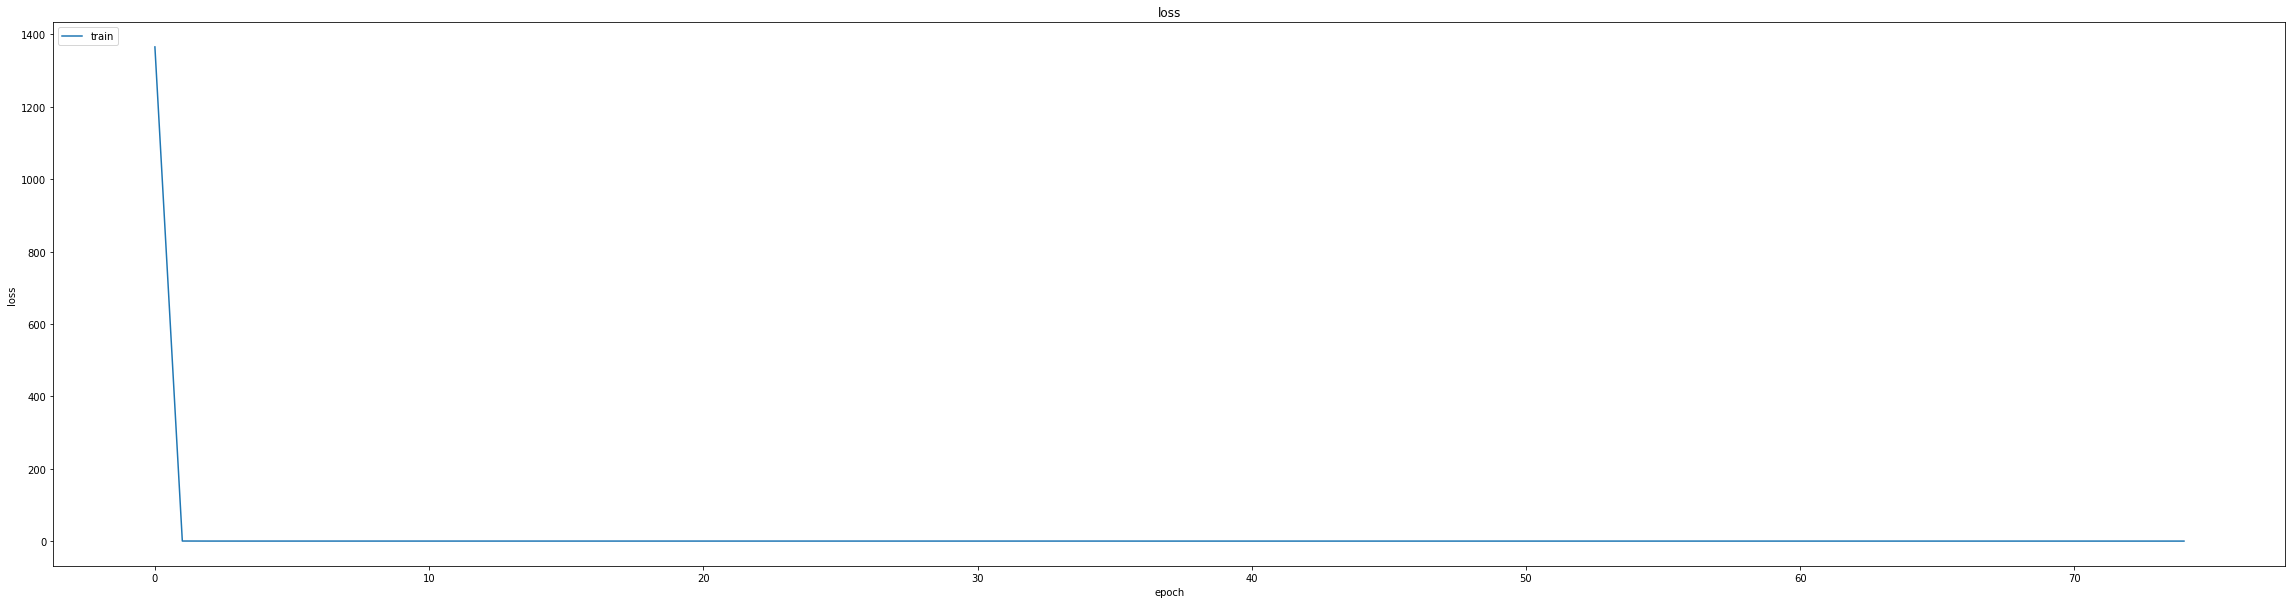

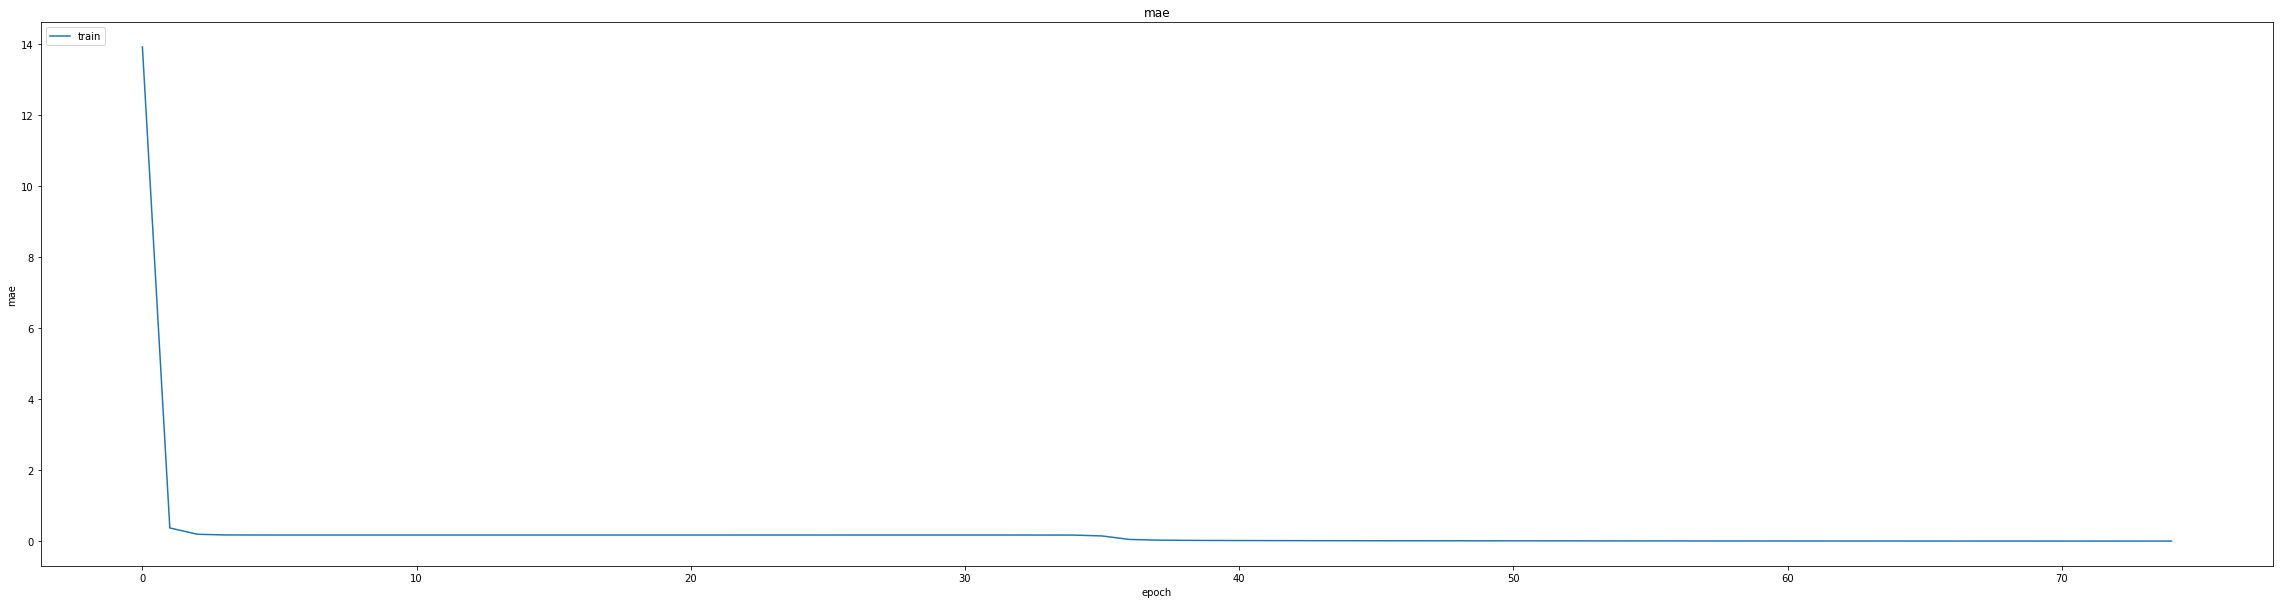

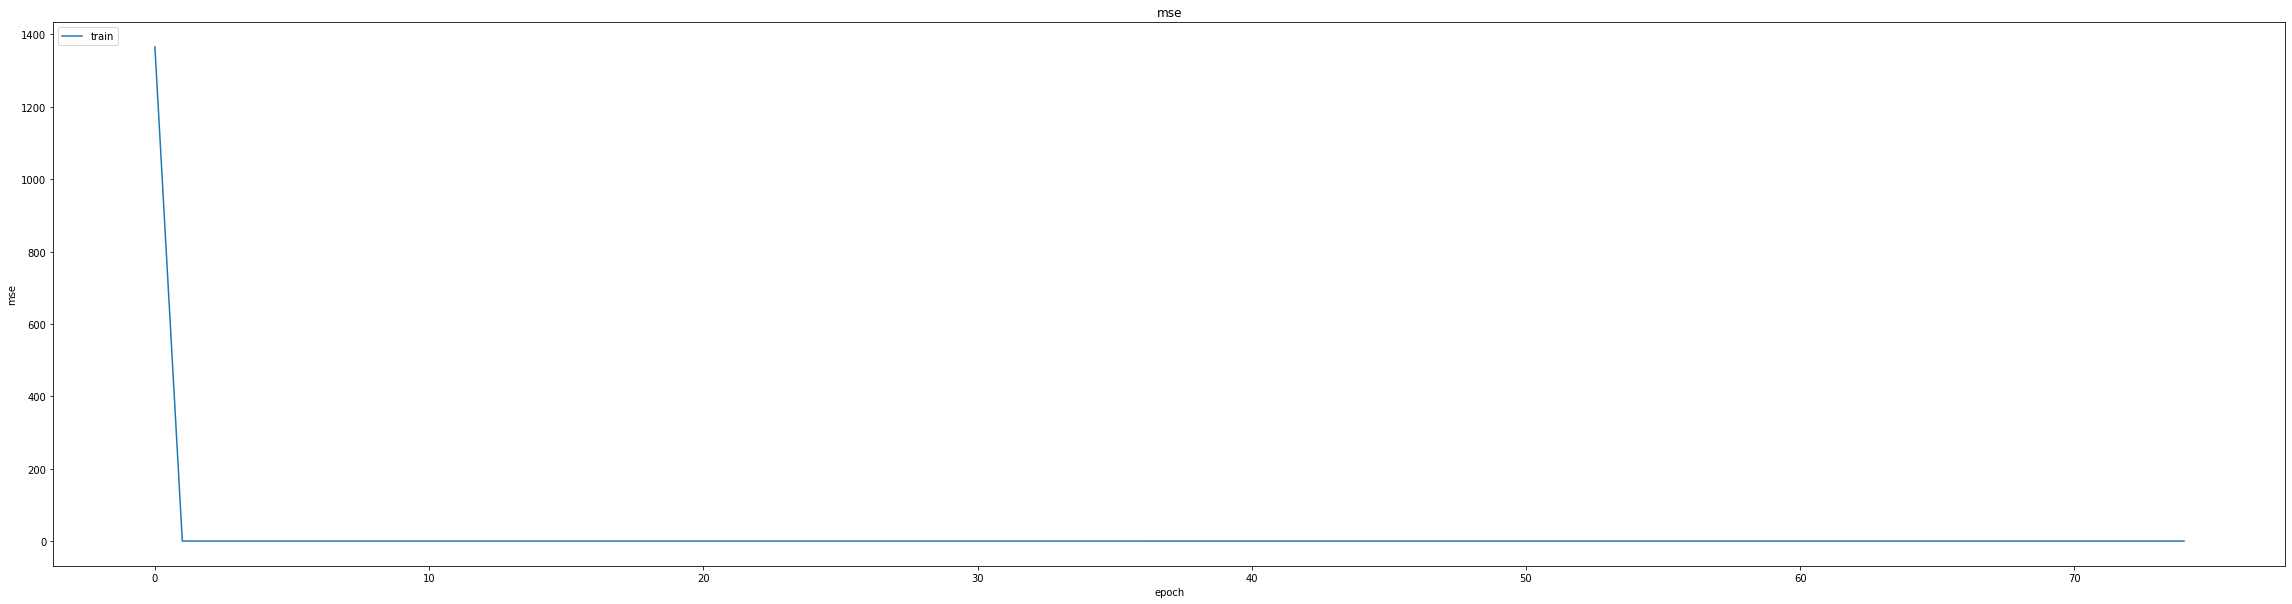

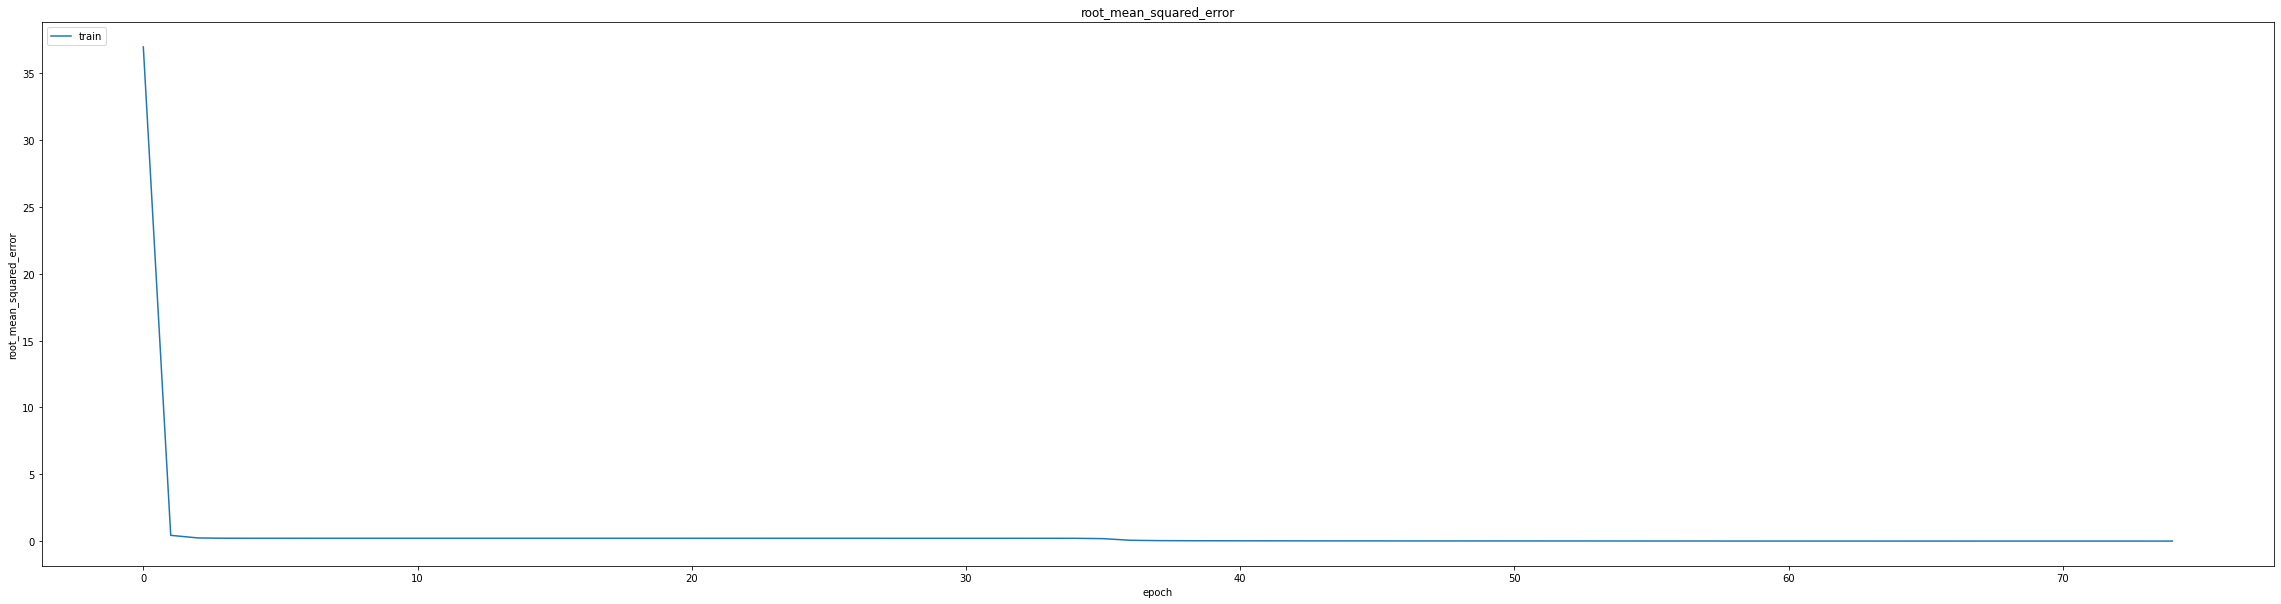

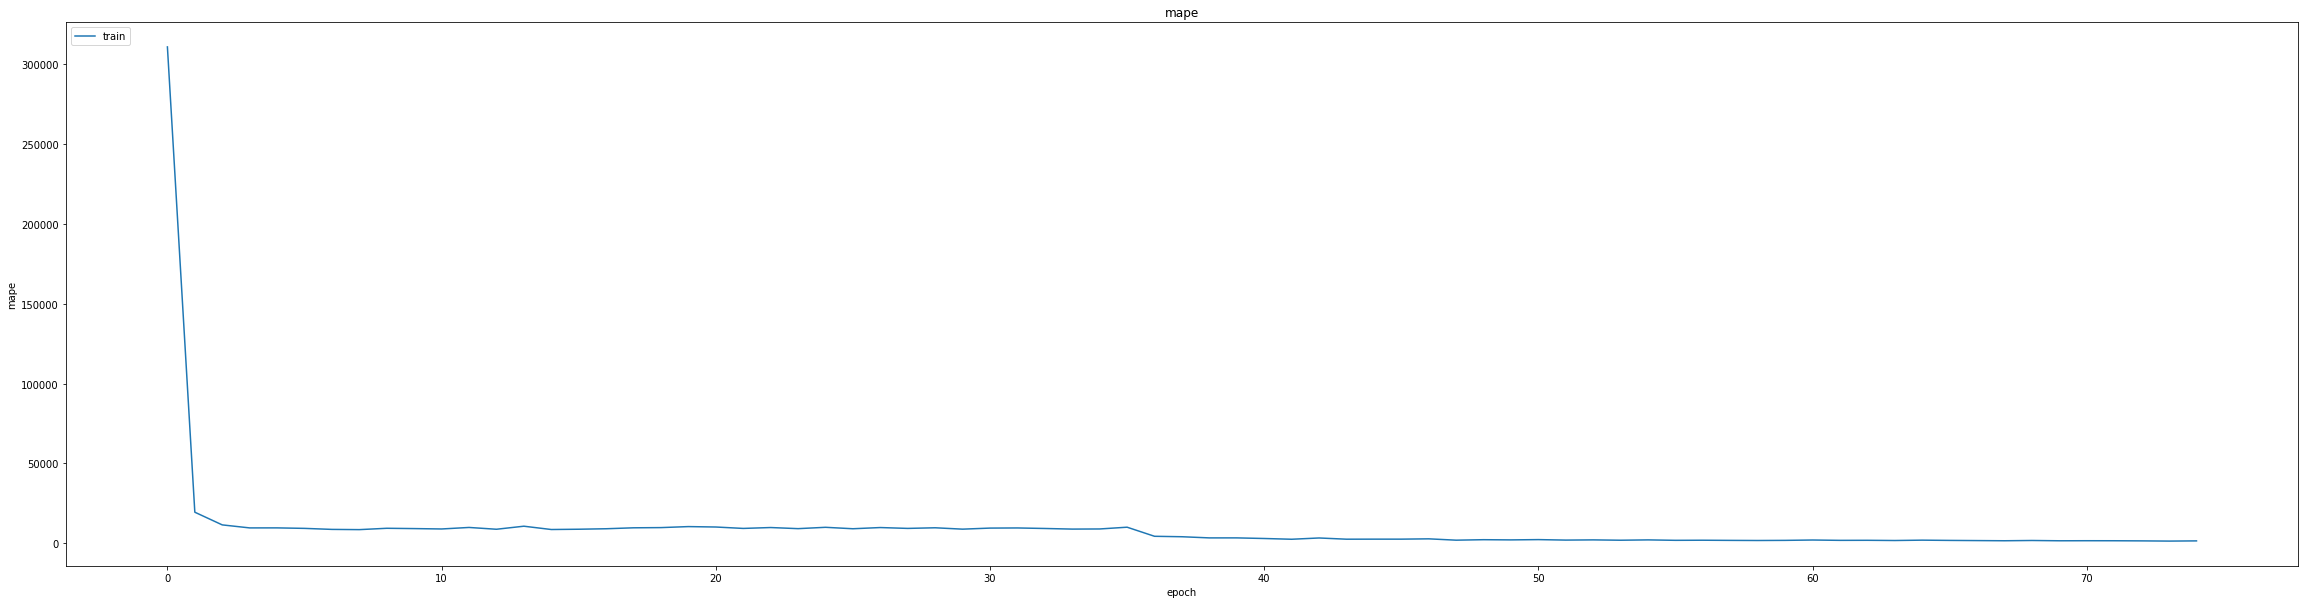

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013505791313946247
0.01909801922738552
348/348 [==============================] - 2s 4ms/step
0.9957771273630895


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 2.1541e-04 - mae: 0.0073 - mse: 2.1541e-04 - root_mean_squared_error: 0.0147 - mape: 1608.8676
Epoch 1: val_mse improved from 0.00036 to 0.00030, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 26s 50ms/step - loss: 2.1453e-04 - mae: 0.0072 - mse: 2.1453e-04 - root_mean_squared_error: 0.0146 - mape: 1601.2861 - val_loss: 3.0310e-04 - val_mae: 0.0117 - val_mse: 3.0310e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 28.1639 - lr: 0.0010
Epoch 2/25
406/406 [==============================] - ETA: 0s - loss: 3.4083e-05 - mae: 0.0043 - mse: 3.4083e-05 - root_mean_squared_error: 0.0058 - mape: 1434.1499
Epoch 2: val_mse did not improve from 0.00030
406/406 [==============================] - 5s 13ms/step - loss: 3.4083e-05 - mae: 0.0043 - mse: 3.4083e-05 - root_mean_squared_error: 0.0058 - mape: 1434.1499 - val_loss: 3.7319e-04 - val_mae: 0.0139 - val_mse: 3.7319e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 30.6126 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
406/406 [==============================] - ETA: 0s - loss: 3.3617e-05 - mae: 0.0043 - mse: 3.3617e-05 - root_mean_squared_error: 0.0058 - mape: 1460.4650
E

406/406 [==============================] - 17s 43ms/step - loss: 3.1565e-05 - mae: 0.0042 - mse: 3.1565e-05 - root_mean_squared_error: 0.0056 - mape: 1344.7751 - val_loss: 3.0301e-04 - val_mae: 0.0134 - val_mse: 3.0301e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 26.2914 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
404/406 [============================>.] - ETA: 0s - loss: 2.9612e-05 - mae: 0.0041 - mse: 2.9612e-05 - root_mean_squared_error: 0.0054 - mape: 1286.3734
Epoch 11: val_mse improved from 0.00030 to 0.00023, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)


406/406 [==============================] - 21s 52ms/step - loss: 2.9580e-05 - mae: 0.0041 - mse: 2.9580e-05 - root_mean_squared_error: 0.0054 - mape: 1280.3115 - val_loss: 2.2535e-04 - val_mae: 0.0101 - val_mse: 2.2535e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 24.5324 - lr: 5.9049e-04
Epoch 12/25
406/406 [==============================] - ETA: 0s - loss: 3.2342e-05 - mae: 0.0043 - mse: 3.2342e-05 - root_mean_squared_error: 0.0057 - mape: 1177.0415
Epoch 12: val_mse did not improve from 0.00023
406/406 [==============================] - 5s 12ms/step - loss: 3.2342e-05 - mae: 0.0043 - mse: 3.2342e-05 - root_mean_squared_error: 0.0057 - mape: 1177.0415 - val_loss: 2.6004e-04 - val_mae: 0.0118 - val_mse: 2.6004e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 25.5152 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
403/406 [============================>.] - ETA: 0s - loss: 2.7112e-05 - mae: 0.0039 - mse: 2.7112e-05 - root_mean_squared_error: 0.0052 - mape: 

406/406 [==============================] - 16s 41ms/step - loss: 2.7041e-05 - mae: 0.0039 - mse: 2.7041e-05 - root_mean_squared_error: 0.0052 - mape: 1280.9419 - val_loss: 2.1845e-04 - val_mae: 0.0104 - val_mse: 2.1845e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 23.7308 - lr: 5.3144e-04
Epoch 14/25
404/406 [============================>.] - ETA: 0s - loss: 3.1083e-05 - mae: 0.0042 - mse: 3.1083e-05 - root_mean_squared_error: 0.0056 - mape: 1194.4319
Epoch 14: val_mse did not improve from 0.00022
406/406 [==============================] - 5s 13ms/step - loss: 3.1109e-05 - mae: 0.0042 - mse: 3.1109e-05 - root_mean_squared_error: 0.0056 - mape: 1188.8053 - val_loss: 2.3707e-04 - val_mae: 0.0104 - val_mse: 2.3707e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 25.0612 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
406/406 [==============================] - ETA: 0s - loss: 2.6177e-05 - mae: 0.0038 - mse: 2.6177e-05 - root_mean_squared_error: 0.0051 - mape:

406/406 [==============================] - 16s 39ms/step - loss: 2.5834e-05 - mae: 0.0038 - mse: 2.5834e-05 - root_mean_squared_error: 0.0051 - mape: 1333.7075 - val_loss: 2.1127e-04 - val_mae: 0.0105 - val_mse: 2.1127e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 23.0545 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
404/406 [============================>.] - ETA: 0s - loss: 2.5304e-05 - mae: 0.0038 - mse: 2.5304e-05 - root_mean_squared_error: 0.0050 - mape: 1152.9332
Epoch 19: val_mse did not improve from 0.00021
406/406 [==============================] - 5s 12ms/step - loss: 2.5290e-05 - mae: 0.0038 - mse: 2.5290e-05 - root_mean_squared_error: 0.0050 - mape: 1147.5011 - val_loss: 2.4475e-04 - val_mae: 0.0117 - val_mse: 2.4475e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 24.3812 - lr: 3.8742e-04
Epoch 20/25
405/406 [============================>.] - ETA: 0s - loss: 2.2791e-05 - mae: 0.0035 - mse: 2.2791e-05 - root_mean_squared_error: 0.0048 - mape:

406/406 [==============================] - 16s 40ms/step - loss: 2.3080e-05 - mae: 0.0036 - mse: 2.3080e-05 - root_mean_squared_error: 0.0048 - mape: 1304.7189 - val_loss: 1.8677e-04 - val_mae: 0.0100 - val_mse: 1.8677e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 21.5912 - lr: 3.4868e-04
Epoch 22/25
401/406 [============================>.] - ETA: 0s - loss: 2.3220e-05 - mae: 0.0036 - mse: 2.3220e-05 - root_mean_squared_error: 0.0048 - mape: 1192.5217
Epoch 22: val_mse did not improve from 0.00019
406/406 [==============================] - 5s 11ms/step - loss: 2.3135e-05 - mae: 0.0035 - mse: 2.3135e-05 - root_mean_squared_error: 0.0048 - mape: 1178.0948 - val_loss: 2.4957e-04 - val_mae: 0.0125 - val_mse: 2.4957e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 23.4829 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
402/406 [============================>.] - ETA: 0s - loss: 2.1265e-05 - mae: 0.0034 - mse: 2.1265e-05 - root_mean_squared_error: 0.0046 - mape:

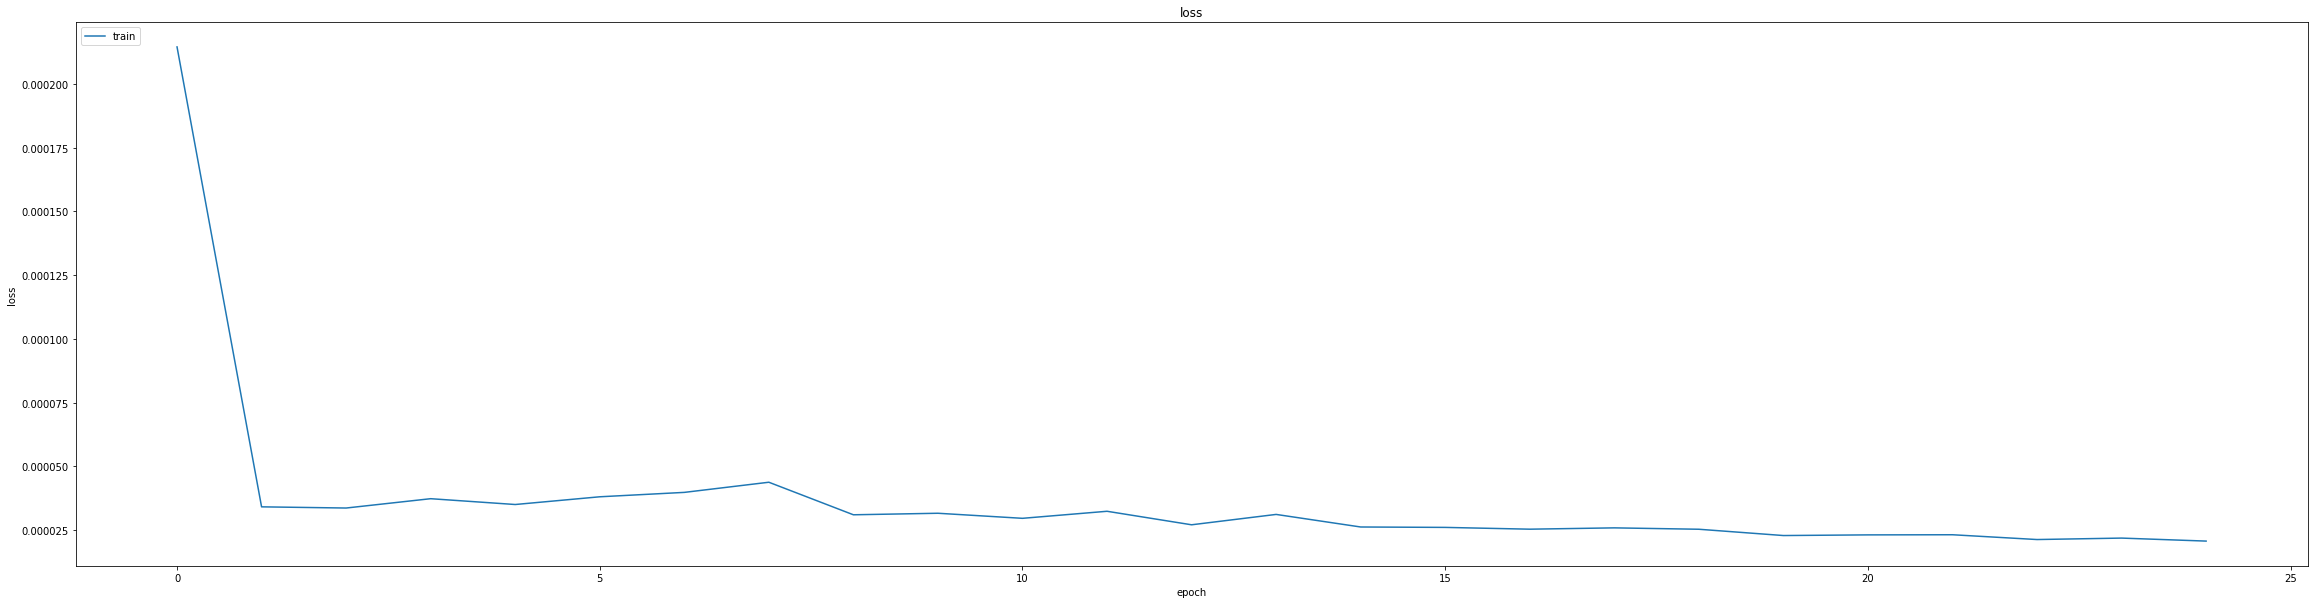

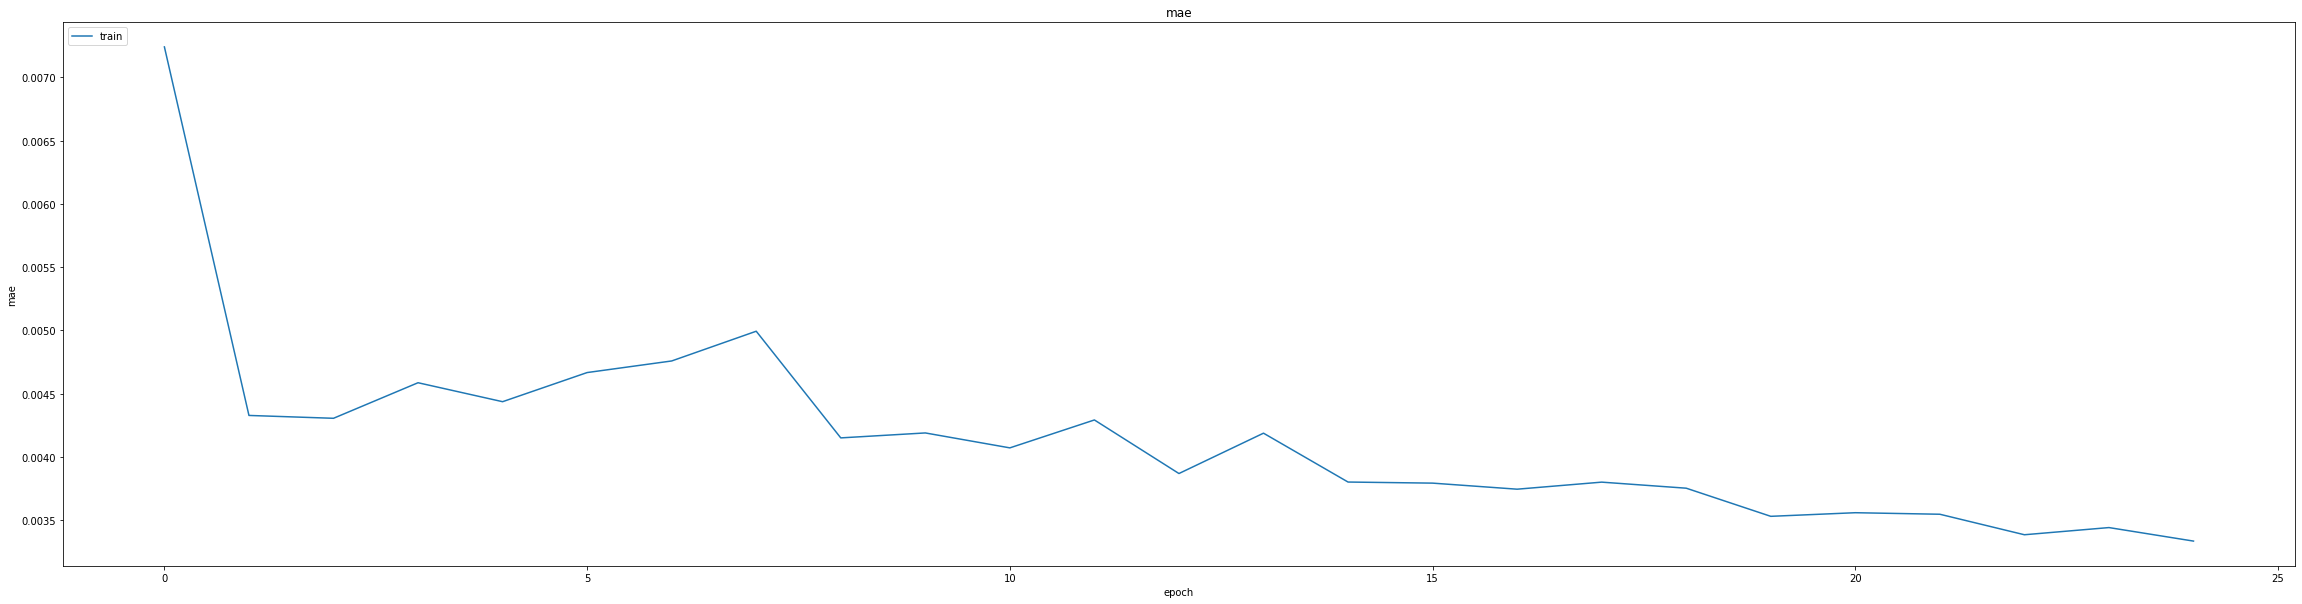

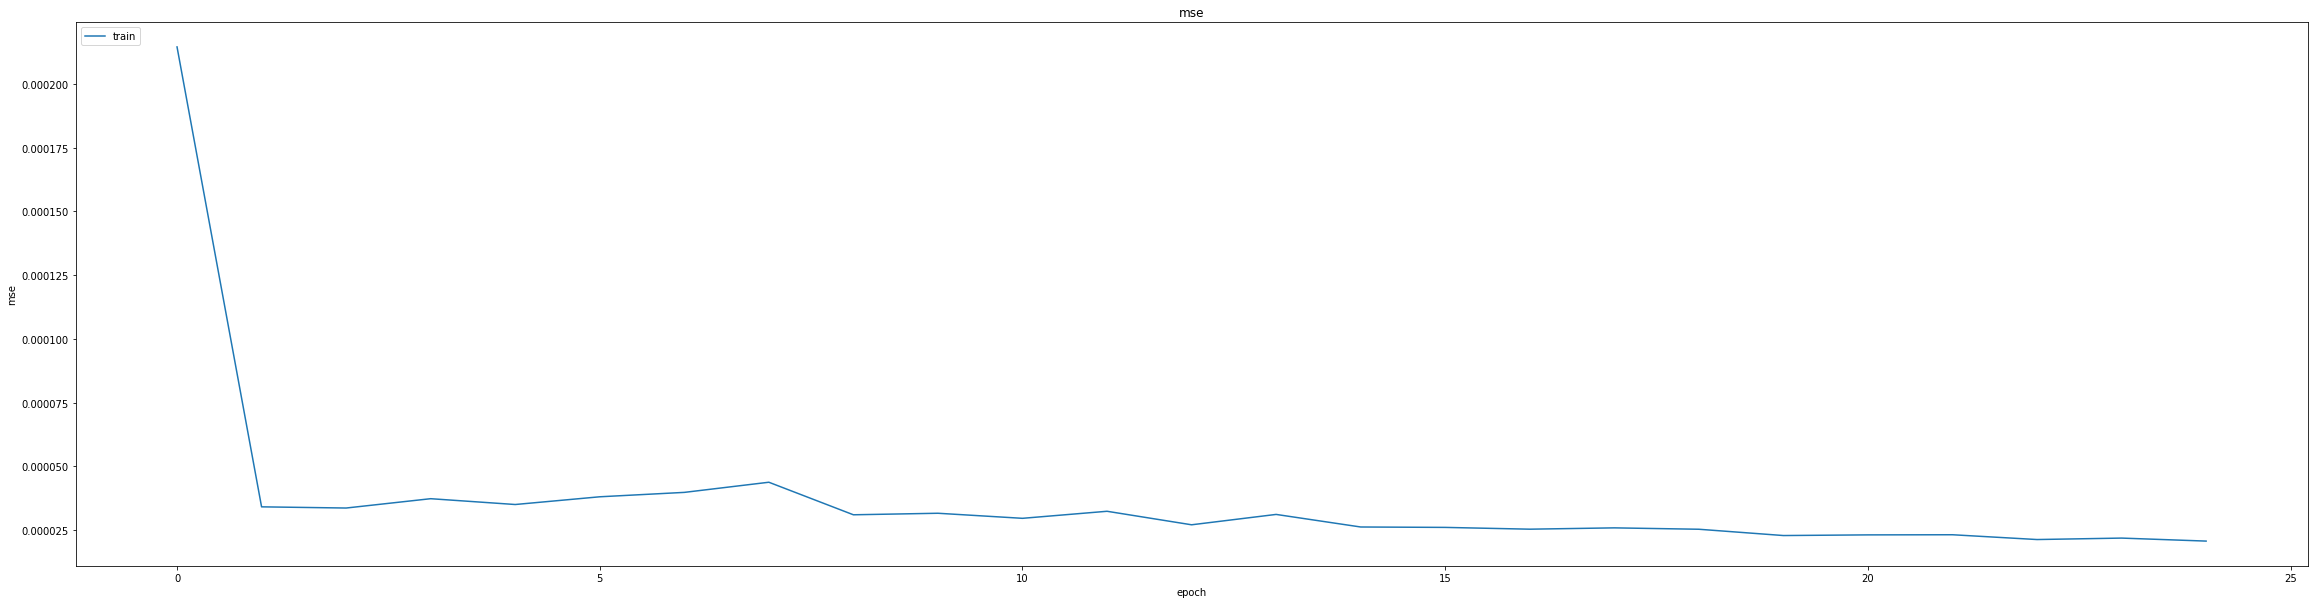

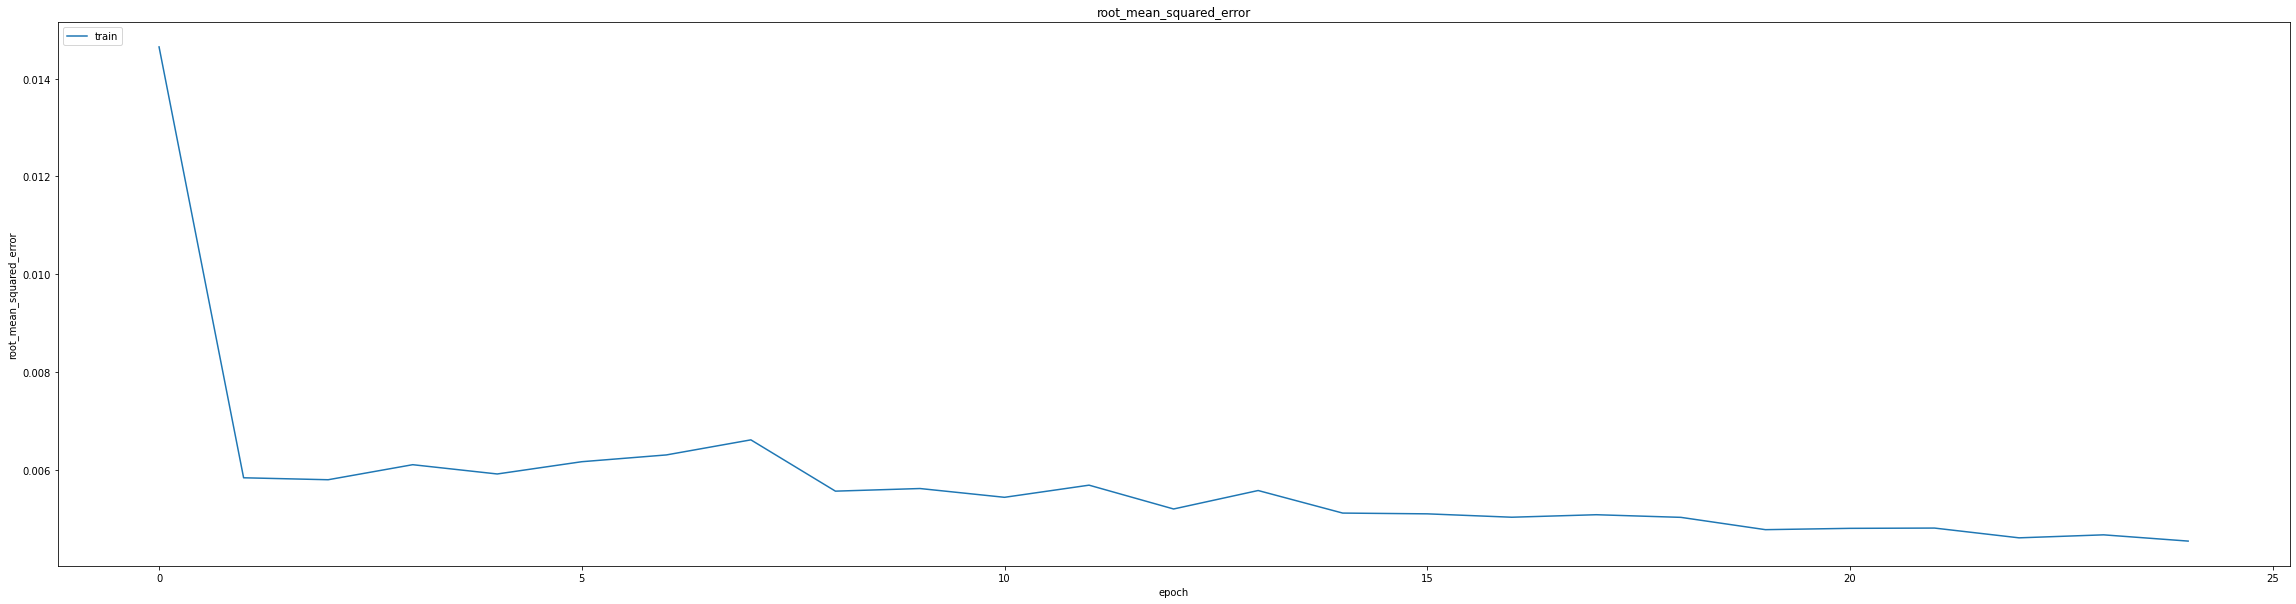

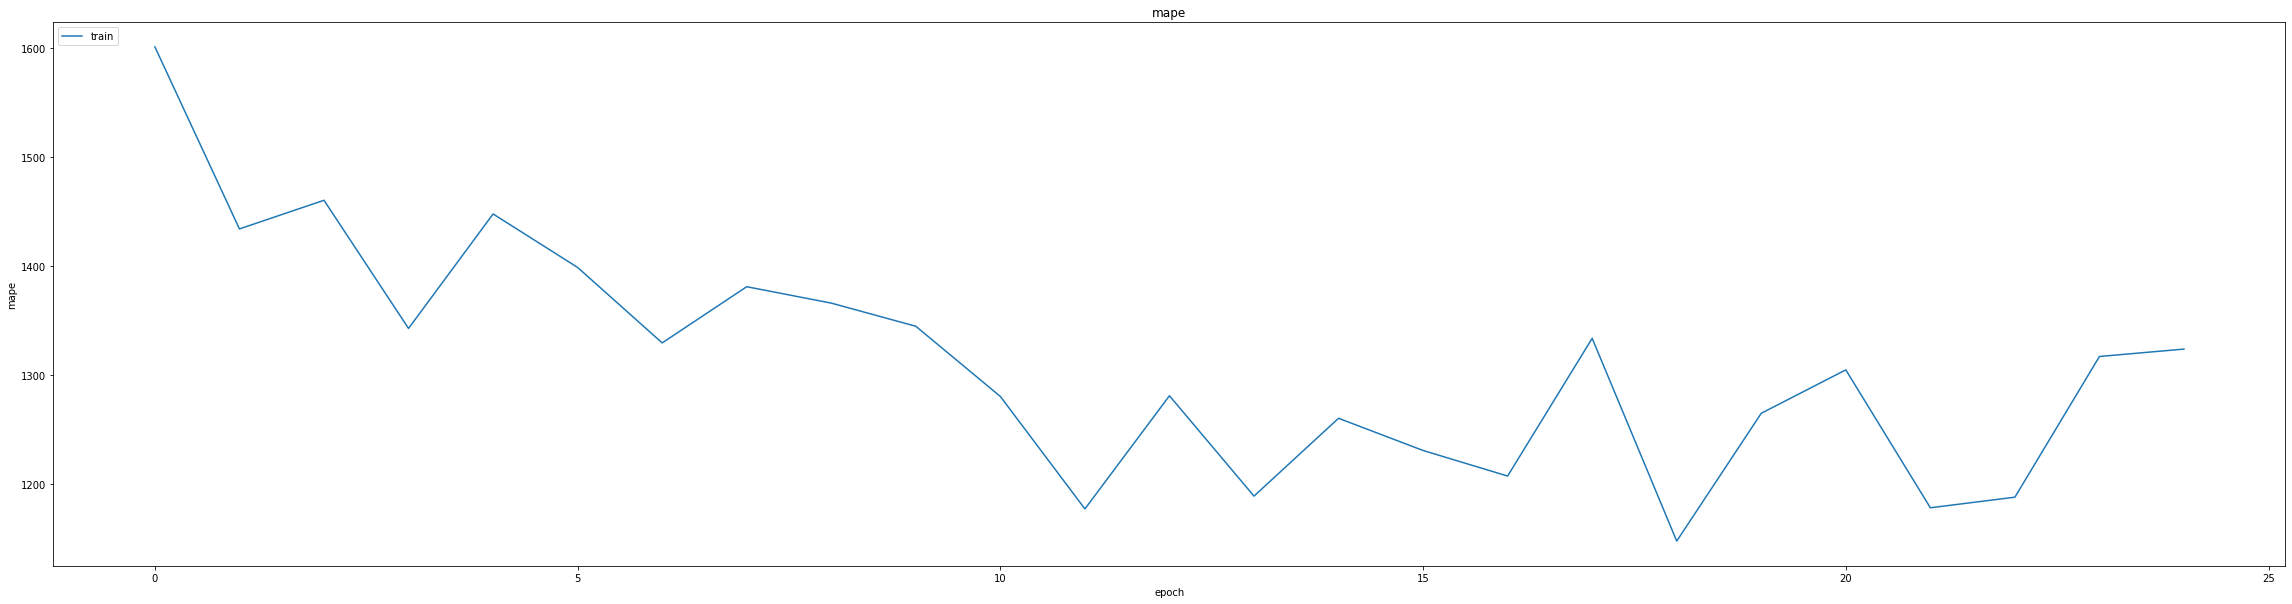

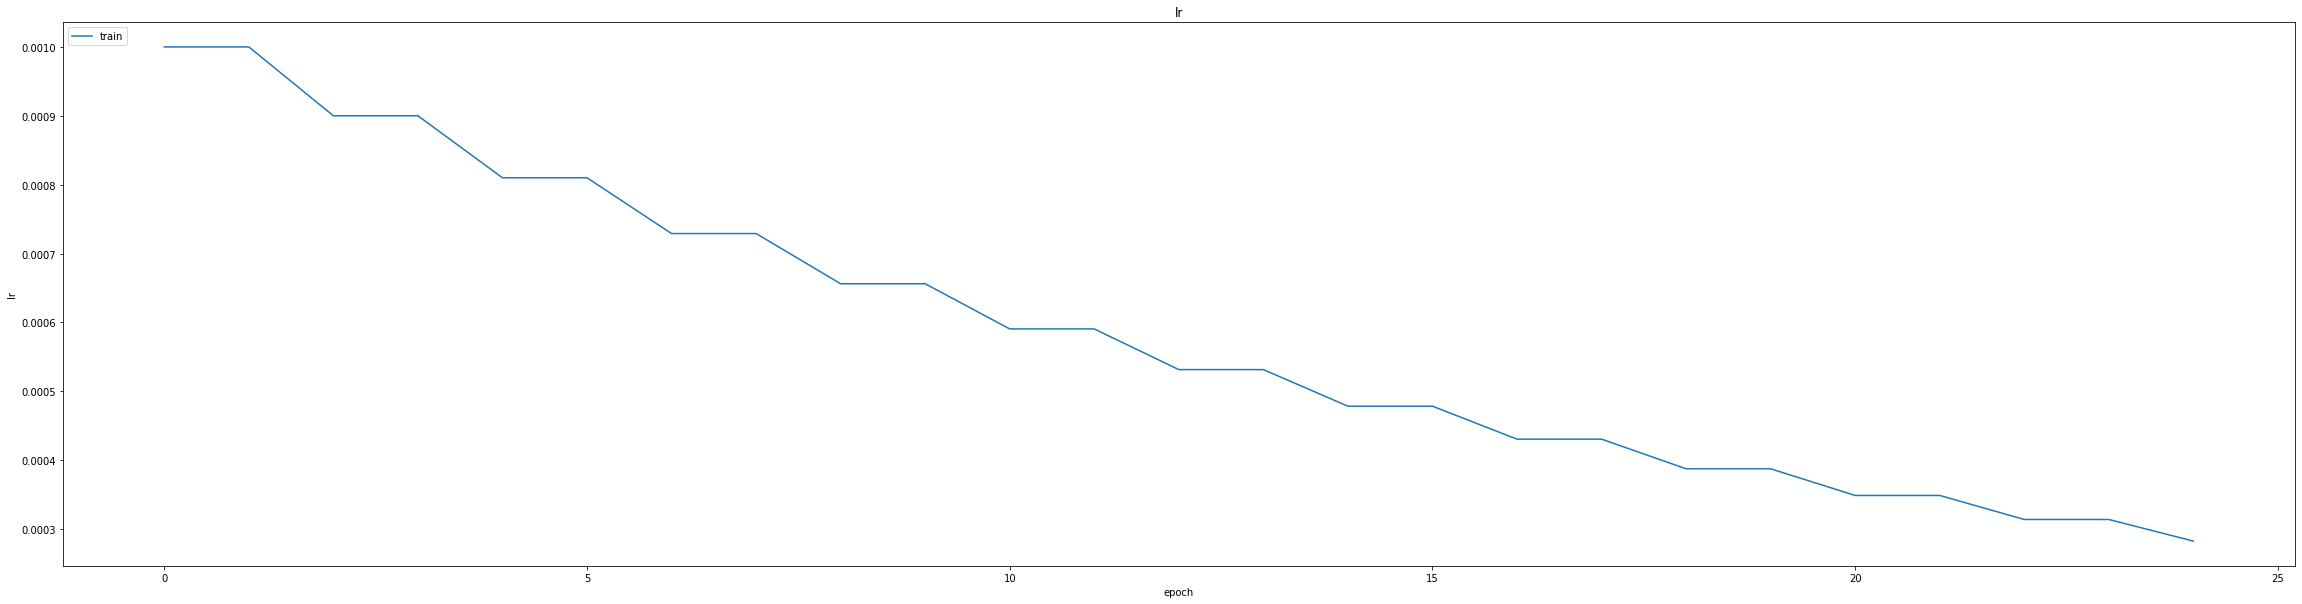

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009988559409976006
0.013666286133229733
348/348 [==============================] - 2s 4ms/step
0.9976072671233415


348/348 [==============================] - 1s 4ms/step


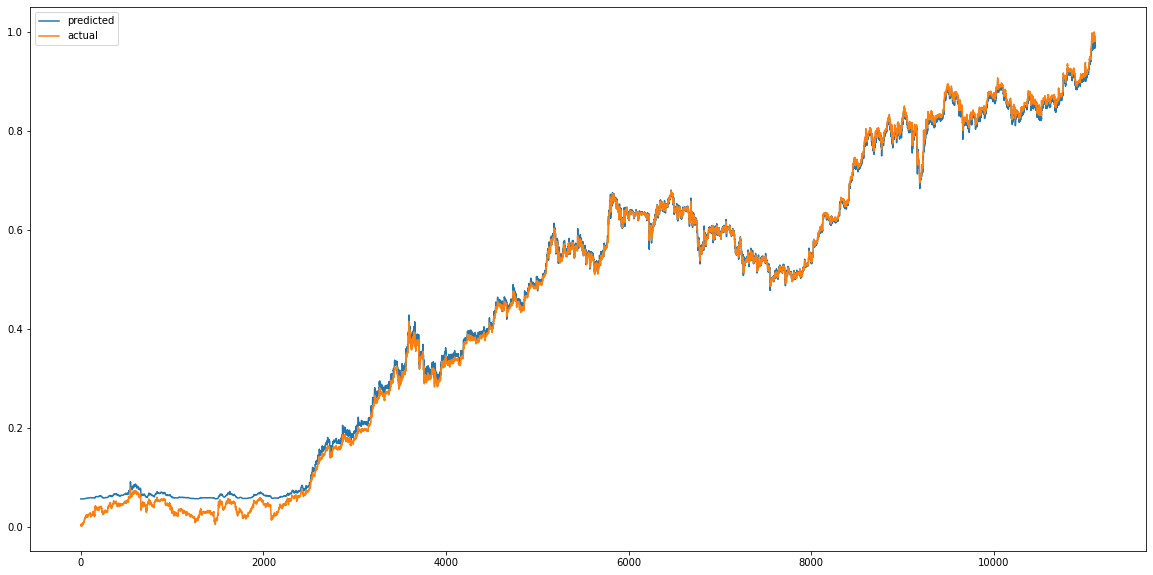

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


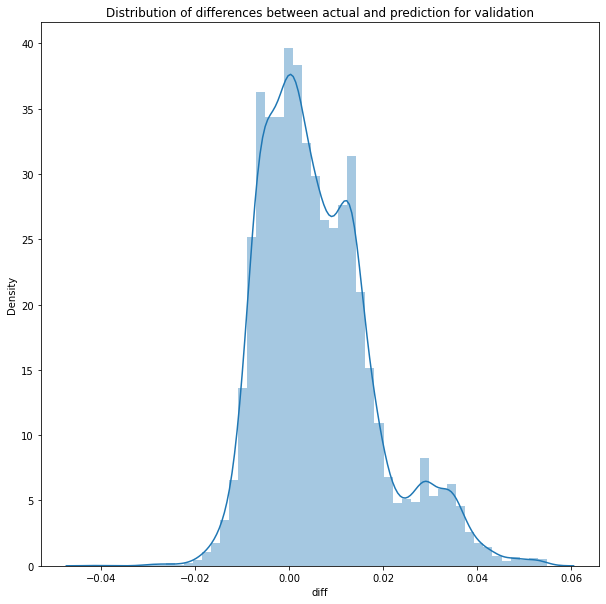

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


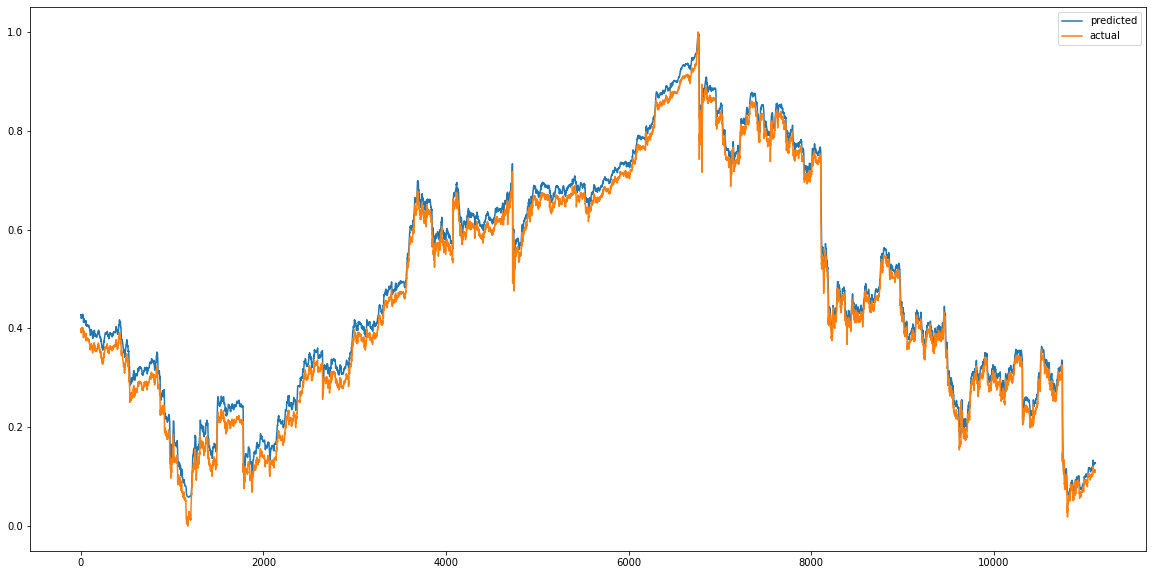

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


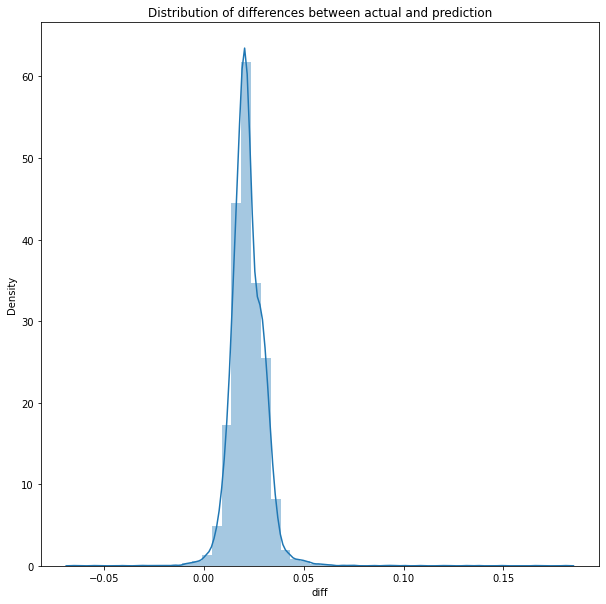

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005587872337523086
MAE :  0.02207571300525039
RMSE  : 0.023638680880123338
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9900146064965172


count    11115.000000
mean         0.021972
std          0.008719
min         -0.064773
25%          0.017153
50%          0.021247
75%          0.026711
max          0.181008
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_8 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_8 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_9 (GRU)                 (None, 16)                3936      
                                                                 
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75


401/406 [============================>.] - ETA: 0s - loss: 1370.4742 - mae: 16.7050 - mse: 1370.4742 - root_mean_squared_error: 37.0199 - mape: 223078.2656
Epoch 1: val_mse improved from inf to 8.32003, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 20s 37ms/step - loss: 1353.9875 - mae: 16.5383 - mse: 1353.9875 - root_mean_squared_error: 36.7966 - mape: 220387.0156 - val_loss: 8.3200 - val_mae: 2.8689 - val_mse: 8.3200 - val_root_mean_squared_error: 2.8844 - val_mape: 2777.5735
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 4.1527 - mae: 1.9788 - mse: 4.1527 - root_mean_squared_error: 2.0378 - mape: 45294.7539
Epoch 2: val_mse improved from 8.32003 to 1.89630, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 33ms/step - loss: 4.1366 - mae: 1.9744 - mse: 4.1366 - root_mean_squared_error: 2.0339 - mape: 44972.3711 - val_loss: 1.8963 - val_mae: 1.3444 - val_mse: 1.8963 - val_root_mean_squared_error: 1.3771 - val_mape: 1460.2085
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 1.1878 - mae: 1.0567 - mse: 1.1878 - root_mean_squared_error: 1.0899 - mape: 33754.9961
Epoch 3: val_mse improved from 1.89630 to 0.74677, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 1.1878 - mae: 1.0567 - mse: 1.1878 - root_mean_squared_error: 1.0899 - mape: 33754.9961 - val_loss: 0.7468 - val_mae: 0.8112 - val_mse: 0.7468 - val_root_mean_squared_error: 0.8642 - val_mape: 999.5015
Epoch 4/75
402/406 [============================>.] - ETA: 0s - loss: 0.4983 - mae: 0.6676 - mse: 0.4983 - root_mean_squared_error: 0.7059 - mape: 23815.2031
Epoch 4: val_mse improved from 0.74677 to 0.37817, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.4969 - mae: 0.6665 - mse: 0.4969 - root_mean_squared_error: 0.7049 - mape: 23587.4219 - val_loss: 0.3782 - val_mae: 0.5381 - val_mse: 0.3782 - val_root_mean_squared_error: 0.6150 - val_mape: 763.5128
Epoch 5/75
404/406 [============================>.] - ETA: 0s - loss: 0.2503 - mae: 0.4509 - mse: 0.2503 - root_mean_squared_error: 0.5003 - mape: 17969.5664
Epoch 5: val_mse improved from 0.37817 to 0.22726, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.2500 - mae: 0.4505 - mse: 0.2500 - root_mean_squared_error: 0.5000 - mape: 17885.3770 - val_loss: 0.2273 - val_mae: 0.3841 - val_mse: 0.2273 - val_root_mean_squared_error: 0.4767 - val_mape: 621.6398
Epoch 6/75
405/406 [============================>.] - ETA: 0s - loss: 0.1437 - mae: 0.3316 - mse: 0.1437 - root_mean_squared_error: 0.3791 - mape: 16397.1387
Epoch 6: val_mse improved from 0.22726 to 0.15747, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 33ms/step - loss: 0.1436 - mae: 0.3315 - mse: 0.1436 - root_mean_squared_error: 0.3790 - mape: 16360.4385 - val_loss: 0.1575 - val_mae: 0.3192 - val_mse: 0.1575 - val_root_mean_squared_error: 0.3968 - val_mape: 531.9830
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0934 - mae: 0.2650 - mse: 0.0934 - root_mean_squared_error: 0.3056 - mape: 14480.9492
Epoch 7: val_mse improved from 0.15747 to 0.12299, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0934 - mae: 0.2649 - mse: 0.0934 - root_mean_squared_error: 0.3056 - mape: 14448.5352 - val_loss: 0.1230 - val_mae: 0.2801 - val_mse: 0.1230 - val_root_mean_squared_error: 0.3507 - val_mape: 470.0522
Epoch 8/75
401/406 [============================>.] - ETA: 0s - loss: 0.0687 - mae: 0.2214 - mse: 0.0687 - root_mean_squared_error: 0.2622 - mape: 12787.9355
Epoch 8: val_mse improved from 0.12299 to 0.10545, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0686 - mae: 0.2212 - mse: 0.0686 - root_mean_squared_error: 0.2620 - mape: 12633.9678 - val_loss: 0.1054 - val_mae: 0.2615 - val_mse: 0.1054 - val_root_mean_squared_error: 0.3247 - val_mape: 426.8709
Epoch 9/75
401/406 [============================>.] - ETA: 0s - loss: 0.0564 - mae: 0.1949 - mse: 0.0564 - root_mean_squared_error: 0.2376 - mape: 11087.5869
Epoch 9: val_mse improved from 0.10545 to 0.09657, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0563 - mae: 0.1946 - mse: 0.0563 - root_mean_squared_error: 0.2374 - mape: 10954.0518 - val_loss: 0.0966 - val_mae: 0.2544 - val_mse: 0.0966 - val_root_mean_squared_error: 0.3108 - val_mape: 396.5468
Epoch 10/75
401/406 [============================>.] - ETA: 0s - loss: 0.0504 - mae: 0.1820 - mse: 0.0504 - root_mean_squared_error: 0.2245 - mape: 10847.8867
Epoch 10: val_mse improved from 0.09657 to 0.09219, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 33ms/step - loss: 0.0504 - mae: 0.1820 - mse: 0.0504 - root_mean_squared_error: 0.2244 - mape: 10717.2578 - val_loss: 0.0922 - val_mae: 0.2532 - val_mse: 0.0922 - val_root_mean_squared_error: 0.3036 - val_mape: 375.3968
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0477 - mae: 0.1771 - mse: 0.0477 - root_mean_squared_error: 0.2184 - mape: 10211.9766
Epoch 11: val_mse improved from 0.09219 to 0.09012, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0477 - mae: 0.1771 - mse: 0.0477 - root_mean_squared_error: 0.2184 - mape: 10211.9766 - val_loss: 0.0901 - val_mae: 0.2541 - val_mse: 0.0901 - val_root_mean_squared_error: 0.3002 - val_mape: 360.9696
Epoch 12/75
406/406 [==============================] - ETA: 0s - loss: 0.0466 - mae: 0.1754 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 9713.2305
Epoch 12: val_mse improved from 0.09012 to 0.08917, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0466 - mae: 0.1754 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 9713.2305 - val_loss: 0.0892 - val_mae: 0.2552 - val_mse: 0.0892 - val_root_mean_squared_error: 0.2986 - val_mape: 351.4197
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0461 - mae: 0.1749 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 9625.4150
Epoch 13: val_mse improved from 0.08917 to 0.08868, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0461 - mae: 0.1749 - mse: 0.0461 - root_mean_squared_error: 0.2148 - mape: 9556.7080 - val_loss: 0.0887 - val_mae: 0.2559 - val_mse: 0.0887 - val_root_mean_squared_error: 0.2978 - val_mape: 345.7387
Epoch 14/75
405/406 [============================>.] - ETA: 0s - loss: 0.0459 - mae: 0.1744 - mse: 0.0459 - root_mean_squared_error: 0.2141 - mape: 9492.1650
Epoch 14: val_mse improved from 0.08868 to 0.08803, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0458 - mae: 0.1744 - mse: 0.0458 - root_mean_squared_error: 0.2141 - mape: 9470.9336 - val_loss: 0.0880 - val_mae: 0.2555 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 342.6162
Epoch 15/75
406/406 [==============================] - ETA: 0s - loss: 0.0453 - mae: 0.1734 - mse: 0.0453 - root_mean_squared_error: 0.2129 - mape: 9551.3330
Epoch 15: val_mse improved from 0.08803 to 0.08654, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0453 - mae: 0.1734 - mse: 0.0453 - root_mean_squared_error: 0.2129 - mape: 9551.3330 - val_loss: 0.0865 - val_mae: 0.2535 - val_mse: 0.0865 - val_root_mean_squared_error: 0.2942 - val_mape: 338.9664
Epoch 16/75
401/406 [============================>.] - ETA: 0s - loss: 0.0435 - mae: 0.1696 - mse: 0.0435 - root_mean_squared_error: 0.2085 - mape: 9289.9639
Epoch 16: val_mse improved from 0.08654 to 0.08158, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0435 - mae: 0.1697 - mse: 0.0435 - root_mean_squared_error: 0.2085 - mape: 9178.1504 - val_loss: 0.0816 - val_mae: 0.2458 - val_mse: 0.0816 - val_root_mean_squared_error: 0.2856 - val_mape: 330.6654
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0357 - mae: 0.1518 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 9375.4570
Epoch 17: val_mse improved from 0.08158 to 0.06646, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0357 - mae: 0.1518 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 9375.4570 - val_loss: 0.0665 - val_mae: 0.2174 - val_mse: 0.0665 - val_root_mean_squared_error: 0.2578 - val_mape: 310.2471
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0244 - mae: 0.1205 - mse: 0.0244 - root_mean_squared_error: 0.1562 - mape: 8431.9639
Epoch 18: val_mse improved from 0.06646 to 0.04629, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0244 - mae: 0.1205 - mse: 0.0244 - root_mean_squared_error: 0.1561 - mape: 8413.0654 - val_loss: 0.0463 - val_mae: 0.1734 - val_mse: 0.0463 - val_root_mean_squared_error: 0.2151 - val_mape: 282.7415
Epoch 19/75
401/406 [============================>.] - ETA: 0s - loss: 0.0136 - mae: 0.0868 - mse: 0.0136 - root_mean_squared_error: 0.1166 - mape: 7723.4014
Epoch 19: val_mse improved from 0.04629 to 0.03129, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0136 - mae: 0.0866 - mse: 0.0136 - root_mean_squared_error: 0.1165 - mape: 7630.2451 - val_loss: 0.0313 - val_mae: 0.1379 - val_mse: 0.0313 - val_root_mean_squared_error: 0.1769 - val_mape: 246.3627
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 0.0088 - mae: 0.0687 - mse: 0.0088 - root_mean_squared_error: 0.0938 - mape: 6690.6338
Epoch 20: val_mse improved from 0.03129 to 0.02477, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0088 - mae: 0.0686 - mse: 0.0088 - root_mean_squared_error: 0.0938 - mape: 6642.7837 - val_loss: 0.0248 - val_mae: 0.1239 - val_mse: 0.0248 - val_root_mean_squared_error: 0.1574 - val_mape: 221.3511
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 0.0064 - mae: 0.0585 - mse: 0.0064 - root_mean_squared_error: 0.0802 - mape: 6071.4512
Epoch 21: val_mse improved from 0.02477 to 0.02036, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0064 - mae: 0.0585 - mse: 0.0064 - root_mean_squared_error: 0.0802 - mape: 6071.4512 - val_loss: 0.0204 - val_mae: 0.1125 - val_mse: 0.0204 - val_root_mean_squared_error: 0.1427 - val_mape: 202.0049
Epoch 22/75
403/406 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0510 - mse: 0.0049 - root_mean_squared_error: 0.0702 - mape: 5874.4844
Epoch 22: val_mse improved from 0.02036 to 0.01668, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0049 - mae: 0.0509 - mse: 0.0049 - root_mean_squared_error: 0.0701 - mape: 5832.4380 - val_loss: 0.0167 - val_mae: 0.0986 - val_mse: 0.0167 - val_root_mean_squared_error: 0.1291 - val_mape: 185.3972
Epoch 23/75
405/406 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0443 - mse: 0.0038 - root_mean_squared_error: 0.0613 - mape: 5501.3462
Epoch 23: val_mse improved from 0.01668 to 0.01452, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0038 - mae: 0.0443 - mse: 0.0038 - root_mean_squared_error: 0.0613 - mape: 5488.9907 - val_loss: 0.0145 - val_mae: 0.0928 - val_mse: 0.0145 - val_root_mean_squared_error: 0.1205 - val_mape: 172.0392
Epoch 24/75
402/406 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0388 - mse: 0.0029 - root_mean_squared_error: 0.0538 - mape: 5272.2563
Epoch 24: val_mse improved from 0.01452 to 0.01139, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0029 - mae: 0.0388 - mse: 0.0029 - root_mean_squared_error: 0.0538 - mape: 5221.5493 - val_loss: 0.0114 - val_mae: 0.0749 - val_mse: 0.0114 - val_root_mean_squared_error: 0.1067 - val_mape: 158.6559
Epoch 25/75
404/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0331 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 5133.4268
Epoch 25: val_mse improved from 0.01139 to 0.00969, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0021 - mae: 0.0330 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 5109.2661 - val_loss: 0.0097 - val_mae: 0.0706 - val_mse: 0.0097 - val_root_mean_squared_error: 0.0985 - val_mape: 145.9682
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0292 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 4407.9175
Epoch 26: val_mse improved from 0.00969 to 0.00879, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0016 - mae: 0.0292 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 4387.1802 - val_loss: 0.0088 - val_mae: 0.0713 - val_mse: 0.0088 - val_root_mean_squared_error: 0.0938 - val_mape: 136.5489
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0263 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 4259.2964
Epoch 27: val_mse improved from 0.00879 to 0.00689, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 0.0013 - mae: 0.0263 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 4259.2964 - val_loss: 0.0069 - val_mae: 0.0537 - val_mse: 0.0069 - val_root_mean_squared_error: 0.0830 - val_mape: 126.3331
Epoch 28/75
402/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0236 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 3986.3696
Epoch 28: val_mse improved from 0.00689 to 0.00626, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0010 - mae: 0.0236 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 3947.9939 - val_loss: 0.0063 - val_mae: 0.0538 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0791 - val_mape: 119.0545
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 8.3056e-04 - mae: 0.0213 - mse: 8.3056e-04 - root_mean_squared_error: 0.0288 - mape: 3891.2451
Epoch 29: val_mse improved from 0.00626 to 0.00545, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 8.3051e-04 - mae: 0.0213 - mse: 8.3051e-04 - root_mean_squared_error: 0.0288 - mape: 3882.4978 - val_loss: 0.0055 - val_mae: 0.0492 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0738 - val_mape: 111.8992
Epoch 30/75
402/406 [============================>.] - ETA: 0s - loss: 6.9975e-04 - mae: 0.0197 - mse: 6.9975e-04 - root_mean_squared_error: 0.0265 - mape: 3705.7578
Epoch 30: val_mse improved from 0.00545 to 0.00509, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 6.9947e-04 - mae: 0.0197 - mse: 6.9947e-04 - root_mean_squared_error: 0.0264 - mape: 3670.0720 - val_loss: 0.0051 - val_mae: 0.0497 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0714 - val_mape: 106.2390
Epoch 31/75
402/406 [============================>.] - ETA: 0s - loss: 6.3401e-04 - mae: 0.0188 - mse: 6.3401e-04 - root_mean_squared_error: 0.0252 - mape: 3570.5479
Epoch 31: val_mse improved from 0.00509 to 0.00428, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 6.3338e-04 - mae: 0.0188 - mse: 6.3338e-04 - root_mean_squared_error: 0.0252 - mape: 3536.1685 - val_loss: 0.0043 - val_mae: 0.0410 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0654 - val_mape: 100.7132
Epoch 32/75
402/406 [============================>.] - ETA: 0s - loss: 5.4597e-04 - mae: 0.0175 - mse: 5.4597e-04 - root_mean_squared_error: 0.0234 - mape: 3469.8931
Epoch 32: val_mse improved from 0.00428 to 0.00410, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 5.4581e-04 - mae: 0.0175 - mse: 5.4581e-04 - root_mean_squared_error: 0.0234 - mape: 3436.4797 - val_loss: 0.0041 - val_mae: 0.0435 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 96.9770
Epoch 33/75
402/406 [============================>.] - ETA: 0s - loss: 5.0237e-04 - mae: 0.0167 - mse: 5.0237e-04 - root_mean_squared_error: 0.0224 - mape: 3235.0405
Epoch 33: val_mse improved from 0.00410 to 0.00382, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 5.0226e-04 - mae: 0.0167 - mse: 5.0226e-04 - root_mean_squared_error: 0.0224 - mape: 3203.8872 - val_loss: 0.0038 - val_mae: 0.0424 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0618 - val_mape: 93.0019
Epoch 34/75
406/406 [==============================] - ETA: 0s - loss: 4.7179e-04 - mae: 0.0162 - mse: 4.7179e-04 - root_mean_squared_error: 0.0217 - mape: 3114.9380
Epoch 34: val_mse improved from 0.00382 to 0.00347, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 4.7179e-04 - mae: 0.0162 - mse: 4.7179e-04 - root_mean_squared_error: 0.0217 - mape: 3114.9380 - val_loss: 0.0035 - val_mae: 0.0394 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0589 - val_mape: 89.6737
Epoch 35/75
402/406 [============================>.] - ETA: 0s - loss: 4.3726e-04 - mae: 0.0156 - mse: 4.3726e-04 - root_mean_squared_error: 0.0209 - mape: 3188.4775
Epoch 35: val_mse improved from 0.00347 to 0.00321, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.3687e-04 - mae: 0.0156 - mse: 4.3687e-04 - root_mean_squared_error: 0.0209 - mape: 3157.7725 - val_loss: 0.0032 - val_mae: 0.0375 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0567 - val_mape: 86.5414
Epoch 36/75
401/406 [============================>.] - ETA: 0s - loss: 4.1282e-04 - mae: 0.0151 - mse: 4.1282e-04 - root_mean_squared_error: 0.0203 - mape: 3035.8875
Epoch 36: val_mse improved from 0.00321 to 0.00307, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.1280e-04 - mae: 0.0151 - mse: 4.1280e-04 - root_mean_squared_error: 0.0203 - mape: 2999.1880 - val_loss: 0.0031 - val_mae: 0.0378 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0554 - val_mape: 84.2276
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 3.9725e-04 - mae: 0.0148 - mse: 3.9725e-04 - root_mean_squared_error: 0.0199 - mape: 2930.2603
Epoch 37: val_mse improved from 0.00307 to 0.00301, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 3.9753e-04 - mae: 0.0149 - mse: 3.9753e-04 - root_mean_squared_error: 0.0199 - mape: 2916.4619 - val_loss: 0.0030 - val_mae: 0.0381 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0548 - val_mape: 82.4266
Epoch 38/75
405/406 [============================>.] - ETA: 0s - loss: 3.7407e-04 - mae: 0.0144 - mse: 3.7407e-04 - root_mean_squared_error: 0.0193 - mape: 2794.0200
Epoch 38: val_mse improved from 0.00301 to 0.00276, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 3.7377e-04 - mae: 0.0144 - mse: 3.7377e-04 - root_mean_squared_error: 0.0193 - mape: 2787.7351 - val_loss: 0.0028 - val_mae: 0.0356 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0526 - val_mape: 79.8454
Epoch 39/75
401/406 [============================>.] - ETA: 0s - loss: 3.5898e-04 - mae: 0.0141 - mse: 3.5898e-04 - root_mean_squared_error: 0.0189 - mape: 2816.3765
Epoch 39: val_mse improved from 0.00276 to 0.00261, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 3.5850e-04 - mae: 0.0141 - mse: 3.5850e-04 - root_mean_squared_error: 0.0189 - mape: 2782.3223 - val_loss: 0.0026 - val_mae: 0.0343 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0511 - val_mape: 78.0880
Epoch 40/75
405/406 [============================>.] - ETA: 0s - loss: 3.3699e-04 - mae: 0.0136 - mse: 3.3699e-04 - root_mean_squared_error: 0.0184 - mape: 2799.3806
Epoch 40: val_mse improved from 0.00261 to 0.00239, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 3.3710e-04 - mae: 0.0136 - mse: 3.3710e-04 - root_mean_squared_error: 0.0184 - mape: 2793.0857 - val_loss: 0.0024 - val_mae: 0.0323 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 75.1322
Epoch 41/75
406/406 [==============================] - ETA: 0s - loss: 3.3223e-04 - mae: 0.0135 - mse: 3.3223e-04 - root_mean_squared_error: 0.0182 - mape: 2757.0474
Epoch 41: val_mse improved from 0.00239 to 0.00225, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 3.3223e-04 - mae: 0.0135 - mse: 3.3223e-04 - root_mean_squared_error: 0.0182 - mape: 2757.0474 - val_loss: 0.0023 - val_mae: 0.0307 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0474 - val_mape: 73.7995
Epoch 42/75
401/406 [============================>.] - ETA: 0s - loss: 3.2081e-04 - mae: 0.0133 - mse: 3.2081e-04 - root_mean_squared_error: 0.0179 - mape: 2604.4294
Epoch 42: val_mse improved from 0.00225 to 0.00220, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 3.2019e-04 - mae: 0.0133 - mse: 3.2019e-04 - root_mean_squared_error: 0.0179 - mape: 2572.9373 - val_loss: 0.0022 - val_mae: 0.0313 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0469 - val_mape: 72.1756
Epoch 43/75
402/406 [============================>.] - ETA: 0s - loss: 3.0518e-04 - mae: 0.0130 - mse: 3.0518e-04 - root_mean_squared_error: 0.0175 - mape: 2577.1750
Epoch 43: val_mse did not improve from 0.00220
406/406 [==============================] - 4s 10ms/step - loss: 3.0471e-04 - mae: 0.0130 - mse: 3.0471e-04 - root_mean_squared_error: 0.0175 - mape: 2552.3550 - val_loss: 0.0022 - val_mae: 0.0338 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0473 - val_mape: 70.7253
Epoch 44/75
406/406 [==============================] - ETA: 0s - loss: 2.8613e-04 - mae: 0.0126 - mse: 2.8613e-04 - root_mean_squared_error: 0.0169 - mape: 2566.0859
Epoch 44: val_mse improved from 0.00220 to 0.00198, saving model to /content

406/406 [==============================] - 15s 38ms/step - loss: 2.8613e-04 - mae: 0.0126 - mse: 2.8613e-04 - root_mean_squared_error: 0.0169 - mape: 2566.0859 - val_loss: 0.0020 - val_mae: 0.0295 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0445 - val_mape: 68.4756
Epoch 45/75
401/406 [============================>.] - ETA: 0s - loss: 2.7600e-04 - mae: 0.0123 - mse: 2.7600e-04 - root_mean_squared_error: 0.0166 - mape: 2506.7239
Epoch 45: val_mse improved from 0.00198 to 0.00195, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 2.7571e-04 - mae: 0.0123 - mse: 2.7571e-04 - root_mean_squared_error: 0.0166 - mape: 2476.4128 - val_loss: 0.0020 - val_mae: 0.0304 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0442 - val_mape: 67.3958
Epoch 46/75
402/406 [============================>.] - ETA: 0s - loss: 2.7587e-04 - mae: 0.0124 - mse: 2.7587e-04 - root_mean_squared_error: 0.0166 - mape: 2426.6270
Epoch 46: val_mse improved from 0.00195 to 0.00188, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 2.7626e-04 - mae: 0.0124 - mse: 2.7626e-04 - root_mean_squared_error: 0.0166 - mape: 2403.2632 - val_loss: 0.0019 - val_mae: 0.0293 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0433 - val_mape: 67.0604
Epoch 47/75
406/406 [==============================] - ETA: 0s - loss: 2.6593e-04 - mae: 0.0121 - mse: 2.6593e-04 - root_mean_squared_error: 0.0163 - mape: 2461.5701
Epoch 47: val_mse improved from 0.00188 to 0.00185, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 2.6593e-04 - mae: 0.0121 - mse: 2.6593e-04 - root_mean_squared_error: 0.0163 - mape: 2461.5701 - val_loss: 0.0019 - val_mae: 0.0305 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0431 - val_mape: 64.9996
Epoch 48/75
401/406 [============================>.] - ETA: 0s - loss: 2.4756e-04 - mae: 0.0117 - mse: 2.4756e-04 - root_mean_squared_error: 0.0157 - mape: 2488.0615
Epoch 48: val_mse improved from 0.00185 to 0.00172, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 2.4708e-04 - mae: 0.0117 - mse: 2.4708e-04 - root_mean_squared_error: 0.0157 - mape: 2457.9746 - val_loss: 0.0017 - val_mae: 0.0273 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0415 - val_mape: 64.7896
Epoch 49/75
401/406 [============================>.] - ETA: 0s - loss: 2.3305e-04 - mae: 0.0113 - mse: 2.3305e-04 - root_mean_squared_error: 0.0153 - mape: 2435.8679
Epoch 49: val_mse improved from 0.00172 to 0.00163, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 2.3249e-04 - mae: 0.0113 - mse: 2.3249e-04 - root_mean_squared_error: 0.0152 - mape: 2406.4119 - val_loss: 0.0016 - val_mae: 0.0272 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mape: 62.4208
Epoch 50/75
406/406 [==============================] - ETA: 0s - loss: 2.2660e-04 - mae: 0.0112 - mse: 2.2660e-04 - root_mean_squared_error: 0.0151 - mape: 2311.6655
Epoch 50: val_mse did not improve from 0.00163
406/406 [==============================] - 4s 10ms/step - loss: 2.2660e-04 - mae: 0.0112 - mse: 2.2660e-04 - root_mean_squared_error: 0.0151 - mape: 2311.6655 - val_loss: 0.0016 - val_mae: 0.0283 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 61.8398
Epoch 51/75
406/406 [==============================] - ETA: 0s - loss: 2.2010e-04 - mae: 0.0110 - mse: 2.2010e-04 - root_mean_squared_error: 0.0148 - mape: 2307.2874
Epoch 51: val_mse improved from 0.00163 to 0.00148, saving model to /content

406/406 [==============================] - 14s 35ms/step - loss: 2.2010e-04 - mae: 0.0110 - mse: 2.2010e-04 - root_mean_squared_error: 0.0148 - mape: 2307.2874 - val_loss: 0.0015 - val_mae: 0.0242 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 60.3712
Epoch 52/75
403/406 [============================>.] - ETA: 0s - loss: 2.2088e-04 - mae: 0.0111 - mse: 2.2088e-04 - root_mean_squared_error: 0.0149 - mape: 2276.8057
Epoch 52: val_mse did not improve from 0.00148
406/406 [==============================] - 4s 11ms/step - loss: 2.2057e-04 - mae: 0.0111 - mse: 2.2057e-04 - root_mean_squared_error: 0.0149 - mape: 2260.4812 - val_loss: 0.0016 - val_mae: 0.0268 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 60.8861
Epoch 53/75
403/406 [============================>.] - ETA: 0s - loss: 2.1514e-04 - mae: 0.0109 - mse: 2.1514e-04 - root_mean_squared_error: 0.0147 - mape: 2273.8008
Epoch 53: val_mse did not improve from 0.00148
406/406 [====================

406/406 [==============================] - 14s 35ms/step - loss: 2.0023e-04 - mae: 0.0105 - mse: 2.0023e-04 - root_mean_squared_error: 0.0142 - mape: 2298.6155 - val_loss: 0.0014 - val_mae: 0.0241 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 59.6796
Epoch 55/75
403/406 [============================>.] - ETA: 0s - loss: 1.8969e-04 - mae: 0.0103 - mse: 1.8969e-04 - root_mean_squared_error: 0.0138 - mape: 2355.5029
Epoch 55: val_mse improved from 0.00144 to 0.00134, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 1.8919e-04 - mae: 0.0102 - mse: 1.8919e-04 - root_mean_squared_error: 0.0138 - mape: 2338.6101 - val_loss: 0.0013 - val_mae: 0.0228 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0366 - val_mape: 57.6271
Epoch 56/75
403/406 [============================>.] - ETA: 0s - loss: 1.8718e-04 - mae: 0.0102 - mse: 1.8718e-04 - root_mean_squared_error: 0.0137 - mape: 2235.4636
Epoch 56: val_mse did not improve from 0.00134
406/406 [==============================] - 4s 11ms/step - loss: 1.8679e-04 - mae: 0.0102 - mse: 1.8679e-04 - root_mean_squared_error: 0.0137 - mape: 2219.4302 - val_loss: 0.0014 - val_mae: 0.0247 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 57.7231
Epoch 57/75
404/406 [============================>.] - ETA: 0s - loss: 1.8798e-04 - mae: 0.0103 - mse: 1.8798e-04 - root_mean_squared_error: 0.0137 - mape: 2245.9719
Epoch 57: val_mse improved from 0.00134 to 0.00133, saving model to /content

406/406 [==============================] - 15s 36ms/step - loss: 1.8784e-04 - mae: 0.0102 - mse: 1.8784e-04 - root_mean_squared_error: 0.0137 - mape: 2235.3933 - val_loss: 0.0013 - val_mae: 0.0248 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 56.4626
Epoch 58/75
403/406 [============================>.] - ETA: 0s - loss: 1.7397e-04 - mae: 0.0099 - mse: 1.7397e-04 - root_mean_squared_error: 0.0132 - mape: 2172.0073
Epoch 58: val_mse improved from 0.00133 to 0.00131, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 1.7389e-04 - mae: 0.0099 - mse: 1.7389e-04 - root_mean_squared_error: 0.0132 - mape: 2156.4333 - val_loss: 0.0013 - val_mae: 0.0239 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 56.7032
Epoch 59/75
402/406 [============================>.] - ETA: 0s - loss: 1.8591e-04 - mae: 0.0102 - mse: 1.8591e-04 - root_mean_squared_error: 0.0136 - mape: 2188.5957
Epoch 59: val_mse did not improve from 0.00131
406/406 [==============================] - 4s 10ms/step - loss: 1.8572e-04 - mae: 0.0102 - mse: 1.8572e-04 - root_mean_squared_error: 0.0136 - mape: 2167.5166 - val_loss: 0.0014 - val_mae: 0.0247 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0367 - val_mape: 57.8276
Epoch 60/75
401/406 [============================>.] - ETA: 0s - loss: 1.6710e-04 - mae: 0.0097 - mse: 1.6710e-04 - root_mean_squared_error: 0.0129 - mape: 2222.4207
Epoch 60: val_mse improved from 0.00131 to 0.00126, saving model to /content

406/406 [==============================] - 14s 35ms/step - loss: 1.6669e-04 - mae: 0.0097 - mse: 1.6669e-04 - root_mean_squared_error: 0.0129 - mape: 2195.5430 - val_loss: 0.0013 - val_mae: 0.0231 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0354 - val_mape: 55.5202
Epoch 61/75
401/406 [============================>.] - ETA: 0s - loss: 1.5846e-04 - mae: 0.0094 - mse: 1.5846e-04 - root_mean_squared_error: 0.0126 - mape: 2339.6680
Epoch 61: val_mse improved from 0.00126 to 0.00118, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 1.5780e-04 - mae: 0.0094 - mse: 1.5780e-04 - root_mean_squared_error: 0.0126 - mape: 2311.3689 - val_loss: 0.0012 - val_mae: 0.0218 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 54.5806
Epoch 62/75
402/406 [============================>.] - ETA: 0s - loss: 1.4220e-04 - mae: 0.0089 - mse: 1.4220e-04 - root_mean_squared_error: 0.0119 - mape: 2114.1152
Epoch 62: val_mse improved from 0.00118 to 0.00116, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 1.4178e-04 - mae: 0.0089 - mse: 1.4178e-04 - root_mean_squared_error: 0.0119 - mape: 2093.7493 - val_loss: 0.0012 - val_mae: 0.0230 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 52.9086
Epoch 63/75
405/406 [============================>.] - ETA: 0s - loss: 1.3561e-04 - mae: 0.0087 - mse: 1.3561e-04 - root_mean_squared_error: 0.0116 - mape: 2236.7461
Epoch 63: val_mse improved from 0.00116 to 0.00105, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 1.3569e-04 - mae: 0.0087 - mse: 1.3569e-04 - root_mean_squared_error: 0.0116 - mape: 2231.7173 - val_loss: 0.0011 - val_mae: 0.0205 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0324 - val_mape: 51.6889
Epoch 64/75
402/406 [============================>.] - ETA: 0s - loss: 1.5592e-04 - mae: 0.0093 - mse: 1.5592e-04 - root_mean_squared_error: 0.0125 - mape: 2124.3481
Epoch 64: val_mse did not improve from 0.00105
406/406 [==============================] - 4s 10ms/step - loss: 1.5553e-04 - mae: 0.0093 - mse: 1.5553e-04 - root_mean_squared_error: 0.0125 - mape: 2103.8826 - val_loss: 0.0011 - val_mae: 0.0229 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 53.3920
Epoch 65/75
402/406 [============================>.] - ETA: 0s - loss: 1.3312e-04 - mae: 0.0087 - mse: 1.3312e-04 - root_mean_squared_error: 0.0115 - mape: 2051.0417
Epoch 65: val_mse did not improve from 0.00105
406/406 [====================

406/406 [==============================] - 14s 35ms/step - loss: 1.2163e-04 - mae: 0.0083 - mse: 1.2163e-04 - root_mean_squared_error: 0.0110 - mape: 2036.3866 - val_loss: 9.8698e-04 - val_mae: 0.0196 - val_mse: 9.8698e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 50.3900
Epoch 67/75
404/406 [============================>.] - ETA: 0s - loss: 1.2559e-04 - mae: 0.0084 - mse: 1.2559e-04 - root_mean_squared_error: 0.0112 - mape: 2066.5591
Epoch 67: val_mse did not improve from 0.00099
406/406 [==============================] - 4s 11ms/step - loss: 1.2531e-04 - mae: 0.0084 - mse: 1.2531e-04 - root_mean_squared_error: 0.0112 - mape: 2056.8228 - val_loss: 0.0010 - val_mae: 0.0199 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0317 - val_mape: 50.9604
Epoch 68/75
401/406 [============================>.] - ETA: 0s - loss: 1.1144e-04 - mae: 0.0079 - mse: 1.1144e-04 - root_mean_squared_error: 0.0106 - mape: 2003.5721
Epoch 68: val_mse improved from 0.00099 to 0.00096, saving model to 

406/406 [==============================] - 15s 36ms/step - loss: 1.1131e-04 - mae: 0.0079 - mse: 1.1131e-04 - root_mean_squared_error: 0.0106 - mape: 1979.3411 - val_loss: 9.5520e-04 - val_mae: 0.0190 - val_mse: 9.5520e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 49.7977
Epoch 69/75
405/406 [============================>.] - ETA: 0s - loss: 1.1784e-04 - mae: 0.0082 - mse: 1.1784e-04 - root_mean_squared_error: 0.0109 - mape: 2020.0361
Epoch 69: val_mse improved from 0.00096 to 0.00095, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 1.1788e-04 - mae: 0.0082 - mse: 1.1788e-04 - root_mean_squared_error: 0.0109 - mape: 2015.4926 - val_loss: 9.4633e-04 - val_mae: 0.0188 - val_mse: 9.4633e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 49.4822
Epoch 70/75
404/406 [============================>.] - ETA: 0s - loss: 1.0201e-04 - mae: 0.0076 - mse: 1.0201e-04 - root_mean_squared_error: 0.0101 - mape: 2020.5968
Epoch 70: val_mse did not improve from 0.00095
406/406 [==============================] - 4s 10ms/step - loss: 1.0212e-04 - mae: 0.0076 - mse: 1.0212e-04 - root_mean_squared_error: 0.0101 - mape: 2011.0793 - val_loss: 0.0010 - val_mae: 0.0242 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 48.2830
Epoch 71/75
404/406 [============================>.] - ETA: 0s - loss: 1.0515e-04 - mae: 0.0077 - mse: 1.0515e-04 - root_mean_squared_error: 0.0103 - mape: 1991.1688
Epoch 71: val_mse improved from 0.00095 to 0.00092, saving model to 

406/406 [==============================] - 14s 34ms/step - loss: 1.0500e-04 - mae: 0.0077 - mse: 1.0500e-04 - root_mean_squared_error: 0.0102 - mape: 1981.7871 - val_loss: 9.1678e-04 - val_mae: 0.0195 - val_mse: 9.1678e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 48.7373
Epoch 72/75
405/406 [============================>.] - ETA: 0s - loss: 8.9212e-05 - mae: 0.0071 - mse: 8.9212e-05 - root_mean_squared_error: 0.0094 - mape: 1965.8649
Epoch 72: val_mse improved from 0.00092 to 0.00090, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 8.9146e-05 - mae: 0.0071 - mse: 8.9146e-05 - root_mean_squared_error: 0.0094 - mape: 1961.4414 - val_loss: 9.0322e-04 - val_mae: 0.0195 - val_mse: 9.0322e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 48.2947
Epoch 73/75
402/406 [============================>.] - ETA: 0s - loss: 9.0028e-05 - mae: 0.0072 - mse: 9.0028e-05 - root_mean_squared_error: 0.0095 - mape: 1999.2285
Epoch 73: val_mse improved from 0.00090 to 0.00087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 9.0103e-05 - mae: 0.0072 - mse: 9.0103e-05 - root_mean_squared_error: 0.0095 - mape: 1979.9696 - val_loss: 8.6974e-04 - val_mae: 0.0198 - val_mse: 8.6974e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 46.6921
Epoch 74/75
404/406 [============================>.] - ETA: 0s - loss: 8.4861e-05 - mae: 0.0069 - mse: 8.4861e-05 - root_mean_squared_error: 0.0092 - mape: 1899.8247
Epoch 74: val_mse improved from 0.00087 to 0.00085, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 8.4967e-05 - mae: 0.0069 - mse: 8.4967e-05 - root_mean_squared_error: 0.0092 - mape: 1890.8752 - val_loss: 8.5110e-04 - val_mae: 0.0202 - val_mse: 8.5110e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 45.7877
Epoch 75/75
402/406 [============================>.] - ETA: 0s - loss: 8.4200e-05 - mae: 0.0069 - mse: 8.4200e-05 - root_mean_squared_error: 0.0092 - mape: 1965.8693
Epoch 75: val_mse improved from 0.00085 to 0.00082, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 8.3931e-05 - mae: 0.0069 - mse: 8.3931e-05 - root_mean_squared_error: 0.0092 - mape: 1946.9282 - val_loss: 8.1826e-04 - val_mae: 0.0177 - val_mse: 8.1826e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 46.1333


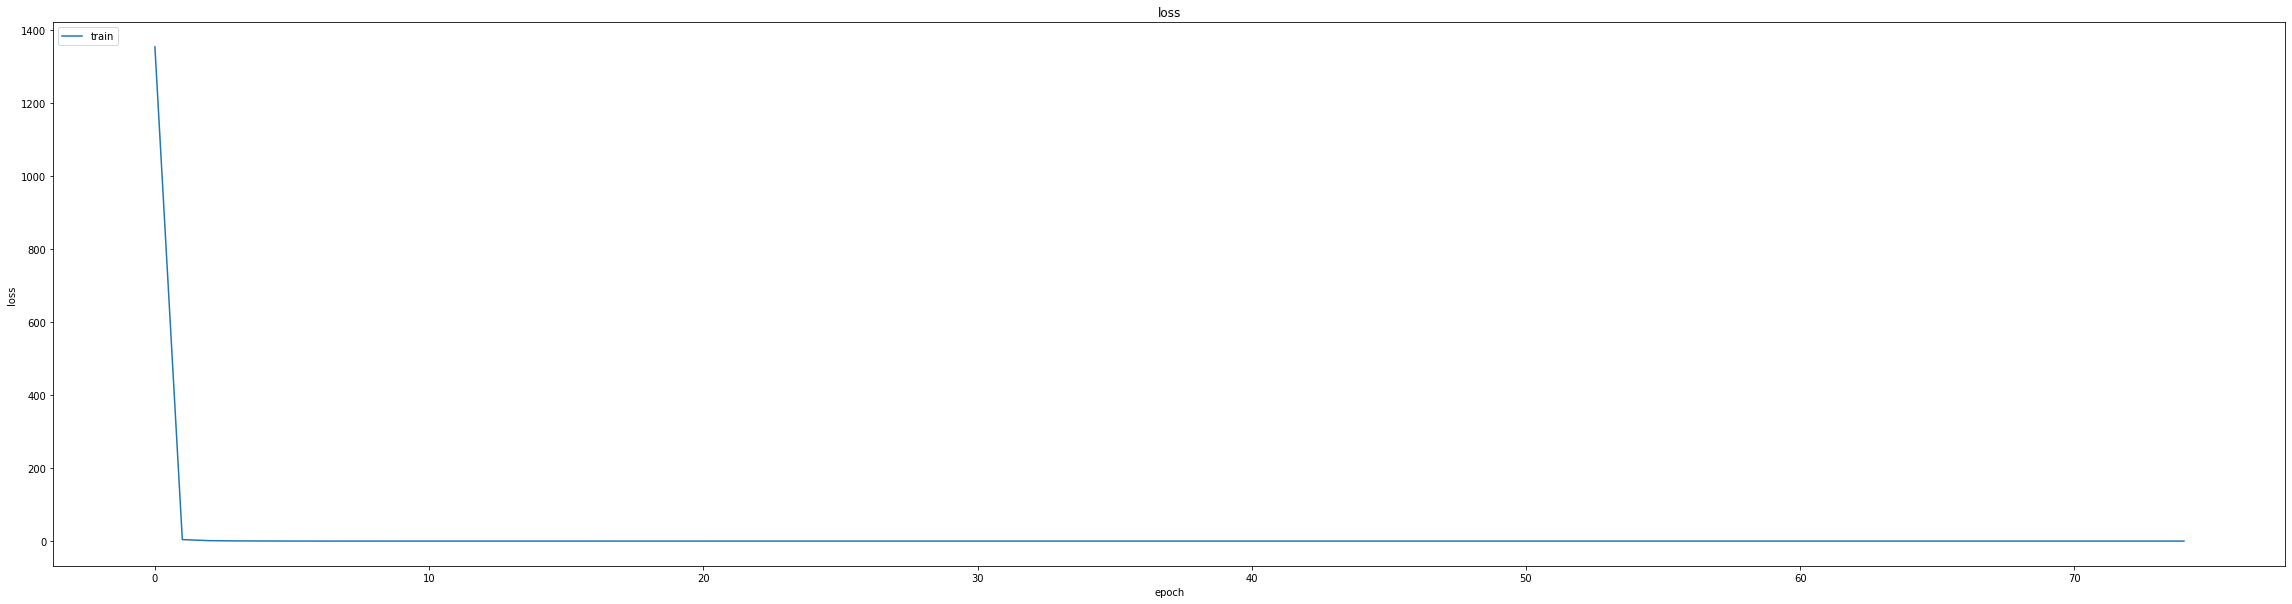

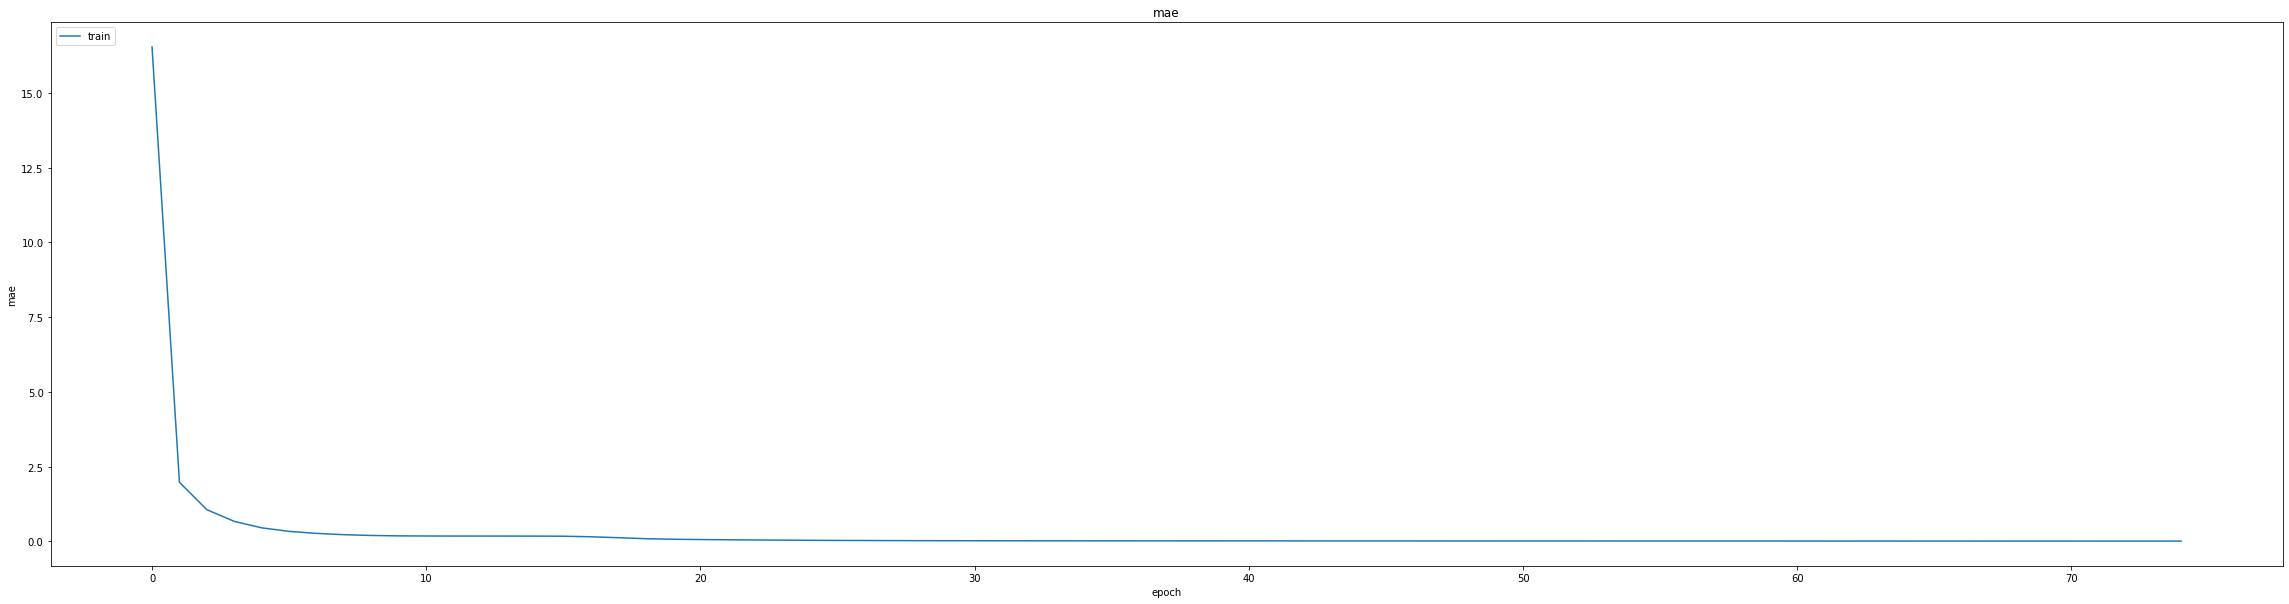

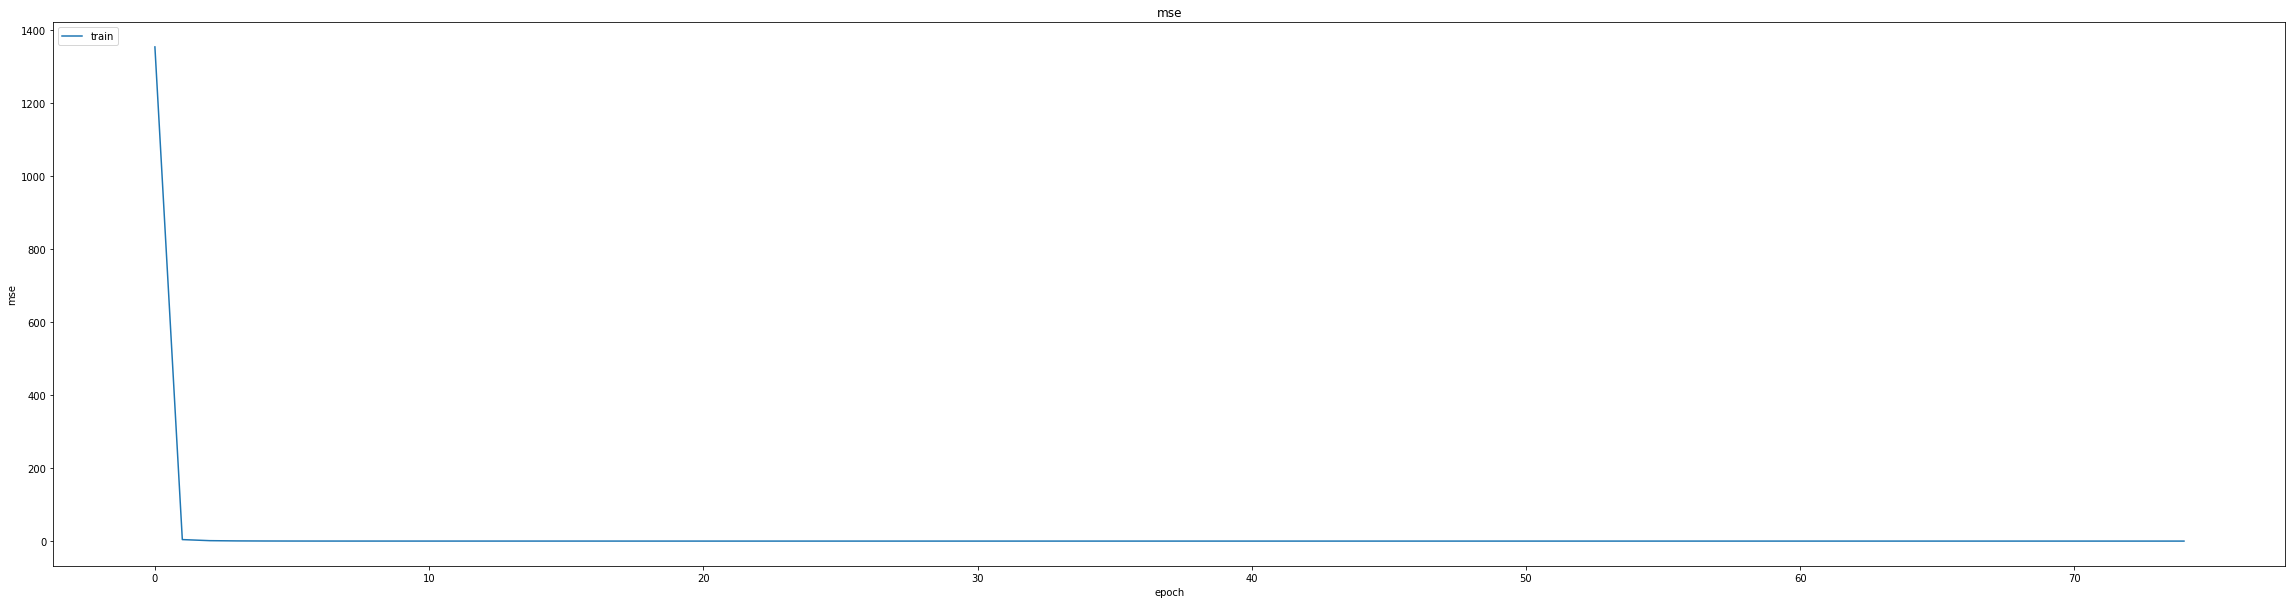

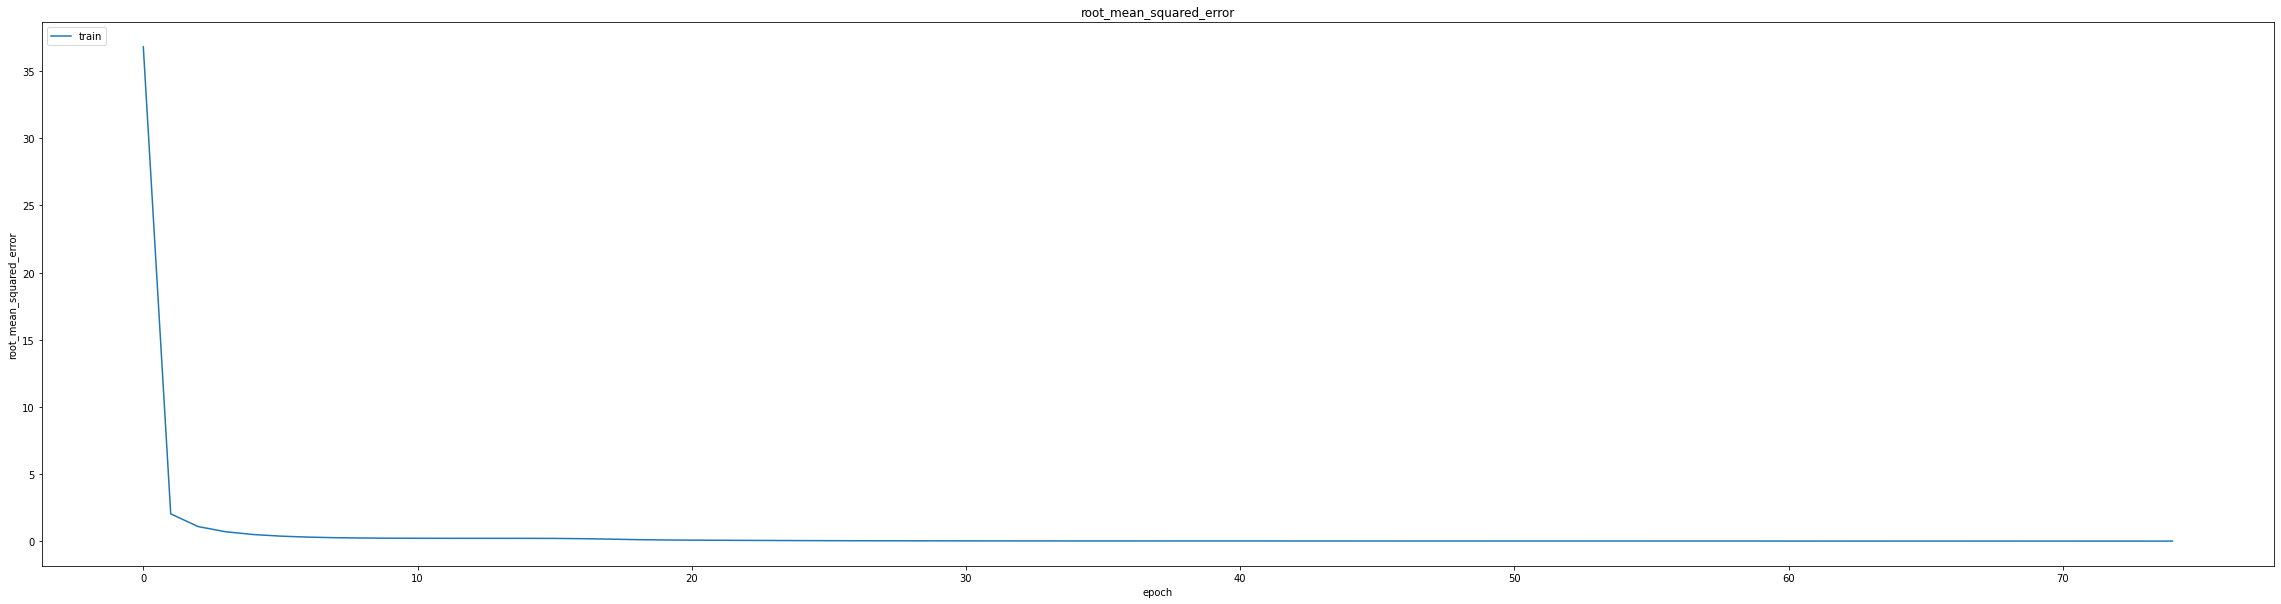

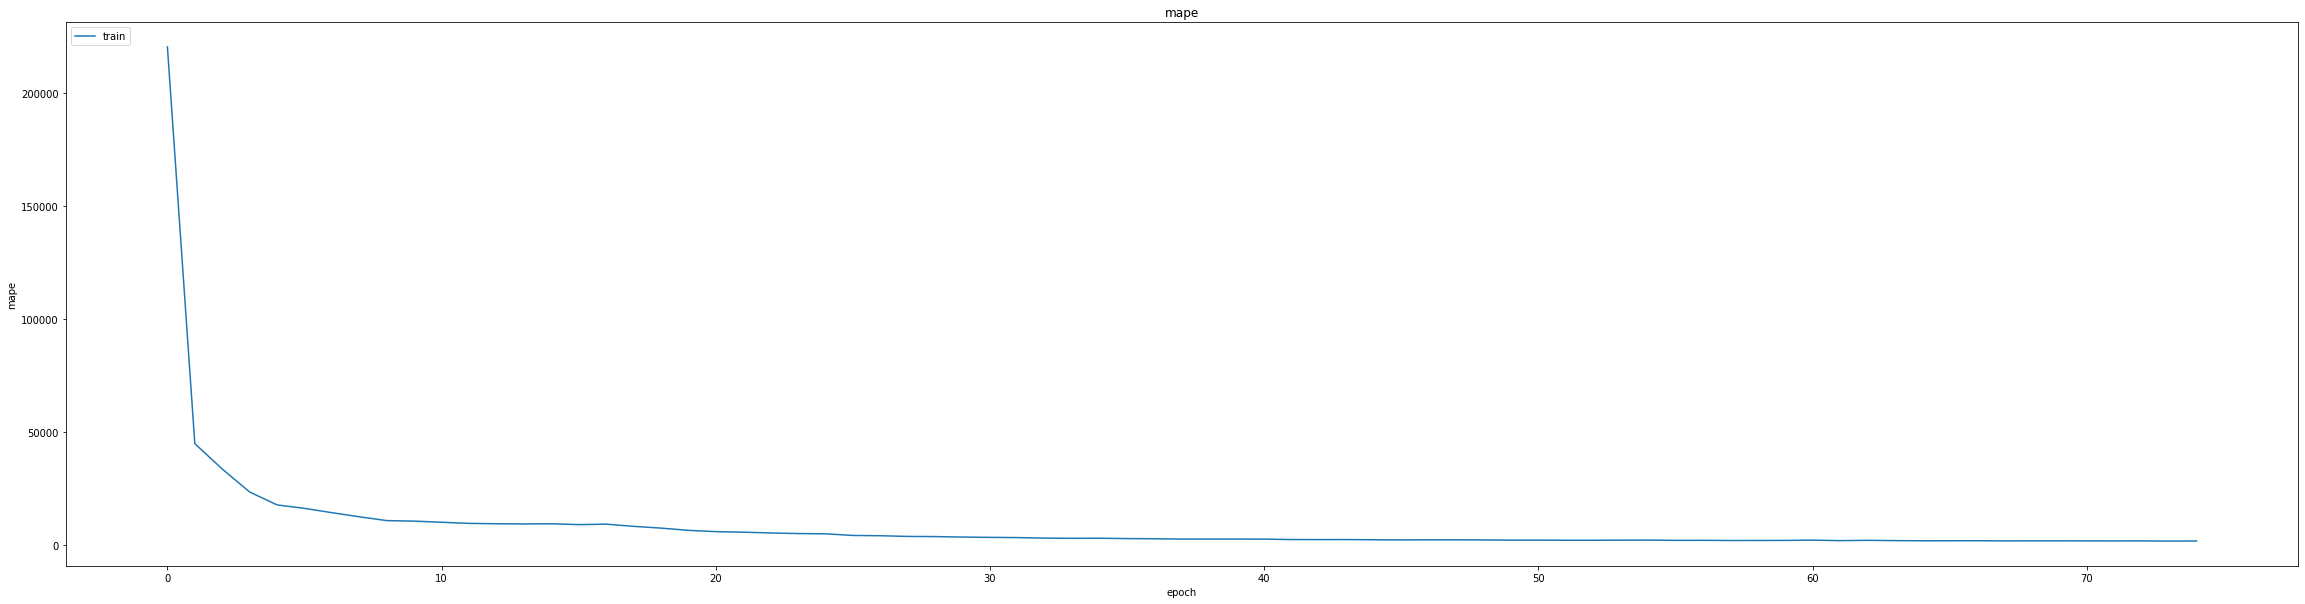

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.017719263210892677
0.017719263210892677
0.028605317696928978
348/348 [==============================] - 2s 4ms/step
0.9907447412142499


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 2.4737e-04 - mae: 0.0086 - mse: 2.4737e-04 - root_mean_squared_error: 0.0157 - mape: 2.2299
Epoch 1: val_mse did not improve from 0.00082
406/406 [==============================] - 9s 12ms/step - loss: 2.4662e-04 - mae: 0.0086 - mse: 2.4662e-04 - root_mean_squared_error: 0.0157 - mape: 1971.0543 - val_loss: 9.2535e-04 - val_mae: 0.0191 - val_mse: 9.2535e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 49.1693 - lr: 0.0010
Epoch 2/25
404/406 [============================>.] - ETA: 0s - loss: 5.0002e-05 - mae: 0.0051 - mse: 5.0002e-05 - root_mean_squared_error: 0.0071 - mape: 1978.8052
Epoch 2: val_mse did not improve from 0.00082
406/406 [==============================] - 4s 10ms/step - loss: 5.0177e-05 - mae: 0.0052 - mse: 5.0177e-05 - root_mean_squared_error: 0.0071 - mape: 1969.4829 - val_loss: 8.3677e-04 - val_mae: 0.0192 - val_mse: 8.3677e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 46.5776 - lr: 0.

406/406 [==============================] - 14s 35ms/step - loss: 5.2530e-05 - mae: 0.0054 - mse: 5.2530e-05 - root_mean_squared_error: 0.0072 - mape: 1922.0726 - val_loss: 7.9091e-04 - val_mae: 0.0190 - val_mse: 7.9091e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 45.2234 - lr: 9.0000e-04
Epoch 4/25
405/406 [============================>.] - ETA: 0s - loss: 5.5869e-05 - mae: 0.0056 - mse: 5.5869e-05 - root_mean_squared_error: 0.0075 - mape: 1862.7883
Epoch 4: val_mse improved from 0.00079 to 0.00072, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 5.5898e-05 - mae: 0.0056 - mse: 5.5898e-05 - root_mean_squared_error: 0.0075 - mape: 1858.5974 - val_loss: 7.2181e-04 - val_mae: 0.0171 - val_mse: 7.2181e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 43.4329 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
406/406 [==============================] - ETA: 0s - loss: 5.2864e-05 - mae: 0.0055 - mse: 5.2864e-05 - root_mean_squared_error: 0.0073 - mape: 1780.6898
Epoch 5: val_mse improved from 0.00072 to 0.00066, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 36ms/step - loss: 5.2864e-05 - mae: 0.0055 - mse: 5.2864e-05 - root_mean_squared_error: 0.0073 - mape: 1780.6898 - val_loss: 6.6158e-04 - val_mae: 0.0155 - val_mse: 6.6158e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 42.1251 - lr: 8.1000e-04
Epoch 6/25
405/406 [============================>.] - ETA: 0s - loss: 5.3702e-05 - mae: 0.0055 - mse: 5.3702e-05 - root_mean_squared_error: 0.0073 - mape: 1794.3749
Epoch 6: val_mse did not improve from 0.00066
406/406 [==============================] - 4s 10ms/step - loss: 5.3851e-05 - mae: 0.0055 - mse: 5.3851e-05 - root_mean_squared_error: 0.0073 - mape: 1790.3386 - val_loss: 7.2158e-04 - val_mae: 0.0188 - val_mse: 7.2158e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 41.6360 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
402/406 [============================>.] - ETA: 0s - loss: 4.9658e-05 - mae: 0.0053 - mse: 4.9658e-05 - root_mean_squared_error: 0.0070 - mape: 182

406/406 [==============================] - 14s 35ms/step - loss: 4.3911e-05 - mae: 0.0049 - mse: 4.3911e-05 - root_mean_squared_error: 0.0066 - mape: 1702.6660 - val_loss: 5.8643e-04 - val_mae: 0.0150 - val_mse: 5.8643e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 39.7256 - lr: 6.5610e-04
Epoch 10/25
403/406 [============================>.] - ETA: 0s - loss: 4.4401e-05 - mae: 0.0050 - mse: 4.4401e-05 - root_mean_squared_error: 0.0067 - mape: 1710.7305
Epoch 10: val_mse did not improve from 0.00059
406/406 [==============================] - 4s 10ms/step - loss: 4.4393e-05 - mae: 0.0050 - mse: 4.4393e-05 - root_mean_squared_error: 0.0067 - mape: 1698.4589 - val_loss: 6.3862e-04 - val_mae: 0.0183 - val_mse: 6.3862e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 40.3715 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
402/406 [============================>.] - ETA: 0s - loss: 4.3712e-05 - mae: 0.0049 - mse: 4.3712e-05 - root_mean_squared_error: 0.0066 - mape: 

406/406 [==============================] - 14s 35ms/step - loss: 3.9369e-05 - mae: 0.0047 - mse: 3.9369e-05 - root_mean_squared_error: 0.0063 - mape: 1738.2524 - val_loss: 5.7065e-04 - val_mae: 0.0159 - val_mse: 5.7065e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 38.8349 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
402/406 [============================>.] - ETA: 0s - loss: 3.8840e-05 - mae: 0.0046 - mse: 3.8840e-05 - root_mean_squared_error: 0.0062 - mape: 1686.9961
Epoch 13: val_mse did not improve from 0.00057
406/406 [==============================] - 4s 10ms/step - loss: 3.8992e-05 - mae: 0.0046 - mse: 3.8992e-05 - root_mean_squared_error: 0.0062 - mape: 1670.7434 - val_loss: 6.8670e-04 - val_mae: 0.0194 - val_mse: 6.8670e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 41.2561 - lr: 5.3144e-04
Epoch 14/25
404/406 [============================>.] - ETA: 0s - loss: 3.8957e-05 - mae: 0.0047 - mse: 3.8957e-05 - root_mean_squared_error: 0.0062 - mape: 

406/406 [==============================] - 14s 35ms/step - loss: 3.8949e-05 - mae: 0.0047 - mse: 3.8949e-05 - root_mean_squared_error: 0.0062 - mape: 1705.3809 - val_loss: 5.3210e-04 - val_mae: 0.0146 - val_mse: 5.3210e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 37.7666 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
402/406 [============================>.] - ETA: 0s - loss: 3.2873e-05 - mae: 0.0042 - mse: 3.2873e-05 - root_mean_squared_error: 0.0057 - mape: 1634.6830
Epoch 15: val_mse did not improve from 0.00053
406/406 [==============================] - 5s 11ms/step - loss: 3.2948e-05 - mae: 0.0042 - mse: 3.2948e-05 - root_mean_squared_error: 0.0057 - mape: 1618.9326 - val_loss: 5.5412e-04 - val_mae: 0.0158 - val_mse: 5.5412e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 38.0271 - lr: 4.7830e-04
Epoch 16/25
402/406 [============================>.] - ETA: 0s - loss: 3.4200e-05 - mae: 0.0044 - mse: 3.4200e-05 - root_mean_squared_error: 0.0058 - mape:

406/406 [==============================] - 15s 37ms/step - loss: 3.4183e-05 - mae: 0.0044 - mse: 3.4183e-05 - root_mean_squared_error: 0.0058 - mape: 1669.0519 - val_loss: 5.1531e-04 - val_mae: 0.0149 - val_mse: 5.1531e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 37.0735 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
406/406 [==============================] - ETA: 0s - loss: 3.1174e-05 - mae: 0.0041 - mse: 3.1174e-05 - root_mean_squared_error: 0.0056 - mape: 1716.1074
Epoch 17: val_mse did not improve from 0.00052
406/406 [==============================] - 4s 11ms/step - loss: 3.1174e-05 - mae: 0.0041 - mse: 3.1174e-05 - root_mean_squared_error: 0.0056 - mape: 1716.1074 - val_loss: 5.8329e-04 - val_mae: 0.0174 - val_mse: 5.8329e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 38.1874 - lr: 4.3047e-04
Epoch 18/25
403/406 [============================>.] - ETA: 0s - loss: 3.1567e-05 - mae: 0.0042 - mse: 3.1567e-05 - root_mean_squared_error: 0.0056 - mape: 

406/406 [==============================] - 14s 35ms/step - loss: 2.9441e-05 - mae: 0.0040 - mse: 2.9441e-05 - root_mean_squared_error: 0.0054 - mape: 1616.8407 - val_loss: 5.0197e-04 - val_mae: 0.0148 - val_mse: 5.0197e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 36.5829 - lr: 3.8742e-04
Epoch 20/25
403/406 [============================>.] - ETA: 0s - loss: 2.9785e-05 - mae: 0.0040 - mse: 2.9785e-05 - root_mean_squared_error: 0.0055 - mape: 1584.9070
Epoch 20: val_mse did not improve from 0.00050
406/406 [==============================] - 4s 10ms/step - loss: 2.9763e-05 - mae: 0.0040 - mse: 2.9763e-05 - root_mean_squared_error: 0.0055 - mape: 1573.5370 - val_loss: 5.0494e-04 - val_mae: 0.0154 - val_mse: 5.0494e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 36.2110 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
401/406 [============================>.] - ETA: 0s - loss: 2.7889e-05 - mae: 0.0039 - mse: 2.7889e-05 - root_mean_squared_error: 0.0053 - mape: 

406/406 [==============================] - 13s 33ms/step - loss: 2.6456e-05 - mae: 0.0038 - mse: 2.6456e-05 - root_mean_squared_error: 0.0051 - mape: 1548.0092 - val_loss: 4.7676e-04 - val_mae: 0.0154 - val_mse: 4.7676e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 35.1341 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
406/406 [==============================] - ETA: 0s - loss: 2.3880e-05 - mae: 0.0036 - mse: 2.3880e-05 - root_mean_squared_error: 0.0049 - mape: 1566.1691
Epoch 25: val_mse improved from 0.00048 to 0.00046, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 2.3880e-05 - mae: 0.0036 - mse: 2.3880e-05 - root_mean_squared_error: 0.0049 - mape: 1566.1691 - val_loss: 4.6487e-04 - val_mae: 0.0145 - val_mse: 4.6487e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 35.0109 - lr: 2.8243e-04


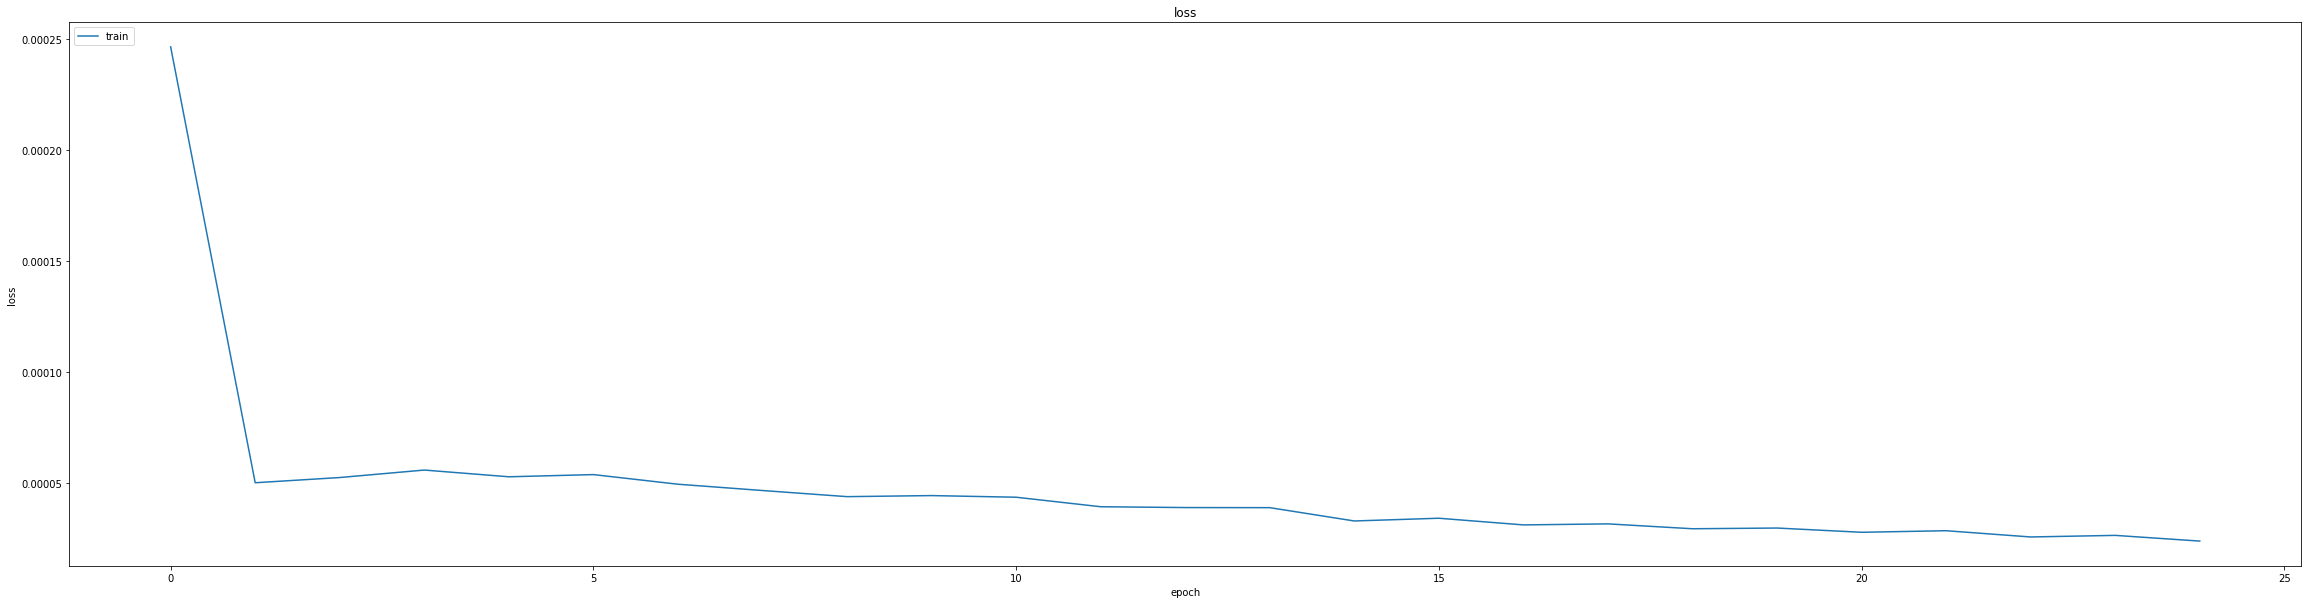

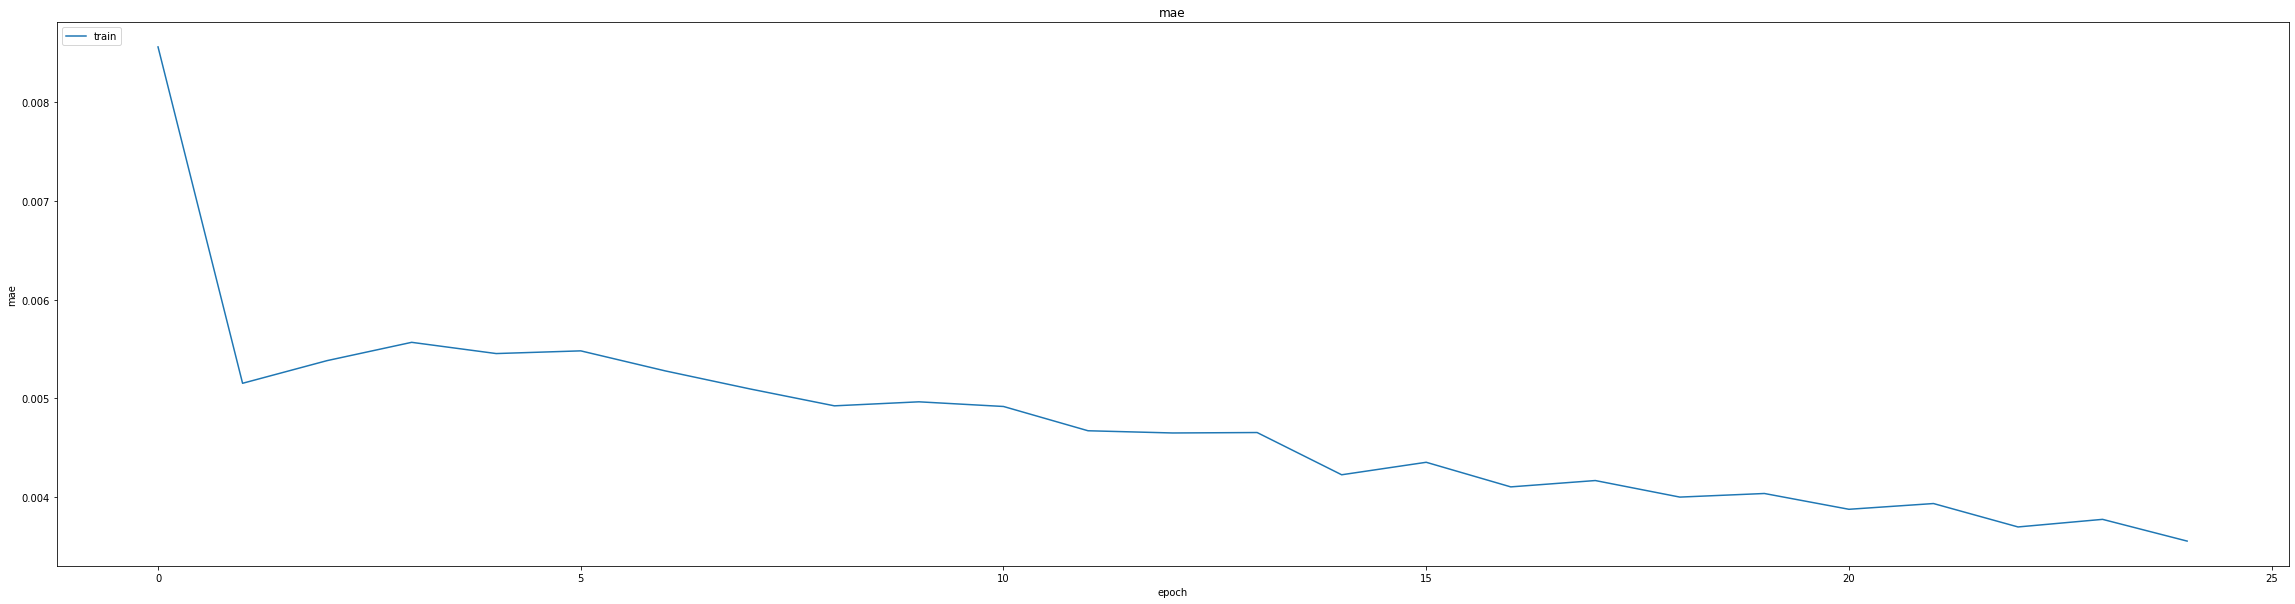

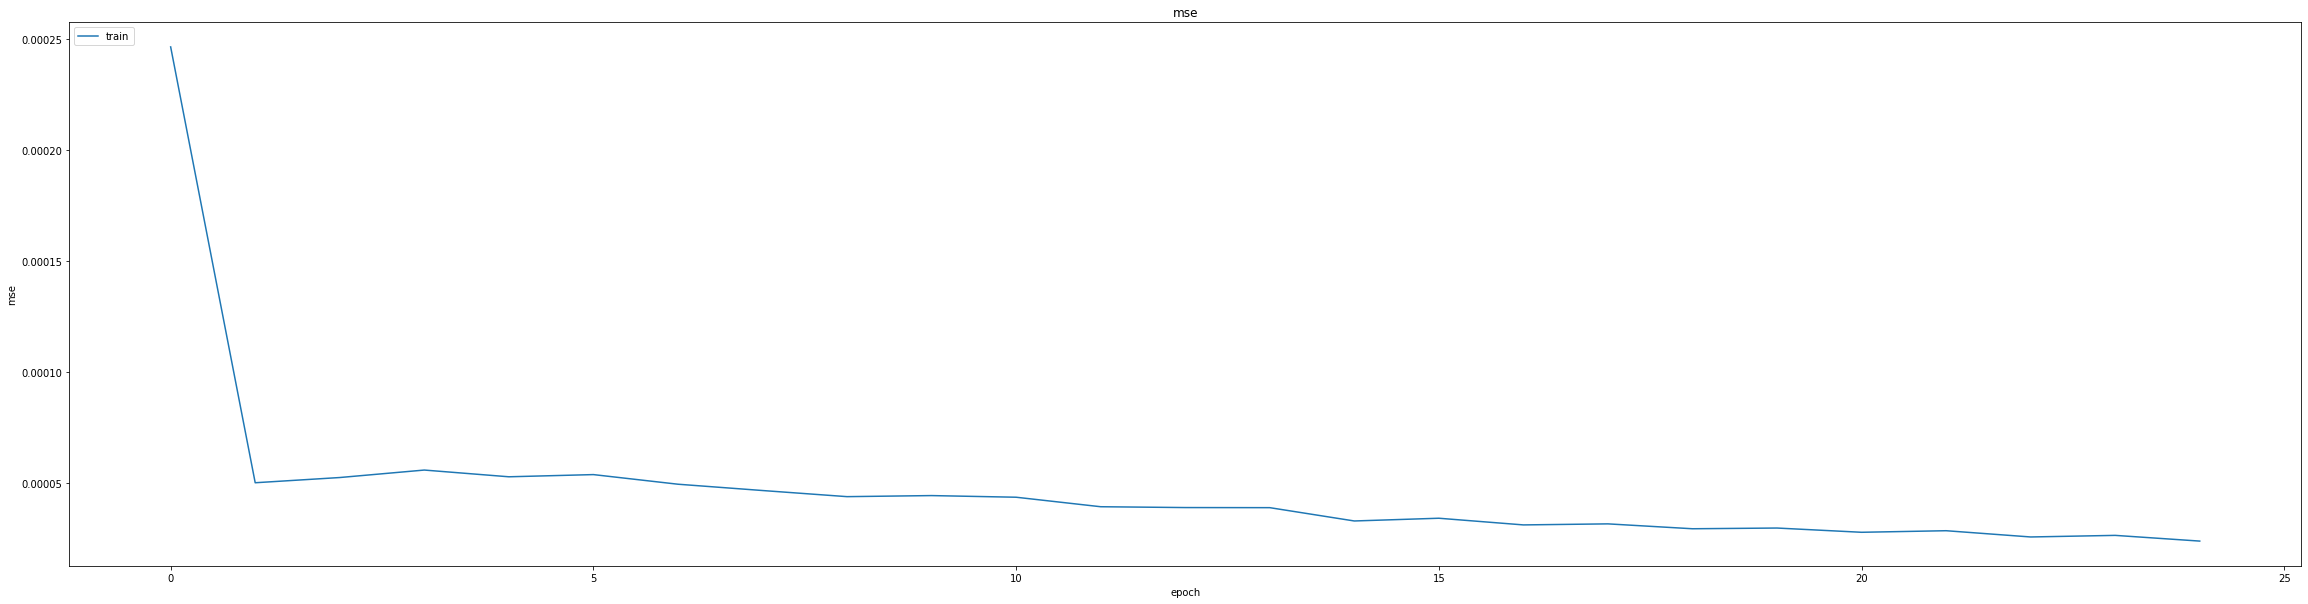

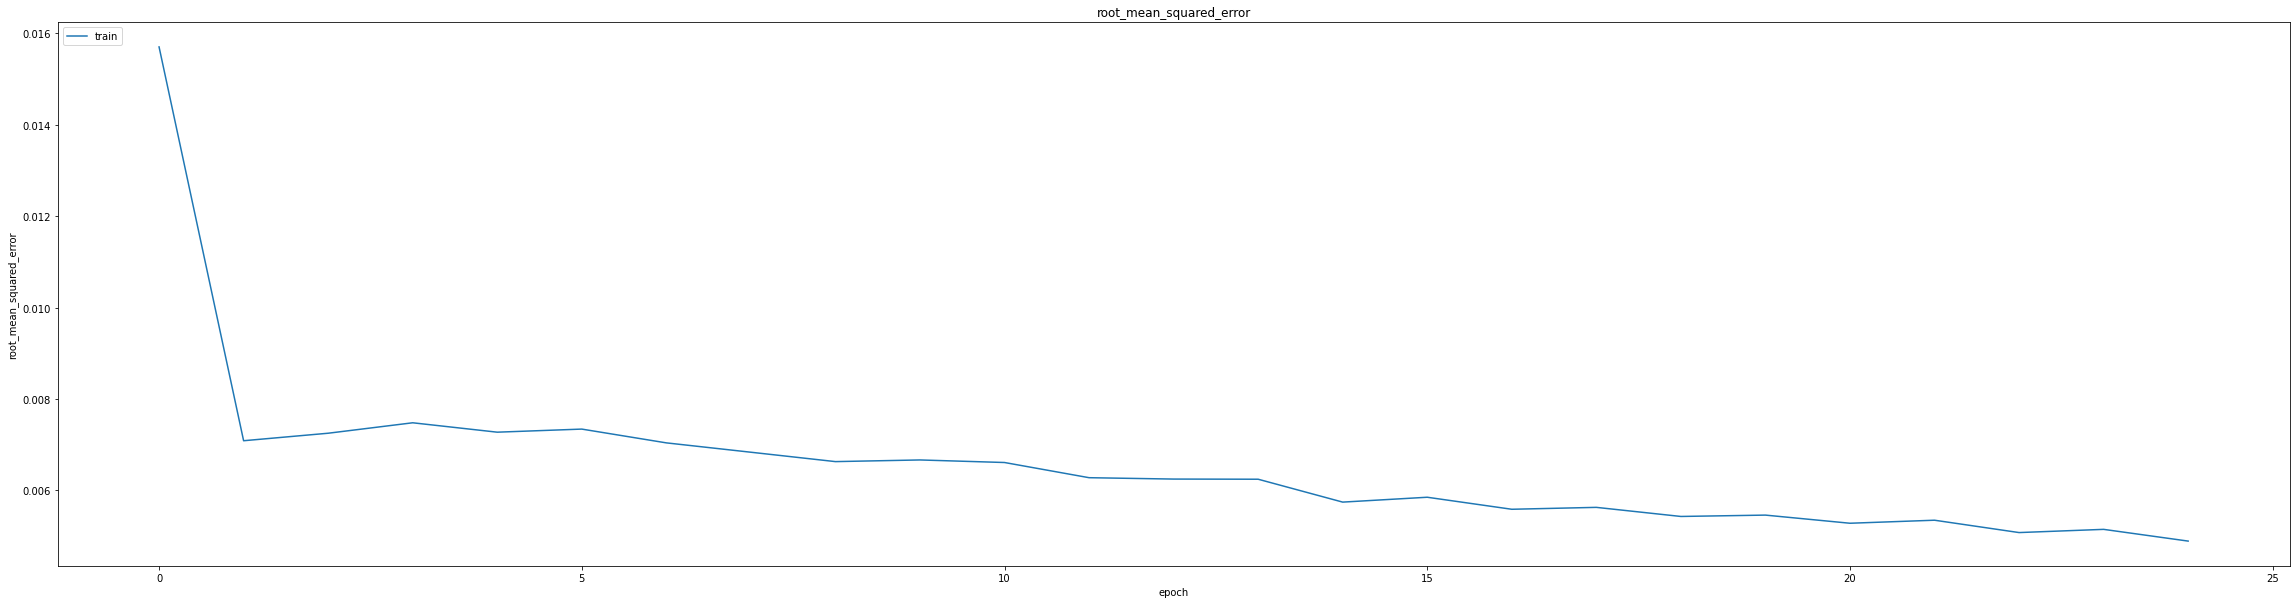

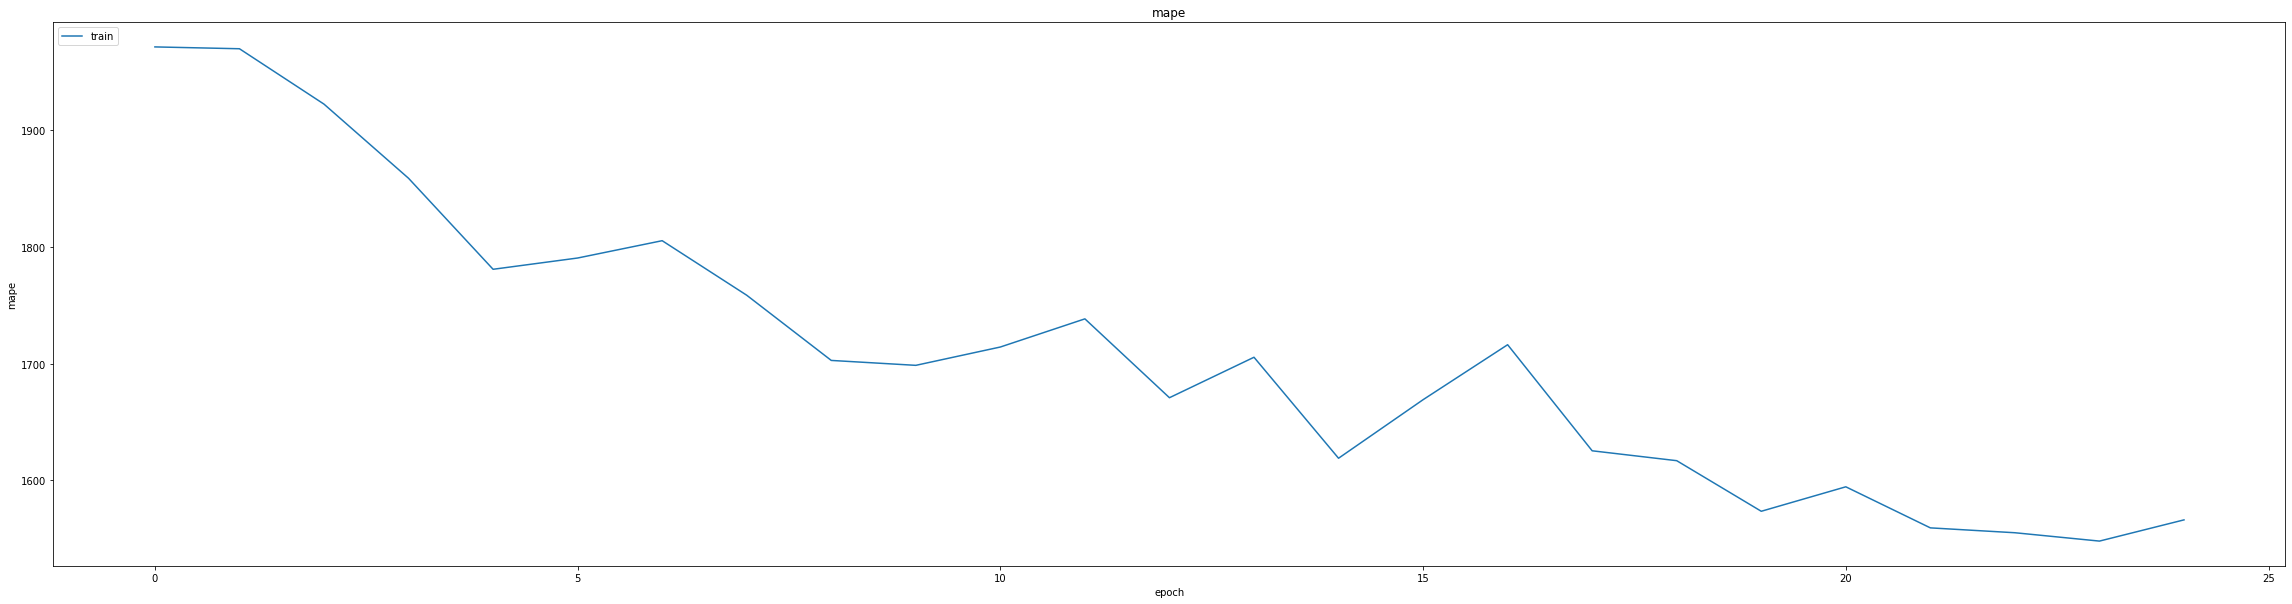

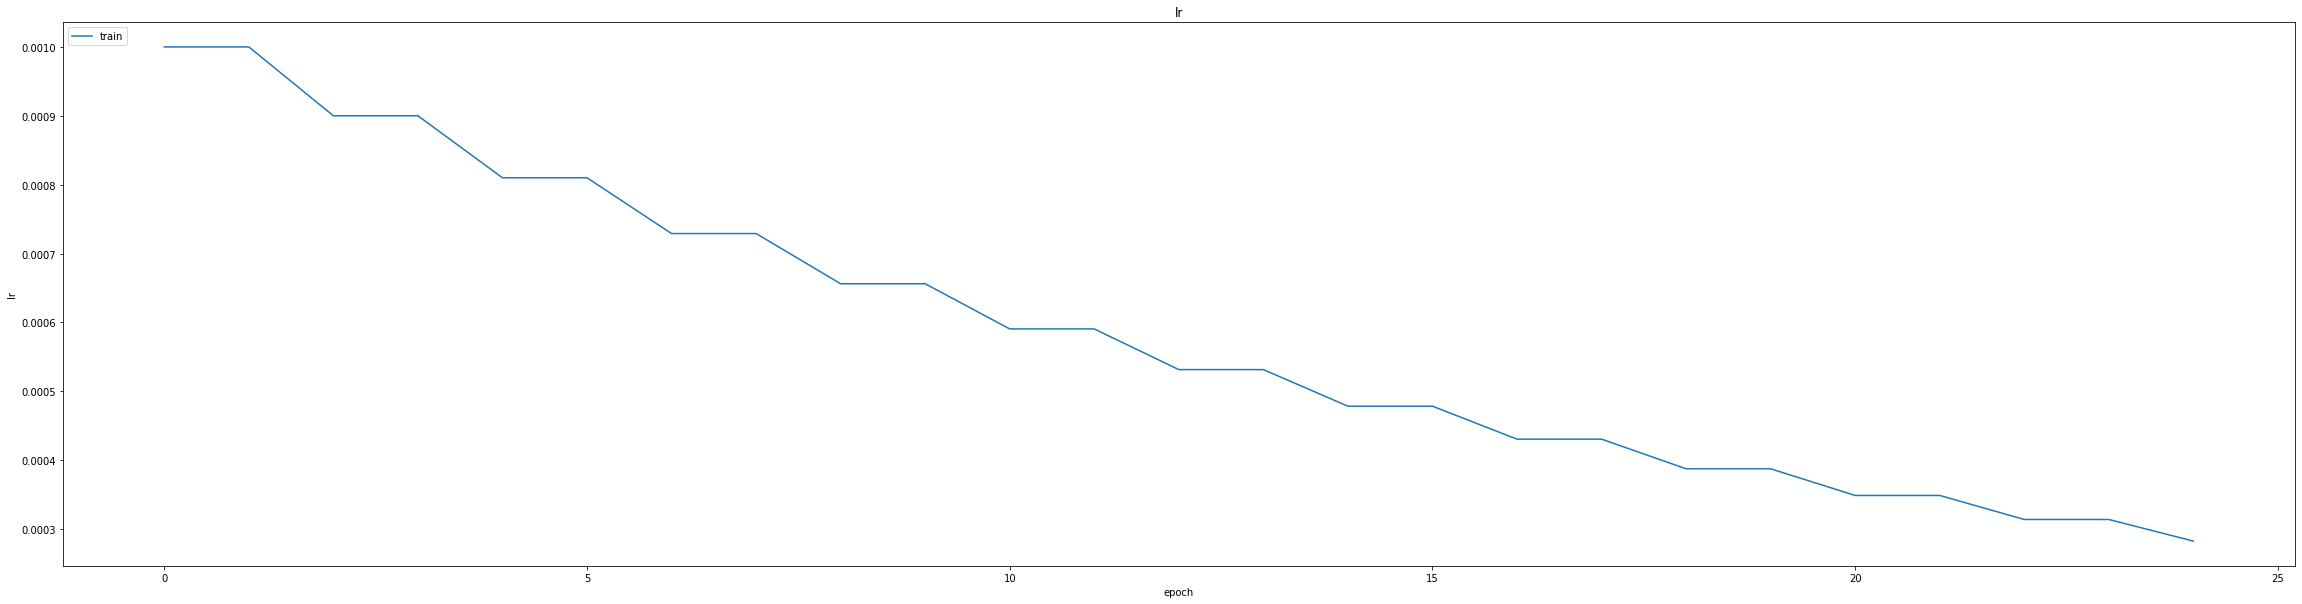

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.014479759149253368
0.014479759149253368
0.021560950204730034
348/348 [==============================] - 2s 4ms/step
0.9947418774020043


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(70-30)")

348/348 [==============================] - 1s 4ms/step


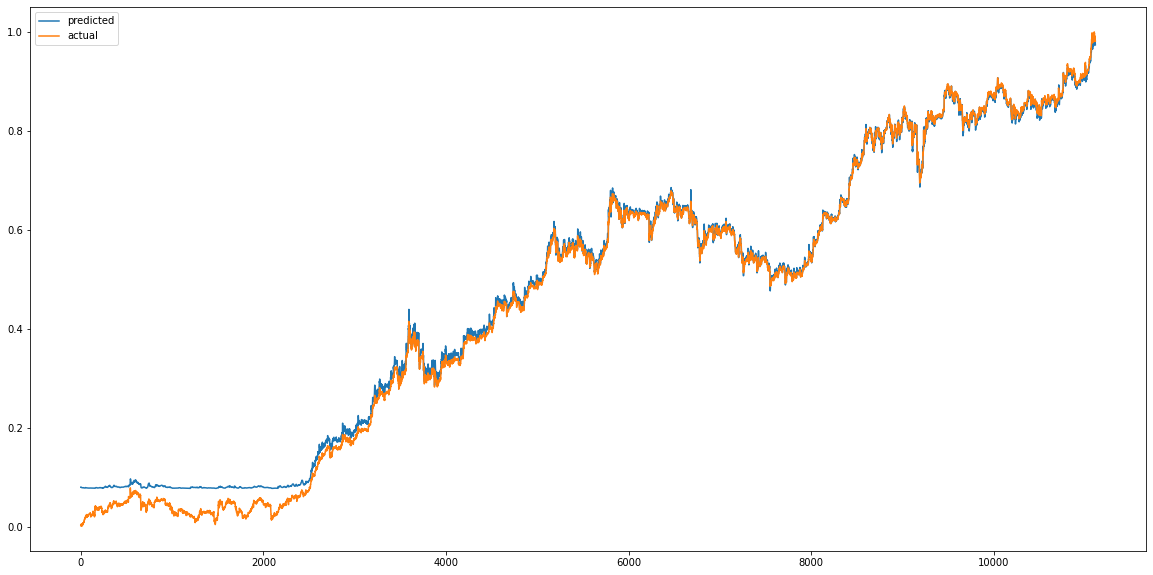

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


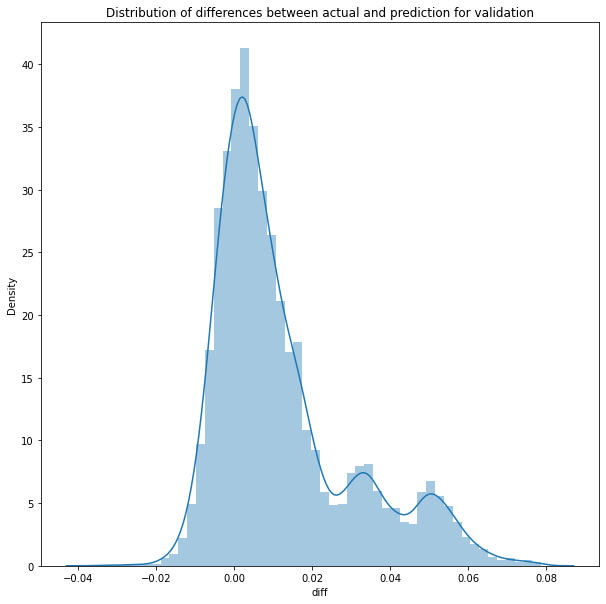

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


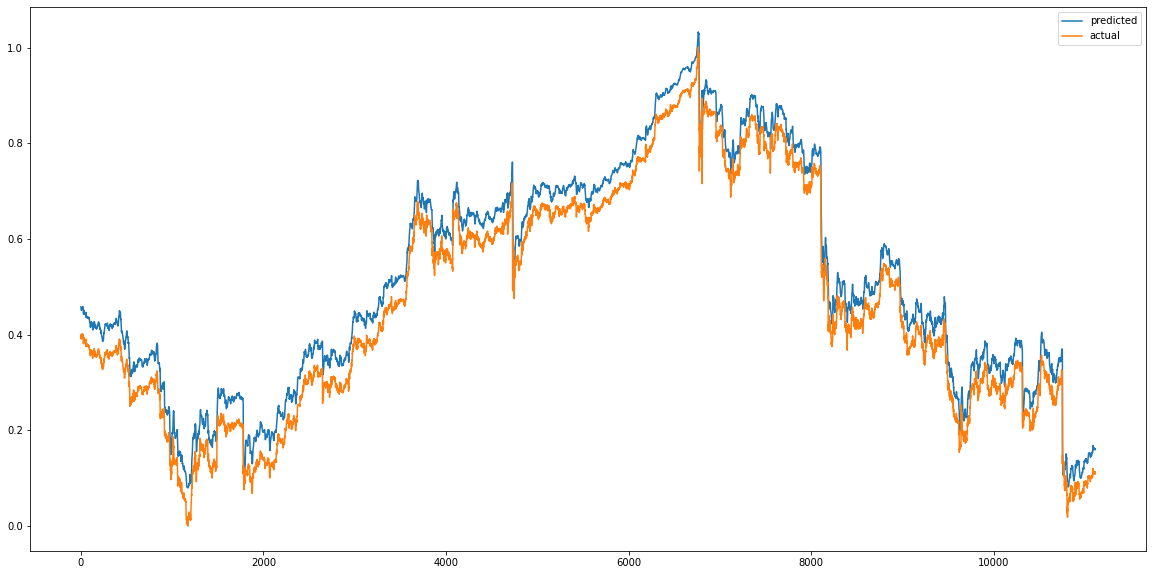

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


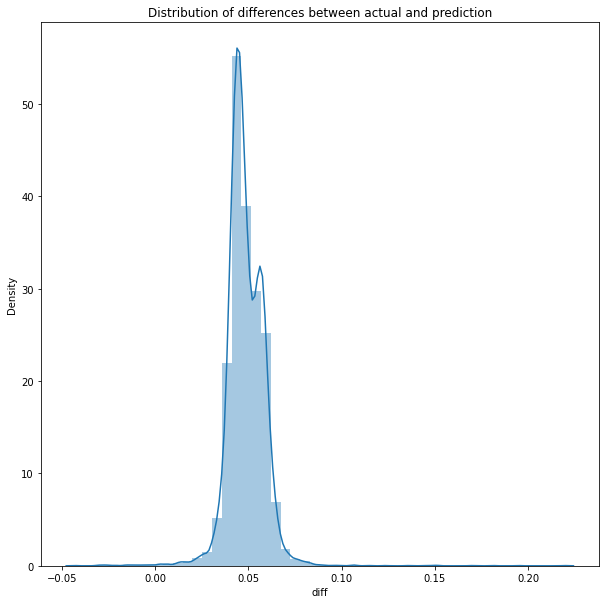

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0024562220732762064
RMSE :  0.049560287259823324
MAE :  0.04859576515461269
348/348 [==============================] - 3s 8ms/step
R2_Score  : 0.9561079021759296


count    11115.000000
mean         0.048521
std          0.010096
min         -0.042895
25%          0.042928
50%          0.047272
75%          0.054938
max          0.219638
Name: diff, dtype: float64